In [1]:
%pylab inline
import pandas as pd
import sys
import gc
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
DAY=int(os.environ["THE_DAY"])

In [3]:
print "the day", DAY

the day 7


In [4]:
dim=(54, 4100, 1704)
def get_series(name):
    a=np.load("../input/s/"+name+".npz")
    #print a.files
    b=a['arr_0']
    assert b.shape==dim
    return b
def get_series2(name):
    a=np.load("../input/s/"+name+".npz")
    #print a.files
    b=a['arr_0']
    assert b.shape==(4100, 54, 1704)
    return b  
def s_lag(arr,lag=1):
    l,m,n=arr.shape
    assert lag>0 and lag<n
    a=arr[:,:,:-lag]
    b=np.empty(shape=[l,m,lag],dtype=arr.dtype)
    b.fill(np.nan)
    ba=np.concatenate([b,a],axis=2)
    assert ba.shape==arr.shape
    assert ba.dtype==arr.dtype
    return ba    

In [5]:
cat_lag_features={
 "city_0",
  "class_0",
  "cluster_0",
  "family_0",
  "state_0",
  "type_0",

 'city_mv36',
 'class_mv36',
 'cluster_mv36',
 'family_mv36',
 'state_mv36',
 'type_mv36',    
 
 'item_mean_0',
 'store_mean_0',
 }
cat_features={
 'holiday_0',
 #'onpromotion_0',
 'wage_0',
 'd900'
 }
oil_features={'oil_0', 'oil_d1', 'oil_d10', 'oil_d15', 'oil_d3', 'oil_d5'}
sales_ma_features={'sales_ma_112',
 'sales_ma_14',
 'sales_ma_224',
 'sales_ma_28',
 'sales_ma_3',
 'sales_ma_56',
 'sales_ma_7'}
sales_season_ma_features={'sales_week_season_ma_p13',
 'sales_week_season_ma_p2',
 'sales_week_season_ma_p3',
 'sales_week_season_ma_p4',
 'sales_week_season_ma_p7'}

#move x, fix y
def _get_feature(name,lag=0,offset=0):
    if name in cat_lag_features :
        assert lag == 0
        if name in ['item_mean_0','class_mv36','family_mv36','class_0','family_0']:
            s=get_series2(name)
        else:
            s=get_series(name)
        return s_lag(s,offset)
    if name in cat_features or name in oil_features:
        assert offset==0 and lag==0
        s= get_series(name)
        if name =='holiday_0': s[np.isnan(s)]=0
        return s
    if name =="y_0" or name in sales_ma_features or name in sales_season_ma_features:
        #assert  lag == 0
        s=get_series(name)
        if offset==0 and lag==0: return s
        return s_lag(s,lag=offset+lag)
def get_feature(name,lag=0,offset=0):
    s=_get_feature(name=name,lag=lag,offset=offset)
    if s.shape == ( 4100,54, 1704):
        s=np.rollaxis(s,1,0)
    assert s.shape==(54, 4100, 1704), s.shape
    return s
def get_all_features(offset=1):
    assert offset>0
    all_features=[]
    for name in cat_lag_features:
        all_features.append({"name":name,"lag":0,"offset":offset})
    for name in cat_features:
        all_features.append({"name":name,"lag":0,"offset":0})   
#     for name in oil_features:
#         all_features.append({"name":name,"lag":0,"offset":0})  
    for i in range(0,7):
        all_features.append({"name":"y_0","lag":i ,"offset":offset})  
    for name in sales_ma_features:
        all_features.append({"name":name,"lag":0,"offset":offset})  
    for name in sales_season_ma_features:
        all_features.append({"name":name,"lag":(700-offset)%7,"offset":offset})
#     for i in range(1,8):
#         all_features.append({"name":"oil_0","lag":i,"offset":offset})              
    return all_features    
def calc_feature(feat):
    return get_feature(**feat)
def col_name(feat):
    return "{}-lag{}-offset{}".format(feat['name'],feat['lag'],feat['offset'])
def get_train_test(day):
    assert(day>0)
    cols=[]
    train_lst=[]
    
    for feat in get_all_features(day):
        col=col_name(feat)
        print col,
        arr=calc_feature(feat).astype(np.float16)
        train_lst.append(arr)
        cols.append(col)
        gc.collect()
        #break
    return cols,  np.array(train_lst)

In [6]:
def read_data(day):
    print "read data for day", day
    dirname='../input/d'+str(day)+"/"
    y=get_series('y_0')
    cols,train_test=get_train_test(day)
    cols=np.array(cols)    
    train_test=np.rollaxis(train_test,0,4)
    print "loaded", y.shape,train_test.shape 
    return cols,train_test,y.astype(np.float16)

In [7]:
%time cols,train_test,y=read_data(DAY)
rawy=y.copy()
y[np.isnan(y)]=0

read data for day 7


store_mean_0-lag0-offset7

 family_0-lag0-offset7

 city_0-lag0-offset7

 cluster_mv36-lag0-offset7

 cluster_0-lag0-offset7

 city_mv36-lag0-offset7

 item_mean_0-lag0-offset7

 class_0-lag0-offset7

 type_0-lag0-offset7

 type_mv36-lag0-offset7

 state_mv36-lag0-offset7

 class_mv36-lag0-offset7

 state_0-lag0-offset7

 family_mv36-lag0-offset7

 holiday_0-lag0-offset0

 d900-lag0-offset0

 wage_0-lag0-offset0

 y_0-lag0-offset7

 y_0-lag1-offset7

 y_0-lag2-offset7

 y_0-lag3-offset7

 y_0-lag4-offset7

 y_0-lag5-offset7

 y_0-lag6-offset7

 sales_ma_224-lag0-offset7

 sales_ma_14-lag0-offset7

 sales_ma_28-lag0-offset7

 sales_ma_112-lag0-offset7

 sales_ma_7-lag0-offset7

 sales_ma_3-lag0-offset7

 sales_ma_56-lag0-offset7

 sales_week_season_ma_p7-lag0-offset7

 sales_week_season_ma_p4-lag0-offset7

 sales_week_season_ma_p13-lag0-offset7

 sales_week_season_ma_p2-lag0-offset7

 sales_week_season_ma_p3-lag0-offset7

 loaded (54, 4100, 1704) (54, 4100, 1704, 36)


CPU times: user 2min 41s, sys: 25.6 s, total: 3min 7s
Wall time: 3min 7s


In [8]:
print "types", [u.dtype for u in (cols, train_test, y)]
print "shapes", [u.shape for u in (cols, train_test, y)]
print "mem(gb)",np.round(train_test.nbytes/1024.**3,2), np.round(y.nbytes/1024.**3,2)

types [dtype('S37'), dtype('float16'), dtype('float16')]
shapes [(36,), (54, 4100, 1704, 36), (54, 4100, 1704)]
mem(gb) 25.3 0.7


In [9]:
gc.collect()

0

In [10]:
def show_data(store,item,date,filters=None):
    thisy=y[store,item,date-5:date+2]
    a=train_test[store,item,date-5:date+2,:]
    a=np.squeeze(a)
    print a.shape
    columns=cols
    if filters is not None: 
        columns = [u for u in columns if filters(u)]
    df=pd.DataFrame(a,columns=cols,index=range(date-5,date+2))[columns]
    df['target']=thisy
    with pd.option_context('display.max_columns', None):
        display(df)

In [11]:
show_data(0,1000,1688, None)#lambda u: 'y_0' in u)

(7, 36)


store_mean_0-lag0-offset7  family_0-lag0-offset7  city_0-lag0-offset7  \
1683                   1.603516               1.717773             1.867188   
1684                   1.486328               1.821289             1.977539   
1685                   1.234375               1.866211             2.031250   
1686                   1.541992               1.696289             1.849609   
1687                   1.560547               1.639648             1.785156   
1688                   1.617188               1.627930             1.789062   
1689                   1.546875               1.627930             1.714844   

      cluster_mv36-lag0-offset7  cluster_0-lag0-offset7  \
1683                   1.654297                1.635742   
1684                   1.654297                1.663086   
1685                   1.650391                1.664062   
1686                   1.645508                1.623047   
1687                   1.641602                1.563477   
1688                   1.641602                1.624023   
1689                   1.636719                1.526367   

      city_mv36-lag0-offset7  item_mean_0-lag0-offset7  class_0-lag0-offset7  \
1683                1.884766                  2.099609              1.805664   
1684                1.888672                  2.132812              1.858398   
1685                1.885742                  2.115234              1.756836   
1686                1.876953                  1.683594              1.583008   
1687                1.872070                  1.707031              1.577148   
1688                1.869141                  1.795898              1.632812   
1689                1.864258                  2.003906              1.706055   

      type_0-lag0-offset7  type_mv36-lag0-offset7  state_mv36-lag0-offset7  \
1683             1.651367                1.665039                 1.883789   
1684             1.693359                1.666992                 1.886719   
1685             1.701172                1.664062                 1.884766   
1686             1.626953                1.658203                 1.875977   
1687             1.561523                1.654297                 1.871094   
1688             1.632812                1.654297                 1.868164   
1689             1.553711                1.650391                 1.863281   

      class_mv36-lag0-offset7  state_0-lag0-offset7  family_mv36-lag0-offset7  \
1683                 1.677734              1.870117                  1.727539   
1684                 1.680664              1.972656                  1.731445   
1685                 1.676758              2.029297                  1.730469   
1686                 1.670898              1.851562                  1.722656   
1687                 1.669922              1.791016                  1.719727   
1688                 1.669922              1.790039                  1.716797   
1689                 1.671875              1.719727                  1.715820   

      holiday_0-lag0-offset0  d900-lag0-offset0  wage_0-lag0-offset0  \
1683                     1.0                1.0             0.733398   
1684                     0.0                1.0             0.799805   
1685                     0.0                1.0             0.866699   
1686                     0.0                1.0             0.933105   
1687                     0.0                1.0             0.000000   
1688                     0.0                1.0             0.066650   
1689                     0.0                1.0             0.133301   

      y_0-lag0-offset7  y_0-lag1-offset7  y_0-lag2-offset7  y_0-lag3-offset7  \
1683          2.080078          2.398438          2.197266          1.791992   
1684          2.080078          2.080078          2.398438          2.197266   
1685          1.098633          2.080078          2.080078          2.398438   
1686          2.484375          1.098633          2.080078          2.080078   
1687    

In [12]:
def show_data2():
    lst=[]
    days=range(1685,1691)
    for i in range(train_test.shape[-1]):
        lsta=[cols[i]]
        for d in days:
            u=train_test[:,:,d,i]
            lsta.append(np.round(np.isnan(u).mean(),4))
        lst.append(lsta)
            #print '{:>40s} {:.4f} {:.4f} {:.4f} {:.4f}' .format(cols[i],
         #                  np.isnan(u).mean(), np.isnan(v).mean(), np.isnan(w).mean(), np.isnan(ww).mean())
    df=pd.DataFrame(np.array(lst) ,columns=['col']+days)
    return df

In [13]:
show_data2()

col    1685    1686    1687    1688  \
0               store_mean_0-lag0-offset7     0.0     0.0     0.0     0.0   
1                   family_0-lag0-offset7     0.0  0.0002     0.0     0.0   
2                     city_0-lag0-offset7     0.0     0.0     0.0     0.0   
3               cluster_mv36-lag0-offset7     0.0     0.0     0.0     0.0   
4                  cluster_0-lag0-offset7     0.0     0.0     0.0     0.0   
5                  city_mv36-lag0-offset7     0.0     0.0     0.0     0.0   
6                item_mean_0-lag0-offset7   0.082  0.0841  0.0837  0.0844   
7                    class_0-lag0-offset7  0.0078  0.0083  0.0083  0.0085   
8                     type_0-lag0-offset7     0.0     0.0     0.0     0.0   
9                  type_mv36-lag0-offset7     0.0     0.0     0.0     0.0   
10                state_mv36-lag0-offset7     0.0     0.0     0.0     0.0   
11                class_mv36-lag0-offset7  0.0083  0.0083  0.0083  0.0083   
12                   state_0-lag0-offset7     0.0     0.0     0.0     0.0   
13               family_mv36-lag0-offset7     0.0     0.0     0.0     0.0   
14                 holiday_0-lag0-offset0     0.0     0.0     0.0     0.0   
15                      d900-lag0-offset0     0.0     0.0     0.0     0.0   
16                    wage_0-lag0-offset0     0.0     0.0     0.0     0.0   
17                       y_0-lag0-offset7  0.4994  0.5308  0.5431  0.5438   
18                       y_0-lag1-offset7  0.4992  0.4994  0.5308  0.5431   
19                       y_0-lag2-offset7  0.5295  0.4992  0.4994  0.5308   
20                       y_0-lag3-offset7  0.5382  0.5295  0.4992  0.4994   
21                       y_0-lag4-offset7  0.5149  0.5382  0.5295  0.4992   
22                       y_0-lag5-offset7  0.5059  0.5149  0.5382  0.5295   
23                       y_0-lag6-offset7  0.5195  0.5059  0.5149  0.5382   
24              sales_ma_224-lag0-offset7  0.5023  0.5024  0.5025  0.5027   
25               sales_ma_14-lag0-offset7  0.5077  0.5085  0.5084  0.5084   
26               sales_ma_28-lag0-offset7  0.5027  0.5032  0.5029  0.5029   
27              sales_ma_112-lag0-offset7  0.4896  0.4897  0.4897  0.4898   
28                sales_ma_7-lag0-offset7  0.4896  0.4914  0.4971  0.5014   
29                sales_ma_3-lag0-offset7  0.4927   0.494  0.5101  0.5264   
30               sales_ma_56-lag0-offset7  0.4942  0.4943  0.4942  0.4944   
31   sales_week_season_ma_p7-lag0-offset7     0.0     0.0     0.0     0.0   
32   sales_week_season_ma_p4-lag0-offset7     0.0     0.0     0.0     0.0   
33  sales_week_season_ma_p13-lag0-offset7     0.0     0.0     0.0     0.0   
34   sales_week_season_ma_p2-lag0-offset7  0.4994  0.5308  0.5431  0.5438   
35   sales_week_season_ma_p3-lag0-offset7     0.0     0.0     0.0     0.0   

      1689    1690  
0      0.0     0.0  
1   0.0002  0.0002  
2      0.0     0.0  
3      0.0     0.0  
4      0.0     0.0  
5      0.0     0.0  
6   0.0849   0.078  
7   0.0093  0.0066  
8      0.0     0.0  
9      0.0     0.0  
10     0.0     0.0  
11  0.0083  0.0083  
12     0.0     0.0  
13     0.0     0.0  
14     0.0     0.0  
15     0.0     0.0  
16     0.0     0.0  
17  0.5549  0.5276  
18  0.5438  0.5549  
19  0.5431  0.5438  
20  0.5308  0.5431  
21  0.4994  0.5308  
22  0.4992  0.4994  
23  0.5295  0.4992  
24  0.5013  0.5006  
25   0.508  0.5072  
26  0.5026  0.5017  
27  0.4897  0.4897  
28  0.5043  0.5043  
29  0.5347   0.529  
30  0.4946  0.4945  
31     0.0     0.0  
32     0.0     0.0  
33     0.0     0.0  
34  0.5549  0.5276  
35     0.0     0.0

# cv

In [14]:
def make_data(train_test,y,low,high):
    y_train=y[:,:,low:high]
    X_train=train_test[:,:,low:high,:]
    #ind=~np.isnan(y_train)
    a,b=X_train.reshape([-1,X_train.shape[-1]]),y_train.reshape(-1)
    print a.shape,b.shape,a.dtype,b.dtype
    return a,b 

In [15]:
if 0:
    X_train,y_train=make_data(train_test,y,100,1628)
    X_valid,y_valid=make_data(train_test,y,1628,1668)
    X_test,y_test=make_data(train_test,y,1668,1688)
else:    
    X_train,y_train=make_data(train_test,y,100,1688)
    X_valid,y_valid=None,None
    X_test,y_test=None,None    

(351583200, 36) (351583200,) float16 float16


In [16]:
from sklearn.model_selection import GridSearchCV,ParameterGrid,ParameterSampler
from sklearn.metrics import  make_scorer
from multiprocessing import Pool

In [17]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Activation, InputLayer, Dropout,BatchNormalization
from keras import metrics,backend,regularizers, backend as K, losses
import keras
import tensorflow as tf
from keras.engine.topology import Layer
from keras.backend.tensorflow_backend import set_session

Using TensorFlow backend.


In [18]:
print K.floatx()

float32


In [19]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.intra_op_parallelism_threads=8
config.inter_op_parallelism_threads=8
set_session(tf.Session(config=config))

In [20]:
input_dim=train_test.shape[-1]
input_dim

36

In [21]:
class TransformNALayer(Layer):

    def __init__(self,   **kwargs):
        super(TransformNALayer, self).__init__(**kwargs)
        self.supports_masking = True
    def build(self, input_shape):
        super(TransformNALayer, self).build(input_shape)  # Be sure to call this somewhere!

    def call(self, x,training=None):
        def make_na(x):
            ind=tf.is_nan(x)
            filled_x=tf.where(ind, tf.zeros_like(x,dtype=np.float32), x)
            ind=tf.cast(ind,tf.float32)
            filled_x=tf.cast(filled_x,tf.float32)
            return  tf.cast(tf.concat([filled_x,ind],axis=1),tf.float32)
        def add_dropout(x):
            def f(x):
                ind=tf.random_uniform([1,36])<tf.random_uniform([1])[0]/tf.constant(5.0)
                ind2=tf.cast(ind,tf.float32)*tf.ones_like(x)
                newx=tf.where(ind2>0,tf.constant(np.nan,dtype=tf.float32)*tf.ones_like(x), x)
                return newx
            return tf.cond(tf.random_uniform([1])[0]>tf.constant(0.5),lambda: f(x),lambda : x)
        return K.in_train_phase(make_na(add_dropout(x)),make_na(x),training=training)
    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1]*2)        

In [22]:
def RMSE(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [23]:
def step_decay(epoch):
   initial_lrate = 0.01
   drop = 0.5
   epochs_drop = 1.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   print "set learning rate to",lrate
   return lrate
lrate = keras.callbacks.LearningRateScheduler(step_decay)

In [24]:
#plt.plot([step_decay(u) for u in range(5)])

In [25]:
class KerasModel:
    def __init__(self,params={}):
        self.params=params
        self.model=None
    def _make_model(self):
        params=self.params
        model = Sequential()
        model.add(InputLayer(input_shape=params['input_dim']))
        model.add(TransformNALayer())
        for sz in params["hidden_layer_sizes"]:
            if params['batch_normalization']:
                model.add(BatchNormalization())
            model.add(Dense(sz,kernel_regularizer=regularizers.l2(params['l2'])))
            model.add(Dropout(params['dropout_rate']))            
            model.add(Activation(params['activation']))
        if params['loss'] == 'mean_squared_error':
            model.add(Dense(1,activation=None))
            this_loss="mean_squared_error"
            if params['metric']=="mean_squared_error":
                this_metrics=['mean_squared_error']
            else:
                raise Exception("unknown")
        else:
            raise Exception("unknown")
        model.compile(optimizer=params['optimizer'],
          loss=this_loss,
                      metrics=None)
          #metrics=this_metrics)

        self.model=model
        return self
    def fit(self,X,y,valid_X=None,valid_y=None):
        params=self.params
        validation_split=params['validation_split']
        patience=params['patience']
        if self.model is None:
            self._make_model()
        metric_name=self.model.metrics_names[-1]
        #print "earlystopping on "+metric_name
        #self.name='day'+str(DAY)+'_adam.{epoch:02d}-{val_loss:.3f}.h5'
        self.name='day'+str(DAY)+'_adam_w0_wop.h5'
        early_stopping = EarlyStopping(monitor='val_loss', patience=patience)
        checkpoint = keras.callbacks.ModelCheckpoint(self.name, monitor='val_loss', 
                                                     verbose=1, 
                                                     save_best_only=True, 
                                                     save_weights_only=False, 
                                                     mode='auto', period=1)        
        batch_size=params['batch_size']

        validation_data=None
        if valid_X is not None:
            validation_split=None
            validation_data=(X_valid,y_valid)
        self.hist=self.model.fit(X, y, batch_size=batch_size,epochs=200, 
                       validation_split=validation_split, 
                       validation_data=validation_data,
                       callbacks=[early_stopping,checkpoint],verbose=1)
        return self
    def load_best(self):
        return keras.models.load_model(self.name,
                                       custom_objects={'TransformNALayer':TransformNALayer})
    

In [26]:
param_grid={'input_dim':[(input_dim,)],
            'batch_size':[1024],
            'hidden_layer_sizes': [(256,256),()],
            'metric':['mean_squared_error' ],
            'loss':['mean_squared_error'],
            "validation_split":[0.1],"patience":[3],
            "dropout_rate":[0.0],
            "activation":['relu'],    
            "l2":[1e-6,0],
            "epsilon":[0.1],
            'batch_normalization': [False],
            "optimizer":['adam','adam','adagrad']
           }
parameters=list(ParameterGrid(param_grid))
len(parameters)

12

In [27]:
parameter=parameters[0]
parameter

{'activation': 'relu',
 'batch_normalization': False,
 'batch_size': 1024,
 'dropout_rate': 0.0,
 'epsilon': 0.1,
 'hidden_layer_sizes': (256, 256),
 'input_dim': (36,),
 'l2': 1e-06,
 'loss': 'mean_squared_error',
 'metric': 'mean_squared_error',
 'optimizer': 'adam',
 'patience': 3,
 'validation_split': 0.1}

In [28]:
def run_once(parameter):
    backend.clear_session()
    set_session(tf.Session(config=config))
    a=KerasModel(parameter)
    a._make_model()
    h=a.fit(X,y)
    return [parameter,h.history]

In [29]:
if 0:
    backend.clear_session()
    set_session(tf.Session(config=config))    
    a=KerasModel(parameter)
    a._make_model()
    from IPython.display import SVG
    from keras.utils.vis_utils import model_to_dot
    for l in a.model.layers:
        print l, l.input_shape 
    display(SVG(model_to_dot(a.model).create(prog='dot', format='svg')))
   

In [30]:
backend.clear_session()
set_session(tf.Session(config=config))   
a=KerasModel(parameter)
a._make_model()
a.params

{'activation': 'relu',
 'batch_normalization': False,
 'batch_size': 1024,
 'dropout_rate': 0.0,
 'epsilon': 0.1,
 'hidden_layer_sizes': (256, 256),
 'input_dim': (36,),
 'l2': 1e-06,
 'loss': 'mean_squared_error',
 'metric': 'mean_squared_error',
 'optimizer': 'adam',
 'patience': 3,
 'validation_split': 0.1}

In [31]:
a.fit(X_train,y_train,X_valid,y_valid)

Train on 316424880 samples, validate on 35158320 samples


Epoch 1/200


     1024/316424880 [..............................] - ETA: 2466:07:22 - loss: 1.9112

     9216/316424880 [..............................] - ETA: 274:31:40 - loss: 0.8119 

    17408/316424880 [..............................] - ETA: 145:36:03 - loss: 0.6151

    25600/316424880 [..............................] - ETA: 99:11:20 - loss: 0.5383 

    32768/316424880 [..............................] - ETA: 77:37:28 - loss: 0.4841

    40960/316424880 [..............................] - ETA: 62:12:30 - loss: 0.4449

    49152/316424880 [..............................] - ETA: 51:55:59 - loss: 0.4154

    57344/316424880 [..............................] - ETA: 44:35:50 - loss: 0.3973

    65536/316424880 [..............................] - ETA: 39:05:32 - loss: 0.3811

    73728/316424880 [..............................] - ETA: 34:48:30 - loss: 0.3685

    81920/316424880 [..............................] - ETA: 31:23:01 - loss: 0.3589

    90112/316424880 [..............................] - ETA: 28:34:50 - loss: 0.3505

    98304/316424880 [..............................] - ETA: 26:14:54 - loss: 0.3437

   106496/316424880 [..............................] - ETA: 24:16:28 - loss: 0.3384

   114688/316424880 [..............................] - ETA: 22:34:52 - loss: 0.3342

   122880/316424880 [..............................] - ETA: 21:06:48 - loss: 0.3297

   131072/316424880 [..............................] - ETA: 19:49:42 - loss: 0.3247

   139264/316424880 [..............................] - ETA: 18:41:51 - loss: 0.3216

   147456/316424880 [..............................] - ETA: 17:41:26 - loss: 0.3181

   155648/316424880 [..............................] - ETA: 16:47:21 - loss: 0.3161

   163840/316424880 [..............................] - ETA: 15:58:44 - loss: 0.3135

   172032/316424880 [..............................] - ETA: 15:14:46 - loss: 0.3113

   180224/316424880 [..............................] - ETA: 14:34:41 - loss: 0.3090

   188416/316424880 [..............................] - ETA: 13:58:09 - loss: 0.3066

   196608/316424880 [..............................] - ETA: 13:24:36 - loss: 0.3043

   204800/316424880 [..............................] - ETA: 12:53:43 - loss: 0.3020

   212992/316424880 [..............................] - ETA: 12:25:17 - loss: 0.3009

   221184/316424880 [..............................] - ETA: 11:58:56 - loss: 0.2998

   229376/316424880 [..............................] - ETA: 11:34:26 - loss: 0.2987

   237568/316424880 [..............................] - ETA: 11:11:41 - loss: 0.2975

   245760/316424880 [..............................] - ETA: 10:50:25 - loss: 0.2963

   253952/316424880 [..............................] - ETA: 10:30:30 - loss: 0.2947

   262144/316424880 [..............................] - ETA: 10:11:51 - loss: 0.2939

   270336/316424880 [..............................] - ETA: 9:54:20 - loss: 0.2932 

   278528/316424880 [..............................] - ETA: 9:37:48 - loss: 0.2926

   286720/316424880 [..............................] - ETA: 9:22:12 - loss: 0.2918

   294912/316424880 [..............................] - ETA: 9:07:32 - loss: 0.2909

   303104/316424880 [..............................] - ETA: 8:53:37 - loss: 0.2902

   311296/316424880 [..............................] - ETA: 8:40:27 - loss: 0.2902

   319488/316424880 [..............................] - ETA: 8:27:56 - loss: 0.2897

   327680/316424880 [..............................] - ETA: 8:16:07 - loss: 0.2894

   335872/316424880 [..............................] - ETA: 8:04:49 - loss: 0.2886

   344064/316424880 [..............................] - ETA: 7:54:05 - loss: 0.2876

   352256/316424880 [..............................] - ETA: 7:43:51 - loss: 0.2870

   360448/316424880 [..............................] - ETA: 7:34:05 - loss: 0.2865

   368640/316424880 [..............................] - ETA: 7:24:44 - loss: 0.2858

   376832/316424880 [..............................] - ETA: 7:15:47 - loss: 0.2850

   385024/316424880 [..............................] - ETA: 7:07:14 - loss: 0.2844

   393216/316424880 [..............................] - ETA: 6:59:00 - loss: 0.2835

   401408/316424880 [..............................] - ETA: 6:51:09 - loss: 0.2828

   409600/316424880 [..............................] - ETA: 6:43:38 - loss: 0.2822

   417792/316424880 [..............................] - ETA: 6:36:22 - loss: 0.2817

   425984/316424880 [..............................] - ETA: 6:29:23 - loss: 0.2811

   434176/316424880 [..............................] - ETA: 6:22:40 - loss: 0.2804

   442368/316424880 [..............................] - ETA: 6:16:13 - loss: 0.2799

   450560/316424880 [..............................] - ETA: 6:09:58 - loss: 0.2795

   458752/316424880 [..............................] - ETA: 6:03:58 - loss: 0.2791

   466944/316424880 [..............................] - ETA: 5:58:09 - loss: 0.2789

   475136/316424880 [..............................] - ETA: 5:52:32 - loss: 0.2789

   483328/316424880 [..............................] - ETA: 5:47:09 - loss: 0.2789

   491520/316424880 [..............................] - ETA: 5:41:55 - loss: 0.2785

   499712/316424880 [..............................] - ETA: 5:36:51 - loss: 0.2778

   507904/316424880 [..............................] - ETA: 5:31:56 - loss: 0.2775

   516096/316424880 [..............................] - ETA: 5:27:11 - loss: 0.2771

   524288/316424880 [..............................] - ETA: 5:22:37 - loss: 0.2768

   532480/316424880 [..............................] - ETA: 5:18:10 - loss: 0.2764

   540672/316424880 [..............................] - ETA: 5:13:50 - loss: 0.2759

   548864/316424880 [..............................] - ETA: 5:09:38 - loss: 0.2756

   557056/316424880 [..............................] - ETA: 5:05:34 - loss: 0.2753

   565248/316424880 [..............................] - ETA: 5:01:38 - loss: 0.2748

   573440/316424880 [..............................] - ETA: 4:57:48 - loss: 0.2745

   581632/316424880 [..............................] - ETA: 4:54:04 - loss: 0.2743

   589824/316424880 [..............................] - ETA: 4:50:26 - loss: 0.2740

   598016/316424880 [..............................] - ETA: 4:46:54 - loss: 0.2738

   606208/316424880 [..............................] - ETA: 4:43:28 - loss: 0.2745

   614400/316424880 [..............................] - ETA: 4:40:07 - loss: 0.2749

   622592/316424880 [..............................] - ETA: 4:36:52 - loss: 0.2746

   630784/316424880 [..............................] - ETA: 4:33:43 - loss: 0.2744

   638976/316424880 [..............................] - ETA: 4:30:39 - loss: 0.2742

   647168/316424880 [..............................] - ETA: 4:27:38 - loss: 0.2740

   655360/316424880 [..............................] - ETA: 4:24:42 - loss: 0.2737

   663552/316424880 [..............................] - ETA: 4:21:50 - loss: 0.2733

   671744/316424880 [..............................] - ETA: 4:19:03 - loss: 0.2730

   679936/316424880 [..............................] - ETA: 4:16:20 - loss: 0.2726

   688128/316424880 [..............................] - ETA: 4:13:41 - loss: 0.2722

   696320/316424880 [..............................] - ETA: 4:11:05 - loss: 0.2721

   705536/316424880 [..............................] - ETA: 4:08:13 - loss: 0.2717

   713728/316424880 [..............................] - ETA: 4:05:45 - loss: 0.2716

   721920/316424880 [..............................] - ETA: 4:03:20 - loss: 0.2714

   730112/316424880 [..............................] - ETA: 4:00:58 - loss: 0.2710

   738304/316424880 [..............................] - ETA: 3:58:40 - loss: 0.2711

   746496/316424880 [..............................] - ETA: 3:56:24 - loss: 0.2711

   754688/316424880 [..............................] - ETA: 3:54:11 - loss: 0.2708

   762880/316424880 [..............................] - ETA: 3:52:01 - loss: 0.2706

   771072/316424880 [..............................] - ETA: 3:49:54 - loss: 0.2704

   779264/316424880 [..............................] - ETA: 3:47:51 - loss: 0.2702

   787456/316424880 [..............................] - ETA: 3:45:49 - loss: 0.2700

   795648/316424880 [..............................] - ETA: 3:43:51 - loss: 0.2697

   803840/316424880 [..............................] - ETA: 3:41:54 - loss: 0.2695

   812032/316424880 [..............................] - ETA: 3:40:00 - loss: 0.2693

   820224/316424880 [..............................] - ETA: 3:38:09 - loss: 0.2690

   828416/316424880 [..............................] - ETA: 3:36:19 - loss: 0.2688

   836608/316424880 [..............................] - ETA: 3:34:32 - loss: 0.2685

   844800/316424880 [..............................] - ETA: 3:32:46 - loss: 0.2683

   852992/316424880 [..............................] - ETA: 3:31:03 - loss: 0.2681

   861184/316424880 [..............................] - ETA: 3:29:21 - loss: 0.2680

   869376/316424880 [..............................] - ETA: 3:27:42 - loss: 0.2680

   877568/316424880 [..............................] - ETA: 3:26:05 - loss: 0.2678

   885760/316424880 [..............................] - ETA: 3:24:30 - loss: 0.2676

   893952/316424880 [..............................] - ETA: 3:22:56 - loss: 0.2673

   902144/316424880 [..............................] - ETA: 3:21:23 - loss: 0.2671

   910336/316424880 [..............................] - ETA: 3:19:52 - loss: 0.2668

   918528/316424880 [..............................] - ETA: 3:18:23 - loss: 0.2667

   926720/316424880 [..............................] - ETA: 3:16:55 - loss: 0.2664

   934912/316424880 [..............................] - ETA: 3:15:29 - loss: 0.2663

   943104/316424880 [..............................] - ETA: 3:14:05 - loss: 0.2662

   951296/316424880 [..............................] - ETA: 3:12:43 - loss: 0.2661

   959488/316424880 [..............................] - ETA: 3:11:21 - loss: 0.2659

   967680/316424880 [..............................] - ETA: 3:10:00 - loss: 0.2658

   975872/316424880 [..............................] - ETA: 3:08:41 - loss: 0.2657

   984064/316424880 [..............................] - ETA: 3:07:24 - loss: 0.2657

   992256/316424880 [..............................] - ETA: 3:06:08 - loss: 0.2655

  1000448/316424880 [..............................] - ETA: 3:04:53 - loss: 0.2654

  1008640/316424880 [..............................] - ETA: 3:03:38 - loss: 0.2653

  1016832/316424880 [..............................] - ETA: 3:02:25 - loss: 0.2653

  1025024/316424880 [..............................] - ETA: 3:01:14 - loss: 0.2652

  1033216/316424880 [..............................] - ETA: 3:00:04 - loss: 0.2652

  1041408/316424880 [..............................] - ETA: 2:58:55 - loss: 0.2653

  1049600/316424880 [..............................] - ETA: 2:57:47 - loss: 0.2650

  1057792/316424880 [..............................] - ETA: 2:56:40 - loss: 0.2650

  1065984/316424880 [..............................] - ETA: 2:55:33 - loss: 0.2650

  1074176/316424880 [..............................] - ETA: 2:54:28 - loss: 0.2649

  1082368/316424880 [..............................] - ETA: 2:53:24 - loss: 0.2649

  1090560/316424880 [..............................] - ETA: 2:52:20 - loss: 0.2649

  1098752/316424880 [..............................] - ETA: 2:51:18 - loss: 0.2650

  1106944/316424880 [..............................] - ETA: 2:50:16 - loss: 0.2650

  1115136/316424880 [..............................] - ETA: 2:49:15 - loss: 0.2648

  1123328/316424880 [..............................] - ETA: 2:48:16 - loss: 0.2646

  1131520/316424880 [..............................] - ETA: 2:47:17 - loss: 0.2646

  1139712/316424880 [..............................] - ETA: 2:46:19 - loss: 0.2645

  1147904/316424880 [..............................] - ETA: 2:45:22 - loss: 0.2644

  1156096/316424880 [..............................] - ETA: 2:44:26 - loss: 0.2642

  1164288/316424880 [..............................] - ETA: 2:43:32 - loss: 0.2641

  1172480/316424880 [..............................] - ETA: 2:42:37 - loss: 0.2640

  1180672/316424880 [..............................] - ETA: 2:41:43 - loss: 0.2640

  1188864/316424880 [..............................] - ETA: 2:40:51 - loss: 0.2639

  1197056/316424880 [..............................] - ETA: 2:39:58 - loss: 0.2638

  1205248/316424880 [..............................] - ETA: 2:39:06 - loss: 0.2638

  1213440/316424880 [..............................] - ETA: 2:38:16 - loss: 0.2638

  1221632/316424880 [..............................] - ETA: 2:37:25 - loss: 0.2638

  1229824/316424880 [..............................] - ETA: 2:36:35 - loss: 0.2637

  1238016/316424880 [..............................] - ETA: 2:35:46 - loss: 0.2636

  1246208/316424880 [..............................] - ETA: 2:34:58 - loss: 0.2636

  1254400/316424880 [..............................] - ETA: 2:34:09 - loss: 0.2634

  1262592/316424880 [..............................] - ETA: 2:33:22 - loss: 0.2633

  1270784/316424880 [..............................] - ETA: 2:32:35 - loss: 0.2633

  1278976/316424880 [..............................] - ETA: 2:31:49 - loss: 0.2631

  1287168/316424880 [..............................] - ETA: 2:31:04 - loss: 0.2630

  1295360/316424880 [..............................] - ETA: 2:30:20 - loss: 0.2629

  1303552/316424880 [..............................] - ETA: 2:29:36 - loss: 0.2627

  1311744/316424880 [..............................] - ETA: 2:28:52 - loss: 0.2627

  1319936/316424880 [..............................] - ETA: 2:28:09 - loss: 0.2626

  1328128/316424880 [..............................] - ETA: 2:27:27 - loss: 0.2625

  1336320/316424880 [..............................] - ETA: 2:26:45 - loss: 0.2624

  1344512/316424880 [..............................] - ETA: 2:26:04 - loss: 0.2623

  1352704/316424880 [..............................] - ETA: 2:25:23 - loss: 0.2622

  1360896/316424880 [..............................] - ETA: 2:24:42 - loss: 0.2621

  1369088/316424880 [..............................] - ETA: 2:24:02 - loss: 0.2621

  1377280/316424880 [..............................] - ETA: 2:23:22 - loss: 0.2620

  1385472/316424880 [..............................] - ETA: 2:22:42 - loss: 0.2619

  1393664/316424880 [..............................] - ETA: 2:22:03 - loss: 0.2619

  1401856/316424880 [..............................] - ETA: 2:21:25 - loss: 0.2618

  1410048/316424880 [..............................] - ETA: 2:20:47 - loss: 0.2618

  1418240/316424880 [..............................] - ETA: 2:20:09 - loss: 0.2617

  1426432/316424880 [..............................] - ETA: 2:19:33 - loss: 0.2616

  1434624/316424880 [..............................] - ETA: 2:18:56 - loss: 0.2615

  1442816/316424880 [..............................] - ETA: 2:18:20 - loss: 0.2614

  1451008/316424880 [..............................] - ETA: 2:17:45 - loss: 0.2613

  1459200/316424880 [..............................] - ETA: 2:17:10 - loss: 0.2612

  1467392/316424880 [..............................] - ETA: 2:16:35 - loss: 0.2613

  1475584/316424880 [..............................] - ETA: 2:16:01 - loss: 0.2611

  1483776/316424880 [..............................] - ETA: 2:15:27 - loss: 0.2610

  1491968/316424880 [..............................] - ETA: 2:14:53 - loss: 0.2610

  1500160/316424880 [..............................] - ETA: 2:14:21 - loss: 0.2609

  1508352/316424880 [..............................] - ETA: 2:13:47 - loss: 0.2609

  1516544/316424880 [..............................] - ETA: 2:13:15 - loss: 0.2608

  1524736/316424880 [..............................] - ETA: 2:12:42 - loss: 0.2608

  1532928/316424880 [..............................] - ETA: 2:12:10 - loss: 0.2607

  1541120/316424880 [..............................] - ETA: 2:11:39 - loss: 0.2607

  1549312/316424880 [..............................] - ETA: 2:11:07 - loss: 0.2606

  1557504/316424880 [..............................] - ETA: 2:10:36 - loss: 0.2605

  1565696/316424880 [..............................] - ETA: 2:10:05 - loss: 0.2605

  1573888/316424880 [..............................] - ETA: 2:09:35 - loss: 0.2604

  1582080/316424880 [..............................] - ETA: 2:09:05 - loss: 0.2604

  1590272/316424880 [..............................] - ETA: 2:08:35 - loss: 0.2603

  1598464/316424880 [..............................] - ETA: 2:08:06 - loss: 0.2603

  1606656/316424880 [..............................] - ETA: 2:07:37 - loss: 0.2603

  1614848/316424880 [..............................] - ETA: 2:07:08 - loss: 0.2602

  1623040/316424880 [..............................] - ETA: 2:06:40 - loss: 0.2602

  1631232/316424880 [..............................] - ETA: 2:06:12 - loss: 0.2601

  1639424/316424880 [..............................] - ETA: 2:05:44 - loss: 0.2600

  1647616/316424880 [..............................] - ETA: 2:05:16 - loss: 0.2599

  1655808/316424880 [..............................] - ETA: 2:04:49 - loss: 0.2599

  1664000/316424880 [..............................] - ETA: 2:04:22 - loss: 0.2599

  1672192/316424880 [..............................] - ETA: 2:03:55 - loss: 0.2598

  1680384/316424880 [..............................] - ETA: 2:03:29 - loss: 0.2597

  1688576/316424880 [..............................] - ETA: 2:03:03 - loss: 0.2597

  1696768/316424880 [..............................] - ETA: 2:02:37 - loss: 0.2596

  1704960/316424880 [..............................] - ETA: 2:02:11 - loss: 0.2595

  1713152/316424880 [..............................] - ETA: 2:01:46 - loss: 0.2596

  1721344/316424880 [..............................] - ETA: 2:01:20 - loss: 0.2595

  1729536/316424880 [..............................] - ETA: 2:00:55 - loss: 0.2595

  1737728/316424880 [..............................] - ETA: 2:00:30 - loss: 0.2594

  1745920/316424880 [..............................] - ETA: 2:00:06 - loss: 0.2594

  1754112/316424880 [..............................] - ETA: 1:59:42 - loss: 0.2593

  1762304/316424880 [..............................] - ETA: 1:59:18 - loss: 0.2592

  1769472/316424880 [..............................] - ETA: 1:58:58 - loss: 0.2591

  1777664/316424880 [..............................] - ETA: 1:58:34 - loss: 0.2590

  1785856/316424880 [..............................] - ETA: 1:58:10 - loss: 0.2589

  1794048/316424880 [..............................] - ETA: 1:57:47 - loss: 0.2588

  1802240/316424880 [..............................] - ETA: 1:57:24 - loss: 0.2588

  1810432/316424880 [..............................] - ETA: 1:57:01 - loss: 0.2587

  1818624/316424880 [..............................] - ETA: 1:56:38 - loss: 0.2587

  1826816/316424880 [..............................] - ETA: 1:56:16 - loss: 0.2586

  1835008/316424880 [..............................] - ETA: 1:55:54 - loss: 0.2586

  1842176/316424880 [..............................] - ETA: 1:55:35 - loss: 0.2585

  1850368/316424880 [..............................] - ETA: 1:55:13 - loss: 0.2584

  1858560/316424880 [..............................] - ETA: 1:54:51 - loss: 0.2584

  1866752/316424880 [..............................] - ETA: 1:54:29 - loss: 0.2583

  1874944/316424880 [..............................] - ETA: 1:54:08 - loss: 0.2584

  1883136/316424880 [..............................] - ETA: 1:53:47 - loss: 0.2583

  1891328/316424880 [..............................] - ETA: 1:53:26 - loss: 0.2583

  1899520/316424880 [..............................] - ETA: 1:53:05 - loss: 0.2583

  1907712/316424880 [..............................] - ETA: 1:52:45 - loss: 0.2582

  1915904/316424880 [..............................] - ETA: 1:52:24 - loss: 0.2582

  1924096/316424880 [..............................] - ETA: 1:52:04 - loss: 0.2581

  1932288/316424880 [..............................] - ETA: 1:51:44 - loss: 0.2581

  1940480/316424880 [..............................] - ETA: 1:51:24 - loss: 0.2580

  1948672/316424880 [..............................] - ETA: 1:51:05 - loss: 0.2580

  1956864/316424880 [..............................] - ETA: 1:50:45 - loss: 0.2579

  1965056/316424880 [..............................] - ETA: 1:50:26 - loss: 0.2579

  1973248/316424880 [..............................] - ETA: 1:50:07 - loss: 0.2579

  1981440/316424880 [..............................] - ETA: 1:49:48 - loss: 0.2578

  1989632/316424880 [..............................] - ETA: 1:49:29 - loss: 0.2578

  1997824/316424880 [..............................] - ETA: 1:49:10 - loss: 0.2577

  2006016/316424880 [..............................] - ETA: 1:48:51 - loss: 0.2576

  2014208/316424880 [..............................] - ETA: 1:48:33 - loss: 0.2576

  2022400/316424880 [..............................] - ETA: 1:48:15 - loss: 0.2575

  2030592/316424880 [..............................] - ETA: 1:47:56 - loss: 0.2575

  2038784/316424880 [..............................] - ETA: 1:47:39 - loss: 0.2575

  2046976/316424880 [..............................] - ETA: 1:47:21 - loss: 0.2575

  2055168/316424880 [..............................] - ETA: 1:47:03 - loss: 0.2575

  2063360/316424880 [..............................] - ETA: 1:46:45 - loss: 0.2575

  2071552/316424880 [..............................] - ETA: 1:46:28 - loss: 0.2576

  2079744/316424880 [..............................] - ETA: 1:46:11 - loss: 0.2575

  2087936/316424880 [..............................] - ETA: 1:45:54 - loss: 0.2575

  2096128/316424880 [..............................] - ETA: 1:45:36 - loss: 0.2574

  2104320/316424880 [..............................] - ETA: 1:45:19 - loss: 0.2574

  2112512/316424880 [..............................] - ETA: 1:45:03 - loss: 0.2574

  2120704/316424880 [..............................] - ETA: 1:44:46 - loss: 0.2573

  2128896/316424880 [..............................] - ETA: 1:44:30 - loss: 0.2573

  2137088/316424880 [..............................] - ETA: 1:44:14 - loss: 0.2572

  2145280/316424880 [..............................] - ETA: 1:43:57 - loss: 0.2571

  2153472/316424880 [..............................] - ETA: 1:43:41 - loss: 0.2571

  2161664/316424880 [..............................] - ETA: 1:43:25 - loss: 0.2571

  2169856/316424880 [..............................] - ETA: 1:43:09 - loss: 0.2571

  2178048/316424880 [..............................] - ETA: 1:42:53 - loss: 0.2570

  2186240/316424880 [..............................] - ETA: 1:42:38 - loss: 0.2570

  2194432/316424880 [..............................] - ETA: 1:42:22 - loss: 0.2569

  2202624/316424880 [..............................] - ETA: 1:42:07 - loss: 0.2569

  2210816/316424880 [..............................] - ETA: 1:41:51 - loss: 0.2568

  2219008/316424880 [..............................] - ETA: 1:41:36 - loss: 0.2567

  2227200/316424880 [..............................] - ETA: 1:41:21 - loss: 0.2567

  2235392/316424880 [..............................] - ETA: 1:41:06 - loss: 0.2567

  2243584/316424880 [..............................] - ETA: 1:40:51 - loss: 0.2566

  2251776/316424880 [..............................] - ETA: 1:40:37 - loss: 0.2565

  2259968/316424880 [..............................] - ETA: 1:40:22 - loss: 0.2565

  2268160/316424880 [..............................] - ETA: 1:40:08 - loss: 0.2565

  2276352/316424880 [..............................] - ETA: 1:39:53 - loss: 0.2564

  2284544/316424880 [..............................] - ETA: 1:39:38 - loss: 0.2564

  2292736/316424880 [..............................] - ETA: 1:39:24 - loss: 0.2564

  2300928/316424880 [..............................] - ETA: 1:39:10 - loss: 0.2563

  2309120/316424880 [..............................] - ETA: 1:38:56 - loss: 0.2563

  2317312/316424880 [..............................] - ETA: 1:38:42 - loss: 0.2563

  2325504/316424880 [..............................] - ETA: 1:38:28 - loss: 0.2563

  2333696/316424880 [..............................] - ETA: 1:38:14 - loss: 0.2562

  2341888/316424880 [..............................] - ETA: 1:38:01 - loss: 0.2562

  2350080/316424880 [..............................] - ETA: 1:37:47 - loss: 0.2561

  2358272/316424880 [..............................] - ETA: 1:37:34 - loss: 0.2561

  2366464/316424880 [..............................] - ETA: 1:37:21 - loss: 0.2561

  2374656/316424880 [..............................] - ETA: 1:37:07 - loss: 0.2561

  2382848/316424880 [..............................] - ETA: 1:36:54 - loss: 0.2561

  2391040/316424880 [..............................] - ETA: 1:36:41 - loss: 0.2561

  2399232/316424880 [..............................] - ETA: 1:36:28 - loss: 0.2561

  2407424/316424880 [..............................] - ETA: 1:36:15 - loss: 0.2561

  2415616/316424880 [..............................] - ETA: 1:36:02 - loss: 0.2560

  2423808/316424880 [..............................] - ETA: 1:35:49 - loss: 0.2560

  2432000/316424880 [..............................] - ETA: 1:35:37 - loss: 0.2560

  2440192/316424880 [..............................] - ETA: 1:35:24 - loss: 0.2560

  2448384/316424880 [..............................] - ETA: 1:35:11 - loss: 0.2560

  2456576/316424880 [..............................] - ETA: 1:34:59 - loss: 0.2559

  2464768/316424880 [..............................] - ETA: 1:34:46 - loss: 0.2559

  2472960/316424880 [..............................] - ETA: 1:34:34 - loss: 0.2559

  2481152/316424880 [..............................] - ETA: 1:34:22 - loss: 0.2559

  2489344/316424880 [..............................] - ETA: 1:34:10 - loss: 0.2558

  2497536/316424880 [..............................] - ETA: 1:33:58 - loss: 0.2558

  2505728/316424880 [..............................] - ETA: 1:33:45 - loss: 0.2557

  2513920/316424880 [..............................] - ETA: 1:33:34 - loss: 0.2557

  2523136/316424880 [..............................] - ETA: 1:33:20 - loss: 0.2556

  2531328/316424880 [..............................] - ETA: 1:33:08 - loss: 0.2556

  2538496/316424880 [..............................] - ETA: 1:32:58 - loss: 0.2555

  2546688/316424880 [..............................] - ETA: 1:32:47 - loss: 0.2556

  2554880/316424880 [..............................] - ETA: 1:32:36 - loss: 0.2556

  2563072/316424880 [..............................] - ETA: 1:32:24 - loss: 0.2555

  2571264/316424880 [..............................] - ETA: 1:32:13 - loss: 0.2555

  2579456/316424880 [..............................] - ETA: 1:32:02 - loss: 0.2555

  2587648/316424880 [..............................] - ETA: 1:31:51 - loss: 0.2554

  2595840/316424880 [..............................] - ETA: 1:31:40 - loss: 0.2554

  2604032/316424880 [..............................] - ETA: 1:31:29 - loss: 0.2553

  2612224/316424880 [..............................] - ETA: 1:31:18 - loss: 0.2553

  2620416/316424880 [..............................] - ETA: 1:31:07 - loss: 0.2552

  2628608/316424880 [..............................] - ETA: 1:30:56 - loss: 0.2552

  2636800/316424880 [..............................] - ETA: 1:30:45 - loss: 0.2551

  2644992/316424880 [..............................] - ETA: 1:30:35 - loss: 0.2551

  2653184/316424880 [..............................] - ETA: 1:30:24 - loss: 0.2551

  2661376/316424880 [..............................] - ETA: 1:30:13 - loss: 0.2550

  2669568/316424880 [..............................] - ETA: 1:30:03 - loss: 0.2550

  2677760/316424880 [..............................] - ETA: 1:29:52 - loss: 0.2550

  2685952/316424880 [..............................] - ETA: 1:29:42 - loss: 0.2550

  2694144/316424880 [..............................] - ETA: 1:29:32 - loss: 0.2550

  2702336/316424880 [..............................] - ETA: 1:29:22 - loss: 0.2550

  2710528/316424880 [..............................] - ETA: 1:29:11 - loss: 0.2550

  2718720/316424880 [..............................] - ETA: 1:29:01 - loss: 0.2550

  2726912/316424880 [..............................] - ETA: 1:28:51 - loss: 0.2549

  2735104/316424880 [..............................] - ETA: 1:28:41 - loss: 0.2549

  2743296/316424880 [..............................] - ETA: 1:28:31 - loss: 0.2549

  2751488/316424880 [..............................] - ETA: 1:28:21 - loss: 0.2549

  2759680/316424880 [..............................] - ETA: 1:28:12 - loss: 0.2548

  2767872/316424880 [..............................] - ETA: 1:28:02 - loss: 0.2548

  2776064/316424880 [..............................] - ETA: 1:27:52 - loss: 0.2548

  2784256/316424880 [..............................] - ETA: 1:27:42 - loss: 0.2548

  2792448/316424880 [..............................] - ETA: 1:27:32 - loss: 0.2548

  2800640/316424880 [..............................] - ETA: 1:27:23 - loss: 0.2548

  2808832/316424880 [..............................] - ETA: 1:27:13 - loss: 0.2548

  2817024/316424880 [..............................] - ETA: 1:27:04 - loss: 0.2547

  2825216/316424880 [..............................] - ETA: 1:26:54 - loss: 0.2547

  2833408/316424880 [..............................] - ETA: 1:26:45 - loss: 0.2547

  2841600/316424880 [..............................] - ETA: 1:26:35 - loss: 0.2547

  2849792/316424880 [..............................] - ETA: 1:26:26 - loss: 0.2547

  2857984/316424880 [..............................] - ETA: 1:26:17 - loss: 0.2547

  2866176/316424880 [..............................] - ETA: 1:26:08 - loss: 0.2547

  2874368/316424880 [..............................] - ETA: 1:25:59 - loss: 0.2547

  2882560/316424880 [..............................] - ETA: 1:25:50 - loss: 0.2547

  2890752/316424880 [..............................] - ETA: 1:25:41 - loss: 0.2547

  2898944/316424880 [..............................] - ETA: 1:25:31 - loss: 0.2547

  2907136/316424880 [..............................] - ETA: 1:25:23 - loss: 0.2547

  2915328/316424880 [..............................] - ETA: 1:25:14 - loss: 0.2547

  2923520/316424880 [..............................] - ETA: 1:25:05 - loss: 0.2547

  2931712/316424880 [..............................] - ETA: 1:24:56 - loss: 0.2547

  2940928/316424880 [..............................] - ETA: 1:24:46 - loss: 0.2547

  2949120/316424880 [..............................] - ETA: 1:24:37 - loss: 0.2546

  2957312/316424880 [..............................] - ETA: 1:24:29 - loss: 0.2546

  2965504/316424880 [..............................] - ETA: 1:24:20 - loss: 0.2546

  2973696/316424880 [..............................] - ETA: 1:24:12 - loss: 0.2546

  2981888/316424880 [..............................] - ETA: 1:24:04 - loss: 0.2546

  2990080/316424880 [..............................] - ETA: 1:23:55 - loss: 0.2546

  2998272/316424880 [..............................] - ETA: 1:23:47 - loss: 0.2546

  3006464/316424880 [..............................] - ETA: 1:23:39 - loss: 0.2546

  3014656/316424880 [..............................] - ETA: 1:23:31 - loss: 0.2546

  3022848/316424880 [..............................] - ETA: 1:23:22 - loss: 0.2546

  3031040/316424880 [..............................] - ETA: 1:23:14 - loss: 0.2545

  3039232/316424880 [..............................] - ETA: 1:23:06 - loss: 0.2545

  3047424/316424880 [..............................] - ETA: 1:22:58 - loss: 0.2545

  3055616/316424880 [..............................] - ETA: 1:22:50 - loss: 0.2544

  3063808/316424880 [..............................] - ETA: 1:22:42 - loss: 0.2545

  3072000/316424880 [..............................] - ETA: 1:22:34 - loss: 0.2544

  3080192/316424880 [..............................] - ETA: 1:22:26 - loss: 0.2544

  3088384/316424880 [..............................] - ETA: 1:22:18 - loss: 0.2544

  3096576/316424880 [..............................] - ETA: 1:22:10 - loss: 0.2543

  3104768/316424880 [..............................] - ETA: 1:22:02 - loss: 0.2543

  3112960/316424880 [..............................] - ETA: 1:21:55 - loss: 0.2543

  3121152/316424880 [..............................] - ETA: 1:21:47 - loss: 0.2542

  3129344/316424880 [..............................] - ETA: 1:21:39 - loss: 0.2542

  3137536/316424880 [..............................] - ETA: 1:21:31 - loss: 0.2541

  3145728/316424880 [..............................] - ETA: 1:21:24 - loss: 0.2541

  3153920/316424880 [..............................] - ETA: 1:21:16 - loss: 0.2541

  3162112/316424880 [..............................] - ETA: 1:21:08 - loss: 0.2540

  3170304/316424880 [..............................] - ETA: 1:21:01 - loss: 0.2540

  3178496/316424880 [..............................] - ETA: 1:20:54 - loss: 0.2540

  3186688/316424880 [..............................] - ETA: 1:20:46 - loss: 0.2540

  3194880/316424880 [..............................] - ETA: 1:20:39 - loss: 0.2540

  3203072/316424880 [..............................] - ETA: 1:20:32 - loss: 0.2540

  3211264/316424880 [..............................] - ETA: 1:20:24 - loss: 0.2539

  3219456/316424880 [..............................] - ETA: 1:20:17 - loss: 0.2539

  3227648/316424880 [..............................] - ETA: 1:20:10 - loss: 0.2539

  3235840/316424880 [..............................] - ETA: 1:20:02 - loss: 0.2538

  3244032/316424880 [..............................] - ETA: 1:19:55 - loss: 0.2538

  3252224/316424880 [..............................] - ETA: 1:19:48 - loss: 0.2538

  3260416/316424880 [..............................] - ETA: 1:19:41 - loss: 0.2537

  3268608/316424880 [..............................] - ETA: 1:19:34 - loss: 0.2537

  3276800/316424880 [..............................] - ETA: 1:19:27 - loss: 0.2537

  3286016/316424880 [..............................] - ETA: 1:19:19 - loss: 0.2537

  3294208/316424880 [..............................] - ETA: 1:19:11 - loss: 0.2537

  3302400/316424880 [..............................] - ETA: 1:19:04 - loss: 0.2536

  3310592/316424880 [..............................] - ETA: 1:18:58 - loss: 0.2536

  3318784/316424880 [..............................] - ETA: 1:18:51 - loss: 0.2536

  3326976/316424880 [..............................] - ETA: 1:18:44 - loss: 0.2536

  3335168/316424880 [..............................] - ETA: 1:18:38 - loss: 0.2536

  3343360/316424880 [..............................] - ETA: 1:18:31 - loss: 0.2536

  3351552/316424880 [..............................] - ETA: 1:18:25 - loss: 0.2536

  3359744/316424880 [..............................] - ETA: 1:18:18 - loss: 0.2535

  3367936/316424880 [..............................] - ETA: 1:18:11 - loss: 0.2535

  3376128/316424880 [..............................] - ETA: 1:18:04 - loss: 0.2535

  3384320/316424880 [..............................] - ETA: 1:17:58 - loss: 0.2534

  3392512/316424880 [..............................] - ETA: 1:17:51 - loss: 0.2534

  3400704/316424880 [..............................] - ETA: 1:17:45 - loss: 0.2534

  3408896/316424880 [..............................] - ETA: 1:17:38 - loss: 0.2534

  3417088/316424880 [..............................] - ETA: 1:17:32 - loss: 0.2533

  3425280/316424880 [..............................] - ETA: 1:17:25 - loss: 0.2533

  3433472/316424880 [..............................] - ETA: 1:17:19 - loss: 0.2533

  3441664/316424880 [..............................] - ETA: 1:17:12 - loss: 0.2533

  3449856/316424880 [..............................] - ETA: 1:17:06 - loss: 0.2532

  3458048/316424880 [..............................] - ETA: 1:16:59 - loss: 0.2532

  3466240/316424880 [..............................] - ETA: 1:16:53 - loss: 0.2532

  3474432/316424880 [..............................] - ETA: 1:16:47 - loss: 0.2532

  3482624/316424880 [..............................] - ETA: 1:16:41 - loss: 0.2531

  3490816/316424880 [..............................] - ETA: 1:16:34 - loss: 0.2531

  3499008/316424880 [..............................] - ETA: 1:16:28 - loss: 0.2531

  3506176/316424880 [..............................] - ETA: 1:16:23 - loss: 0.2531

  3514368/316424880 [..............................] - ETA: 1:16:17 - loss: 0.2531

  3522560/316424880 [..............................] - ETA: 1:16:11 - loss: 0.2531

  3530752/316424880 [..............................] - ETA: 1:16:05 - loss: 0.2531

  3538944/316424880 [..............................] - ETA: 1:15:59 - loss: 0.2530

  3547136/316424880 [..............................] - ETA: 1:15:53 - loss: 0.2530

  3555328/316424880 [..............................] - ETA: 1:15:47 - loss: 0.2530

  3563520/316424880 [..............................] - ETA: 1:15:41 - loss: 0.2530

  3571712/316424880 [..............................] - ETA: 1:15:35 - loss: 0.2530

  3579904/316424880 [..............................] - ETA: 1:15:29 - loss: 0.2530

  3588096/316424880 [..............................] - ETA: 1:15:23 - loss: 0.2530

  3596288/316424880 [..............................] - ETA: 1:15:17 - loss: 0.2529

  3604480/316424880 [..............................] - ETA: 1:15:11 - loss: 0.2529

  3612672/316424880 [..............................] - ETA: 1:15:06 - loss: 0.2529

  3620864/316424880 [..............................] - ETA: 1:15:00 - loss: 0.2529

  3629056/316424880 [..............................] - ETA: 1:14:54 - loss: 0.2529

  3637248/316424880 [..............................] - ETA: 1:14:49 - loss: 0.2528

  3645440/316424880 [..............................] - ETA: 1:14:43 - loss: 0.2528

  3653632/316424880 [..............................] - ETA: 1:14:37 - loss: 0.2527

  3661824/316424880 [..............................] - ETA: 1:14:32 - loss: 0.2527

  3670016/316424880 [..............................] - ETA: 1:14:26 - loss: 0.2527

  3678208/316424880 [..............................] - ETA: 1:14:20 - loss: 0.2526

  3686400/316424880 [..............................] - ETA: 1:14:15 - loss: 0.2526

  3694592/316424880 [..............................] - ETA: 1:14:09 - loss: 0.2526

  3702784/316424880 [..............................] - ETA: 1:14:04 - loss: 0.2525

  3710976/316424880 [..............................] - ETA: 1:13:58 - loss: 0.2525

  3719168/316424880 [..............................] - ETA: 1:13:53 - loss: 0.2525

  3727360/316424880 [..............................] - ETA: 1:13:47 - loss: 0.2525

  3735552/316424880 [..............................] - ETA: 1:13:42 - loss: 0.2525

  3743744/316424880 [..............................] - ETA: 1:13:37 - loss: 0.2525

  3751936/316424880 [..............................] - ETA: 1:13:31 - loss: 0.2525

  3760128/316424880 [..............................] - ETA: 1:13:26 - loss: 0.2524

  3768320/316424880 [..............................] - ETA: 1:13:21 - loss: 0.2524

  3776512/316424880 [..............................] - ETA: 1:13:16 - loss: 0.2524

  3784704/316424880 [..............................] - ETA: 1:13:10 - loss: 0.2523

  3792896/316424880 [..............................] - ETA: 1:13:05 - loss: 0.2523

  3801088/316424880 [..............................] - ETA: 1:13:00 - loss: 0.2523

  3809280/316424880 [..............................] - ETA: 1:12:55 - loss: 0.2523

  3817472/316424880 [..............................] - ETA: 1:12:50 - loss: 0.2523

  3825664/316424880 [..............................] - ETA: 1:12:45 - loss: 0.2522

  3833856/316424880 [..............................] - ETA: 1:12:40 - loss: 0.2522

  3842048/316424880 [..............................] - ETA: 1:12:35 - loss: 0.2522

  3850240/316424880 [..............................] - ETA: 1:12:30 - loss: 0.2521

  3858432/316424880 [..............................] - ETA: 1:12:24 - loss: 0.2521

  3866624/316424880 [..............................] - ETA: 1:12:19 - loss: 0.2521

  3874816/316424880 [..............................] - ETA: 1:12:14 - loss: 0.2520

  3883008/316424880 [..............................] - ETA: 1:12:09 - loss: 0.2520

  3891200/316424880 [..............................] - ETA: 1:12:05 - loss: 0.2520

  3899392/316424880 [..............................] - ETA: 1:11:59 - loss: 0.2519

  3907584/316424880 [..............................] - ETA: 1:11:54 - loss: 0.2519

  3915776/316424880 [..............................] - ETA: 1:11:49 - loss: 0.2519

  3923968/316424880 [..............................] - ETA: 1:11:45 - loss: 0.2519

  3932160/316424880 [..............................] - ETA: 1:11:40 - loss: 0.2519

  3940352/316424880 [..............................] - ETA: 1:11:35 - loss: 0.2519

  3948544/316424880 [..............................] - ETA: 1:11:30 - loss: 0.2519

  3956736/316424880 [..............................] - ETA: 1:11:25 - loss: 0.2519

  3964928/316424880 [..............................] - ETA: 1:11:21 - loss: 0.2519

  3973120/316424880 [..............................] - ETA: 1:11:16 - loss: 0.2519

  3981312/316424880 [..............................] - ETA: 1:11:11 - loss: 0.2518

  3989504/316424880 [..............................] - ETA: 1:11:06 - loss: 0.2518

  3997696/316424880 [..............................] - ETA: 1:11:02 - loss: 0.2518

  4005888/316424880 [..............................] - ETA: 1:10:57 - loss: 0.2518

  4014080/316424880 [..............................] - ETA: 1:10:52 - loss: 0.2518

  4022272/316424880 [..............................] - ETA: 1:10:48 - loss: 0.2518

  4030464/316424880 [..............................] - ETA: 1:10:43 - loss: 0.2518

  4038656/316424880 [..............................] - ETA: 1:10:39 - loss: 0.2518

  4046848/316424880 [..............................] - ETA: 1:10:34 - loss: 0.2518

  4055040/316424880 [..............................] - ETA: 1:10:29 - loss: 0.2518

  4063232/316424880 [..............................] - ETA: 1:10:24 - loss: 0.2518

  4071424/316424880 [..............................] - ETA: 1:10:20 - loss: 0.2518

  4079616/316424880 [..............................] - ETA: 1:10:15 - loss: 0.2518

  4087808/316424880 [..............................] - ETA: 1:10:11 - loss: 0.2518

  4096000/316424880 [..............................] - ETA: 1:10:06 - loss: 0.2518

  4104192/316424880 [..............................] - ETA: 1:10:02 - loss: 0.2518

  4112384/316424880 [..............................] - ETA: 1:09:57 - loss: 0.2517

  4120576/316424880 [..............................] - ETA: 1:09:53 - loss: 0.2517

  4128768/316424880 [..............................] - ETA: 1:09:48 - loss: 0.2517

  4136960/316424880 [..............................] - ETA: 1:09:44 - loss: 0.2517

  4145152/316424880 [..............................] - ETA: 1:09:40 - loss: 0.2517

  4153344/316424880 [..............................] - ETA: 1:09:35 - loss: 0.2517

  4161536/316424880 [..............................] - ETA: 1:09:31 - loss: 0.2517

  4169728/316424880 [..............................] - ETA: 1:09:27 - loss: 0.2516

  4177920/316424880 [..............................] - ETA: 1:09:23 - loss: 0.2516

  4186112/316424880 [..............................] - ETA: 1:09:18 - loss: 0.2516

  4193280/316424880 [..............................] - ETA: 1:09:15 - loss: 0.2516

  4201472/316424880 [..............................] - ETA: 1:09:10 - loss: 0.2515

  4209664/316424880 [..............................] - ETA: 1:09:06 - loss: 0.2515

  4217856/316424880 [..............................] - ETA: 1:09:02 - loss: 0.2515

  4226048/316424880 [..............................] - ETA: 1:08:58 - loss: 0.2515

  4234240/316424880 [..............................] - ETA: 1:08:53 - loss: 0.2515

  4242432/316424880 [..............................] - ETA: 1:08:49 - loss: 0.2515

  4250624/316424880 [..............................] - ETA: 1:08:45 - loss: 0.2515

  4258816/316424880 [..............................] - ETA: 1:08:41 - loss: 0.2515

  4267008/316424880 [..............................] - ETA: 1:08:37 - loss: 0.2514

  4275200/316424880 [..............................] - ETA: 1:08:33 - loss: 0.2514

  4283392/316424880 [..............................] - ETA: 1:08:28 - loss: 0.2514

  4291584/316424880 [..............................] - ETA: 1:08:24 - loss: 0.2514

  4299776/316424880 [..............................] - ETA: 1:08:20 - loss: 0.2514

  4307968/316424880 [..............................] - ETA: 1:08:16 - loss: 0.2514

  4316160/316424880 [..............................] - ETA: 1:08:12 - loss: 0.2513

  4324352/316424880 [..............................] - ETA: 1:08:08 - loss: 0.2514

  4332544/316424880 [..............................] - ETA: 1:08:04 - loss: 0.2513

  4340736/316424880 [..............................] - ETA: 1:08:00 - loss: 0.2513

  4348928/316424880 [..............................] - ETA: 1:07:56 - loss: 0.2513

  4357120/316424880 [..............................] - ETA: 1:07:52 - loss: 0.2513

  4365312/316424880 [..............................] - ETA: 1:07:48 - loss: 0.2513

  4373504/316424880 [..............................] - ETA: 1:07:44 - loss: 0.2512

  4381696/316424880 [..............................] - ETA: 1:07:40 - loss: 0.2512

  4389888/316424880 [..............................] - ETA: 1:07:36 - loss: 0.2512

  4398080/316424880 [..............................] - ETA: 1:07:32 - loss: 0.2512

  4406272/316424880 [..............................] - ETA: 1:07:28 - loss: 0.2511

  4414464/316424880 [..............................] - ETA: 1:07:24 - loss: 0.2511

  4422656/316424880 [..............................] - ETA: 1:07:20 - loss: 0.2511

  4430848/316424880 [..............................] - ETA: 1:07:17 - loss: 0.2511

  4439040/316424880 [..............................] - ETA: 1:07:13 - loss: 0.2511

  4447232/316424880 [..............................] - ETA: 1:07:09 - loss: 0.2511

  4455424/316424880 [..............................] - ETA: 1:07:05 - loss: 0.2511

  4463616/316424880 [..............................] - ETA: 1:07:01 - loss: 0.2511

  4471808/316424880 [..............................] - ETA: 1:06:58 - loss: 0.2511

  4480000/316424880 [..............................] - ETA: 1:06:54 - loss: 0.2510

  4488192/316424880 [..............................] - ETA: 1:06:50 - loss: 0.2510

  4496384/316424880 [..............................] - ETA: 1:06:46 - loss: 0.2510

  4504576/316424880 [..............................] - ETA: 1:06:42 - loss: 0.2510

  4512768/316424880 [..............................] - ETA: 1:06:39 - loss: 0.2510

  4520960/316424880 [..............................] - ETA: 1:06:35 - loss: 0.2510

  4529152/316424880 [..............................] - ETA: 1:06:32 - loss: 0.2509

  4537344/316424880 [..............................] - ETA: 1:06:28 - loss: 0.2509

  4545536/316424880 [..............................] - ETA: 1:06:24 - loss: 0.2509

  4553728/316424880 [..............................] - ETA: 1:06:21 - loss: 0.2509

  4561920/316424880 [..............................] - ETA: 1:06:17 - loss: 0.2509

  4570112/316424880 [..............................] - ETA: 1:06:13 - loss: 0.2509

  4578304/316424880 [..............................] - ETA: 1:06:10 - loss: 0.2508

  4586496/316424880 [..............................] - ETA: 1:06:06 - loss: 0.2508

  4594688/316424880 [..............................] - ETA: 1:06:03 - loss: 0.2508

  4602880/316424880 [..............................] - ETA: 1:05:59 - loss: 0.2508

  4611072/316424880 [..............................] - ETA: 1:05:56 - loss: 0.2508

  4619264/316424880 [..............................] - ETA: 1:05:52 - loss: 0.2508

  4627456/316424880 [..............................] - ETA: 1:05:49 - loss: 0.2508

  4635648/316424880 [..............................] - ETA: 1:05:45 - loss: 0.2508

  4643840/316424880 [..............................] - ETA: 1:05:42 - loss: 0.2508

  4652032/316424880 [..............................] - ETA: 1:05:38 - loss: 0.2508

  4660224/316424880 [..............................] - ETA: 1:05:35 - loss: 0.2507

  4668416/316424880 [..............................] - ETA: 1:05:32 - loss: 0.2507

  4676608/316424880 [..............................] - ETA: 1:05:28 - loss: 0.2507

  4684800/316424880 [..............................] - ETA: 1:05:24 - loss: 0.2507

  4692992/316424880 [..............................] - ETA: 1:05:21 - loss: 0.2507

  4701184/316424880 [..............................] - ETA: 1:05:17 - loss: 0.2507

  4709376/316424880 [..............................] - ETA: 1:05:14 - loss: 0.2507

  4717568/316424880 [..............................] - ETA: 1:05:11 - loss: 0.2507

  4725760/316424880 [..............................] - ETA: 1:05:07 - loss: 0.2507

  4733952/316424880 [..............................] - ETA: 1:05:04 - loss: 0.2506

  4742144/316424880 [..............................] - ETA: 1:05:01 - loss: 0.2506

  4750336/316424880 [..............................] - ETA: 1:04:57 - loss: 0.2506

  4758528/316424880 [..............................] - ETA: 1:04:54 - loss: 0.2506

  4766720/316424880 [..............................] - ETA: 1:04:51 - loss: 0.2506

  4774912/316424880 [..............................] - ETA: 1:04:48 - loss: 0.2506

  4783104/316424880 [..............................] - ETA: 1:04:44 - loss: 0.2506

  4791296/316424880 [..............................] - ETA: 1:04:41 - loss: 0.2505

  4799488/316424880 [..............................] - ETA: 1:04:37 - loss: 0.2505

  4807680/316424880 [..............................] - ETA: 1:04:34 - loss: 0.2505

  4815872/316424880 [..............................] - ETA: 1:04:31 - loss: 0.2505

  4824064/316424880 [..............................] - ETA: 1:04:28 - loss: 0.2505

  4832256/316424880 [..............................] - ETA: 1:04:24 - loss: 0.2505

  4840448/316424880 [..............................] - ETA: 1:04:21 - loss: 0.2504

  4848640/316424880 [..............................] - ETA: 1:04:18 - loss: 0.2504

  4856832/316424880 [..............................] - ETA: 1:04:15 - loss: 0.2504

  4865024/316424880 [..............................] - ETA: 1:04:11 - loss: 0.2504

  4873216/316424880 [..............................] - ETA: 1:04:08 - loss: 0.2504

  4881408/316424880 [..............................] - ETA: 1:04:05 - loss: 0.2504

  4889600/316424880 [..............................] - ETA: 1:04:02 - loss: 0.2504

  4897792/316424880 [..............................] - ETA: 1:03:59 - loss: 0.2504

  4905984/316424880 [..............................] - ETA: 1:03:55 - loss: 0.2504

  4914176/316424880 [..............................] - ETA: 1:03:52 - loss: 0.2504

  4922368/316424880 [..............................] - ETA: 1:03:49 - loss: 0.2504

  4930560/316424880 [..............................] - ETA: 1:03:46 - loss: 0.2503

  4938752/316424880 [..............................] - ETA: 1:03:43 - loss: 0.2503

  4946944/316424880 [..............................] - ETA: 1:03:40 - loss: 0.2503

  4955136/316424880 [..............................] - ETA: 1:03:37 - loss: 0.2503

  4963328/316424880 [..............................] - ETA: 1:03:34 - loss: 0.2503

  4971520/316424880 [..............................] - ETA: 1:03:31 - loss: 0.2503

  4979712/316424880 [..............................] - ETA: 1:03:28 - loss: 0.2503

  4987904/316424880 [..............................] - ETA: 1:03:25 - loss: 0.2503

  4996096/316424880 [..............................] - ETA: 1:03:22 - loss: 0.2503

  5004288/316424880 [..............................] - ETA: 1:03:18 - loss: 0.2503

  5012480/316424880 [..............................] - ETA: 1:03:16 - loss: 0.2503

  5020672/316424880 [..............................] - ETA: 1:03:13 - loss: 0.2502

  5029888/316424880 [..............................] - ETA: 1:03:09 - loss: 0.2502

  5038080/316424880 [..............................] - ETA: 1:03:06 - loss: 0.2502

  5046272/316424880 [..............................] - ETA: 1:03:03 - loss: 0.2502

  5054464/316424880 [..............................] - ETA: 1:03:00 - loss: 0.2502

  5061632/316424880 [..............................] - ETA: 1:02:58 - loss: 0.2502

  5069824/316424880 [..............................] - ETA: 1:02:55 - loss: 0.2502

  5078016/316424880 [..............................] - ETA: 1:02:52 - loss: 0.2502

  5086208/316424880 [..............................] - ETA: 1:02:49 - loss: 0.2501

  5094400/316424880 [..............................] - ETA: 1:02:46 - loss: 0.2501

  5102592/316424880 [..............................] - ETA: 1:02:44 - loss: 0.2501

  5110784/316424880 [..............................] - ETA: 1:02:41 - loss: 0.2501

  5118976/316424880 [..............................] - ETA: 1:02:38 - loss: 0.2501

  5127168/316424880 [..............................] - ETA: 1:02:35 - loss: 0.2501

  5135360/316424880 [..............................] - ETA: 1:02:32 - loss: 0.2501

  5143552/316424880 [..............................] - ETA: 1:02:29 - loss: 0.2501

  5152768/316424880 [..............................] - ETA: 1:02:26 - loss: 0.2501

  5161984/316424880 [..............................] - ETA: 1:02:22 - loss: 0.2501

  5170176/316424880 [..............................] - ETA: 1:02:20 - loss: 0.2501

  5178368/316424880 [..............................] - ETA: 1:02:17 - loss: 0.2501

  5186560/316424880 [..............................] - ETA: 1:02:14 - loss: 0.2501

  5194752/316424880 [..............................] - ETA: 1:02:11 - loss: 0.2501

  5202944/316424880 [..............................] - ETA: 1:02:08 - loss: 0.2501

  5211136/316424880 [..............................] - ETA: 1:02:06 - loss: 0.2500

  5219328/316424880 [..............................] - ETA: 1:02:03 - loss: 0.2500

  5227520/316424880 [..............................] - ETA: 1:02:00 - loss: 0.2500

  5235712/316424880 [..............................] - ETA: 1:01:58 - loss: 0.2500

  5243904/316424880 [..............................] - ETA: 1:01:55 - loss: 0.2500

  5252096/316424880 [..............................] - ETA: 1:01:52 - loss: 0.2500

  5260288/316424880 [..............................] - ETA: 1:01:49 - loss: 0.2500

  5268480/316424880 [..............................] - ETA: 1:01:47 - loss: 0.2500

  5276672/316424880 [..............................] - ETA: 1:01:44 - loss: 0.2500

  5284864/316424880 [..............................] - ETA: 1:01:41 - loss: 0.2499

  5293056/316424880 [..............................] - ETA: 1:01:38 - loss: 0.2499

  5301248/316424880 [..............................] - ETA: 1:01:36 - loss: 0.2499

  5309440/316424880 [..............................] - ETA: 1:01:33 - loss: 0.2500

  5317632/316424880 [..............................] - ETA: 1:01:30 - loss: 0.2499

  5325824/316424880 [..............................] - ETA: 1:01:27 - loss: 0.2499

  5334016/316424880 [..............................] - ETA: 1:01:25 - loss: 0.2499

  5342208/316424880 [..............................] - ETA: 1:01:22 - loss: 0.2499

  5349376/316424880 [..............................] - ETA: 1:01:20 - loss: 0.2499

  5357568/316424880 [..............................] - ETA: 1:01:17 - loss: 0.2499

  5365760/316424880 [..............................] - ETA: 1:01:15 - loss: 0.2499

  5373952/316424880 [..............................] - ETA: 1:01:12 - loss: 0.2499

  5382144/316424880 [..............................] - ETA: 1:01:10 - loss: 0.2498

  5390336/316424880 [..............................] - ETA: 1:01:07 - loss: 0.2498

  5398528/316424880 [..............................] - ETA: 1:01:04 - loss: 0.2498

  5406720/316424880 [..............................] - ETA: 1:01:02 - loss: 0.2498

  5414912/316424880 [..............................] - ETA: 1:00:59 - loss: 0.2498

  5424128/316424880 [..............................] - ETA: 1:00:56 - loss: 0.2498

  5432320/316424880 [..............................] - ETA: 1:00:53 - loss: 0.2498

  5440512/316424880 [..............................] - ETA: 1:00:51 - loss: 0.2498

  5448704/316424880 [..............................] - ETA: 1:00:48 - loss: 0.2497

  5457920/316424880 [..............................] - ETA: 1:00:45 - loss: 0.2497

  5467136/316424880 [..............................] - ETA: 1:00:42 - loss: 0.2497

  5475328/316424880 [..............................] - ETA: 1:00:40 - loss: 0.2497

  5483520/316424880 [..............................] - ETA: 1:00:37 - loss: 0.2497

  5491712/316424880 [..............................] - ETA: 1:00:35 - loss: 0.2497

  5499904/316424880 [..............................] - ETA: 1:00:32 - loss: 0.2497

  5508096/316424880 [..............................] - ETA: 1:00:30 - loss: 0.2497

  5516288/316424880 [..............................] - ETA: 1:00:27 - loss: 0.2496

  5524480/316424880 [..............................] - ETA: 1:00:25 - loss: 0.2496

  5532672/316424880 [..............................] - ETA: 1:00:22 - loss: 0.2496

  5540864/316424880 [..............................] - ETA: 1:00:20 - loss: 0.2496

  5549056/316424880 [..............................] - ETA: 1:00:17 - loss: 0.2496

  5557248/316424880 [..............................] - ETA: 1:00:15 - loss: 0.2495

  5565440/316424880 [..............................] - ETA: 1:00:12 - loss: 0.2495

  5573632/316424880 [..............................] - ETA: 1:00:10 - loss: 0.2495

  5581824/316424880 [..............................] - ETA: 1:00:07 - loss: 0.2495

  5590016/316424880 [..............................] - ETA: 1:00:05 - loss: 0.2495

  5598208/316424880 [..............................] - ETA: 1:00:02 - loss: 0.2495

  5606400/316424880 [..............................] - ETA: 1:00:00 - loss: 0.2495

  5614592/316424880 [..............................] - ETA: 59:58 - loss: 0.2495  

  5622784/316424880 [..............................] - ETA: 59:55 - loss: 0.2495

  5630976/316424880 [..............................] - ETA: 59:53 - loss: 0.2495

  5639168/316424880 [..............................] - ETA: 59:50 - loss: 0.2494

  5647360/316424880 [..............................] - ETA: 59:48 - loss: 0.2495

  5655552/316424880 [..............................] - ETA: 59:45 - loss: 0.2495

  5663744/316424880 [..............................] - ETA: 59:43 - loss: 0.2495

  5671936/316424880 [..............................] - ETA: 59:40 - loss: 0.2495

  5680128/316424880 [..............................] - ETA: 59:38 - loss: 0.2495

  5688320/316424880 [..............................] - ETA: 59:36 - loss: 0.2495

  5696512/316424880 [..............................] - ETA: 59:33 - loss: 0.2495

  5704704/316424880 [..............................] - ETA: 59:31 - loss: 0.2495

  5712896/316424880 [..............................] - ETA: 59:29 - loss: 0.2495

  5721088/316424880 [..............................] - ETA: 59:26 - loss: 0.2495

  5729280/316424880 [..............................] - ETA: 59:24 - loss: 0.2495

  5737472/316424880 [..............................] - ETA: 59:22 - loss: 0.2495

  5745664/316424880 [..............................] - ETA: 59:19 - loss: 0.2494

  5753856/316424880 [..............................] - ETA: 59:17 - loss: 0.2494

  5762048/316424880 [..............................] - ETA: 59:15 - loss: 0.2494

  5770240/316424880 [..............................] - ETA: 59:12 - loss: 0.2494

  5778432/316424880 [..............................] - ETA: 59:10 - loss: 0.2494

  5786624/316424880 [..............................] - ETA: 59:08 - loss: 0.2494

  5794816/316424880 [..............................] - ETA: 59:05 - loss: 0.2494

  5803008/316424880 [..............................] - ETA: 59:03 - loss: 0.2494

  5811200/316424880 [..............................] - ETA: 59:01 - loss: 0.2494

  5819392/316424880 [..............................] - ETA: 58:58 - loss: 0.2494

  5827584/316424880 [..............................] - ETA: 58:56 - loss: 0.2494

  5835776/316424880 [..............................] - ETA: 58:54 - loss: 0.2494

  5843968/316424880 [..............................] - ETA: 58:52 - loss: 0.2494

  5852160/316424880 [..............................] - ETA: 58:49 - loss: 0.2494

  5860352/316424880 [..............................] - ETA: 58:47 - loss: 0.2493

  5868544/316424880 [..............................] - ETA: 58:45 - loss: 0.2493

  5876736/316424880 [..............................] - ETA: 58:43 - loss: 0.2493

  5884928/316424880 [..............................] - ETA: 58:41 - loss: 0.2493

  5893120/316424880 [..............................] - ETA: 58:38 - loss: 0.2493

  5901312/316424880 [..............................] - ETA: 58:36 - loss: 0.2493

  5909504/316424880 [..............................] - ETA: 58:34 - loss: 0.2493

  5917696/316424880 [..............................] - ETA: 58:32 - loss: 0.2493

  5925888/316424880 [..............................] - ETA: 58:29 - loss: 0.2493

  5934080/316424880 [..............................] - ETA: 58:27 - loss: 0.2493

  5942272/316424880 [..............................] - ETA: 58:25 - loss: 0.2493

  5950464/316424880 [..............................] - ETA: 58:23 - loss: 0.2493

  5958656/316424880 [..............................] - ETA: 58:21 - loss: 0.2493

  5966848/316424880 [..............................] - ETA: 58:19 - loss: 0.2492

  5975040/316424880 [..............................] - ETA: 58:16 - loss: 0.2492

  5983232/316424880 [..............................] - ETA: 58:14 - loss: 0.2492

  5991424/316424880 [..............................] - ETA: 58:12 - loss: 0.2492

  5999616/316424880 [..............................] - ETA: 58:10 - loss: 0.2492

  6007808/316424880 [..............................] - ETA: 58:08 - loss: 0.2492

  6016000/316424880 [..............................] - ETA: 58:06 - loss: 0.2492

  6024192/316424880 [..............................] - ETA: 58:04 - loss: 0.2492

  6032384/316424880 [..............................] - ETA: 58:02 - loss: 0.2492

  6040576/316424880 [..............................] - ETA: 58:00 - loss: 0.2492

  6048768/316424880 [..............................] - ETA: 57:58 - loss: 0.2492

  6056960/316424880 [..............................] - ETA: 57:55 - loss: 0.2492

  6064128/316424880 [..............................] - ETA: 57:54 - loss: 0.2491

  6072320/316424880 [..............................] - ETA: 57:52 - loss: 0.2491

  6080512/316424880 [..............................] - ETA: 57:50 - loss: 0.2491

  6088704/316424880 [..............................] - ETA: 57:47 - loss: 0.2491

  6096896/316424880 [..............................] - ETA: 57:45 - loss: 0.2491

  6105088/316424880 [..............................] - ETA: 57:43 - loss: 0.2491

  6113280/316424880 [..............................] - ETA: 57:41 - loss: 0.2491

  6121472/316424880 [..............................] - ETA: 57:39 - loss: 0.2491

  6129664/316424880 [..............................] - ETA: 57:37 - loss: 0.2491

  6137856/316424880 [..............................] - ETA: 57:35 - loss: 0.2491

  6146048/316424880 [..............................] - ETA: 57:33 - loss: 0.2491

  6154240/316424880 [..............................] - ETA: 57:31 - loss: 0.2491

  6162432/316424880 [..............................] - ETA: 57:29 - loss: 0.2490

  6170624/316424880 [..............................] - ETA: 57:28 - loss: 0.2490

  6178816/316424880 [..............................] - ETA: 57:26 - loss: 0.2490

  6187008/316424880 [..............................] - ETA: 57:24 - loss: 0.2490

  6195200/316424880 [..............................] - ETA: 57:21 - loss: 0.2490

  6203392/316424880 [..............................] - ETA: 57:19 - loss: 0.2490

  6211584/316424880 [..............................] - ETA: 57:17 - loss: 0.2490

  6219776/316424880 [..............................] - ETA: 57:15 - loss: 0.2490

  6227968/316424880 [..............................] - ETA: 57:14 - loss: 0.2490

  6236160/316424880 [..............................] - ETA: 57:12 - loss: 0.2490

  6244352/316424880 [..............................] - ETA: 57:09 - loss: 0.2490

  6252544/316424880 [..............................] - ETA: 57:08 - loss: 0.2490

  6260736/316424880 [..............................] - ETA: 57:06 - loss: 0.2490

  6268928/316424880 [..............................] - ETA: 57:04 - loss: 0.2490

  6277120/316424880 [..............................] - ETA: 57:02 - loss: 0.2490

  6285312/316424880 [..............................] - ETA: 57:00 - loss: 0.2490

  6293504/316424880 [..............................] - ETA: 56:58 - loss: 0.2490

  6301696/316424880 [..............................] - ETA: 56:56 - loss: 0.2490

  6309888/316424880 [..............................] - ETA: 56:54 - loss: 0.2490

  6318080/316424880 [..............................] - ETA: 56:53 - loss: 0.2490

  6326272/316424880 [..............................] - ETA: 56:51 - loss: 0.2490

  6334464/316424880 [..............................] - ETA: 56:49 - loss: 0.2489

  6342656/316424880 [..............................] - ETA: 56:47 - loss: 0.2489

  6350848/316424880 [..............................] - ETA: 56:45 - loss: 0.2489

  6359040/316424880 [..............................] - ETA: 56:43 - loss: 0.2489

  6367232/316424880 [..............................] - ETA: 56:41 - loss: 0.2489

  6375424/316424880 [..............................] - ETA: 56:39 - loss: 0.2489

  6383616/316424880 [..............................] - ETA: 56:37 - loss: 0.2489

  6391808/316424880 [..............................] - ETA: 56:36 - loss: 0.2489

  6400000/316424880 [..............................] - ETA: 56:34 - loss: 0.2489

  6408192/316424880 [..............................] - ETA: 56:32 - loss: 0.2489

  6416384/316424880 [..............................] - ETA: 56:30 - loss: 0.2488

  6424576/316424880 [..............................] - ETA: 56:28 - loss: 0.2488

  6432768/316424880 [..............................] - ETA: 56:27 - loss: 0.2488

  6440960/316424880 [..............................] - ETA: 56:25 - loss: 0.2488

  6449152/316424880 [..............................] - ETA: 56:23 - loss: 0.2488

  6457344/316424880 [..............................] - ETA: 56:21 - loss: 0.2488

  6465536/316424880 [..............................] - ETA: 56:19 - loss: 0.2488

  6473728/316424880 [..............................] - ETA: 56:17 - loss: 0.2487

  6481920/316424880 [..............................] - ETA: 56:16 - loss: 0.2487

  6490112/316424880 [..............................] - ETA: 56:14 - loss: 0.2487

  6498304/316424880 [..............................] - ETA: 56:12 - loss: 0.2487

  6506496/316424880 [..............................] - ETA: 56:10 - loss: 0.2487

  6514688/316424880 [..............................] - ETA: 56:08 - loss: 0.2487

  6522880/316424880 [..............................] - ETA: 56:07 - loss: 0.2487

  6531072/316424880 [..............................] - ETA: 56:05 - loss: 0.2487

  6539264/316424880 [..............................] - ETA: 56:03 - loss: 0.2487

  6547456/316424880 [..............................] - ETA: 56:01 - loss: 0.2487

  6555648/316424880 [..............................] - ETA: 55:59 - loss: 0.2487

  6563840/316424880 [..............................] - ETA: 55:57 - loss: 0.2487

  6572032/316424880 [..............................] - ETA: 55:56 - loss: 0.2486

  6580224/316424880 [..............................] - ETA: 55:54 - loss: 0.2487

  6588416/316424880 [..............................] - ETA: 55:52 - loss: 0.2487

  6595584/316424880 [..............................] - ETA: 55:51 - loss: 0.2486

  6603776/316424880 [..............................] - ETA: 55:49 - loss: 0.2486

  6611968/316424880 [..............................] - ETA: 55:47 - loss: 0.2486

  6620160/316424880 [..............................] - ETA: 55:46 - loss: 0.2486

  6628352/316424880 [..............................] - ETA: 55:44 - loss: 0.2486

  6636544/316424880 [..............................] - ETA: 55:42 - loss: 0.2486

  6644736/316424880 [..............................] - ETA: 55:40 - loss: 0.2486

  6652928/316424880 [..............................] - ETA: 55:38 - loss: 0.2486

  6661120/316424880 [..............................] - ETA: 55:37 - loss: 0.2486

  6669312/316424880 [..............................] - ETA: 55:35 - loss: 0.2486

  6677504/316424880 [..............................] - ETA: 55:33 - loss: 0.2486

  6684672/316424880 [..............................] - ETA: 55:32 - loss: 0.2485

  6692864/316424880 [..............................] - ETA: 55:30 - loss: 0.2485

  6701056/316424880 [..............................] - ETA: 55:28 - loss: 0.2486

  6709248/316424880 [..............................] - ETA: 55:27 - loss: 0.2486

  6717440/316424880 [..............................] - ETA: 55:25 - loss: 0.2486

  6725632/316424880 [..............................] - ETA: 55:23 - loss: 0.2485

  6733824/316424880 [..............................] - ETA: 55:21 - loss: 0.2485

  6742016/316424880 [..............................] - ETA: 55:20 - loss: 0.2485

  6750208/316424880 [..............................] - ETA: 55:18 - loss: 0.2485

  6758400/316424880 [..............................] - ETA: 55:16 - loss: 0.2485

  6766592/316424880 [..............................] - ETA: 55:15 - loss: 0.2485

  6774784/316424880 [..............................] - ETA: 55:13 - loss: 0.2485

  6782976/316424880 [..............................] - ETA: 55:12 - loss: 0.2485

  6791168/316424880 [..............................] - ETA: 55:10 - loss: 0.2485

  6799360/316424880 [..............................] - ETA: 55:08 - loss: 0.2485

  6807552/316424880 [..............................] - ETA: 55:07 - loss: 0.2484

  6815744/316424880 [..............................] - ETA: 55:05 - loss: 0.2484

  6823936/316424880 [..............................] - ETA: 55:03 - loss: 0.2484

  6832128/316424880 [..............................] - ETA: 55:01 - loss: 0.2484

  6840320/316424880 [..............................] - ETA: 55:00 - loss: 0.2484

  6848512/316424880 [..............................] - ETA: 54:58 - loss: 0.2484

  6856704/316424880 [..............................] - ETA: 54:56 - loss: 0.2484

  6864896/316424880 [..............................] - ETA: 54:55 - loss: 0.2483

  6873088/316424880 [..............................] - ETA: 54:53 - loss: 0.2483

  6882304/316424880 [..............................] - ETA: 54:51 - loss: 0.2483

  6890496/316424880 [..............................] - ETA: 54:50 - loss: 0.2483

  6898688/316424880 [..............................] - ETA: 54:48 - loss: 0.2483

  6906880/316424880 [..............................] - ETA: 54:46 - loss: 0.2483

  6915072/316424880 [..............................] - ETA: 54:45 - loss: 0.2483

  6923264/316424880 [..............................] - ETA: 54:43 - loss: 0.2483

  6931456/316424880 [..............................] - ETA: 54:42 - loss: 0.2483

  6939648/316424880 [..............................] - ETA: 54:40 - loss: 0.2483

  6947840/316424880 [..............................] - ETA: 54:39 - loss: 0.2483

  6956032/316424880 [..............................] - ETA: 54:37 - loss: 0.2483

  6964224/316424880 [..............................] - ETA: 54:35 - loss: 0.2482

  6972416/316424880 [..............................] - ETA: 54:34 - loss: 0.2482

  6980608/316424880 [..............................] - ETA: 54:32 - loss: 0.2482

  6988800/316424880 [..............................] - ETA: 54:31 - loss: 0.2482

  6996992/316424880 [..............................] - ETA: 54:29 - loss: 0.2482

  7005184/316424880 [..............................] - ETA: 54:27 - loss: 0.2482

  7013376/316424880 [..............................] - ETA: 54:26 - loss: 0.2482

  7021568/316424880 [..............................] - ETA: 54:24 - loss: 0.2482

  7029760/316424880 [..............................] - ETA: 54:23 - loss: 0.2482

  7037952/316424880 [..............................] - ETA: 54:21 - loss: 0.2482

  7046144/316424880 [..............................] - ETA: 54:20 - loss: 0.2482

  7054336/316424880 [..............................] - ETA: 54:18 - loss: 0.2482

  7062528/316424880 [..............................] - ETA: 54:17 - loss: 0.2482

  7070720/316424880 [..............................] - ETA: 54:15 - loss: 0.2482

  7078912/316424880 [..............................] - ETA: 54:14 - loss: 0.2482

  7087104/316424880 [..............................] - ETA: 54:12 - loss: 0.2482

  7095296/316424880 [..............................] - ETA: 54:11 - loss: 0.2482

  7103488/316424880 [..............................] - ETA: 54:09 - loss: 0.2482

  7111680/316424880 [..............................] - ETA: 54:08 - loss: 0.2482

  7119872/316424880 [..............................] - ETA: 54:06 - loss: 0.2482

  7128064/316424880 [..............................] - ETA: 54:05 - loss: 0.2482

  7136256/316424880 [..............................] - ETA: 54:03 - loss: 0.2482

  7144448/316424880 [..............................] - ETA: 54:01 - loss: 0.2482

  7152640/316424880 [..............................] - ETA: 54:00 - loss: 0.2482

  7160832/316424880 [..............................] - ETA: 53:58 - loss: 0.2482

  7169024/316424880 [..............................] - ETA: 53:57 - loss: 0.2482

  7177216/316424880 [..............................] - ETA: 53:55 - loss: 0.2482

  7185408/316424880 [..............................] - ETA: 53:54 - loss: 0.2482

  7193600/316424880 [..............................] - ETA: 53:52 - loss: 0.2481

  7201792/316424880 [..............................] - ETA: 53:51 - loss: 0.2482

  7209984/316424880 [..............................] - ETA: 53:49 - loss: 0.2482

  7218176/316424880 [..............................] - ETA: 53:48 - loss: 0.2482

  7226368/316424880 [..............................] - ETA: 53:46 - loss: 0.2481

  7234560/316424880 [..............................] - ETA: 53:45 - loss: 0.2481

  7242752/316424880 [..............................] - ETA: 53:44 - loss: 0.2481

  7250944/316424880 [..............................] - ETA: 53:42 - loss: 0.2481

  7259136/316424880 [..............................] - ETA: 53:41 - loss: 0.2481

  7267328/316424880 [..............................] - ETA: 53:39 - loss: 0.2481

  7275520/316424880 [..............................] - ETA: 53:38 - loss: 0.2481

  7282688/316424880 [..............................] - ETA: 53:37 - loss: 0.2481

  7290880/316424880 [..............................] - ETA: 53:35 - loss: 0.2481

  7299072/316424880 [..............................] - ETA: 53:34 - loss: 0.2481

  7307264/316424880 [..............................] - ETA: 53:32 - loss: 0.2481

  7315456/316424880 [..............................] - ETA: 53:31 - loss: 0.2481

  7323648/316424880 [..............................] - ETA: 53:29 - loss: 0.2481

  7331840/316424880 [..............................] - ETA: 53:28 - loss: 0.2481

  7340032/316424880 [..............................] - ETA: 53:26 - loss: 0.2481

  7348224/316424880 [..............................] - ETA: 53:25 - loss: 0.2481

  7356416/316424880 [..............................] - ETA: 53:23 - loss: 0.2481

  7364608/316424880 [..............................] - ETA: 53:22 - loss: 0.2481

  7372800/316424880 [..............................] - ETA: 53:21 - loss: 0.2480

  7380992/316424880 [..............................] - ETA: 53:19 - loss: 0.2480

  7389184/316424880 [..............................] - ETA: 53:18 - loss: 0.2480

  7397376/316424880 [..............................] - ETA: 53:16 - loss: 0.2480

  7405568/316424880 [..............................] - ETA: 53:15 - loss: 0.2480

  7413760/316424880 [..............................] - ETA: 53:14 - loss: 0.2480

  7421952/316424880 [..............................] - ETA: 53:12 - loss: 0.2480

  7430144/316424880 [..............................] - ETA: 53:11 - loss: 0.2480

  7438336/316424880 [..............................] - ETA: 53:09 - loss: 0.2480

  7446528/316424880 [..............................] - ETA: 53:08 - loss: 0.2480

  7454720/316424880 [..............................] - ETA: 53:07 - loss: 0.2480

  7462912/316424880 [..............................] - ETA: 53:05 - loss: 0.2480

  7471104/316424880 [..............................] - ETA: 53:04 - loss: 0.2480

  7479296/316424880 [..............................] - ETA: 53:03 - loss: 0.2480

  7487488/316424880 [..............................] - ETA: 53:01 - loss: 0.2480

  7495680/316424880 [..............................] - ETA: 53:00 - loss: 0.2480

  7503872/316424880 [..............................] - ETA: 52:59 - loss: 0.2480

  7512064/316424880 [..............................] - ETA: 52:57 - loss: 0.2480

  7520256/316424880 [..............................] - ETA: 52:56 - loss: 0.2480

  7528448/316424880 [..............................] - ETA: 52:54 - loss: 0.2480

  7536640/316424880 [..............................] - ETA: 52:53 - loss: 0.2480

  7544832/316424880 [..............................] - ETA: 52:52 - loss: 0.2480

  7553024/316424880 [..............................] - ETA: 52:50 - loss: 0.2480

  7561216/316424880 [..............................] - ETA: 52:49 - loss: 0.2479

  7569408/316424880 [..............................] - ETA: 52:48 - loss: 0.2479

  7577600/316424880 [..............................] - ETA: 52:46 - loss: 0.2480

  7585792/316424880 [..............................] - ETA: 52:45 - loss: 0.2479

  7593984/316424880 [..............................] - ETA: 52:44 - loss: 0.2479

  7602176/316424880 [..............................] - ETA: 52:42 - loss: 0.2479

  7610368/316424880 [..............................] - ETA: 52:41 - loss: 0.2480

  7618560/316424880 [..............................] - ETA: 52:40 - loss: 0.2480

  7626752/316424880 [..............................] - ETA: 52:38 - loss: 0.2479

  7634944/316424880 [..............................] - ETA: 52:37 - loss: 0.2479

  7643136/316424880 [..............................] - ETA: 52:36 - loss: 0.2479

  7651328/316424880 [..............................] - ETA: 52:34 - loss: 0.2479

  7659520/316424880 [..............................] - ETA: 52:33 - loss: 0.2479

  7667712/316424880 [..............................] - ETA: 52:32 - loss: 0.2479

  7675904/316424880 [..............................] - ETA: 52:30 - loss: 0.2479

  7684096/316424880 [..............................] - ETA: 52:29 - loss: 0.2479

  7692288/316424880 [..............................] - ETA: 52:28 - loss: 0.2479

  7700480/316424880 [..............................] - ETA: 52:26 - loss: 0.2479

  7708672/316424880 [..............................] - ETA: 52:25 - loss: 0.2478

  7716864/316424880 [..............................] - ETA: 52:24 - loss: 0.2479

  7725056/316424880 [..............................] - ETA: 52:23 - loss: 0.2479

  7733248/316424880 [..............................] - ETA: 52:21 - loss: 0.2478

  7741440/316424880 [..............................] - ETA: 52:20 - loss: 0.2478

  7749632/316424880 [..............................] - ETA: 52:19 - loss: 0.2478

  7757824/316424880 [..............................] - ETA: 52:17 - loss: 0.2478

  7766016/316424880 [..............................] - ETA: 52:16 - loss: 0.2478

  7774208/316424880 [..............................] - ETA: 52:15 - loss: 0.2478

  7782400/316424880 [..............................] - ETA: 52:14 - loss: 0.2478

  7790592/316424880 [..............................] - ETA: 52:12 - loss: 0.2478

  7798784/316424880 [..............................] - ETA: 52:11 - loss: 0.2478

  7808000/316424880 [..............................] - ETA: 52:09 - loss: 0.2478

  7816192/316424880 [..............................] - ETA: 52:08 - loss: 0.2478

  7824384/316424880 [..............................] - ETA: 52:07 - loss: 0.2478

  7830528/316424880 [..............................] - ETA: 52:06 - loss: 0.2477

  7837696/316424880 [..............................] - ETA: 52:05 - loss: 0.2477

  7845888/316424880 [..............................] - ETA: 52:04 - loss: 0.2477

  7854080/316424880 [..............................] - ETA: 52:03 - loss: 0.2478

  7862272/316424880 [..............................] - ETA: 52:02 - loss: 0.2477

  7870464/316424880 [..............................] - ETA: 52:00 - loss: 0.2477

  7878656/316424880 [..............................] - ETA: 51:59 - loss: 0.2477

  7886848/316424880 [..............................] - ETA: 51:58 - loss: 0.2477

  7895040/316424880 [..............................] - ETA: 51:57 - loss: 0.2477

  7903232/316424880 [..............................] - ETA: 51:55 - loss: 0.2477

  7911424/316424880 [..............................] - ETA: 51:54 - loss: 0.2477

  7919616/316424880 [..............................] - ETA: 51:53 - loss: 0.2477

  7927808/316424880 [..............................] - ETA: 51:52 - loss: 0.2477

  7936000/316424880 [..............................] - ETA: 51:50 - loss: 0.2477

  7944192/316424880 [..............................] - ETA: 51:49 - loss: 0.2477

  7952384/316424880 [..............................] - ETA: 51:48 - loss: 0.2477

  7960576/316424880 [..............................] - ETA: 51:47 - loss: 0.2477

  7968768/316424880 [..............................] - ETA: 51:45 - loss: 0.2477

  7976960/316424880 [..............................] - ETA: 51:44 - loss: 0.2477

  7985152/316424880 [..............................] - ETA: 51:43 - loss: 0.2476

  7993344/316424880 [..............................] - ETA: 51:42 - loss: 0.2476

  8001536/316424880 [..............................] - ETA: 51:41 - loss: 0.2476

  8009728/316424880 [..............................] - ETA: 51:39 - loss: 0.2476

  8017920/316424880 [..............................] - ETA: 51:38 - loss: 0.2477

  8026112/316424880 [..............................] - ETA: 51:37 - loss: 0.2476

  8034304/316424880 [..............................] - ETA: 51:36 - loss: 0.2476

  8042496/316424880 [..............................] - ETA: 51:35 - loss: 0.2476

  8050688/316424880 [..............................] - ETA: 51:33 - loss: 0.2476

  8058880/316424880 [..............................] - ETA: 51:32 - loss: 0.2476

  8067072/316424880 [..............................] - ETA: 51:31 - loss: 0.2476

  8075264/316424880 [..............................] - ETA: 51:30 - loss: 0.2476

  8083456/316424880 [..............................] - ETA: 51:29 - loss: 0.2476

  8091648/316424880 [..............................] - ETA: 51:27 - loss: 0.2476

  8099840/316424880 [..............................] - ETA: 51:26 - loss: 0.2476

  8108032/316424880 [..............................] - ETA: 51:25 - loss: 0.2476

  8116224/316424880 [..............................] - ETA: 51:24 - loss: 0.2476

  8124416/316424880 [..............................] - ETA: 51:23 - loss: 0.2476

  8132608/316424880 [..............................] - ETA: 51:21 - loss: 0.2476

  8140800/316424880 [..............................] - ETA: 51:20 - loss: 0.2476

  8148992/316424880 [..............................] - ETA: 51:19 - loss: 0.2476

  8157184/316424880 [..............................] - ETA: 51:18 - loss: 0.2476

  8165376/316424880 [..............................] - ETA: 51:17 - loss: 0.2476

  8173568/316424880 [..............................] - ETA: 51:16 - loss: 0.2476

  8181760/316424880 [..............................] - ETA: 51:14 - loss: 0.2476

  8189952/316424880 [..............................] - ETA: 51:13 - loss: 0.2476

  8198144/316424880 [..............................] - ETA: 51:12 - loss: 0.2476

  8206336/316424880 [..............................] - ETA: 51:11 - loss: 0.2476

  8214528/316424880 [..............................] - ETA: 51:10 - loss: 0.2476

  8222720/316424880 [..............................] - ETA: 51:09 - loss: 0.2476

  8230912/316424880 [..............................] - ETA: 51:08 - loss: 0.2476

  8239104/316424880 [..............................] - ETA: 51:07 - loss: 0.2476

  8247296/316424880 [..............................] - ETA: 51:05 - loss: 0.2476

  8255488/316424880 [..............................] - ETA: 51:04 - loss: 0.2476

  8263680/316424880 [..............................] - ETA: 51:03 - loss: 0.2475

  8271872/316424880 [..............................] - ETA: 51:02 - loss: 0.2475

  8280064/316424880 [..............................] - ETA: 51:01 - loss: 0.2475

  8288256/316424880 [..............................] - ETA: 51:00 - loss: 0.2475

  8296448/316424880 [..............................] - ETA: 50:59 - loss: 0.2475

  8304640/316424880 [..............................] - ETA: 50:57 - loss: 0.2475

  8312832/316424880 [..............................] - ETA: 50:56 - loss: 0.2475

  8321024/316424880 [..............................] - ETA: 50:55 - loss: 0.2475

  8329216/316424880 [..............................] - ETA: 50:54 - loss: 0.2475

  8337408/316424880 [..............................] - ETA: 50:53 - loss: 0.2475

  8345600/316424880 [..............................] - ETA: 50:52 - loss: 0.2475

  8353792/316424880 [..............................] - ETA: 50:51 - loss: 0.2475

  8361984/316424880 [..............................] - ETA: 50:50 - loss: 0.2475

  8370176/316424880 [..............................] - ETA: 50:48 - loss: 0.2475

  8378368/316424880 [..............................] - ETA: 50:47 - loss: 0.2475

  8386560/316424880 [..............................] - ETA: 50:46 - loss: 0.2475

  8394752/316424880 [..............................] - ETA: 50:45 - loss: 0.2475

  8402944/316424880 [..............................] - ETA: 50:44 - loss: 0.2475

  8411136/316424880 [..............................] - ETA: 50:43 - loss: 0.2474

  8419328/316424880 [..............................] - ETA: 50:42 - loss: 0.2474

  8427520/316424880 [..............................] - ETA: 50:41 - loss: 0.2474

  8435712/316424880 [..............................] - ETA: 50:40 - loss: 0.2474

  8443904/316424880 [..............................] - ETA: 50:39 - loss: 0.2474

  8452096/316424880 [..............................] - ETA: 50:38 - loss: 0.2474

  8460288/316424880 [..............................] - ETA: 50:36 - loss: 0.2474

  8468480/316424880 [..............................] - ETA: 50:35 - loss: 0.2474

  8476672/316424880 [..............................] - ETA: 50:34 - loss: 0.2474

  8484864/316424880 [..............................] - ETA: 50:33 - loss: 0.2474

  8493056/316424880 [..............................] - ETA: 50:32 - loss: 0.2474

  8501248/316424880 [..............................] - ETA: 50:31 - loss: 0.2474

  8509440/316424880 [..............................] - ETA: 50:30 - loss: 0.2474

  8517632/316424880 [..............................] - ETA: 50:29 - loss: 0.2474

  8525824/316424880 [..............................] - ETA: 50:28 - loss: 0.2474

  8534016/316424880 [..............................] - ETA: 50:27 - loss: 0.2474

  8542208/316424880 [..............................] - ETA: 50:25 - loss: 0.2474

  8550400/316424880 [..............................] - ETA: 50:24 - loss: 0.2474

  8558592/316424880 [..............................] - ETA: 50:23 - loss: 0.2474

  8566784/316424880 [..............................] - ETA: 50:22 - loss: 0.2474

  8574976/316424880 [..............................] - ETA: 50:21 - loss: 0.2474

  8583168/316424880 [..............................] - ETA: 50:20 - loss: 0.2474

  8591360/316424880 [..............................] - ETA: 50:19 - loss: 0.2474

  8599552/316424880 [..............................] - ETA: 50:18 - loss: 0.2473

  8607744/316424880 [..............................] - ETA: 50:17 - loss: 0.2473

  8615936/316424880 [..............................] - ETA: 50:16 - loss: 0.2474

  8624128/316424880 [..............................] - ETA: 50:15 - loss: 0.2474

  8632320/316424880 [..............................] - ETA: 50:14 - loss: 0.2474

  8640512/316424880 [..............................] - ETA: 50:13 - loss: 0.2473

  8648704/316424880 [..............................] - ETA: 50:12 - loss: 0.2473

  8656896/316424880 [..............................] - ETA: 50:11 - loss: 0.2473

  8665088/316424880 [..............................] - ETA: 50:09 - loss: 0.2473

  8673280/316424880 [..............................] - ETA: 50:08 - loss: 0.2473

  8681472/316424880 [..............................] - ETA: 50:07 - loss: 0.2473

  8689664/316424880 [..............................] - ETA: 50:06 - loss: 0.2473

  8697856/316424880 [..............................] - ETA: 50:05 - loss: 0.2473

  8706048/316424880 [..............................] - ETA: 50:04 - loss: 0.2473

  8714240/316424880 [..............................] - ETA: 50:03 - loss: 0.2473

  8722432/316424880 [..............................] - ETA: 50:02 - loss: 0.2472

  8730624/316424880 [..............................] - ETA: 50:01 - loss: 0.2472

  8738816/316424880 [..............................] - ETA: 50:00 - loss: 0.2472

  8747008/316424880 [..............................] - ETA: 49:59 - loss: 0.2472

  8755200/316424880 [..............................] - ETA: 49:58 - loss: 0.2472

  8763392/316424880 [..............................] - ETA: 49:57 - loss: 0.2472

  8771584/316424880 [..............................] - ETA: 49:56 - loss: 0.2472

  8779776/316424880 [..............................] - ETA: 49:55 - loss: 0.2472

  8787968/316424880 [..............................] - ETA: 49:54 - loss: 0.2472

  8796160/316424880 [..............................] - ETA: 49:53 - loss: 0.2472

  8804352/316424880 [..............................] - ETA: 49:52 - loss: 0.2472

  8812544/316424880 [..............................] - ETA: 49:51 - loss: 0.2472

  8820736/316424880 [..............................] - ETA: 49:50 - loss: 0.2472

  8828928/316424880 [..............................] - ETA: 49:49 - loss: 0.2471

  8837120/316424880 [..............................] - ETA: 49:48 - loss: 0.2471

  8845312/316424880 [..............................] - ETA: 49:47 - loss: 0.2471

  8853504/316424880 [..............................] - ETA: 49:46 - loss: 0.2471

  8861696/316424880 [..............................] - ETA: 49:45 - loss: 0.2471

  8870912/316424880 [..............................] - ETA: 49:43 - loss: 0.2471

  8878080/316424880 [..............................] - ETA: 49:43 - loss: 0.2471

  8885248/316424880 [..............................] - ETA: 49:42 - loss: 0.2471

  8893440/316424880 [..............................] - ETA: 49:41 - loss: 0.2471

  8901632/316424880 [..............................] - ETA: 49:40 - loss: 0.2471

  8909824/316424880 [..............................] - ETA: 49:39 - loss: 0.2471

  8918016/316424880 [..............................] - ETA: 49:38 - loss: 0.2471

  8926208/316424880 [..............................] - ETA: 49:37 - loss: 0.2470

  8934400/316424880 [..............................] - ETA: 49:36 - loss: 0.2470

  8942592/316424880 [..............................] - ETA: 49:35 - loss: 0.2470

  8950784/316424880 [..............................] - ETA: 49:34 - loss: 0.2470

  8958976/316424880 [..............................] - ETA: 49:33 - loss: 0.2470

  8967168/316424880 [..............................] - ETA: 49:32 - loss: 0.2470

  8975360/316424880 [..............................] - ETA: 49:31 - loss: 0.2470

  8983552/316424880 [..............................] - ETA: 49:30 - loss: 0.2470

  8991744/316424880 [..............................] - ETA: 49:29 - loss: 0.2470

  8999936/316424880 [..............................] - ETA: 49:28 - loss: 0.2470

  9008128/316424880 [..............................] - ETA: 49:27 - loss: 0.2470

  9016320/316424880 [..............................] - ETA: 49:26 - loss: 0.2470

  9024512/316424880 [..............................] - ETA: 49:25 - loss: 0.2470

  9032704/316424880 [..............................] - ETA: 49:24 - loss: 0.2469

  9040896/316424880 [..............................] - ETA: 49:23 - loss: 0.2469

  9049088/316424880 [..............................] - ETA: 49:22 - loss: 0.2469

  9057280/316424880 [..............................] - ETA: 49:21 - loss: 0.2469

  9065472/316424880 [..............................] - ETA: 49:20 - loss: 0.2469

  9073664/316424880 [..............................] - ETA: 49:20 - loss: 0.2469

  9081856/316424880 [..............................] - ETA: 49:19 - loss: 0.2469

  9090048/316424880 [..............................] - ETA: 49:18 - loss: 0.2469

  9098240/316424880 [..............................] - ETA: 49:17 - loss: 0.2469

  9106432/316424880 [..............................] - ETA: 49:16 - loss: 0.2469

  9114624/316424880 [..............................] - ETA: 49:15 - loss: 0.2469

  9122816/316424880 [..............................] - ETA: 49:14 - loss: 0.2469

  9131008/316424880 [..............................] - ETA: 49:13 - loss: 0.2469

  9139200/316424880 [..............................] - ETA: 49:12 - loss: 0.2469

  9147392/316424880 [..............................] - ETA: 49:11 - loss: 0.2469

  9155584/316424880 [..............................] - ETA: 49:10 - loss: 0.2469

  9163776/316424880 [..............................] - ETA: 49:09 - loss: 0.2469

  9171968/316424880 [..............................] - ETA: 49:08 - loss: 0.2469

  9180160/316424880 [..............................] - ETA: 49:07 - loss: 0.2469

  9188352/316424880 [..............................] - ETA: 49:06 - loss: 0.2469

  9197568/316424880 [..............................] - ETA: 49:05 - loss: 0.2469

  9205760/316424880 [..............................] - ETA: 49:04 - loss: 0.2469

  9213952/316424880 [..............................] - ETA: 49:03 - loss: 0.2469

  9222144/316424880 [..............................] - ETA: 49:02 - loss: 0.2469

  9230336/316424880 [..............................] - ETA: 49:01 - loss: 0.2469

  9238528/316424880 [..............................] - ETA: 49:01 - loss: 0.2469

  9246720/316424880 [..............................] - ETA: 49:00 - loss: 0.2469

  9254912/316424880 [..............................] - ETA: 48:59 - loss: 0.2469

  9263104/316424880 [..............................] - ETA: 48:58 - loss: 0.2469

  9271296/316424880 [..............................] - ETA: 48:57 - loss: 0.2469

  9279488/316424880 [..............................] - ETA: 48:56 - loss: 0.2469

  9287680/316424880 [..............................] - ETA: 48:55 - loss: 0.2468

  9295872/316424880 [..............................] - ETA: 48:54 - loss: 0.2468

  9304064/316424880 [..............................] - ETA: 48:53 - loss: 0.2468

  9312256/316424880 [..............................] - ETA: 48:52 - loss: 0.2468

  9320448/316424880 [..............................] - ETA: 48:51 - loss: 0.2468

  9328640/316424880 [..............................] - ETA: 48:50 - loss: 0.2469

  9336832/316424880 [..............................] - ETA: 48:49 - loss: 0.2468

  9345024/316424880 [..............................] - ETA: 48:48 - loss: 0.2468

  9353216/316424880 [..............................] - ETA: 48:48 - loss: 0.2468

  9361408/316424880 [..............................] - ETA: 48:47 - loss: 0.2468

  9369600/316424880 [..............................] - ETA: 48:46 - loss: 0.2468

  9377792/316424880 [..............................] - ETA: 48:45 - loss: 0.2468

  9385984/316424880 [..............................] - ETA: 48:44 - loss: 0.2468

  9394176/316424880 [..............................] - ETA: 48:43 - loss: 0.2468

  9402368/316424880 [..............................] - ETA: 48:42 - loss: 0.2468

  9410560/316424880 [..............................] - ETA: 48:41 - loss: 0.2468

  9418752/316424880 [..............................] - ETA: 48:40 - loss: 0.2467

  9426944/316424880 [..............................] - ETA: 48:40 - loss: 0.2467

  9435136/316424880 [..............................] - ETA: 48:39 - loss: 0.2467

  9443328/316424880 [..............................] - ETA: 48:38 - loss: 0.2467

  9451520/316424880 [..............................] - ETA: 48:37 - loss: 0.2467

  9459712/316424880 [..............................] - ETA: 48:36 - loss: 0.2467

  9467904/316424880 [..............................] - ETA: 48:35 - loss: 0.2467

  9476096/316424880 [..............................] - ETA: 48:34 - loss: 0.2467

  9484288/316424880 [..............................] - ETA: 48:33 - loss: 0.2467

  9492480/316424880 [..............................] - ETA: 48:32 - loss: 0.2467

  9500672/316424880 [..............................] - ETA: 48:32 - loss: 0.2467

  9508864/316424880 [..............................] - ETA: 48:31 - loss: 0.2467

  9517056/316424880 [..............................] - ETA: 48:30 - loss: 0.2467

  9525248/316424880 [..............................] - ETA: 48:29 - loss: 0.2467

  9533440/316424880 [..............................] - ETA: 48:28 - loss: 0.2467

  9541632/316424880 [..............................] - ETA: 48:27 - loss: 0.2467

  9549824/316424880 [..............................] - ETA: 48:26 - loss: 0.2467

  9559040/316424880 [..............................] - ETA: 48:25 - loss: 0.2467

  9567232/316424880 [..............................] - ETA: 48:24 - loss: 0.2467

  9575424/316424880 [..............................] - ETA: 48:23 - loss: 0.2467

  9583616/316424880 [..............................] - ETA: 48:22 - loss: 0.2467

  9591808/316424880 [..............................] - ETA: 48:22 - loss: 0.2467

  9600000/316424880 [..............................] - ETA: 48:21 - loss: 0.2466

  9608192/316424880 [..............................] - ETA: 48:20 - loss: 0.2467

  9616384/316424880 [..............................] - ETA: 48:19 - loss: 0.2467

  9624576/316424880 [..............................] - ETA: 48:18 - loss: 0.2466

  9632768/316424880 [..............................] - ETA: 48:17 - loss: 0.2467

  9640960/316424880 [..............................] - ETA: 48:16 - loss: 0.2466

  9649152/316424880 [..............................] - ETA: 48:16 - loss: 0.2466

  9657344/316424880 [..............................] - ETA: 48:15 - loss: 0.2466

  9665536/316424880 [..............................] - ETA: 48:14 - loss: 0.2466

  9673728/316424880 [..............................] - ETA: 48:13 - loss: 0.2466

  9681920/316424880 [..............................] - ETA: 48:12 - loss: 0.2466

  9690112/316424880 [..............................] - ETA: 48:11 - loss: 0.2466

  9698304/316424880 [..............................] - ETA: 48:11 - loss: 0.2466

  9706496/316424880 [..............................] - ETA: 48:10 - loss: 0.2466

  9714688/316424880 [..............................] - ETA: 48:09 - loss: 0.2466

  9722880/316424880 [..............................] - ETA: 48:08 - loss: 0.2466

  9731072/316424880 [..............................] - ETA: 48:07 - loss: 0.2466

  9739264/316424880 [..............................] - ETA: 48:06 - loss: 0.2466

  9747456/316424880 [..............................] - ETA: 48:06 - loss: 0.2466

  9755648/316424880 [..............................] - ETA: 48:05 - loss: 0.2466

  9763840/316424880 [..............................] - ETA: 48:04 - loss: 0.2466

  9772032/316424880 [..............................] - ETA: 48:03 - loss: 0.2466

  9780224/316424880 [..............................] - ETA: 48:02 - loss: 0.2466

  9788416/316424880 [..............................] - ETA: 48:02 - loss: 0.2466

  9797632/316424880 [..............................] - ETA: 48:01 - loss: 0.2466

  9805824/316424880 [..............................] - ETA: 48:00 - loss: 0.2465

  9814016/316424880 [..............................] - ETA: 47:59 - loss: 0.2465

  9822208/316424880 [..............................] - ETA: 47:58 - loss: 0.2466

  9830400/316424880 [..............................] - ETA: 47:57 - loss: 0.2466

  9838592/316424880 [..............................] - ETA: 47:56 - loss: 0.2466

  9846784/316424880 [..............................] - ETA: 47:56 - loss: 0.2465

  9854976/316424880 [..............................] - ETA: 47:55 - loss: 0.2465

  9863168/316424880 [..............................] - ETA: 47:54 - loss: 0.2465

  9871360/316424880 [..............................] - ETA: 47:53 - loss: 0.2465

  9879552/316424880 [..............................] - ETA: 47:52 - loss: 0.2465

  9887744/316424880 [..............................] - ETA: 47:52 - loss: 0.2465

  9895936/316424880 [..............................] - ETA: 47:51 - loss: 0.2465

  9904128/316424880 [..............................] - ETA: 47:50 - loss: 0.2465

  9912320/316424880 [..............................] - ETA: 47:49 - loss: 0.2465

  9920512/316424880 [..............................] - ETA: 47:49 - loss: 0.2465

  9928704/316424880 [..............................] - ETA: 47:48 - loss: 0.2465

  9936896/316424880 [..............................] - ETA: 47:47 - loss: 0.2465

  9945088/316424880 [..............................] - ETA: 47:46 - loss: 0.2465

  9953280/316424880 [..............................] - ETA: 47:45 - loss: 0.2465

  9961472/316424880 [..............................] - ETA: 47:44 - loss: 0.2465

  9969664/316424880 [..............................] - ETA: 47:44 - loss: 0.2465

  9977856/316424880 [..............................] - ETA: 47:43 - loss: 0.2465

  9986048/316424880 [..............................] - ETA: 47:42 - loss: 0.2465

  9994240/316424880 [..............................] - ETA: 47:41 - loss: 0.2465

 10002432/316424880 [..............................] - ETA: 47:41 - loss: 0.2465

 10010624/316424880 [..............................] - ETA: 47:40 - loss: 0.2465

 10018816/316424880 [..............................] - ETA: 47:39 - loss: 0.2465

 10027008/316424880 [..............................] - ETA: 47:38 - loss: 0.2465

 10035200/316424880 [..............................] - ETA: 47:38 - loss: 0.2465

 10043392/316424880 [..............................] - ETA: 47:37 - loss: 0.2465

 10051584/316424880 [..............................] - ETA: 47:36 - loss: 0.2465

 10059776/316424880 [..............................] - ETA: 47:35 - loss: 0.2465

 10067968/316424880 [..............................] - ETA: 47:34 - loss: 0.2465

 10076160/316424880 [..............................] - ETA: 47:34 - loss: 0.2465

 10084352/316424880 [..............................] - ETA: 47:33 - loss: 0.2465

 10092544/316424880 [..............................] - ETA: 47:32 - loss: 0.2465

 10100736/316424880 [..............................] - ETA: 47:31 - loss: 0.2464

 10108928/316424880 [..............................] - ETA: 47:30 - loss: 0.2464

 10117120/316424880 [..............................] - ETA: 47:29 - loss: 0.2464

 10125312/316424880 [..............................] - ETA: 47:29 - loss: 0.2464

 10133504/316424880 [..............................] - ETA: 47:28 - loss: 0.2464

 10141696/316424880 [..............................] - ETA: 47:27 - loss: 0.2465

 10149888/316424880 [..............................] - ETA: 47:26 - loss: 0.2464

 10158080/316424880 [..............................] - ETA: 47:25 - loss: 0.2465

 10166272/316424880 [..............................] - ETA: 47:25 - loss: 0.2465

 10174464/316424880 [..............................] - ETA: 47:24 - loss: 0.2465

 10182656/316424880 [..............................] - ETA: 47:23 - loss: 0.2465

 10190848/316424880 [..............................] - ETA: 47:22 - loss: 0.2465

 10199040/316424880 [..............................] - ETA: 47:21 - loss: 0.2465

 10207232/316424880 [..............................] - ETA: 47:21 - loss: 0.2464

 10215424/316424880 [..............................] - ETA: 47:20 - loss: 0.2464

 10223616/316424880 [..............................] - ETA: 47:19 - loss: 0.2464

 10231808/316424880 [..............................] - ETA: 47:18 - loss: 0.2464

 10240000/316424880 [..............................] - ETA: 47:18 - loss: 0.2464

 10248192/316424880 [..............................] - ETA: 47:17 - loss: 0.2464

 10256384/316424880 [..............................] - ETA: 47:16 - loss: 0.2464

 10264576/316424880 [..............................] - ETA: 47:15 - loss: 0.2464

 10272768/316424880 [..............................] - ETA: 47:15 - loss: 0.2464

 10280960/316424880 [..............................] - ETA: 47:14 - loss: 0.2464

 10289152/316424880 [..............................] - ETA: 47:13 - loss: 0.2464

 10297344/316424880 [..............................] - ETA: 47:12 - loss: 0.2464

 10305536/316424880 [..............................] - ETA: 47:12 - loss: 0.2464

 10313728/316424880 [..............................] - ETA: 47:11 - loss: 0.2464

 10321920/316424880 [..............................] - ETA: 47:10 - loss: 0.2464

 10330112/316424880 [..............................] - ETA: 47:09 - loss: 0.2463

 10338304/316424880 [..............................] - ETA: 47:09 - loss: 0.2463

 10346496/316424880 [..............................] - ETA: 47:08 - loss: 0.2463

 10354688/316424880 [..............................] - ETA: 47:07 - loss: 0.2463

 10362880/316424880 [..............................] - ETA: 47:06 - loss: 0.2463

 10371072/316424880 [..............................] - ETA: 47:06 - loss: 0.2463

 10379264/316424880 [..............................] - ETA: 47:05 - loss: 0.2463

 10387456/316424880 [..............................] - ETA: 47:04 - loss: 0.2463

 10395648/316424880 [..............................] - ETA: 47:03 - loss: 0.2463

 10403840/316424880 [..............................] - ETA: 47:03 - loss: 0.2463

 10412032/316424880 [..............................] - ETA: 47:02 - loss: 0.2463

 10420224/316424880 [..............................] - ETA: 47:01 - loss: 0.2463

 10428416/316424880 [..............................] - ETA: 47:00 - loss: 0.2463

 10436608/316424880 [..............................] - ETA: 46:59 - loss: 0.2463

 10443776/316424880 [..............................] - ETA: 46:59 - loss: 0.2463

 10451968/316424880 [..............................] - ETA: 46:58 - loss: 0.2463

 10460160/316424880 [..............................] - ETA: 46:57 - loss: 0.2462

 10468352/316424880 [..............................] - ETA: 46:57 - loss: 0.2462

 10476544/316424880 [..............................] - ETA: 46:56 - loss: 0.2462

 10484736/316424880 [..............................] - ETA: 46:55 - loss: 0.2462

 10492928/316424880 [..............................] - ETA: 46:54 - loss: 0.2462

 10501120/316424880 [..............................] - ETA: 46:54 - loss: 0.2462

 10509312/316424880 [..............................] - ETA: 46:53 - loss: 0.2462

 10517504/316424880 [..............................] - ETA: 46:52 - loss: 0.2462

 10525696/316424880 [..............................] - ETA: 46:51 - loss: 0.2462

 10533888/316424880 [..............................] - ETA: 46:51 - loss: 0.2462

 10542080/316424880 [..............................] - ETA: 46:50 - loss: 0.2462

 10550272/316424880 [>.............................] - ETA: 46:49 - loss: 0.2462

 10557440/316424880 [>.............................] - ETA: 46:49 - loss: 0.2462

 10565632/316424880 [>.............................] - ETA: 46:48 - loss: 0.2462

 10573824/316424880 [>.............................] - ETA: 46:47 - loss: 0.2462

 10583040/316424880 [>.............................] - ETA: 46:46 - loss: 0.2462

 10591232/316424880 [>.............................] - ETA: 46:45 - loss: 0.2462

 10599424/316424880 [>.............................] - ETA: 46:45 - loss: 0.2462

 10607616/316424880 [>.............................] - ETA: 46:44 - loss: 0.2461

 10615808/316424880 [>.............................] - ETA: 46:43 - loss: 0.2462

 10624000/316424880 [>.............................] - ETA: 46:43 - loss: 0.2461

 10632192/316424880 [>.............................] - ETA: 46:42 - loss: 0.2461

 10640384/316424880 [>.............................] - ETA: 46:41 - loss: 0.2461

 10647552/316424880 [>.............................] - ETA: 46:41 - loss: 0.2461

 10655744/316424880 [>.............................] - ETA: 46:40 - loss: 0.2461

 10663936/316424880 [>.............................] - ETA: 46:39 - loss: 0.2461

 10672128/316424880 [>.............................] - ETA: 46:39 - loss: 0.2461

 10680320/316424880 [>.............................] - ETA: 46:38 - loss: 0.2461

 10688512/316424880 [>.............................] - ETA: 46:37 - loss: 0.2461

 10696704/316424880 [>.............................] - ETA: 46:37 - loss: 0.2461

 10704896/316424880 [>.............................] - ETA: 46:36 - loss: 0.2461

 10713088/316424880 [>.............................] - ETA: 46:35 - loss: 0.2461

 10721280/316424880 [>.............................] - ETA: 46:34 - loss: 0.2461

 10729472/316424880 [>.............................] - ETA: 46:34 - loss: 0.2461

 10737664/316424880 [>.............................] - ETA: 46:33 - loss: 0.2461

 10745856/316424880 [>.............................] - ETA: 46:32 - loss: 0.2461

 10754048/316424880 [>.............................] - ETA: 46:32 - loss: 0.2461

 10762240/316424880 [>.............................] - ETA: 46:31 - loss: 0.2461

 10770432/316424880 [>.............................] - ETA: 46:30 - loss: 0.2461

 10778624/316424880 [>.............................] - ETA: 46:29 - loss: 0.2461

 10787840/316424880 [>.............................] - ETA: 46:29 - loss: 0.2461

 10796032/316424880 [>.............................] - ETA: 46:28 - loss: 0.2461

 10804224/316424880 [>.............................] - ETA: 46:27 - loss: 0.2461

 10812416/316424880 [>.............................] - ETA: 46:26 - loss: 0.2461

 10820608/316424880 [>.............................] - ETA: 46:26 - loss: 0.2461

 10828800/316424880 [>.............................] - ETA: 46:25 - loss: 0.2461

 10836992/316424880 [>.............................] - ETA: 46:24 - loss: 0.2461

 10845184/316424880 [>.............................] - ETA: 46:24 - loss: 0.2461

 10853376/316424880 [>.............................] - ETA: 46:23 - loss: 0.2461

 10861568/316424880 [>.............................] - ETA: 46:22 - loss: 0.2461

 10869760/316424880 [>.............................] - ETA: 46:22 - loss: 0.2461

 10877952/316424880 [>.............................] - ETA: 46:21 - loss: 0.2460

 10886144/316424880 [>.............................] - ETA: 46:20 - loss: 0.2460

 10894336/316424880 [>.............................] - ETA: 46:20 - loss: 0.2460

 10902528/316424880 [>.............................] - ETA: 46:19 - loss: 0.2460

 10910720/316424880 [>.............................] - ETA: 46:18 - loss: 0.2460

 10918912/316424880 [>.............................] - ETA: 46:18 - loss: 0.2460

 10927104/316424880 [>.............................] - ETA: 46:17 - loss: 0.2460

 10935296/316424880 [>.............................] - ETA: 46:16 - loss: 0.2460

 10943488/316424880 [>.............................] - ETA: 46:16 - loss: 0.2460

 10951680/316424880 [>.............................] - ETA: 46:15 - loss: 0.2460

 10959872/316424880 [>.............................] - ETA: 46:14 - loss: 0.2460

 10968064/316424880 [>.............................] - ETA: 46:14 - loss: 0.2460

 10976256/316424880 [>.............................] - ETA: 46:13 - loss: 0.2460

 10984448/316424880 [>.............................] - ETA: 46:12 - loss: 0.2460

 10992640/316424880 [>.............................] - ETA: 46:12 - loss: 0.2460

 11000832/316424880 [>.............................] - ETA: 46:11 - loss: 0.2460

 11009024/316424880 [>.............................] - ETA: 46:10 - loss: 0.2460

 11017216/316424880 [>.............................] - ETA: 46:10 - loss: 0.2460

 11025408/316424880 [>.............................] - ETA: 46:09 - loss: 0.2460

 11033600/316424880 [>.............................] - ETA: 46:09 - loss: 0.2460

 11041792/316424880 [>.............................] - ETA: 46:08 - loss: 0.2460

 11049984/316424880 [>.............................] - ETA: 46:07 - loss: 0.2460

 11058176/316424880 [>.............................] - ETA: 46:06 - loss: 0.2460

 11066368/316424880 [>.............................] - ETA: 46:06 - loss: 0.2460

 11074560/316424880 [>.............................] - ETA: 46:05 - loss: 0.2460

 11082752/316424880 [>.............................] - ETA: 46:04 - loss: 0.2460

 11090944/316424880 [>.............................] - ETA: 46:04 - loss: 0.2460

 11099136/316424880 [>.............................] - ETA: 46:03 - loss: 0.2460

 11107328/316424880 [>.............................] - ETA: 46:02 - loss: 0.2460

 11115520/316424880 [>.............................] - ETA: 46:02 - loss: 0.2459

 11123712/316424880 [>.............................] - ETA: 46:01 - loss: 0.2459

 11131904/316424880 [>.............................] - ETA: 46:01 - loss: 0.2459

 11140096/316424880 [>.............................] - ETA: 46:00 - loss: 0.2459

 11148288/316424880 [>.............................] - ETA: 45:59 - loss: 0.2459

 11156480/316424880 [>.............................] - ETA: 45:59 - loss: 0.2459

 11164672/316424880 [>.............................] - ETA: 45:58 - loss: 0.2459

 11172864/316424880 [>.............................] - ETA: 45:57 - loss: 0.2459

 11181056/316424880 [>.............................] - ETA: 45:57 - loss: 0.2459

 11189248/316424880 [>.............................] - ETA: 45:56 - loss: 0.2459

 11197440/316424880 [>.............................] - ETA: 45:55 - loss: 0.2459

 11205632/316424880 [>.............................] - ETA: 45:55 - loss: 0.2459

 11213824/316424880 [>.............................] - ETA: 45:54 - loss: 0.2459

 11222016/316424880 [>.............................] - ETA: 45:53 - loss: 0.2459

 11230208/316424880 [>.............................] - ETA: 45:53 - loss: 0.2459

 11239424/316424880 [>.............................] - ETA: 45:52 - loss: 0.2459

 11247616/316424880 [>.............................] - ETA: 45:51 - loss: 0.2459

 11255808/316424880 [>.............................] - ETA: 45:51 - loss: 0.2459

 11264000/316424880 [>.............................] - ETA: 45:50 - loss: 0.2459

 11272192/316424880 [>.............................] - ETA: 45:49 - loss: 0.2459

 11280384/316424880 [>.............................] - ETA: 45:49 - loss: 0.2459

 11288576/316424880 [>.............................] - ETA: 45:48 - loss: 0.2459

 11296768/316424880 [>.............................] - ETA: 45:47 - loss: 0.2459

 11304960/316424880 [>.............................] - ETA: 45:47 - loss: 0.2459

 11313152/316424880 [>.............................] - ETA: 45:46 - loss: 0.2459

 11321344/316424880 [>.............................] - ETA: 45:45 - loss: 0.2459

 11329536/316424880 [>.............................] - ETA: 45:45 - loss: 0.2459

 11337728/316424880 [>.............................] - ETA: 45:44 - loss: 0.2459

 11345920/316424880 [>.............................] - ETA: 45:43 - loss: 0.2459

 11354112/316424880 [>.............................] - ETA: 45:43 - loss: 0.2459

 11362304/316424880 [>.............................] - ETA: 45:42 - loss: 0.2459

 11370496/316424880 [>.............................] - ETA: 45:41 - loss: 0.2459

 11378688/316424880 [>.............................] - ETA: 45:41 - loss: 0.2459

 11386880/316424880 [>.............................] - ETA: 45:40 - loss: 0.2459

 11395072/316424880 [>.............................] - ETA: 45:40 - loss: 0.2459

 11403264/316424880 [>.............................] - ETA: 45:39 - loss: 0.2458

 11411456/316424880 [>.............................] - ETA: 45:38 - loss: 0.2458

 11419648/316424880 [>.............................] - ETA: 45:38 - loss: 0.2458

 11427840/316424880 [>.............................] - ETA: 45:37 - loss: 0.2458

 11436032/316424880 [>.............................] - ETA: 45:36 - loss: 0.2458

 11444224/316424880 [>.............................] - ETA: 45:36 - loss: 0.2458

 11452416/316424880 [>.............................] - ETA: 45:35 - loss: 0.2458

 11460608/316424880 [>.............................] - ETA: 45:35 - loss: 0.2458

 11468800/316424880 [>.............................] - ETA: 45:34 - loss: 0.2458

 11476992/316424880 [>.............................] - ETA: 45:34 - loss: 0.2458

 11485184/316424880 [>.............................] - ETA: 45:33 - loss: 0.2458

 11493376/316424880 [>.............................] - ETA: 45:32 - loss: 0.2458

 11501568/316424880 [>.............................] - ETA: 45:32 - loss: 0.2458

 11509760/316424880 [>.............................] - ETA: 45:31 - loss: 0.2458

 11517952/316424880 [>.............................] - ETA: 45:30 - loss: 0.2458

 11526144/316424880 [>.............................] - ETA: 45:30 - loss: 0.2458

 11534336/316424880 [>.............................] - ETA: 45:29 - loss: 0.2458

 11542528/316424880 [>.............................] - ETA: 45:29 - loss: 0.2458

 11550720/316424880 [>.............................] - ETA: 45:28 - loss: 0.2458

 11558912/316424880 [>.............................] - ETA: 45:27 - loss: 0.2458

 11567104/316424880 [>.............................] - ETA: 45:27 - loss: 0.2458

 11575296/316424880 [>.............................] - ETA: 45:26 - loss: 0.2458

 11583488/316424880 [>.............................] - ETA: 45:26 - loss: 0.2458

 11591680/316424880 [>.............................] - ETA: 45:25 - loss: 0.2457

 11599872/316424880 [>.............................] - ETA: 45:24 - loss: 0.2457

 11608064/316424880 [>.............................] - ETA: 45:24 - loss: 0.2457

 11616256/316424880 [>.............................] - ETA: 45:23 - loss: 0.2457

 11624448/316424880 [>.............................] - ETA: 45:23 - loss: 0.2457

 11632640/316424880 [>.............................] - ETA: 45:22 - loss: 0.2457

 11640832/316424880 [>.............................] - ETA: 45:22 - loss: 0.2457

 11649024/316424880 [>.............................] - ETA: 45:21 - loss: 0.2457

 11658240/316424880 [>.............................] - ETA: 45:20 - loss: 0.2457

 11666432/316424880 [>.............................] - ETA: 45:20 - loss: 0.2457

 11674624/316424880 [>.............................] - ETA: 45:19 - loss: 0.2457

 11682816/316424880 [>.............................] - ETA: 45:18 - loss: 0.2457

 11691008/316424880 [>.............................] - ETA: 45:18 - loss: 0.2457

 11699200/316424880 [>.............................] - ETA: 45:17 - loss: 0.2457

 11707392/316424880 [>.............................] - ETA: 45:17 - loss: 0.2457

 11715584/316424880 [>.............................] - ETA: 45:16 - loss: 0.2457

 11723776/316424880 [>.............................] - ETA: 45:15 - loss: 0.2457

 11731968/316424880 [>.............................] - ETA: 45:15 - loss: 0.2457

 11740160/316424880 [>.............................] - ETA: 45:14 - loss: 0.2457

 11748352/316424880 [>.............................] - ETA: 45:14 - loss: 0.2457

 11756544/316424880 [>.............................] - ETA: 45:13 - loss: 0.2457

 11764736/316424880 [>.............................] - ETA: 45:12 - loss: 0.2457

 11772928/316424880 [>.............................] - ETA: 45:12 - loss: 0.2457

 11781120/316424880 [>.............................] - ETA: 45:11 - loss: 0.2457

 11789312/316424880 [>.............................] - ETA: 45:11 - loss: 0.2457

 11797504/316424880 [>.............................] - ETA: 45:10 - loss: 0.2457

 11805696/316424880 [>.............................] - ETA: 45:09 - loss: 0.2457

 11813888/316424880 [>.............................] - ETA: 45:09 - loss: 0.2457

 11823104/316424880 [>.............................] - ETA: 45:08 - loss: 0.2457

 11831296/316424880 [>.............................] - ETA: 45:08 - loss: 0.2457

 11839488/316424880 [>.............................] - ETA: 45:07 - loss: 0.2457

 11847680/316424880 [>.............................] - ETA: 45:06 - loss: 0.2457

 11855872/316424880 [>.............................] - ETA: 45:06 - loss: 0.2457

 11864064/316424880 [>.............................] - ETA: 45:05 - loss: 0.2457

 11872256/316424880 [>.............................] - ETA: 45:05 - loss: 0.2457

 11880448/316424880 [>.............................] - ETA: 45:04 - loss: 0.2457

 11888640/316424880 [>.............................] - ETA: 45:04 - loss: 0.2456

 11896832/316424880 [>.............................] - ETA: 45:03 - loss: 0.2456

 11905024/316424880 [>.............................] - ETA: 45:02 - loss: 0.2456

 11913216/316424880 [>.............................] - ETA: 45:02 - loss: 0.2456

 11921408/316424880 [>.............................] - ETA: 45:01 - loss: 0.2456

 11929600/316424880 [>.............................] - ETA: 45:01 - loss: 0.2456

 11937792/316424880 [>.............................] - ETA: 45:00 - loss: 0.2456

 11945984/316424880 [>.............................] - ETA: 45:00 - loss: 0.2456

 11954176/316424880 [>.............................] - ETA: 44:59 - loss: 0.2456

 11962368/316424880 [>.............................] - ETA: 44:58 - loss: 0.2456

 11970560/316424880 [>.............................] - ETA: 44:58 - loss: 0.2456

 11978752/316424880 [>.............................] - ETA: 44:57 - loss: 0.2456

 11986944/316424880 [>.............................] - ETA: 44:57 - loss: 0.2456

 11995136/316424880 [>.............................] - ETA: 44:56 - loss: 0.2456

 12003328/316424880 [>.............................] - ETA: 44:55 - loss: 0.2456

 12011520/316424880 [>.............................] - ETA: 44:55 - loss: 0.2456

 12019712/316424880 [>.............................] - ETA: 44:54 - loss: 0.2456

 12027904/316424880 [>.............................] - ETA: 44:54 - loss: 0.2456

 12036096/316424880 [>.............................] - ETA: 44:53 - loss: 0.2456

 12044288/316424880 [>.............................] - ETA: 44:53 - loss: 0.2457

 12052480/316424880 [>.............................] - ETA: 44:52 - loss: 0.2457

 12060672/316424880 [>.............................] - ETA: 44:52 - loss: 0.2457

 12068864/316424880 [>.............................] - ETA: 44:51 - loss: 0.2457

 12077056/316424880 [>.............................] - ETA: 44:51 - loss: 0.2457

 12085248/316424880 [>.............................] - ETA: 44:50 - loss: 0.2457

 12093440/316424880 [>.............................] - ETA: 44:50 - loss: 0.2456

 12101632/316424880 [>.............................] - ETA: 44:49 - loss: 0.2456

 12109824/316424880 [>.............................] - ETA: 44:48 - loss: 0.2456

 12118016/316424880 [>.............................] - ETA: 44:48 - loss: 0.2456

 12126208/316424880 [>.............................] - ETA: 44:47 - loss: 0.2456

 12134400/316424880 [>.............................] - ETA: 44:47 - loss: 0.2456

 12142592/316424880 [>.............................] - ETA: 44:46 - loss: 0.2456

 12150784/316424880 [>.............................] - ETA: 44:46 - loss: 0.2456

 12158976/316424880 [>.............................] - ETA: 44:45 - loss: 0.2456

 12166144/316424880 [>.............................] - ETA: 44:45 - loss: 0.2456

 12174336/316424880 [>.............................] - ETA: 44:44 - loss: 0.2456

 12182528/316424880 [>.............................] - ETA: 44:44 - loss: 0.2456

 12190720/316424880 [>.............................] - ETA: 44:43 - loss: 0.2456

 12198912/316424880 [>.............................] - ETA: 44:42 - loss: 0.2456

 12207104/316424880 [>.............................] - ETA: 44:42 - loss: 0.2456

 12215296/316424880 [>.............................] - ETA: 44:41 - loss: 0.2456

 12223488/316424880 [>.............................] - ETA: 44:41 - loss: 0.2456

 12231680/316424880 [>.............................] - ETA: 44:40 - loss: 0.2456

 12239872/316424880 [>.............................] - ETA: 44:40 - loss: 0.2456

 12248064/316424880 [>.............................] - ETA: 44:39 - loss: 0.2456

 12256256/316424880 [>.............................] - ETA: 44:39 - loss: 0.2456

 12265472/316424880 [>.............................] - ETA: 44:38 - loss: 0.2456

 12273664/316424880 [>.............................] - ETA: 44:37 - loss: 0.2456

 12281856/316424880 [>.............................] - ETA: 44:37 - loss: 0.2456

 12290048/316424880 [>.............................] - ETA: 44:36 - loss: 0.2456

 12298240/316424880 [>.............................] - ETA: 44:36 - loss: 0.2456

 12306432/316424880 [>.............................] - ETA: 44:35 - loss: 0.2456

 12314624/316424880 [>.............................] - ETA: 44:35 - loss: 0.2456

 12322816/316424880 [>.............................] - ETA: 44:34 - loss: 0.2456

 12331008/316424880 [>.............................] - ETA: 44:34 - loss: 0.2456

 12339200/316424880 [>.............................] - ETA: 44:33 - loss: 0.2456

 12347392/316424880 [>.............................] - ETA: 44:32 - loss: 0.2455

 12355584/316424880 [>.............................] - ETA: 44:32 - loss: 0.2455

 12363776/316424880 [>.............................] - ETA: 44:31 - loss: 0.2455

 12371968/316424880 [>.............................] - ETA: 44:31 - loss: 0.2455

 12380160/316424880 [>.............................] - ETA: 44:30 - loss: 0.2455

 12388352/316424880 [>.............................] - ETA: 44:30 - loss: 0.2455

 12396544/316424880 [>.............................] - ETA: 44:29 - loss: 0.2455

 12404736/316424880 [>.............................] - ETA: 44:29 - loss: 0.2455

 12412928/316424880 [>.............................] - ETA: 44:28 - loss: 0.2455

 12421120/316424880 [>.............................] - ETA: 44:28 - loss: 0.2455

 12429312/316424880 [>.............................] - ETA: 44:27 - loss: 0.2455

 12437504/316424880 [>.............................] - ETA: 44:26 - loss: 0.2455

 12445696/316424880 [>.............................] - ETA: 44:26 - loss: 0.2455

 12454912/316424880 [>.............................] - ETA: 44:25 - loss: 0.2455

 12463104/316424880 [>.............................] - ETA: 44:25 - loss: 0.2455

 12471296/316424880 [>.............................] - ETA: 44:24 - loss: 0.2455

 12479488/316424880 [>.............................] - ETA: 44:24 - loss: 0.2455

 12487680/316424880 [>.............................] - ETA: 44:23 - loss: 0.2455

 12495872/316424880 [>.............................] - ETA: 44:23 - loss: 0.2455

 12503040/316424880 [>.............................] - ETA: 44:22 - loss: 0.2455

 12511232/316424880 [>.............................] - ETA: 44:22 - loss: 0.2455

 12519424/316424880 [>.............................] - ETA: 44:21 - loss: 0.2455

 12527616/316424880 [>.............................] - ETA: 44:21 - loss: 0.2455

 12535808/316424880 [>.............................] - ETA: 44:20 - loss: 0.2455

 12544000/316424880 [>.............................] - ETA: 44:20 - loss: 0.2455

 12552192/316424880 [>.............................] - ETA: 44:19 - loss: 0.2455

 12560384/316424880 [>.............................] - ETA: 44:18 - loss: 0.2455

 12568576/316424880 [>.............................] - ETA: 44:18 - loss: 0.2455

 12576768/316424880 [>.............................] - ETA: 44:17 - loss: 0.2455

 12584960/316424880 [>.............................] - ETA: 44:17 - loss: 0.2455

 12593152/316424880 [>.............................] - ETA: 44:16 - loss: 0.2455

 12601344/316424880 [>.............................] - ETA: 44:16 - loss: 0.2455

 12609536/316424880 [>.............................] - ETA: 44:15 - loss: 0.2455

 12617728/316424880 [>.............................] - ETA: 44:15 - loss: 0.2455

 12625920/316424880 [>.............................] - ETA: 44:14 - loss: 0.2455

 12634112/316424880 [>.............................] - ETA: 44:14 - loss: 0.2455

 12642304/316424880 [>.............................] - ETA: 44:13 - loss: 0.2455

 12650496/316424880 [>.............................] - ETA: 44:13 - loss: 0.2455

 12658688/316424880 [>.............................] - ETA: 44:12 - loss: 0.2455

 12666880/316424880 [>.............................] - ETA: 44:12 - loss: 0.2455

 12675072/316424880 [>.............................] - ETA: 44:11 - loss: 0.2455

 12683264/316424880 [>.............................] - ETA: 44:11 - loss: 0.2454

 12691456/316424880 [>.............................] - ETA: 44:10 - loss: 0.2454

 12699648/316424880 [>.............................] - ETA: 44:10 - loss: 0.2454

 12707840/316424880 [>.............................] - ETA: 44:09 - loss: 0.2454

 12716032/316424880 [>.............................] - ETA: 44:09 - loss: 0.2454

 12724224/316424880 [>.............................] - ETA: 44:08 - loss: 0.2454

 12732416/316424880 [>.............................] - ETA: 44:08 - loss: 0.2454

 12740608/316424880 [>.............................] - ETA: 44:07 - loss: 0.2454

 12748800/316424880 [>.............................] - ETA: 44:07 - loss: 0.2454

 12756992/316424880 [>.............................] - ETA: 44:06 - loss: 0.2454

 12765184/316424880 [>.............................] - ETA: 44:06 - loss: 0.2454

 12773376/316424880 [>.............................] - ETA: 44:05 - loss: 0.2454

 12781568/316424880 [>.............................] - ETA: 44:05 - loss: 0.2454

 12789760/316424880 [>.............................] - ETA: 44:04 - loss: 0.2454

 12797952/316424880 [>.............................] - ETA: 44:04 - loss: 0.2454

 12806144/316424880 [>.............................] - ETA: 44:03 - loss: 0.2454

 12814336/316424880 [>.............................] - ETA: 44:03 - loss: 0.2454

 12822528/316424880 [>.............................] - ETA: 44:02 - loss: 0.2454

 12830720/316424880 [>.............................] - ETA: 44:02 - loss: 0.2454

 12838912/316424880 [>.............................] - ETA: 44:01 - loss: 0.2454

 12847104/316424880 [>.............................] - ETA: 44:01 - loss: 0.2454

 12855296/316424880 [>.............................] - ETA: 44:00 - loss: 0.2454

 12863488/316424880 [>.............................] - ETA: 44:00 - loss: 0.2454

 12871680/316424880 [>.............................] - ETA: 43:59 - loss: 0.2454

 12879872/316424880 [>.............................] - ETA: 43:59 - loss: 0.2454

 12888064/316424880 [>.............................] - ETA: 43:58 - loss: 0.2454

 12896256/316424880 [>.............................] - ETA: 43:58 - loss: 0.2454

 12904448/316424880 [>.............................] - ETA: 43:57 - loss: 0.2454

 12912640/316424880 [>.............................] - ETA: 43:57 - loss: 0.2454

 12920832/316424880 [>.............................] - ETA: 43:56 - loss: 0.2454

 12929024/316424880 [>.............................] - ETA: 43:56 - loss: 0.2454

 12937216/316424880 [>.............................] - ETA: 43:55 - loss: 0.2454

 12945408/316424880 [>.............................] - ETA: 43:55 - loss: 0.2454

 12953600/316424880 [>.............................] - ETA: 43:54 - loss: 0.2454

 12961792/316424880 [>.............................] - ETA: 43:54 - loss: 0.2454

 12969984/316424880 [>.............................] - ETA: 43:53 - loss: 0.2454

 12978176/316424880 [>.............................] - ETA: 43:52 - loss: 0.2454

 12986368/316424880 [>.............................] - ETA: 43:52 - loss: 0.2454

 12994560/316424880 [>.............................] - ETA: 43:52 - loss: 0.2454

 13002752/316424880 [>.............................] - ETA: 43:51 - loss: 0.2454

 13010944/316424880 [>.............................] - ETA: 43:51 - loss: 0.2453

 13019136/316424880 [>.............................] - ETA: 43:50 - loss: 0.2453

 13027328/316424880 [>.............................] - ETA: 43:50 - loss: 0.2454

 13035520/316424880 [>.............................] - ETA: 43:49 - loss: 0.2453

 13043712/316424880 [>.............................] - ETA: 43:49 - loss: 0.2453

 13051904/316424880 [>.............................] - ETA: 43:48 - loss: 0.2453

 13060096/316424880 [>.............................] - ETA: 43:47 - loss: 0.2453

 13068288/316424880 [>.............................] - ETA: 43:47 - loss: 0.2453

 13076480/316424880 [>.............................] - ETA: 43:47 - loss: 0.2453

 13084672/316424880 [>.............................] - ETA: 43:46 - loss: 0.2453

 13092864/316424880 [>.............................] - ETA: 43:45 - loss: 0.2453

 13101056/316424880 [>.............................] - ETA: 43:45 - loss: 0.2453

 13109248/316424880 [>.............................] - ETA: 43:45 - loss: 0.2453

 13117440/316424880 [>.............................] - ETA: 43:44 - loss: 0.2453

 13125632/316424880 [>.............................] - ETA: 43:43 - loss: 0.2453

 13133824/316424880 [>.............................] - ETA: 43:43 - loss: 0.2453

 13142016/316424880 [>.............................] - ETA: 43:43 - loss: 0.2453

 13150208/316424880 [>.............................] - ETA: 43:42 - loss: 0.2453

 13158400/316424880 [>.............................] - ETA: 43:42 - loss: 0.2453

 13166592/316424880 [>.............................] - ETA: 43:41 - loss: 0.2453

 13174784/316424880 [>.............................] - ETA: 43:41 - loss: 0.2453

 13182976/316424880 [>.............................] - ETA: 43:40 - loss: 0.2453

 13192192/316424880 [>.............................] - ETA: 43:39 - loss: 0.2452

 13200384/316424880 [>.............................] - ETA: 43:39 - loss: 0.2452

 13208576/316424880 [>.............................] - ETA: 43:39 - loss: 0.2452

 13216768/316424880 [>.............................] - ETA: 43:38 - loss: 0.2452

 13224960/316424880 [>.............................] - ETA: 43:38 - loss: 0.2452

 13233152/316424880 [>.............................] - ETA: 43:37 - loss: 0.2452

 13241344/316424880 [>.............................] - ETA: 43:37 - loss: 0.2452

 13249536/316424880 [>.............................] - ETA: 43:36 - loss: 0.2452

 13257728/316424880 [>.............................] - ETA: 43:36 - loss: 0.2452

 13265920/316424880 [>.............................] - ETA: 43:35 - loss: 0.2452

 13274112/316424880 [>.............................] - ETA: 43:35 - loss: 0.2452

 13282304/316424880 [>.............................] - ETA: 43:34 - loss: 0.2452

 13290496/316424880 [>.............................] - ETA: 43:34 - loss: 0.2452

 13298688/316424880 [>.............................] - ETA: 43:33 - loss: 0.2452

 13306880/316424880 [>.............................] - ETA: 43:33 - loss: 0.2452

 13315072/316424880 [>.............................] - ETA: 43:32 - loss: 0.2452

 13323264/316424880 [>.............................] - ETA: 43:32 - loss: 0.2452

 13331456/316424880 [>.............................] - ETA: 43:32 - loss: 0.2452

 13339648/316424880 [>.............................] - ETA: 43:31 - loss: 0.2452

 13347840/316424880 [>.............................] - ETA: 43:31 - loss: 0.2452

 13356032/316424880 [>.............................] - ETA: 43:30 - loss: 0.2452

 13364224/316424880 [>.............................] - ETA: 43:30 - loss: 0.2452

 13372416/316424880 [>.............................] - ETA: 43:29 - loss: 0.2452

 13380608/316424880 [>.............................] - ETA: 43:29 - loss: 0.2452

 13388800/316424880 [>.............................] - ETA: 43:28 - loss: 0.2452

 13396992/316424880 [>.............................] - ETA: 43:28 - loss: 0.2452

 13405184/316424880 [>.............................] - ETA: 43:27 - loss: 0.2452

 13413376/316424880 [>.............................] - ETA: 43:27 - loss: 0.2452

 13421568/316424880 [>.............................] - ETA: 43:26 - loss: 0.2452

 13429760/316424880 [>.............................] - ETA: 43:26 - loss: 0.2452

 13437952/316424880 [>.............................] - ETA: 43:25 - loss: 0.2452

 13446144/316424880 [>.............................] - ETA: 43:25 - loss: 0.2451

 13454336/316424880 [>.............................] - ETA: 43:24 - loss: 0.2452

 13462528/316424880 [>.............................] - ETA: 43:24 - loss: 0.2452

 13470720/316424880 [>.............................] - ETA: 43:23 - loss: 0.2452

 13478912/316424880 [>.............................] - ETA: 43:23 - loss: 0.2452

 13487104/316424880 [>.............................] - ETA: 43:22 - loss: 0.2451

 13495296/316424880 [>.............................] - ETA: 43:22 - loss: 0.2451

 13503488/316424880 [>.............................] - ETA: 43:22 - loss: 0.2451

 13511680/316424880 [>.............................] - ETA: 43:21 - loss: 0.2451

 13519872/316424880 [>.............................] - ETA: 43:21 - loss: 0.2451

 13529088/316424880 [>.............................] - ETA: 43:20 - loss: 0.2451

 13537280/316424880 [>.............................] - ETA: 43:20 - loss: 0.2451

 13545472/316424880 [>.............................] - ETA: 43:19 - loss: 0.2451

 13553664/316424880 [>.............................] - ETA: 43:19 - loss: 0.2451

 13561856/316424880 [>.............................] - ETA: 43:18 - loss: 0.2451

 13570048/316424880 [>.............................] - ETA: 43:18 - loss: 0.2451

 13578240/316424880 [>.............................] - ETA: 43:17 - loss: 0.2451

 13586432/316424880 [>.............................] - ETA: 43:17 - loss: 0.2451

 13594624/316424880 [>.............................] - ETA: 43:16 - loss: 0.2451

 13602816/316424880 [>.............................] - ETA: 43:16 - loss: 0.2451

 13611008/316424880 [>.............................] - ETA: 43:15 - loss: 0.2451

 13619200/316424880 [>.............................] - ETA: 43:15 - loss: 0.2451

 13627392/316424880 [>.............................] - ETA: 43:15 - loss: 0.2451

 13635584/316424880 [>.............................] - ETA: 43:14 - loss: 0.2451

 13643776/316424880 [>.............................] - ETA: 43:14 - loss: 0.2451

 13651968/316424880 [>.............................] - ETA: 43:13 - loss: 0.2451

 13660160/316424880 [>.............................] - ETA: 43:13 - loss: 0.2451

 13668352/316424880 [>.............................] - ETA: 43:12 - loss: 0.2451

 13676544/316424880 [>.............................] - ETA: 43:12 - loss: 0.2451

 13684736/316424880 [>.............................] - ETA: 43:11 - loss: 0.2451

 13692928/316424880 [>.............................] - ETA: 43:11 - loss: 0.2451

 13701120/316424880 [>.............................] - ETA: 43:10 - loss: 0.2451

 13709312/316424880 [>.............................] - ETA: 43:10 - loss: 0.2451

 13717504/316424880 [>.............................] - ETA: 43:10 - loss: 0.2451

 13725696/316424880 [>.............................] - ETA: 43:09 - loss: 0.2451

 13733888/316424880 [>.............................] - ETA: 43:09 - loss: 0.2451

 13742080/316424880 [>.............................] - ETA: 43:08 - loss: 0.2451

 13750272/316424880 [>.............................] - ETA: 43:08 - loss: 0.2451

 13758464/316424880 [>.............................] - ETA: 43:08 - loss: 0.2451

 13766656/316424880 [>.............................] - ETA: 43:07 - loss: 0.2450

 13774848/316424880 [>.............................] - ETA: 43:07 - loss: 0.2450

 13783040/316424880 [>.............................] - ETA: 43:06 - loss: 0.2450

 13791232/316424880 [>.............................] - ETA: 43:06 - loss: 0.2450

 13799424/316424880 [>.............................] - ETA: 43:05 - loss: 0.2450

 13807616/316424880 [>.............................] - ETA: 43:05 - loss: 0.2450

 13815808/316424880 [>.............................] - ETA: 43:04 - loss: 0.2450

 13824000/316424880 [>.............................] - ETA: 43:04 - loss: 0.2450

 13832192/316424880 [>.............................] - ETA: 43:04 - loss: 0.2450

 13840384/316424880 [>.............................] - ETA: 43:03 - loss: 0.2450

 13848576/316424880 [>.............................] - ETA: 43:03 - loss: 0.2450

 13856768/316424880 [>.............................] - ETA: 43:02 - loss: 0.2450

 13864960/316424880 [>.............................] - ETA: 43:02 - loss: 0.2450

 13873152/316424880 [>.............................] - ETA: 43:01 - loss: 0.2450

 13881344/316424880 [>.............................] - ETA: 43:01 - loss: 0.2450

 13889536/316424880 [>.............................] - ETA: 43:00 - loss: 0.2450

 13897728/316424880 [>.............................] - ETA: 43:00 - loss: 0.2450

 13905920/316424880 [>.............................] - ETA: 43:00 - loss: 0.2450

 13914112/316424880 [>.............................] - ETA: 42:59 - loss: 0.2450

 13922304/316424880 [>.............................] - ETA: 42:59 - loss: 0.2450

 13930496/316424880 [>.............................] - ETA: 42:58 - loss: 0.2450

 13938688/316424880 [>.............................] - ETA: 42:58 - loss: 0.2450

 13946880/316424880 [>.............................] - ETA: 42:57 - loss: 0.2450

 13955072/316424880 [>.............................] - ETA: 42:57 - loss: 0.2450

 13963264/316424880 [>.............................] - ETA: 42:56 - loss: 0.2450

 13971456/316424880 [>.............................] - ETA: 42:56 - loss: 0.2450

 13979648/316424880 [>.............................] - ETA: 42:56 - loss: 0.2450

 13987840/316424880 [>.............................] - ETA: 42:55 - loss: 0.2450

 13996032/316424880 [>.............................] - ETA: 42:55 - loss: 0.2450

 14004224/316424880 [>.............................] - ETA: 42:54 - loss: 0.2450

 14012416/316424880 [>.............................] - ETA: 42:54 - loss: 0.2450

 14020608/316424880 [>.............................] - ETA: 42:53 - loss: 0.2450

 14028800/316424880 [>.............................] - ETA: 42:53 - loss: 0.2450

 14036992/316424880 [>.............................] - ETA: 42:53 - loss: 0.2450

 14045184/316424880 [>.............................] - ETA: 42:52 - loss: 0.2450

 14053376/316424880 [>.............................] - ETA: 42:52 - loss: 0.2450

 14061568/316424880 [>.............................] - ETA: 42:51 - loss: 0.2450

 14069760/316424880 [>.............................] - ETA: 42:51 - loss: 0.2450

 14077952/316424880 [>.............................] - ETA: 42:51 - loss: 0.2450

 14086144/316424880 [>.............................] - ETA: 42:50 - loss: 0.2450

 14094336/316424880 [>.............................] - ETA: 42:50 - loss: 0.2450

 14102528/316424880 [>.............................] - ETA: 42:49 - loss: 0.2450

 14110720/316424880 [>.............................] - ETA: 42:49 - loss: 0.2450

 14118912/316424880 [>.............................] - ETA: 42:48 - loss: 0.2450

 14127104/316424880 [>.............................] - ETA: 42:48 - loss: 0.2450

 14135296/316424880 [>.............................] - ETA: 42:48 - loss: 0.2450

 14143488/316424880 [>.............................] - ETA: 42:47 - loss: 0.2450

 14151680/316424880 [>.............................] - ETA: 42:47 - loss: 0.2450

 14159872/316424880 [>.............................] - ETA: 42:46 - loss: 0.2450

 14168064/316424880 [>.............................] - ETA: 42:46 - loss: 0.2450

 14175232/316424880 [>.............................] - ETA: 42:46 - loss: 0.2450

 14182400/316424880 [>.............................] - ETA: 42:45 - loss: 0.2450

 14190592/316424880 [>.............................] - ETA: 42:45 - loss: 0.2450

 14198784/316424880 [>.............................] - ETA: 42:45 - loss: 0.2450

 14206976/316424880 [>.............................] - ETA: 42:44 - loss: 0.2450

 14215168/316424880 [>.............................] - ETA: 42:44 - loss: 0.2450

 14223360/316424880 [>.............................] - ETA: 42:43 - loss: 0.2450

 14231552/316424880 [>.............................] - ETA: 42:43 - loss: 0.2450

 14239744/316424880 [>.............................] - ETA: 42:43 - loss: 0.2450

 14247936/316424880 [>.............................] - ETA: 42:42 - loss: 0.2449

 14256128/316424880 [>.............................] - ETA: 42:42 - loss: 0.2450

 14264320/316424880 [>.............................] - ETA: 42:41 - loss: 0.2449

 14272512/316424880 [>.............................] - ETA: 42:41 - loss: 0.2449

 14280704/316424880 [>.............................] - ETA: 42:40 - loss: 0.2450

 14288896/316424880 [>.............................] - ETA: 42:40 - loss: 0.2450

 14297088/316424880 [>.............................] - ETA: 42:40 - loss: 0.2450

 14305280/316424880 [>.............................] - ETA: 42:39 - loss: 0.2450

 14313472/316424880 [>.............................] - ETA: 42:39 - loss: 0.2450

 14321664/316424880 [>.............................] - ETA: 42:38 - loss: 0.2450

 14329856/316424880 [>.............................] - ETA: 42:38 - loss: 0.2450

 14338048/316424880 [>.............................] - ETA: 42:38 - loss: 0.2450

 14346240/316424880 [>.............................] - ETA: 42:37 - loss: 0.2450

 14354432/316424880 [>.............................] - ETA: 42:37 - loss: 0.2449

 14362624/316424880 [>.............................] - ETA: 42:36 - loss: 0.2449

 14370816/316424880 [>.............................] - ETA: 42:36 - loss: 0.2449

 14379008/316424880 [>.............................] - ETA: 42:35 - loss: 0.2449

 14387200/316424880 [>.............................] - ETA: 42:35 - loss: 0.2449

 14395392/316424880 [>.............................] - ETA: 42:35 - loss: 0.2449

 14403584/316424880 [>.............................] - ETA: 42:34 - loss: 0.2449

 14411776/316424880 [>.............................] - ETA: 42:34 - loss: 0.2449

 14419968/316424880 [>.............................] - ETA: 42:33 - loss: 0.2449

 14428160/316424880 [>.............................] - ETA: 42:33 - loss: 0.2449

 14436352/316424880 [>.............................] - ETA: 42:33 - loss: 0.2449

 14444544/316424880 [>.............................] - ETA: 42:32 - loss: 0.2449

 14452736/316424880 [>.............................] - ETA: 42:32 - loss: 0.2449

 14460928/316424880 [>.............................] - ETA: 42:31 - loss: 0.2449

 14469120/316424880 [>.............................] - ETA: 42:31 - loss: 0.2449

 14477312/316424880 [>.............................] - ETA: 42:31 - loss: 0.2449

 14485504/316424880 [>.............................] - ETA: 42:30 - loss: 0.2449

 14493696/316424880 [>.............................] - ETA: 42:30 - loss: 0.2449

 14502912/316424880 [>.............................] - ETA: 42:29 - loss: 0.2449

 14511104/316424880 [>.............................] - ETA: 42:29 - loss: 0.2449

 14519296/316424880 [>.............................] - ETA: 42:28 - loss: 0.2449

 14526464/316424880 [>.............................] - ETA: 42:28 - loss: 0.2449

 14534656/316424880 [>.............................] - ETA: 42:28 - loss: 0.2449

 14542848/316424880 [>.............................] - ETA: 42:27 - loss: 0.2449

 14551040/316424880 [>.............................] - ETA: 42:27 - loss: 0.2449

 14559232/316424880 [>.............................] - ETA: 42:27 - loss: 0.2449

 14567424/316424880 [>.............................] - ETA: 42:26 - loss: 0.2449

 14575616/316424880 [>.............................] - ETA: 42:26 - loss: 0.2449

 14583808/316424880 [>.............................] - ETA: 42:25 - loss: 0.2449

 14592000/316424880 [>.............................] - ETA: 42:25 - loss: 0.2449

 14601216/316424880 [>.............................] - ETA: 42:24 - loss: 0.2449

 14609408/316424880 [>.............................] - ETA: 42:24 - loss: 0.2449

 14617600/316424880 [>.............................] - ETA: 42:24 - loss: 0.2449

 14625792/316424880 [>.............................] - ETA: 42:23 - loss: 0.2449

 14633984/316424880 [>.............................] - ETA: 42:23 - loss: 0.2449

 14642176/316424880 [>.............................] - ETA: 42:22 - loss: 0.2449

 14650368/316424880 [>.............................] - ETA: 42:22 - loss: 0.2448

 14658560/316424880 [>.............................] - ETA: 42:22 - loss: 0.2448

 14666752/316424880 [>.............................] - ETA: 42:21 - loss: 0.2448

 14674944/316424880 [>.............................] - ETA: 42:21 - loss: 0.2448

 14683136/316424880 [>.............................] - ETA: 42:20 - loss: 0.2448

 14691328/316424880 [>.............................] - ETA: 42:20 - loss: 0.2448

 14699520/316424880 [>.............................] - ETA: 42:20 - loss: 0.2448

 14707712/316424880 [>.............................] - ETA: 42:19 - loss: 0.2448

 14715904/316424880 [>.............................] - ETA: 42:19 - loss: 0.2448

 14724096/316424880 [>.............................] - ETA: 42:18 - loss: 0.2448

 14732288/316424880 [>.............................] - ETA: 42:18 - loss: 0.2448

 14740480/316424880 [>.............................] - ETA: 42:18 - loss: 0.2448

 14748672/316424880 [>.............................] - ETA: 42:17 - loss: 0.2448

 14756864/316424880 [>.............................] - ETA: 42:17 - loss: 0.2448

 14765056/316424880 [>.............................] - ETA: 42:16 - loss: 0.2448

 14773248/316424880 [>.............................] - ETA: 42:16 - loss: 0.2448

 14781440/316424880 [>.............................] - ETA: 42:16 - loss: 0.2448

 14789632/316424880 [>.............................] - ETA: 42:15 - loss: 0.2448

 14797824/316424880 [>.............................] - ETA: 42:15 - loss: 0.2448

 14806016/316424880 [>.............................] - ETA: 42:14 - loss: 0.2448

 14814208/316424880 [>.............................] - ETA: 42:14 - loss: 0.2448

 14822400/316424880 [>.............................] - ETA: 42:14 - loss: 0.2448

 14830592/316424880 [>.............................] - ETA: 42:13 - loss: 0.2448

 14838784/316424880 [>.............................] - ETA: 42:13 - loss: 0.2448

 14846976/316424880 [>.............................] - ETA: 42:13 - loss: 0.2448

 14855168/316424880 [>.............................] - ETA: 42:12 - loss: 0.2448

 14863360/316424880 [>.............................] - ETA: 42:12 - loss: 0.2448

 14871552/316424880 [>.............................] - ETA: 42:11 - loss: 0.2448

 14879744/316424880 [>.............................] - ETA: 42:11 - loss: 0.2448

 14887936/316424880 [>.............................] - ETA: 42:11 - loss: 0.2448

 14897152/316424880 [>.............................] - ETA: 42:10 - loss: 0.2448

 14905344/316424880 [>.............................] - ETA: 42:10 - loss: 0.2448

 14914560/316424880 [>.............................] - ETA: 42:09 - loss: 0.2448

 14922752/316424880 [>.............................] - ETA: 42:09 - loss: 0.2447

 14930944/316424880 [>.............................] - ETA: 42:08 - loss: 0.2448

 14939136/316424880 [>.............................] - ETA: 42:08 - loss: 0.2447

 14947328/316424880 [>.............................] - ETA: 42:08 - loss: 0.2447

 14955520/316424880 [>.............................] - ETA: 42:07 - loss: 0.2447

 14963712/316424880 [>.............................] - ETA: 42:07 - loss: 0.2447

 14971904/316424880 [>.............................] - ETA: 42:07 - loss: 0.2447

 14980096/316424880 [>.............................] - ETA: 42:06 - loss: 0.2447

 14988288/316424880 [>.............................] - ETA: 42:06 - loss: 0.2447

 14996480/316424880 [>.............................] - ETA: 42:05 - loss: 0.2447

 15004672/316424880 [>.............................] - ETA: 42:05 - loss: 0.2447

 15012864/316424880 [>.............................] - ETA: 42:05 - loss: 0.2447

 15021056/316424880 [>.............................] - ETA: 42:04 - loss: 0.2447

 15029248/316424880 [>.............................] - ETA: 42:04 - loss: 0.2447

 15037440/316424880 [>.............................] - ETA: 42:04 - loss: 0.2447

 15044608/316424880 [>.............................] - ETA: 42:03 - loss: 0.2447

 15052800/316424880 [>.............................] - ETA: 42:03 - loss: 0.2447

 15060992/316424880 [>.............................] - ETA: 42:02 - loss: 0.2447

 15069184/316424880 [>.............................] - ETA: 42:02 - loss: 0.2447

 15077376/316424880 [>.............................] - ETA: 42:02 - loss: 0.2447

 15085568/316424880 [>.............................] - ETA: 42:01 - loss: 0.2447

 15093760/316424880 [>.............................] - ETA: 42:01 - loss: 0.2447

 15101952/316424880 [>.............................] - ETA: 42:01 - loss: 0.2447

 15110144/316424880 [>.............................] - ETA: 42:00 - loss: 0.2447

 15119360/316424880 [>.............................] - ETA: 42:00 - loss: 0.2447

 15127552/316424880 [>.............................] - ETA: 41:59 - loss: 0.2447

 15135744/316424880 [>.............................] - ETA: 41:59 - loss: 0.2447

 15143936/316424880 [>.............................] - ETA: 41:59 - loss: 0.2447

 15152128/316424880 [>.............................] - ETA: 41:58 - loss: 0.2447

 15160320/316424880 [>.............................] - ETA: 41:58 - loss: 0.2447

 15168512/316424880 [>.............................] - ETA: 41:57 - loss: 0.2447

 15176704/316424880 [>.............................] - ETA: 41:57 - loss: 0.2447

 15184896/316424880 [>.............................] - ETA: 41:57 - loss: 0.2447

 15193088/316424880 [>.............................] - ETA: 41:56 - loss: 0.2447

 15201280/316424880 [>.............................] - ETA: 41:56 - loss: 0.2447

 15209472/316424880 [>.............................] - ETA: 41:56 - loss: 0.2447

 15218688/316424880 [>.............................] - ETA: 41:55 - loss: 0.2447

 15226880/316424880 [>.............................] - ETA: 41:55 - loss: 0.2447

 15235072/316424880 [>.............................] - ETA: 41:54 - loss: 0.2447

 15243264/316424880 [>.............................] - ETA: 41:54 - loss: 0.2447

 15251456/316424880 [>.............................] - ETA: 41:54 - loss: 0.2446

 15259648/316424880 [>.............................] - ETA: 41:53 - loss: 0.2446

 15268864/316424880 [>.............................] - ETA: 41:53 - loss: 0.2446

 15278080/316424880 [>.............................] - ETA: 41:52 - loss: 0.2446

 15286272/316424880 [>.............................] - ETA: 41:52 - loss: 0.2446

 15294464/316424880 [>.............................] - ETA: 41:52 - loss: 0.2446

 15302656/316424880 [>.............................] - ETA: 41:51 - loss: 0.2446

 15310848/316424880 [>.............................] - ETA: 41:51 - loss: 0.2446

 15319040/316424880 [>.............................] - ETA: 41:51 - loss: 0.2446

 15327232/316424880 [>.............................] - ETA: 41:50 - loss: 0.2446

 15335424/316424880 [>.............................] - ETA: 41:50 - loss: 0.2446

 15343616/316424880 [>.............................] - ETA: 41:50 - loss: 0.2446

 15351808/316424880 [>.............................] - ETA: 41:49 - loss: 0.2446

 15361024/316424880 [>.............................] - ETA: 41:49 - loss: 0.2446

 15369216/316424880 [>.............................] - ETA: 41:48 - loss: 0.2446

 15377408/316424880 [>.............................] - ETA: 41:48 - loss: 0.2446

 15385600/316424880 [>.............................] - ETA: 41:47 - loss: 0.2446

 15393792/316424880 [>.............................] - ETA: 41:47 - loss: 0.2446

 15401984/316424880 [>.............................] - ETA: 41:47 - loss: 0.2446

 15410176/316424880 [>.............................] - ETA: 41:46 - loss: 0.2446

 15418368/316424880 [>.............................] - ETA: 41:46 - loss: 0.2446

 15426560/316424880 [>.............................] - ETA: 41:46 - loss: 0.2446

 15434752/316424880 [>.............................] - ETA: 41:45 - loss: 0.2446

 15442944/316424880 [>.............................] - ETA: 41:45 - loss: 0.2446

 15451136/316424880 [>.............................] - ETA: 41:44 - loss: 0.2446

 15459328/316424880 [>.............................] - ETA: 41:44 - loss: 0.2446

 15467520/316424880 [>.............................] - ETA: 41:44 - loss: 0.2446

 15475712/316424880 [>.............................] - ETA: 41:43 - loss: 0.2446

 15483904/316424880 [>.............................] - ETA: 41:43 - loss: 0.2446

 15492096/316424880 [>.............................] - ETA: 41:43 - loss: 0.2446

 15500288/316424880 [>.............................] - ETA: 41:42 - loss: 0.2446

 15508480/316424880 [>.............................] - ETA: 41:42 - loss: 0.2446

 15516672/316424880 [>.............................] - ETA: 41:42 - loss: 0.2446

 15523840/316424880 [>.............................] - ETA: 41:41 - loss: 0.2446

 15532032/316424880 [>.............................] - ETA: 41:41 - loss: 0.2445

 15540224/316424880 [>.............................] - ETA: 41:41 - loss: 0.2445

 15548416/316424880 [>.............................] - ETA: 41:40 - loss: 0.2445

 15556608/316424880 [>.............................] - ETA: 41:40 - loss: 0.2445

 15564800/316424880 [>.............................] - ETA: 41:40 - loss: 0.2445

 15572992/316424880 [>.............................] - ETA: 41:39 - loss: 0.2445

 15581184/316424880 [>.............................] - ETA: 41:39 - loss: 0.2445

 15589376/316424880 [>.............................] - ETA: 41:38 - loss: 0.2445

 15597568/316424880 [>.............................] - ETA: 41:38 - loss: 0.2445

 15605760/316424880 [>.............................] - ETA: 41:38 - loss: 0.2445

 15613952/316424880 [>.............................] - ETA: 41:37 - loss: 0.2445

 15622144/316424880 [>.............................] - ETA: 41:37 - loss: 0.2445

 15630336/316424880 [>.............................] - ETA: 41:37 - loss: 0.2445

 15638528/316424880 [>.............................] - ETA: 41:36 - loss: 0.2445

 15646720/316424880 [>.............................] - ETA: 41:36 - loss: 0.2445

 15654912/316424880 [>.............................] - ETA: 41:36 - loss: 0.2445

 15663104/316424880 [>.............................] - ETA: 41:35 - loss: 0.2445

 15671296/316424880 [>.............................] - ETA: 41:35 - loss: 0.2445

 15679488/316424880 [>.............................] - ETA: 41:35 - loss: 0.2445

 15687680/316424880 [>.............................] - ETA: 41:34 - loss: 0.2445

 15695872/316424880 [>.............................] - ETA: 41:34 - loss: 0.2445

 15704064/316424880 [>.............................] - ETA: 41:34 - loss: 0.2445

 15712256/316424880 [>.............................] - ETA: 41:33 - loss: 0.2445

 15720448/316424880 [>.............................] - ETA: 41:33 - loss: 0.2445

 15728640/316424880 [>.............................] - ETA: 41:32 - loss: 0.2445

 15736832/316424880 [>.............................] - ETA: 41:32 - loss: 0.2445

 15745024/316424880 [>.............................] - ETA: 41:32 - loss: 0.2445

 15753216/316424880 [>.............................] - ETA: 41:31 - loss: 0.2445

 15761408/316424880 [>.............................] - ETA: 41:31 - loss: 0.2445

 15769600/316424880 [>.............................] - ETA: 41:31 - loss: 0.2445

 15777792/316424880 [>.............................] - ETA: 41:30 - loss: 0.2445

 15785984/316424880 [>.............................] - ETA: 41:30 - loss: 0.2445

 15794176/316424880 [>.............................] - ETA: 41:30 - loss: 0.2445

 15802368/316424880 [>.............................] - ETA: 41:29 - loss: 0.2445

 15810560/316424880 [>.............................] - ETA: 41:29 - loss: 0.2445

 15818752/316424880 [>.............................] - ETA: 41:29 - loss: 0.2445

 15826944/316424880 [>.............................] - ETA: 41:28 - loss: 0.2445

 15835136/316424880 [>.............................] - ETA: 41:28 - loss: 0.2445

 15843328/316424880 [>.............................] - ETA: 41:28 - loss: 0.2445

 15851520/316424880 [>.............................] - ETA: 41:27 - loss: 0.2445

 15859712/316424880 [>.............................] - ETA: 41:27 - loss: 0.2445

 15867904/316424880 [>.............................] - ETA: 41:27 - loss: 0.2445

 15876096/316424880 [>.............................] - ETA: 41:26 - loss: 0.2445

 15884288/316424880 [>.............................] - ETA: 41:26 - loss: 0.2445

 15892480/316424880 [>.............................] - ETA: 41:26 - loss: 0.2445

 15900672/316424880 [>.............................] - ETA: 41:25 - loss: 0.2445

 15908864/316424880 [>.............................] - ETA: 41:25 - loss: 0.2444

 15917056/316424880 [>.............................] - ETA: 41:25 - loss: 0.2444

 15925248/316424880 [>.............................] - ETA: 41:24 - loss: 0.2444

 15933440/316424880 [>.............................] - ETA: 41:24 - loss: 0.2444

 15941632/316424880 [>.............................] - ETA: 41:24 - loss: 0.2444

 15949824/316424880 [>.............................] - ETA: 41:23 - loss: 0.2444

 15958016/316424880 [>.............................] - ETA: 41:23 - loss: 0.2444

 15966208/316424880 [>.............................] - ETA: 41:23 - loss: 0.2444

 15974400/316424880 [>.............................] - ETA: 41:22 - loss: 0.2444

 15982592/316424880 [>.............................] - ETA: 41:22 - loss: 0.2444

 15990784/316424880 [>.............................] - ETA: 41:22 - loss: 0.2444

 15998976/316424880 [>.............................] - ETA: 41:21 - loss: 0.2444

 16007168/316424880 [>.............................] - ETA: 41:21 - loss: 0.2444

 16016384/316424880 [>.............................] - ETA: 41:20 - loss: 0.2444

 16025600/316424880 [>.............................] - ETA: 41:20 - loss: 0.2444

 16033792/316424880 [>.............................] - ETA: 41:20 - loss: 0.2444

 16041984/316424880 [>.............................] - ETA: 41:19 - loss: 0.2444

 16050176/316424880 [>.............................] - ETA: 41:19 - loss: 0.2444

 16058368/316424880 [>.............................] - ETA: 41:19 - loss: 0.2444

 16066560/316424880 [>.............................] - ETA: 41:18 - loss: 0.2444

 16074752/316424880 [>.............................] - ETA: 41:18 - loss: 0.2444

 16082944/316424880 [>.............................] - ETA: 41:18 - loss: 0.2444

 16091136/316424880 [>.............................] - ETA: 41:17 - loss: 0.2444

 16099328/316424880 [>.............................] - ETA: 41:17 - loss: 0.2444

 16107520/316424880 [>.............................] - ETA: 41:17 - loss: 0.2444

 16115712/316424880 [>.............................] - ETA: 41:16 - loss: 0.2444

 16123904/316424880 [>.............................] - ETA: 41:16 - loss: 0.2444

 16132096/316424880 [>.............................] - ETA: 41:16 - loss: 0.2444

 16140288/316424880 [>.............................] - ETA: 41:15 - loss: 0.2444

 16148480/316424880 [>.............................] - ETA: 41:15 - loss: 0.2444

 16156672/316424880 [>.............................] - ETA: 41:15 - loss: 0.2444

 16164864/316424880 [>.............................] - ETA: 41:14 - loss: 0.2444

 16173056/316424880 [>.............................] - ETA: 41:14 - loss: 0.2444

 16181248/316424880 [>.............................] - ETA: 41:14 - loss: 0.2444

 16189440/316424880 [>.............................] - ETA: 41:13 - loss: 0.2444

 16197632/316424880 [>.............................] - ETA: 41:13 - loss: 0.2444

 16205824/316424880 [>.............................] - ETA: 41:13 - loss: 0.2444

 16214016/316424880 [>.............................] - ETA: 41:12 - loss: 0.2444

 16222208/316424880 [>.............................] - ETA: 41:12 - loss: 0.2444

 16230400/316424880 [>.............................] - ETA: 41:12 - loss: 0.2444

 16238592/316424880 [>.............................] - ETA: 41:11 - loss: 0.2444

 16246784/316424880 [>.............................] - ETA: 41:11 - loss: 0.2444

 16254976/316424880 [>.............................] - ETA: 41:11 - loss: 0.2444

 16263168/316424880 [>.............................] - ETA: 41:10 - loss: 0.2444

 16271360/316424880 [>.............................] - ETA: 41:10 - loss: 0.2444

 16279552/316424880 [>.............................] - ETA: 41:10 - loss: 0.2444

 16287744/316424880 [>.............................] - ETA: 41:09 - loss: 0.2444

 16295936/316424880 [>.............................] - ETA: 41:09 - loss: 0.2444

 16304128/316424880 [>.............................] - ETA: 41:09 - loss: 0.2444

 16312320/316424880 [>.............................] - ETA: 41:08 - loss: 0.2444

 16320512/316424880 [>.............................] - ETA: 41:08 - loss: 0.2444

 16328704/316424880 [>.............................] - ETA: 41:08 - loss: 0.2444

 16336896/316424880 [>.............................] - ETA: 41:07 - loss: 0.2444

 16345088/316424880 [>.............................] - ETA: 41:07 - loss: 0.2444

 16353280/316424880 [>.............................] - ETA: 41:07 - loss: 0.2444

 16361472/316424880 [>.............................] - ETA: 41:06 - loss: 0.2444

 16369664/316424880 [>.............................] - ETA: 41:06 - loss: 0.2444

 16377856/316424880 [>.............................] - ETA: 41:06 - loss: 0.2444

 16386048/316424880 [>.............................] - ETA: 41:05 - loss: 0.2444

 16394240/316424880 [>.............................] - ETA: 41:05 - loss: 0.2444

 16402432/316424880 [>.............................] - ETA: 41:05 - loss: 0.2444

 16410624/316424880 [>.............................] - ETA: 41:04 - loss: 0.2444

 16418816/316424880 [>.............................] - ETA: 41:04 - loss: 0.2444

 16427008/316424880 [>.............................] - ETA: 41:04 - loss: 0.2444

 16435200/316424880 [>.............................] - ETA: 41:04 - loss: 0.2444

 16443392/316424880 [>.............................] - ETA: 41:03 - loss: 0.2444

 16451584/316424880 [>.............................] - ETA: 41:03 - loss: 0.2444

 16459776/316424880 [>.............................] - ETA: 41:03 - loss: 0.2444

 16467968/316424880 [>.............................] - ETA: 41:02 - loss: 0.2443

 16476160/316424880 [>.............................] - ETA: 41:02 - loss: 0.2443

 16484352/316424880 [>.............................] - ETA: 41:02 - loss: 0.2443

 16492544/316424880 [>.............................] - ETA: 41:01 - loss: 0.2443

 16500736/316424880 [>.............................] - ETA: 41:01 - loss: 0.2443

 16508928/316424880 [>.............................] - ETA: 41:01 - loss: 0.2443

 16517120/316424880 [>.............................] - ETA: 41:00 - loss: 0.2443

 16525312/316424880 [>.............................] - ETA: 41:00 - loss: 0.2443

 16533504/316424880 [>.............................] - ETA: 41:00 - loss: 0.2443

 16540672/316424880 [>.............................] - ETA: 40:59 - loss: 0.2443

 16548864/316424880 [>.............................] - ETA: 40:59 - loss: 0.2443

 16557056/316424880 [>.............................] - ETA: 40:59 - loss: 0.2443

 16565248/316424880 [>.............................] - ETA: 40:58 - loss: 0.2443

 16573440/316424880 [>.............................] - ETA: 40:58 - loss: 0.2443

 16581632/316424880 [>.............................] - ETA: 40:58 - loss: 0.2443

 16589824/316424880 [>.............................] - ETA: 40:58 - loss: 0.2443

 16598016/316424880 [>.............................] - ETA: 40:57 - loss: 0.2443

 16606208/316424880 [>.............................] - ETA: 40:57 - loss: 0.2443

 16614400/316424880 [>.............................] - ETA: 40:57 - loss: 0.2443

 16622592/316424880 [>.............................] - ETA: 40:56 - loss: 0.2443

 16630784/316424880 [>.............................] - ETA: 40:56 - loss: 0.2443

 16638976/316424880 [>.............................] - ETA: 40:56 - loss: 0.2443

 16647168/316424880 [>.............................] - ETA: 40:55 - loss: 0.2443

 16655360/316424880 [>.............................] - ETA: 40:55 - loss: 0.2443

 16663552/316424880 [>.............................] - ETA: 40:54 - loss: 0.2443

 16671744/316424880 [>.............................] - ETA: 40:54 - loss: 0.2443

 16679936/316424880 [>.............................] - ETA: 40:54 - loss: 0.2443

 16688128/316424880 [>.............................] - ETA: 40:54 - loss: 0.2443

 16696320/316424880 [>.............................] - ETA: 40:53 - loss: 0.2443

 16704512/316424880 [>.............................] - ETA: 40:53 - loss: 0.2443

 16712704/316424880 [>.............................] - ETA: 40:53 - loss: 0.2443

 16720896/316424880 [>.............................] - ETA: 40:52 - loss: 0.2443

 16729088/316424880 [>.............................] - ETA: 40:52 - loss: 0.2443

 16737280/316424880 [>.............................] - ETA: 40:52 - loss: 0.2443

 16745472/316424880 [>.............................] - ETA: 40:51 - loss: 0.2443

 16753664/316424880 [>.............................] - ETA: 40:51 - loss: 0.2443

 16761856/316424880 [>.............................] - ETA: 40:51 - loss: 0.2443

 16770048/316424880 [>.............................] - ETA: 40:50 - loss: 0.2443

 16778240/316424880 [>.............................] - ETA: 40:50 - loss: 0.2443

 16786432/316424880 [>.............................] - ETA: 40:50 - loss: 0.2443

 16794624/316424880 [>.............................] - ETA: 40:49 - loss: 0.2443

 16802816/316424880 [>.............................] - ETA: 40:49 - loss: 0.2443

 16811008/316424880 [>.............................] - ETA: 40:49 - loss: 0.2443

 16819200/316424880 [>.............................] - ETA: 40:49 - loss: 0.2443

 16827392/316424880 [>.............................] - ETA: 40:48 - loss: 0.2443

 16835584/316424880 [>.............................] - ETA: 40:48 - loss: 0.2443

 16843776/316424880 [>.............................] - ETA: 40:48 - loss: 0.2443

 16851968/316424880 [>.............................] - ETA: 40:47 - loss: 0.2443

 16860160/316424880 [>.............................] - ETA: 40:47 - loss: 0.2443

 16868352/316424880 [>.............................] - ETA: 40:47 - loss: 0.2443

 16876544/316424880 [>.............................] - ETA: 40:46 - loss: 0.2443

 16884736/316424880 [>.............................] - ETA: 40:46 - loss: 0.2443

 16892928/316424880 [>.............................] - ETA: 40:46 - loss: 0.2443

 16901120/316424880 [>.............................] - ETA: 40:45 - loss: 0.2442

 16909312/316424880 [>.............................] - ETA: 40:45 - loss: 0.2442

 16917504/316424880 [>.............................] - ETA: 40:45 - loss: 0.2442

 16925696/316424880 [>.............................] - ETA: 40:45 - loss: 0.2442

 16933888/316424880 [>.............................] - ETA: 40:44 - loss: 0.2442

 16942080/316424880 [>.............................] - ETA: 40:44 - loss: 0.2442

 16950272/316424880 [>.............................] - ETA: 40:44 - loss: 0.2442

 16958464/316424880 [>.............................] - ETA: 40:43 - loss: 0.2442

 16966656/316424880 [>.............................] - ETA: 40:43 - loss: 0.2442

 16974848/316424880 [>.............................] - ETA: 40:43 - loss: 0.2442

 16983040/316424880 [>.............................] - ETA: 40:42 - loss: 0.2442

 16991232/316424880 [>.............................] - ETA: 40:42 - loss: 0.2442

 16999424/316424880 [>.............................] - ETA: 40:42 - loss: 0.2442

 17007616/316424880 [>.............................] - ETA: 40:42 - loss: 0.2442

 17014784/316424880 [>.............................] - ETA: 40:41 - loss: 0.2442

 17022976/316424880 [>.............................] - ETA: 40:41 - loss: 0.2442

 17031168/316424880 [>.............................] - ETA: 40:41 - loss: 0.2442

 17039360/316424880 [>.............................] - ETA: 40:40 - loss: 0.2442

 17047552/316424880 [>.............................] - ETA: 40:40 - loss: 0.2442

 17055744/316424880 [>.............................] - ETA: 40:40 - loss: 0.2442

 17063936/316424880 [>.............................] - ETA: 40:40 - loss: 0.2442

 17072128/316424880 [>.............................] - ETA: 40:39 - loss: 0.2442

 17080320/316424880 [>.............................] - ETA: 40:39 - loss: 0.2442

 17088512/316424880 [>.............................] - ETA: 40:39 - loss: 0.2442

 17096704/316424880 [>.............................] - ETA: 40:38 - loss: 0.2442

 17104896/316424880 [>.............................] - ETA: 40:38 - loss: 0.2442

 17113088/316424880 [>.............................] - ETA: 40:38 - loss: 0.2442

 17121280/316424880 [>.............................] - ETA: 40:37 - loss: 0.2442

 17129472/316424880 [>.............................] - ETA: 40:37 - loss: 0.2442

 17137664/316424880 [>.............................] - ETA: 40:37 - loss: 0.2442

 17145856/316424880 [>.............................] - ETA: 40:36 - loss: 0.2442

 17154048/316424880 [>.............................] - ETA: 40:36 - loss: 0.2442

 17162240/316424880 [>.............................] - ETA: 40:36 - loss: 0.2442

 17170432/316424880 [>.............................] - ETA: 40:35 - loss: 0.2442

 17178624/316424880 [>.............................] - ETA: 40:35 - loss: 0.2442

 17186816/316424880 [>.............................] - ETA: 40:35 - loss: 0.2442

 17195008/316424880 [>.............................] - ETA: 40:35 - loss: 0.2442

 17203200/316424880 [>.............................] - ETA: 40:34 - loss: 0.2442

 17211392/316424880 [>.............................] - ETA: 40:34 - loss: 0.2442

 17219584/316424880 [>.............................] - ETA: 40:34 - loss: 0.2442

 17227776/316424880 [>.............................] - ETA: 40:33 - loss: 0.2442

 17235968/316424880 [>.............................] - ETA: 40:33 - loss: 0.2441

 17244160/316424880 [>.............................] - ETA: 40:33 - loss: 0.2441

 17252352/316424880 [>.............................] - ETA: 40:33 - loss: 0.2441

 17260544/316424880 [>.............................] - ETA: 40:32 - loss: 0.2441

 17268736/316424880 [>.............................] - ETA: 40:32 - loss: 0.2441

 17276928/316424880 [>.............................] - ETA: 40:32 - loss: 0.2441

 17285120/316424880 [>.............................] - ETA: 40:31 - loss: 0.2441

 17293312/316424880 [>.............................] - ETA: 40:31 - loss: 0.2441

 17301504/316424880 [>.............................] - ETA: 40:31 - loss: 0.2441

 17309696/316424880 [>.............................] - ETA: 40:30 - loss: 0.2441

 17317888/316424880 [>.............................] - ETA: 40:30 - loss: 0.2441

 17326080/316424880 [>.............................] - ETA: 40:30 - loss: 0.2441

 17334272/316424880 [>.............................] - ETA: 40:30 - loss: 0.2441

 17342464/316424880 [>.............................] - ETA: 40:29 - loss: 0.2441

 17350656/316424880 [>.............................] - ETA: 40:29 - loss: 0.2441

 17358848/316424880 [>.............................] - ETA: 40:29 - loss: 0.2441

 17367040/316424880 [>.............................] - ETA: 40:28 - loss: 0.2441

 17375232/316424880 [>.............................] - ETA: 40:28 - loss: 0.2441

 17383424/316424880 [>.............................] - ETA: 40:28 - loss: 0.2441

 17391616/316424880 [>.............................] - ETA: 40:27 - loss: 0.2441

 17399808/316424880 [>.............................] - ETA: 40:27 - loss: 0.2441

 17408000/316424880 [>.............................] - ETA: 40:27 - loss: 0.2441

 17416192/316424880 [>.............................] - ETA: 40:26 - loss: 0.2441

 17424384/316424880 [>.............................] - ETA: 40:26 - loss: 0.2441

 17432576/316424880 [>.............................] - ETA: 40:26 - loss: 0.2441

 17440768/316424880 [>.............................] - ETA: 40:26 - loss: 0.2441

 17448960/316424880 [>.............................] - ETA: 40:25 - loss: 0.2441

 17457152/316424880 [>.............................] - ETA: 40:25 - loss: 0.2441

 17465344/316424880 [>.............................] - ETA: 40:25 - loss: 0.2441

 17473536/316424880 [>.............................] - ETA: 40:24 - loss: 0.2441

 17481728/316424880 [>.............................] - ETA: 40:24 - loss: 0.2441

 17489920/316424880 [>.............................] - ETA: 40:24 - loss: 0.2441

 17498112/316424880 [>.............................] - ETA: 40:23 - loss: 0.2441

 17506304/316424880 [>.............................] - ETA: 40:23 - loss: 0.2441

 17514496/316424880 [>.............................] - ETA: 40:23 - loss: 0.2441

 17522688/316424880 [>.............................] - ETA: 40:23 - loss: 0.2441

 17530880/316424880 [>.............................] - ETA: 40:22 - loss: 0.2441

 17539072/316424880 [>.............................] - ETA: 40:22 - loss: 0.2441

 17547264/316424880 [>.............................] - ETA: 40:22 - loss: 0.2441

 17555456/316424880 [>.............................] - ETA: 40:21 - loss: 0.2441

 17563648/316424880 [>.............................] - ETA: 40:21 - loss: 0.2441

 17571840/316424880 [>.............................] - ETA: 40:21 - loss: 0.2440

 17580032/316424880 [>.............................] - ETA: 40:21 - loss: 0.2440

 17588224/316424880 [>.............................] - ETA: 40:20 - loss: 0.2440

 17596416/316424880 [>.............................] - ETA: 40:20 - loss: 0.2440

 17604608/316424880 [>.............................] - ETA: 40:20 - loss: 0.2440

 17612800/316424880 [>.............................] - ETA: 40:19 - loss: 0.2440

 17620992/316424880 [>.............................] - ETA: 40:19 - loss: 0.2440

 17629184/316424880 [>.............................] - ETA: 40:19 - loss: 0.2440

 17637376/316424880 [>.............................] - ETA: 40:18 - loss: 0.2440

 17645568/316424880 [>.............................] - ETA: 40:18 - loss: 0.2440

 17653760/316424880 [>.............................] - ETA: 40:18 - loss: 0.2440

 17661952/316424880 [>.............................] - ETA: 40:18 - loss: 0.2440

 17670144/316424880 [>.............................] - ETA: 40:17 - loss: 0.2440

 17678336/316424880 [>.............................] - ETA: 40:17 - loss: 0.2440

 17686528/316424880 [>.............................] - ETA: 40:17 - loss: 0.2440

 17694720/316424880 [>.............................] - ETA: 40:16 - loss: 0.2440

 17703936/316424880 [>.............................] - ETA: 40:16 - loss: 0.2440

 17712128/316424880 [>.............................] - ETA: 40:16 - loss: 0.2440

 17720320/316424880 [>.............................] - ETA: 40:15 - loss: 0.2440

 17728512/316424880 [>.............................] - ETA: 40:15 - loss: 0.2440

 17736704/316424880 [>.............................] - ETA: 40:15 - loss: 0.2440

 17744896/316424880 [>.............................] - ETA: 40:15 - loss: 0.2440

 17753088/316424880 [>.............................] - ETA: 40:14 - loss: 0.2440

 17761280/316424880 [>.............................] - ETA: 40:14 - loss: 0.2440

 17769472/316424880 [>.............................] - ETA: 40:14 - loss: 0.2440

 17777664/316424880 [>.............................] - ETA: 40:13 - loss: 0.2440

 17785856/316424880 [>.............................] - ETA: 40:13 - loss: 0.2440

 17794048/316424880 [>.............................] - ETA: 40:13 - loss: 0.2440

 17802240/316424880 [>.............................] - ETA: 40:13 - loss: 0.2440

 17810432/316424880 [>.............................] - ETA: 40:12 - loss: 0.2440

 17818624/316424880 [>.............................] - ETA: 40:12 - loss: 0.2440

 17826816/316424880 [>.............................] - ETA: 40:12 - loss: 0.2440

 17835008/316424880 [>.............................] - ETA: 40:12 - loss: 0.2440

 17843200/316424880 [>.............................] - ETA: 40:11 - loss: 0.2440

 17851392/316424880 [>.............................] - ETA: 40:11 - loss: 0.2440

 17859584/316424880 [>.............................] - ETA: 40:11 - loss: 0.2440

 17867776/316424880 [>.............................] - ETA: 40:10 - loss: 0.2440

 17875968/316424880 [>.............................] - ETA: 40:10 - loss: 0.2440

 17884160/316424880 [>.............................] - ETA: 40:10 - loss: 0.2440

 17892352/316424880 [>.............................] - ETA: 40:09 - loss: 0.2440

 17900544/316424880 [>.............................] - ETA: 40:09 - loss: 0.2440

 17908736/316424880 [>.............................] - ETA: 40:09 - loss: 0.2440

 17916928/316424880 [>.............................] - ETA: 40:09 - loss: 0.2440

 17925120/316424880 [>.............................] - ETA: 40:08 - loss: 0.2440

 17933312/316424880 [>.............................] - ETA: 40:08 - loss: 0.2440

 17941504/316424880 [>.............................] - ETA: 40:08 - loss: 0.2440

 17949696/316424880 [>.............................] - ETA: 40:07 - loss: 0.2440

 17957888/316424880 [>.............................] - ETA: 40:07 - loss: 0.2440

 17966080/316424880 [>.............................] - ETA: 40:07 - loss: 0.2440

 17974272/316424880 [>.............................] - ETA: 40:07 - loss: 0.2440

 17982464/316424880 [>.............................] - ETA: 40:06 - loss: 0.2440

 17990656/316424880 [>.............................] - ETA: 40:06 - loss: 0.2440

 17998848/316424880 [>.............................] - ETA: 40:06 - loss: 0.2440

 18007040/316424880 [>.............................] - ETA: 40:05 - loss: 0.2440

 18015232/316424880 [>.............................] - ETA: 40:05 - loss: 0.2440

 18023424/316424880 [>.............................] - ETA: 40:05 - loss: 0.2440

 18031616/316424880 [>.............................] - ETA: 40:05 - loss: 0.2440

 18039808/316424880 [>.............................] - ETA: 40:04 - loss: 0.2440

 18048000/316424880 [>.............................] - ETA: 40:04 - loss: 0.2439

 18057216/316424880 [>.............................] - ETA: 40:04 - loss: 0.2439

 18065408/316424880 [>.............................] - ETA: 40:03 - loss: 0.2439

 18073600/316424880 [>.............................] - ETA: 40:03 - loss: 0.2439

 18081792/316424880 [>.............................] - ETA: 40:03 - loss: 0.2439

 18089984/316424880 [>.............................] - ETA: 40:02 - loss: 0.2439

 18098176/316424880 [>.............................] - ETA: 40:02 - loss: 0.2439

 18106368/316424880 [>.............................] - ETA: 40:02 - loss: 0.2439

 18114560/316424880 [>.............................] - ETA: 40:01 - loss: 0.2439

 18122752/316424880 [>.............................] - ETA: 40:01 - loss: 0.2439

 18130944/316424880 [>.............................] - ETA: 40:01 - loss: 0.2439

 18139136/316424880 [>.............................] - ETA: 40:01 - loss: 0.2439

 18147328/316424880 [>.............................] - ETA: 40:00 - loss: 0.2439

 18155520/316424880 [>.............................] - ETA: 40:00 - loss: 0.2439

 18163712/316424880 [>.............................] - ETA: 40:00 - loss: 0.2439

 18171904/316424880 [>.............................] - ETA: 39:59 - loss: 0.2439

 18180096/316424880 [>.............................] - ETA: 39:59 - loss: 0.2439

 18188288/316424880 [>.............................] - ETA: 39:59 - loss: 0.2439

 18196480/316424880 [>.............................] - ETA: 39:59 - loss: 0.2439

 18204672/316424880 [>.............................] - ETA: 39:58 - loss: 0.2439

 18212864/316424880 [>.............................] - ETA: 39:58 - loss: 0.2439

 18221056/316424880 [>.............................] - ETA: 39:58 - loss: 0.2439

 18229248/316424880 [>.............................] - ETA: 39:57 - loss: 0.2439

 18237440/316424880 [>.............................] - ETA: 39:57 - loss: 0.2439

 18245632/316424880 [>.............................] - ETA: 39:57 - loss: 0.2439

 18253824/316424880 [>.............................] - ETA: 39:57 - loss: 0.2439

 18262016/316424880 [>.............................] - ETA: 39:56 - loss: 0.2439

 18270208/316424880 [>.............................] - ETA: 39:56 - loss: 0.2439

 18278400/316424880 [>.............................] - ETA: 39:56 - loss: 0.2439

 18286592/316424880 [>.............................] - ETA: 39:56 - loss: 0.2439

 18294784/316424880 [>.............................] - ETA: 39:55 - loss: 0.2439

 18302976/316424880 [>.............................] - ETA: 39:55 - loss: 0.2439

 18311168/316424880 [>.............................] - ETA: 39:55 - loss: 0.2439

 18319360/316424880 [>.............................] - ETA: 39:54 - loss: 0.2439

 18327552/316424880 [>.............................] - ETA: 39:54 - loss: 0.2439

 18335744/316424880 [>.............................] - ETA: 39:54 - loss: 0.2439

 18343936/316424880 [>.............................] - ETA: 39:54 - loss: 0.2439

 18352128/316424880 [>.............................] - ETA: 39:53 - loss: 0.2439

 18360320/316424880 [>.............................] - ETA: 39:53 - loss: 0.2439

 18368512/316424880 [>.............................] - ETA: 39:53 - loss: 0.2439

 18376704/316424880 [>.............................] - ETA: 39:53 - loss: 0.2439

 18384896/316424880 [>.............................] - ETA: 39:52 - loss: 0.2439

 18393088/316424880 [>.............................] - ETA: 39:52 - loss: 0.2439

 18401280/316424880 [>.............................] - ETA: 39:52 - loss: 0.2439

 18409472/316424880 [>.............................] - ETA: 39:51 - loss: 0.2439

 18417664/316424880 [>.............................] - ETA: 39:51 - loss: 0.2439

 18425856/316424880 [>.............................] - ETA: 39:51 - loss: 0.2439

 18434048/316424880 [>.............................] - ETA: 39:51 - loss: 0.2439

 18442240/316424880 [>.............................] - ETA: 39:50 - loss: 0.2439

 18450432/316424880 [>.............................] - ETA: 39:50 - loss: 0.2439

 18458624/316424880 [>.............................] - ETA: 39:50 - loss: 0.2439

 18466816/316424880 [>.............................] - ETA: 39:50 - loss: 0.2439

 18475008/316424880 [>.............................] - ETA: 39:49 - loss: 0.2438

 18483200/316424880 [>.............................] - ETA: 39:49 - loss: 0.2438

 18491392/316424880 [>.............................] - ETA: 39:49 - loss: 0.2438

 18499584/316424880 [>.............................] - ETA: 39:49 - loss: 0.2438

 18507776/316424880 [>.............................] - ETA: 39:48 - loss: 0.2438

 18515968/316424880 [>.............................] - ETA: 39:48 - loss: 0.2438

 18524160/316424880 [>.............................] - ETA: 39:48 - loss: 0.2438

 18532352/316424880 [>.............................] - ETA: 39:47 - loss: 0.2438

 18540544/316424880 [>.............................] - ETA: 39:47 - loss: 0.2438

 18548736/316424880 [>.............................] - ETA: 39:47 - loss: 0.2438

 18556928/316424880 [>.............................] - ETA: 39:47 - loss: 0.2438

 18565120/316424880 [>.............................] - ETA: 39:46 - loss: 0.2438

 18573312/316424880 [>.............................] - ETA: 39:46 - loss: 0.2438

 18581504/316424880 [>.............................] - ETA: 39:46 - loss: 0.2438

 18588672/316424880 [>.............................] - ETA: 39:46 - loss: 0.2438

 18596864/316424880 [>.............................] - ETA: 39:45 - loss: 0.2438

 18605056/316424880 [>.............................] - ETA: 39:45 - loss: 0.2438

 18613248/316424880 [>.............................] - ETA: 39:45 - loss: 0.2438

 18621440/316424880 [>.............................] - ETA: 39:45 - loss: 0.2438

 18629632/316424880 [>.............................] - ETA: 39:44 - loss: 0.2438

 18637824/316424880 [>.............................] - ETA: 39:44 - loss: 0.2438

 18646016/316424880 [>.............................] - ETA: 39:44 - loss: 0.2438

 18654208/316424880 [>.............................] - ETA: 39:44 - loss: 0.2438

 18663424/316424880 [>.............................] - ETA: 39:43 - loss: 0.2438

 18671616/316424880 [>.............................] - ETA: 39:43 - loss: 0.2438

 18679808/316424880 [>.............................] - ETA: 39:43 - loss: 0.2438

 18688000/316424880 [>.............................] - ETA: 39:42 - loss: 0.2438

 18696192/316424880 [>.............................] - ETA: 39:42 - loss: 0.2438

 18704384/316424880 [>.............................] - ETA: 39:42 - loss: 0.2438

 18712576/316424880 [>.............................] - ETA: 39:42 - loss: 0.2438

 18720768/316424880 [>.............................] - ETA: 39:41 - loss: 0.2438

 18728960/316424880 [>.............................] - ETA: 39:41 - loss: 0.2438

 18737152/316424880 [>.............................] - ETA: 39:41 - loss: 0.2438

 18745344/316424880 [>.............................] - ETA: 39:41 - loss: 0.2438

 18753536/316424880 [>.............................] - ETA: 39:40 - loss: 0.2438

 18761728/316424880 [>.............................] - ETA: 39:40 - loss: 0.2438

 18769920/316424880 [>.............................] - ETA: 39:40 - loss: 0.2438

 18778112/316424880 [>.............................] - ETA: 39:40 - loss: 0.2438

 18785280/316424880 [>.............................] - ETA: 39:39 - loss: 0.2438

 18793472/316424880 [>.............................] - ETA: 39:39 - loss: 0.2438

 18801664/316424880 [>.............................] - ETA: 39:39 - loss: 0.2438

 18809856/316424880 [>.............................] - ETA: 39:39 - loss: 0.2438

 18818048/316424880 [>.............................] - ETA: 39:38 - loss: 0.2438

 18826240/316424880 [>.............................] - ETA: 39:38 - loss: 0.2438

 18834432/316424880 [>.............................] - ETA: 39:38 - loss: 0.2438

 18842624/316424880 [>.............................] - ETA: 39:38 - loss: 0.2438

 18850816/316424880 [>.............................] - ETA: 39:37 - loss: 0.2438

 18859008/316424880 [>.............................] - ETA: 39:37 - loss: 0.2438

 18867200/316424880 [>.............................] - ETA: 39:37 - loss: 0.2438

 18875392/316424880 [>.............................] - ETA: 39:37 - loss: 0.2438

 18883584/316424880 [>.............................] - ETA: 39:36 - loss: 0.2438

 18891776/316424880 [>.............................] - ETA: 39:36 - loss: 0.2438

 18899968/316424880 [>.............................] - ETA: 39:36 - loss: 0.2438

 18908160/316424880 [>.............................] - ETA: 39:36 - loss: 0.2438

 18916352/316424880 [>.............................] - ETA: 39:35 - loss: 0.2438

 18924544/316424880 [>.............................] - ETA: 39:35 - loss: 0.2438

 18932736/316424880 [>.............................] - ETA: 39:35 - loss: 0.2438

 18940928/316424880 [>.............................] - ETA: 39:34 - loss: 0.2438

 18949120/316424880 [>.............................] - ETA: 39:34 - loss: 0.2438

 18957312/316424880 [>.............................] - ETA: 39:34 - loss: 0.2438

 18965504/316424880 [>.............................] - ETA: 39:34 - loss: 0.2437

 18973696/316424880 [>.............................] - ETA: 39:33 - loss: 0.2437

 18981888/316424880 [>.............................] - ETA: 39:33 - loss: 0.2437

 18990080/316424880 [>.............................] - ETA: 39:33 - loss: 0.2438

 18998272/316424880 [>.............................] - ETA: 39:33 - loss: 0.2437

 19006464/316424880 [>.............................] - ETA: 39:32 - loss: 0.2437

 19014656/316424880 [>.............................] - ETA: 39:32 - loss: 0.2437

 19022848/316424880 [>.............................] - ETA: 39:32 - loss: 0.2437

 19031040/316424880 [>.............................] - ETA: 39:31 - loss: 0.2437

 19039232/316424880 [>.............................] - ETA: 39:31 - loss: 0.2437

 19047424/316424880 [>.............................] - ETA: 39:31 - loss: 0.2437

 19055616/316424880 [>.............................] - ETA: 39:31 - loss: 0.2437

 19063808/316424880 [>.............................] - ETA: 39:30 - loss: 0.2437

 19072000/316424880 [>.............................] - ETA: 39:30 - loss: 0.2437

 19080192/316424880 [>.............................] - ETA: 39:30 - loss: 0.2437

 19088384/316424880 [>.............................] - ETA: 39:30 - loss: 0.2437

 19096576/316424880 [>.............................] - ETA: 39:29 - loss: 0.2437

 19104768/316424880 [>.............................] - ETA: 39:29 - loss: 0.2437

 19112960/316424880 [>.............................] - ETA: 39:29 - loss: 0.2437

 19121152/316424880 [>.............................] - ETA: 39:29 - loss: 0.2437

 19129344/316424880 [>.............................] - ETA: 39:28 - loss: 0.2437

 19137536/316424880 [>.............................] - ETA: 39:28 - loss: 0.2437

 19145728/316424880 [>.............................] - ETA: 39:28 - loss: 0.2437

 19153920/316424880 [>.............................] - ETA: 39:28 - loss: 0.2437

 19162112/316424880 [>.............................] - ETA: 39:27 - loss: 0.2437

 19170304/316424880 [>.............................] - ETA: 39:27 - loss: 0.2437

 19178496/316424880 [>.............................] - ETA: 39:27 - loss: 0.2437

 19186688/316424880 [>.............................] - ETA: 39:27 - loss: 0.2437

 19194880/316424880 [>.............................] - ETA: 39:26 - loss: 0.2437

 19203072/316424880 [>.............................] - ETA: 39:26 - loss: 0.2437

 19211264/316424880 [>.............................] - ETA: 39:26 - loss: 0.2437

 19219456/316424880 [>.............................] - ETA: 39:26 - loss: 0.2437

 19227648/316424880 [>.............................] - ETA: 39:26 - loss: 0.2437

 19235840/316424880 [>.............................] - ETA: 39:25 - loss: 0.2437

 19244032/316424880 [>.............................] - ETA: 39:25 - loss: 0.2437

 19252224/316424880 [>.............................] - ETA: 39:25 - loss: 0.2437

 19260416/316424880 [>.............................] - ETA: 39:24 - loss: 0.2437

 19268608/316424880 [>.............................] - ETA: 39:24 - loss: 0.2437

 19276800/316424880 [>.............................] - ETA: 39:24 - loss: 0.2437

 19284992/316424880 [>.............................] - ETA: 39:24 - loss: 0.2437

 19293184/316424880 [>.............................] - ETA: 39:23 - loss: 0.2437

 19301376/316424880 [>.............................] - ETA: 39:23 - loss: 0.2437

 19309568/316424880 [>.............................] - ETA: 39:23 - loss: 0.2437

 19317760/316424880 [>.............................] - ETA: 39:23 - loss: 0.2437

 19325952/316424880 [>.............................] - ETA: 39:22 - loss: 0.2437

 19333120/316424880 [>.............................] - ETA: 39:22 - loss: 0.2437

 19341312/316424880 [>.............................] - ETA: 39:22 - loss: 0.2437

 19349504/316424880 [>.............................] - ETA: 39:22 - loss: 0.2437

 19357696/316424880 [>.............................] - ETA: 39:22 - loss: 0.2437

 19365888/316424880 [>.............................] - ETA: 39:21 - loss: 0.2437

 19374080/316424880 [>.............................] - ETA: 39:21 - loss: 0.2437

 19382272/316424880 [>.............................] - ETA: 39:21 - loss: 0.2436

 19390464/316424880 [>.............................] - ETA: 39:20 - loss: 0.2437

 19398656/316424880 [>.............................] - ETA: 39:20 - loss: 0.2437

 19406848/316424880 [>.............................] - ETA: 39:20 - loss: 0.2437

 19415040/316424880 [>.............................] - ETA: 39:20 - loss: 0.2437

 19423232/316424880 [>.............................] - ETA: 39:19 - loss: 0.2436

 19431424/316424880 [>.............................] - ETA: 39:19 - loss: 0.2437

 19439616/316424880 [>.............................] - ETA: 39:19 - loss: 0.2436

 19447808/316424880 [>.............................] - ETA: 39:19 - loss: 0.2436

 19456000/316424880 [>.............................] - ETA: 39:18 - loss: 0.2436

 19464192/316424880 [>.............................] - ETA: 39:18 - loss: 0.2436

 19472384/316424880 [>.............................] - ETA: 39:18 - loss: 0.2436

 19480576/316424880 [>.............................] - ETA: 39:18 - loss: 0.2436

 19488768/316424880 [>.............................] - ETA: 39:17 - loss: 0.2436

 19496960/316424880 [>.............................] - ETA: 39:17 - loss: 0.2436

 19505152/316424880 [>.............................] - ETA: 39:17 - loss: 0.2436

 19513344/316424880 [>.............................] - ETA: 39:17 - loss: 0.2436

 19521536/316424880 [>.............................] - ETA: 39:16 - loss: 0.2436

 19529728/316424880 [>.............................] - ETA: 39:16 - loss: 0.2436

 19537920/316424880 [>.............................] - ETA: 39:16 - loss: 0.2436

 19546112/316424880 [>.............................] - ETA: 39:16 - loss: 0.2436

 19554304/316424880 [>.............................] - ETA: 39:15 - loss: 0.2436

 19562496/316424880 [>.............................] - ETA: 39:15 - loss: 0.2436

 19570688/316424880 [>.............................] - ETA: 39:15 - loss: 0.2436

 19578880/316424880 [>.............................] - ETA: 39:15 - loss: 0.2436

 19587072/316424880 [>.............................] - ETA: 39:14 - loss: 0.2436

 19595264/316424880 [>.............................] - ETA: 39:14 - loss: 0.2436

 19603456/316424880 [>.............................] - ETA: 39:14 - loss: 0.2436

 19611648/316424880 [>.............................] - ETA: 39:14 - loss: 0.2436

 19619840/316424880 [>.............................] - ETA: 39:13 - loss: 0.2436

 19628032/316424880 [>.............................] - ETA: 39:13 - loss: 0.2436

 19636224/316424880 [>.............................] - ETA: 39:13 - loss: 0.2436

 19644416/316424880 [>.............................] - ETA: 39:13 - loss: 0.2436

 19652608/316424880 [>.............................] - ETA: 39:12 - loss: 0.2436

 19660800/316424880 [>.............................] - ETA: 39:12 - loss: 0.2436

 19668992/316424880 [>.............................] - ETA: 39:12 - loss: 0.2436

 19677184/316424880 [>.............................] - ETA: 39:12 - loss: 0.2436

 19685376/316424880 [>.............................] - ETA: 39:11 - loss: 0.2436

 19693568/316424880 [>.............................] - ETA: 39:11 - loss: 0.2436

 19701760/316424880 [>.............................] - ETA: 39:11 - loss: 0.2436

 19709952/316424880 [>.............................] - ETA: 39:11 - loss: 0.2436

 19718144/316424880 [>.............................] - ETA: 39:10 - loss: 0.2436

 19726336/316424880 [>.............................] - ETA: 39:10 - loss: 0.2436

 19734528/316424880 [>.............................] - ETA: 39:10 - loss: 0.2436

 19742720/316424880 [>.............................] - ETA: 39:10 - loss: 0.2436

 19750912/316424880 [>.............................] - ETA: 39:09 - loss: 0.2436

 19759104/316424880 [>.............................] - ETA: 39:09 - loss: 0.2436

 19767296/316424880 [>.............................] - ETA: 39:09 - loss: 0.2436

 19775488/316424880 [>.............................] - ETA: 39:09 - loss: 0.2436

 19783680/316424880 [>.............................] - ETA: 39:08 - loss: 0.2436

 19791872/316424880 [>.............................] - ETA: 39:08 - loss: 0.2436

 19799040/316424880 [>.............................] - ETA: 39:08 - loss: 0.2436

 19807232/316424880 [>.............................] - ETA: 39:08 - loss: 0.2436

 19815424/316424880 [>.............................] - ETA: 39:07 - loss: 0.2436

 19823616/316424880 [>.............................] - ETA: 39:07 - loss: 0.2436

 19831808/316424880 [>.............................] - ETA: 39:07 - loss: 0.2436

 19840000/316424880 [>.............................] - ETA: 39:07 - loss: 0.2435

 19848192/316424880 [>.............................] - ETA: 39:07 - loss: 0.2436

 19856384/316424880 [>.............................] - ETA: 39:06 - loss: 0.2435

 19864576/316424880 [>.............................] - ETA: 39:06 - loss: 0.2435

 19872768/316424880 [>.............................] - ETA: 39:06 - loss: 0.2436

 19880960/316424880 [>.............................] - ETA: 39:06 - loss: 0.2435

 19889152/316424880 [>.............................] - ETA: 39:05 - loss: 0.2435

 19897344/316424880 [>.............................] - ETA: 39:05 - loss: 0.2435

 19905536/316424880 [>.............................] - ETA: 39:05 - loss: 0.2435

 19913728/316424880 [>.............................] - ETA: 39:05 - loss: 0.2435

 19921920/316424880 [>.............................] - ETA: 39:04 - loss: 0.2435

 19930112/316424880 [>.............................] - ETA: 39:04 - loss: 0.2435

 19938304/316424880 [>.............................] - ETA: 39:04 - loss: 0.2435

 19946496/316424880 [>.............................] - ETA: 39:04 - loss: 0.2435

 19954688/316424880 [>.............................] - ETA: 39:03 - loss: 0.2435

 19962880/316424880 [>.............................] - ETA: 39:03 - loss: 0.2435

 19971072/316424880 [>.............................] - ETA: 39:03 - loss: 0.2435

 19979264/316424880 [>.............................] - ETA: 39:03 - loss: 0.2435

 19987456/316424880 [>.............................] - ETA: 39:02 - loss: 0.2435

 19995648/316424880 [>.............................] - ETA: 39:02 - loss: 0.2435

 20003840/316424880 [>.............................] - ETA: 39:02 - loss: 0.2435

 20012032/316424880 [>.............................] - ETA: 39:02 - loss: 0.2435

 20020224/316424880 [>.............................] - ETA: 39:01 - loss: 0.2435

 20028416/316424880 [>.............................] - ETA: 39:01 - loss: 0.2435

 20036608/316424880 [>.............................] - ETA: 39:01 - loss: 0.2435

 20044800/316424880 [>.............................] - ETA: 39:01 - loss: 0.2435

 20052992/316424880 [>.............................] - ETA: 39:01 - loss: 0.2435

 20061184/316424880 [>.............................] - ETA: 39:00 - loss: 0.2435

 20069376/316424880 [>.............................] - ETA: 39:00 - loss: 0.2435

 20077568/316424880 [>.............................] - ETA: 39:00 - loss: 0.2435

 20085760/316424880 [>.............................] - ETA: 39:00 - loss: 0.2435

 20093952/316424880 [>.............................] - ETA: 38:59 - loss: 0.2435

 20102144/316424880 [>.............................] - ETA: 38:59 - loss: 0.2435

 20110336/316424880 [>.............................] - ETA: 38:59 - loss: 0.2435

 20118528/316424880 [>.............................] - ETA: 38:59 - loss: 0.2435

 20126720/316424880 [>.............................] - ETA: 38:58 - loss: 0.2435

 20134912/316424880 [>.............................] - ETA: 38:58 - loss: 0.2435

 20143104/316424880 [>.............................] - ETA: 38:58 - loss: 0.2435

 20151296/316424880 [>.............................] - ETA: 38:58 - loss: 0.2435

 20159488/316424880 [>.............................] - ETA: 38:58 - loss: 0.2435

 20167680/316424880 [>.............................] - ETA: 38:57 - loss: 0.2435

 20175872/316424880 [>.............................] - ETA: 38:57 - loss: 0.2435

 20184064/316424880 [>.............................] - ETA: 38:57 - loss: 0.2435

 20192256/316424880 [>.............................] - ETA: 38:57 - loss: 0.2435

 20200448/316424880 [>.............................] - ETA: 38:56 - loss: 0.2435

 20208640/316424880 [>.............................] - ETA: 38:56 - loss: 0.2435

 20216832/316424880 [>.............................] - ETA: 38:56 - loss: 0.2435

 20225024/316424880 [>.............................] - ETA: 38:56 - loss: 0.2435

 20233216/316424880 [>.............................] - ETA: 38:55 - loss: 0.2435

 20241408/316424880 [>.............................] - ETA: 38:55 - loss: 0.2435

 20249600/316424880 [>.............................] - ETA: 38:55 - loss: 0.2435

 20257792/316424880 [>.............................] - ETA: 38:55 - loss: 0.2435

 20265984/316424880 [>.............................] - ETA: 38:54 - loss: 0.2435

 20274176/316424880 [>.............................] - ETA: 38:54 - loss: 0.2435

 20283392/316424880 [>.............................] - ETA: 38:54 - loss: 0.2435

 20292608/316424880 [>.............................] - ETA: 38:54 - loss: 0.2435

 20300800/316424880 [>.............................] - ETA: 38:53 - loss: 0.2435

 20308992/316424880 [>.............................] - ETA: 38:53 - loss: 0.2435

 20317184/316424880 [>.............................] - ETA: 38:53 - loss: 0.2435

 20325376/316424880 [>.............................] - ETA: 38:53 - loss: 0.2435

 20333568/316424880 [>.............................] - ETA: 38:52 - loss: 0.2435

 20341760/316424880 [>.............................] - ETA: 38:52 - loss: 0.2435

 20349952/316424880 [>.............................] - ETA: 38:52 - loss: 0.2435

 20358144/316424880 [>.............................] - ETA: 38:52 - loss: 0.2435

 20366336/316424880 [>.............................] - ETA: 38:51 - loss: 0.2435

 20374528/316424880 [>.............................] - ETA: 38:51 - loss: 0.2435

 20382720/316424880 [>.............................] - ETA: 38:51 - loss: 0.2435

 20390912/316424880 [>.............................] - ETA: 38:51 - loss: 0.2435

 20399104/316424880 [>.............................] - ETA: 38:51 - loss: 0.2435

 20407296/316424880 [>.............................] - ETA: 38:50 - loss: 0.2435

 20415488/316424880 [>.............................] - ETA: 38:50 - loss: 0.2435

 20423680/316424880 [>.............................] - ETA: 38:50 - loss: 0.2435

 20431872/316424880 [>.............................] - ETA: 38:50 - loss: 0.2435

 20440064/316424880 [>.............................] - ETA: 38:49 - loss: 0.2435

 20448256/316424880 [>.............................] - ETA: 38:49 - loss: 0.2435

 20456448/316424880 [>.............................] - ETA: 38:49 - loss: 0.2435

 20464640/316424880 [>.............................] - ETA: 38:49 - loss: 0.2434

 20472832/316424880 [>.............................] - ETA: 38:49 - loss: 0.2434

 20481024/316424880 [>.............................] - ETA: 38:48 - loss: 0.2434

 20489216/316424880 [>.............................] - ETA: 38:48 - loss: 0.2434

 20497408/316424880 [>.............................] - ETA: 38:48 - loss: 0.2434

 20505600/316424880 [>.............................] - ETA: 38:48 - loss: 0.2434

 20513792/316424880 [>.............................] - ETA: 38:47 - loss: 0.2434

 20521984/316424880 [>.............................] - ETA: 38:47 - loss: 0.2434

 20530176/316424880 [>.............................] - ETA: 38:47 - loss: 0.2434

 20538368/316424880 [>.............................] - ETA: 38:47 - loss: 0.2434

 20546560/316424880 [>.............................] - ETA: 38:46 - loss: 0.2434

 20554752/316424880 [>.............................] - ETA: 38:46 - loss: 0.2434

 20562944/316424880 [>.............................] - ETA: 38:46 - loss: 0.2434

 20571136/316424880 [>.............................] - ETA: 38:46 - loss: 0.2434

 20579328/316424880 [>.............................] - ETA: 38:45 - loss: 0.2434

 20587520/316424880 [>.............................] - ETA: 38:45 - loss: 0.2434

 20595712/316424880 [>.............................] - ETA: 38:45 - loss: 0.2434

 20603904/316424880 [>.............................] - ETA: 38:45 - loss: 0.2434

 20612096/316424880 [>.............................] - ETA: 38:45 - loss: 0.2434

 20620288/316424880 [>.............................] - ETA: 38:44 - loss: 0.2434

 20628480/316424880 [>.............................] - ETA: 38:44 - loss: 0.2434

 20636672/316424880 [>.............................] - ETA: 38:44 - loss: 0.2434

 20644864/316424880 [>.............................] - ETA: 38:44 - loss: 0.2434

 20653056/316424880 [>.............................] - ETA: 38:43 - loss: 0.2434

 20661248/316424880 [>.............................] - ETA: 38:43 - loss: 0.2434

 20669440/316424880 [>.............................] - ETA: 38:43 - loss: 0.2434

 20676608/316424880 [>.............................] - ETA: 38:43 - loss: 0.2434

 20684800/316424880 [>.............................] - ETA: 38:43 - loss: 0.2434

 20692992/316424880 [>.............................] - ETA: 38:42 - loss: 0.2434

 20701184/316424880 [>.............................] - ETA: 38:42 - loss: 0.2434

 20709376/316424880 [>.............................] - ETA: 38:42 - loss: 0.2434

 20717568/316424880 [>.............................] - ETA: 38:42 - loss: 0.2434

 20725760/316424880 [>.............................] - ETA: 38:41 - loss: 0.2434

 20733952/316424880 [>.............................] - ETA: 38:41 - loss: 0.2434

 20742144/316424880 [>.............................] - ETA: 38:41 - loss: 0.2434

 20750336/316424880 [>.............................] - ETA: 38:41 - loss: 0.2434

 20758528/316424880 [>.............................] - ETA: 38:40 - loss: 0.2434

 20766720/316424880 [>.............................] - ETA: 38:40 - loss: 0.2434

 20774912/316424880 [>.............................] - ETA: 38:40 - loss: 0.2434

 20783104/316424880 [>.............................] - ETA: 38:40 - loss: 0.2434

 20791296/316424880 [>.............................] - ETA: 38:40 - loss: 0.2434

 20799488/316424880 [>.............................] - ETA: 38:39 - loss: 0.2434

 20807680/316424880 [>.............................] - ETA: 38:39 - loss: 0.2434

 20815872/316424880 [>.............................] - ETA: 38:39 - loss: 0.2434

 20824064/316424880 [>.............................] - ETA: 38:39 - loss: 0.2434

 20832256/316424880 [>.............................] - ETA: 38:38 - loss: 0.2434

 20840448/316424880 [>.............................] - ETA: 38:38 - loss: 0.2434

 20848640/316424880 [>.............................] - ETA: 38:38 - loss: 0.2434

 20856832/316424880 [>.............................] - ETA: 38:38 - loss: 0.2434

 20865024/316424880 [>.............................] - ETA: 38:38 - loss: 0.2434

 20873216/316424880 [>.............................] - ETA: 38:37 - loss: 0.2434

 20881408/316424880 [>.............................] - ETA: 38:37 - loss: 0.2434

 20889600/316424880 [>.............................] - ETA: 38:37 - loss: 0.2434

 20896768/316424880 [>.............................] - ETA: 38:37 - loss: 0.2434

 20904960/316424880 [>.............................] - ETA: 38:36 - loss: 0.2433

 20913152/316424880 [>.............................] - ETA: 38:36 - loss: 0.2433

 20921344/316424880 [>.............................] - ETA: 38:36 - loss: 0.2433

 20929536/316424880 [>.............................] - ETA: 38:36 - loss: 0.2433

 20937728/316424880 [>.............................] - ETA: 38:36 - loss: 0.2433

 20945920/316424880 [>.............................] - ETA: 38:35 - loss: 0.2433

 20954112/316424880 [>.............................] - ETA: 38:35 - loss: 0.2433

 20962304/316424880 [>.............................] - ETA: 38:35 - loss: 0.2433

 20970496/316424880 [>.............................] - ETA: 38:35 - loss: 0.2433

 20978688/316424880 [>.............................] - ETA: 38:35 - loss: 0.2433

 20986880/316424880 [>.............................] - ETA: 38:34 - loss: 0.2433

 20995072/316424880 [>.............................] - ETA: 38:34 - loss: 0.2433

 21003264/316424880 [>.............................] - ETA: 38:34 - loss: 0.2433

 21011456/316424880 [>.............................] - ETA: 38:34 - loss: 0.2433

 21019648/316424880 [>.............................] - ETA: 38:33 - loss: 0.2433

 21027840/316424880 [>.............................] - ETA: 38:33 - loss: 0.2433

 21036032/316424880 [>.............................] - ETA: 38:33 - loss: 0.2433

 21044224/316424880 [>.............................] - ETA: 38:33 - loss: 0.2433

 21052416/316424880 [>.............................] - ETA: 38:33 - loss: 0.2433

 21060608/316424880 [>.............................] - ETA: 38:32 - loss: 0.2433

 21068800/316424880 [>.............................] - ETA: 38:32 - loss: 0.2433

 21076992/316424880 [>.............................] - ETA: 38:32 - loss: 0.2433

 21085184/316424880 [>.............................] - ETA: 38:32 - loss: 0.2433

 21093376/316424880 [>.............................] - ETA: 38:32 - loss: 0.2433

 21100544/316424880 [=>............................] - ETA: 38:31 - loss: 0.2433

 21108736/316424880 [=>............................] - ETA: 38:31 - loss: 0.2433

 21116928/316424880 [=>............................] - ETA: 38:31 - loss: 0.2433

 21125120/316424880 [=>............................] - ETA: 38:31 - loss: 0.2433

 21133312/316424880 [=>............................] - ETA: 38:30 - loss: 0.2433

 21141504/316424880 [=>............................] - ETA: 38:30 - loss: 0.2433

 21149696/316424880 [=>............................] - ETA: 38:30 - loss: 0.2433

 21157888/316424880 [=>............................] - ETA: 38:30 - loss: 0.2433

 21166080/316424880 [=>............................] - ETA: 38:30 - loss: 0.2433

 21174272/316424880 [=>............................] - ETA: 38:29 - loss: 0.2433

 21182464/316424880 [=>............................] - ETA: 38:29 - loss: 0.2433

 21190656/316424880 [=>............................] - ETA: 38:29 - loss: 0.2433

 21198848/316424880 [=>............................] - ETA: 38:29 - loss: 0.2433

 21207040/316424880 [=>............................] - ETA: 38:29 - loss: 0.2433

 21215232/316424880 [=>............................] - ETA: 38:28 - loss: 0.2433

 21223424/316424880 [=>............................] - ETA: 38:28 - loss: 0.2433

 21231616/316424880 [=>............................] - ETA: 38:28 - loss: 0.2433

 21239808/316424880 [=>............................] - ETA: 38:28 - loss: 0.2433

 21248000/316424880 [=>............................] - ETA: 38:27 - loss: 0.2433

 21256192/316424880 [=>............................] - ETA: 38:27 - loss: 0.2433

 21264384/316424880 [=>............................] - ETA: 38:27 - loss: 0.2433

 21272576/316424880 [=>............................] - ETA: 38:27 - loss: 0.2433

 21280768/316424880 [=>............................] - ETA: 38:27 - loss: 0.2433

 21288960/316424880 [=>............................] - ETA: 38:26 - loss: 0.2433

 21297152/316424880 [=>............................] - ETA: 38:26 - loss: 0.2433

 21305344/316424880 [=>............................] - ETA: 38:26 - loss: 0.2433

 21313536/316424880 [=>............................] - ETA: 38:26 - loss: 0.2433

 21321728/316424880 [=>............................] - ETA: 38:25 - loss: 0.2433

 21329920/316424880 [=>............................] - ETA: 38:25 - loss: 0.2433

 21338112/316424880 [=>............................] - ETA: 38:25 - loss: 0.2433

 21346304/316424880 [=>............................] - ETA: 38:25 - loss: 0.2433

 21354496/316424880 [=>............................] - ETA: 38:24 - loss: 0.2433

 21362688/316424880 [=>............................] - ETA: 38:24 - loss: 0.2432

 21370880/316424880 [=>............................] - ETA: 38:24 - loss: 0.2432

 21379072/316424880 [=>............................] - ETA: 38:24 - loss: 0.2432

 21387264/316424880 [=>............................] - ETA: 38:24 - loss: 0.2432

 21395456/316424880 [=>............................] - ETA: 38:23 - loss: 0.2432

 21403648/316424880 [=>............................] - ETA: 38:23 - loss: 0.2432

 21411840/316424880 [=>............................] - ETA: 38:23 - loss: 0.2432

 21420032/316424880 [=>............................] - ETA: 38:23 - loss: 0.2432

 21428224/316424880 [=>............................] - ETA: 38:23 - loss: 0.2432

 21436416/316424880 [=>............................] - ETA: 38:22 - loss: 0.2433

 21444608/316424880 [=>............................] - ETA: 38:22 - loss: 0.2432

 21452800/316424880 [=>............................] - ETA: 38:22 - loss: 0.2432

 21460992/316424880 [=>............................] - ETA: 38:22 - loss: 0.2432

 21469184/316424880 [=>............................] - ETA: 38:22 - loss: 0.2432

 21477376/316424880 [=>............................] - ETA: 38:21 - loss: 0.2432

 21485568/316424880 [=>............................] - ETA: 38:21 - loss: 0.2432

 21493760/316424880 [=>............................] - ETA: 38:21 - loss: 0.2432

 21501952/316424880 [=>............................] - ETA: 38:21 - loss: 0.2432

 21510144/316424880 [=>............................] - ETA: 38:20 - loss: 0.2432

 21518336/316424880 [=>............................] - ETA: 38:20 - loss: 0.2432

 21526528/316424880 [=>............................] - ETA: 38:20 - loss: 0.2432

 21534720/316424880 [=>............................] - ETA: 38:20 - loss: 0.2432

 21542912/316424880 [=>............................] - ETA: 38:20 - loss: 0.2432

 21551104/316424880 [=>............................] - ETA: 38:19 - loss: 0.2432

 21559296/316424880 [=>............................] - ETA: 38:19 - loss: 0.2432

 21567488/316424880 [=>............................] - ETA: 38:19 - loss: 0.2432

 21575680/316424880 [=>............................] - ETA: 38:19 - loss: 0.2432

 21583872/316424880 [=>............................] - ETA: 38:19 - loss: 0.2432

 21592064/316424880 [=>............................] - ETA: 38:18 - loss: 0.2432

 21600256/316424880 [=>............................] - ETA: 38:18 - loss: 0.2432

 21608448/316424880 [=>............................] - ETA: 38:18 - loss: 0.2432

 21616640/316424880 [=>............................] - ETA: 38:18 - loss: 0.2432

 21624832/316424880 [=>............................] - ETA: 38:17 - loss: 0.2432

 21633024/316424880 [=>............................] - ETA: 38:17 - loss: 0.2432

 21641216/316424880 [=>............................] - ETA: 38:17 - loss: 0.2432

 21649408/316424880 [=>............................] - ETA: 38:17 - loss: 0.2432

 21657600/316424880 [=>............................] - ETA: 38:17 - loss: 0.2432

 21665792/316424880 [=>............................] - ETA: 38:16 - loss: 0.2432

 21673984/316424880 [=>............................] - ETA: 38:16 - loss: 0.2432

 21682176/316424880 [=>............................] - ETA: 38:16 - loss: 0.2432

 21690368/316424880 [=>............................] - ETA: 38:16 - loss: 0.2432

 21698560/316424880 [=>............................] - ETA: 38:15 - loss: 0.2432

 21706752/316424880 [=>............................] - ETA: 38:15 - loss: 0.2432

 21714944/316424880 [=>............................] - ETA: 38:15 - loss: 0.2432

 21723136/316424880 [=>............................] - ETA: 38:15 - loss: 0.2432

 21731328/316424880 [=>............................] - ETA: 38:15 - loss: 0.2432

 21739520/316424880 [=>............................] - ETA: 38:14 - loss: 0.2432

 21747712/316424880 [=>............................] - ETA: 38:14 - loss: 0.2432

 21755904/316424880 [=>............................] - ETA: 38:14 - loss: 0.2432

 21764096/316424880 [=>............................] - ETA: 38:14 - loss: 0.2432

 21772288/316424880 [=>............................] - ETA: 38:14 - loss: 0.2432

 21780480/316424880 [=>............................] - ETA: 38:13 - loss: 0.2432

 21788672/316424880 [=>............................] - ETA: 38:13 - loss: 0.2432

 21796864/316424880 [=>............................] - ETA: 38:13 - loss: 0.2432

 21805056/316424880 [=>............................] - ETA: 38:13 - loss: 0.2432

 21813248/316424880 [=>............................] - ETA: 38:13 - loss: 0.2432

 21821440/316424880 [=>............................] - ETA: 38:12 - loss: 0.2432

 21829632/316424880 [=>............................] - ETA: 38:12 - loss: 0.2432

 21837824/316424880 [=>............................] - ETA: 38:12 - loss: 0.2432

 21846016/316424880 [=>............................] - ETA: 38:12 - loss: 0.2432

 21854208/316424880 [=>............................] - ETA: 38:11 - loss: 0.2432

 21862400/316424880 [=>............................] - ETA: 38:11 - loss: 0.2432

 21870592/316424880 [=>............................] - ETA: 38:11 - loss: 0.2432

 21878784/316424880 [=>............................] - ETA: 38:11 - loss: 0.2432

 21886976/316424880 [=>............................] - ETA: 38:11 - loss: 0.2432

 21895168/316424880 [=>............................] - ETA: 38:10 - loss: 0.2432

 21903360/316424880 [=>............................] - ETA: 38:10 - loss: 0.2432

 21911552/316424880 [=>............................] - ETA: 38:10 - loss: 0.2432

 21919744/316424880 [=>............................] - ETA: 38:10 - loss: 0.2432

 21927936/316424880 [=>............................] - ETA: 38:10 - loss: 0.2432

 21936128/316424880 [=>............................] - ETA: 38:09 - loss: 0.2432

 21944320/316424880 [=>............................] - ETA: 38:09 - loss: 0.2432

 21952512/316424880 [=>............................] - ETA: 38:09 - loss: 0.2432

 21960704/316424880 [=>............................] - ETA: 38:09 - loss: 0.2432

 21968896/316424880 [=>............................] - ETA: 38:09 - loss: 0.2432

 21978112/316424880 [=>............................] - ETA: 38:08 - loss: 0.2432

 21986304/316424880 [=>............................] - ETA: 38:08 - loss: 0.2432

 21994496/316424880 [=>............................] - ETA: 38:08 - loss: 0.2432

 22002688/316424880 [=>............................] - ETA: 38:08 - loss: 0.2432

 22010880/316424880 [=>............................] - ETA: 38:07 - loss: 0.2432

 22019072/316424880 [=>............................] - ETA: 38:07 - loss: 0.2432

 22027264/316424880 [=>............................] - ETA: 38:07 - loss: 0.2432

 22035456/316424880 [=>............................] - ETA: 38:07 - loss: 0.2432

 22043648/316424880 [=>............................] - ETA: 38:07 - loss: 0.2432

 22051840/316424880 [=>............................] - ETA: 38:06 - loss: 0.2432

 22060032/316424880 [=>............................] - ETA: 38:06 - loss: 0.2432

 22068224/316424880 [=>............................] - ETA: 38:06 - loss: 0.2432

 22076416/316424880 [=>............................] - ETA: 38:06 - loss: 0.2432

 22084608/316424880 [=>............................] - ETA: 38:06 - loss: 0.2432

 22092800/316424880 [=>............................] - ETA: 38:05 - loss: 0.2432

 22100992/316424880 [=>............................] - ETA: 38:05 - loss: 0.2432

 22109184/316424880 [=>............................] - ETA: 38:05 - loss: 0.2431

 22117376/316424880 [=>............................] - ETA: 38:05 - loss: 0.2431

 22125568/316424880 [=>............................] - ETA: 38:04 - loss: 0.2431

 22133760/316424880 [=>............................] - ETA: 38:04 - loss: 0.2431

 22141952/316424880 [=>............................] - ETA: 38:04 - loss: 0.2431

 22150144/316424880 [=>............................] - ETA: 38:04 - loss: 0.2431

 22158336/316424880 [=>............................] - ETA: 38:04 - loss: 0.2431

 22166528/316424880 [=>............................] - ETA: 38:03 - loss: 0.2431

 22174720/316424880 [=>............................] - ETA: 38:03 - loss: 0.2431

 22182912/316424880 [=>............................] - ETA: 38:03 - loss: 0.2431

 22191104/316424880 [=>............................] - ETA: 38:03 - loss: 0.2431

 22199296/316424880 [=>............................] - ETA: 38:03 - loss: 0.2431

 22207488/316424880 [=>............................] - ETA: 38:02 - loss: 0.2431

 22215680/316424880 [=>............................] - ETA: 38:02 - loss: 0.2431

 22223872/316424880 [=>............................] - ETA: 38:02 - loss: 0.2431

 22232064/316424880 [=>............................] - ETA: 38:02 - loss: 0.2431

 22240256/316424880 [=>............................] - ETA: 38:02 - loss: 0.2431

 22248448/316424880 [=>............................] - ETA: 38:01 - loss: 0.2431

 22256640/316424880 [=>............................] - ETA: 38:01 - loss: 0.2431

 22265856/316424880 [=>............................] - ETA: 38:01 - loss: 0.2431

 22274048/316424880 [=>............................] - ETA: 38:01 - loss: 0.2431

 22282240/316424880 [=>............................] - ETA: 38:00 - loss: 0.2431

 22290432/316424880 [=>............................] - ETA: 38:00 - loss: 0.2431

 22298624/316424880 [=>............................] - ETA: 38:00 - loss: 0.2431

 22306816/316424880 [=>............................] - ETA: 38:00 - loss: 0.2431

 22315008/316424880 [=>............................] - ETA: 38:00 - loss: 0.2431

 22323200/316424880 [=>............................] - ETA: 37:59 - loss: 0.2431

 22331392/316424880 [=>............................] - ETA: 37:59 - loss: 0.2431

 22339584/316424880 [=>............................] - ETA: 37:59 - loss: 0.2431

 22347776/316424880 [=>............................] - ETA: 37:59 - loss: 0.2431

 22355968/316424880 [=>............................] - ETA: 37:59 - loss: 0.2431

 22364160/316424880 [=>............................] - ETA: 37:58 - loss: 0.2431

 22372352/316424880 [=>............................] - ETA: 37:58 - loss: 0.2431

 22380544/316424880 [=>............................] - ETA: 37:58 - loss: 0.2431

 22388736/316424880 [=>............................] - ETA: 37:58 - loss: 0.2431

 22396928/316424880 [=>............................] - ETA: 37:58 - loss: 0.2431

 22405120/316424880 [=>............................] - ETA: 37:57 - loss: 0.2431

 22413312/316424880 [=>............................] - ETA: 37:57 - loss: 0.2431

 22421504/316424880 [=>............................] - ETA: 37:57 - loss: 0.2431

 22429696/316424880 [=>............................] - ETA: 37:57 - loss: 0.2431

 22437888/316424880 [=>............................] - ETA: 37:57 - loss: 0.2431

 22446080/316424880 [=>............................] - ETA: 37:56 - loss: 0.2431

 22454272/316424880 [=>............................] - ETA: 37:56 - loss: 0.2431

 22462464/316424880 [=>............................] - ETA: 37:56 - loss: 0.2431

 22470656/316424880 [=>............................] - ETA: 37:56 - loss: 0.2431

 22478848/316424880 [=>............................] - ETA: 37:56 - loss: 0.2431

 22487040/316424880 [=>............................] - ETA: 37:55 - loss: 0.2431

 22495232/316424880 [=>............................] - ETA: 37:55 - loss: 0.2431

 22503424/316424880 [=>............................] - ETA: 37:55 - loss: 0.2431

 22511616/316424880 [=>............................] - ETA: 37:55 - loss: 0.2431

 22519808/316424880 [=>............................] - ETA: 37:55 - loss: 0.2431

 22528000/316424880 [=>............................] - ETA: 37:54 - loss: 0.2431

 22536192/316424880 [=>............................] - ETA: 37:54 - loss: 0.2431

 22544384/316424880 [=>............................] - ETA: 37:54 - loss: 0.2431

 22552576/316424880 [=>............................] - ETA: 37:54 - loss: 0.2431

 22560768/316424880 [=>............................] - ETA: 37:54 - loss: 0.2431

 22568960/316424880 [=>............................] - ETA: 37:53 - loss: 0.2431

 22577152/316424880 [=>............................] - ETA: 37:53 - loss: 0.2431

 22585344/316424880 [=>............................] - ETA: 37:53 - loss: 0.2431

 22593536/316424880 [=>............................] - ETA: 37:53 - loss: 0.2431

 22601728/316424880 [=>............................] - ETA: 37:53 - loss: 0.2431

 22609920/316424880 [=>............................] - ETA: 37:52 - loss: 0.2431

 22618112/316424880 [=>............................] - ETA: 37:52 - loss: 0.2431

 22626304/316424880 [=>............................] - ETA: 37:52 - loss: 0.2431

 22634496/316424880 [=>............................] - ETA: 37:52 - loss: 0.2431

 22642688/316424880 [=>............................] - ETA: 37:52 - loss: 0.2431

 22650880/316424880 [=>............................] - ETA: 37:51 - loss: 0.2431

 22659072/316424880 [=>............................] - ETA: 37:51 - loss: 0.2431

 22667264/316424880 [=>............................] - ETA: 37:51 - loss: 0.2431

 22675456/316424880 [=>............................] - ETA: 37:51 - loss: 0.2431

 22683648/316424880 [=>............................] - ETA: 37:51 - loss: 0.2431

 22691840/316424880 [=>............................] - ETA: 37:50 - loss: 0.2431

 22700032/316424880 [=>............................] - ETA: 37:50 - loss: 0.2431

 22708224/316424880 [=>............................] - ETA: 37:50 - loss: 0.2431

 22717440/316424880 [=>............................] - ETA: 37:50 - loss: 0.2431

 22725632/316424880 [=>............................] - ETA: 37:50 - loss: 0.2430

 22733824/316424880 [=>............................] - ETA: 37:49 - loss: 0.2430

 22742016/316424880 [=>............................] - ETA: 37:49 - loss: 0.2430

 22750208/316424880 [=>............................] - ETA: 37:49 - loss: 0.2431

 22758400/316424880 [=>............................] - ETA: 37:49 - loss: 0.2431

 22766592/316424880 [=>............................] - ETA: 37:49 - loss: 0.2431

 22774784/316424880 [=>............................] - ETA: 37:48 - loss: 0.2431

 22782976/316424880 [=>............................] - ETA: 37:48 - loss: 0.2431

 22791168/316424880 [=>............................] - ETA: 37:48 - loss: 0.2431

 22799360/316424880 [=>............................] - ETA: 37:48 - loss: 0.2431

 22807552/316424880 [=>............................] - ETA: 37:48 - loss: 0.2431

 22815744/316424880 [=>............................] - ETA: 37:47 - loss: 0.2430

 22823936/316424880 [=>............................] - ETA: 37:47 - loss: 0.2430

 22832128/316424880 [=>............................] - ETA: 37:47 - loss: 0.2430

 22840320/316424880 [=>............................] - ETA: 37:47 - loss: 0.2430

 22848512/316424880 [=>............................] - ETA: 37:47 - loss: 0.2430

 22856704/316424880 [=>............................] - ETA: 37:46 - loss: 0.2430

 22864896/316424880 [=>............................] - ETA: 37:46 - loss: 0.2430

 22873088/316424880 [=>............................] - ETA: 37:46 - loss: 0.2430

 22881280/316424880 [=>............................] - ETA: 37:46 - loss: 0.2430

 22889472/316424880 [=>............................] - ETA: 37:46 - loss: 0.2430

 22897664/316424880 [=>............................] - ETA: 37:45 - loss: 0.2430

 22905856/316424880 [=>............................] - ETA: 37:45 - loss: 0.2430

 22914048/316424880 [=>............................] - ETA: 37:45 - loss: 0.2430

 22922240/316424880 [=>............................] - ETA: 37:45 - loss: 0.2430

 22930432/316424880 [=>............................] - ETA: 37:45 - loss: 0.2430

 22938624/316424880 [=>............................] - ETA: 37:45 - loss: 0.2430

 22946816/316424880 [=>............................] - ETA: 37:44 - loss: 0.2431

 22955008/316424880 [=>............................] - ETA: 37:44 - loss: 0.2431

 22963200/316424880 [=>............................] - ETA: 37:44 - loss: 0.2430

 22971392/316424880 [=>............................] - ETA: 37:44 - loss: 0.2430

 22979584/316424880 [=>............................] - ETA: 37:44 - loss: 0.2430

 22987776/316424880 [=>............................] - ETA: 37:43 - loss: 0.2430

 22995968/316424880 [=>............................] - ETA: 37:43 - loss: 0.2430

 23004160/316424880 [=>............................] - ETA: 37:43 - loss: 0.2430

 23012352/316424880 [=>............................] - ETA: 37:43 - loss: 0.2430

 23020544/316424880 [=>............................] - ETA: 37:43 - loss: 0.2430

 23028736/316424880 [=>............................] - ETA: 37:42 - loss: 0.2430

 23036928/316424880 [=>............................] - ETA: 37:42 - loss: 0.2430

 23045120/316424880 [=>............................] - ETA: 37:42 - loss: 0.2430

 23053312/316424880 [=>............................] - ETA: 37:42 - loss: 0.2430

 23061504/316424880 [=>............................] - ETA: 37:42 - loss: 0.2430

 23069696/316424880 [=>............................] - ETA: 37:41 - loss: 0.2430

 23076864/316424880 [=>............................] - ETA: 37:41 - loss: 0.2430

 23085056/316424880 [=>............................] - ETA: 37:41 - loss: 0.2430

 23093248/316424880 [=>............................] - ETA: 37:41 - loss: 0.2430

 23101440/316424880 [=>............................] - ETA: 37:41 - loss: 0.2430

 23109632/316424880 [=>............................] - ETA: 37:40 - loss: 0.2430

 23117824/316424880 [=>............................] - ETA: 37:40 - loss: 0.2430

 23126016/316424880 [=>............................] - ETA: 37:40 - loss: 0.2430

 23134208/316424880 [=>............................] - ETA: 37:40 - loss: 0.2430

 23142400/316424880 [=>............................] - ETA: 37:40 - loss: 0.2430

 23150592/316424880 [=>............................] - ETA: 37:39 - loss: 0.2430

 23157760/316424880 [=>............................] - ETA: 37:39 - loss: 0.2430

 23165952/316424880 [=>............................] - ETA: 37:39 - loss: 0.2430

 23174144/316424880 [=>............................] - ETA: 37:39 - loss: 0.2430

 23182336/316424880 [=>............................] - ETA: 37:39 - loss: 0.2430

 23190528/316424880 [=>............................] - ETA: 37:39 - loss: 0.2430

 23198720/316424880 [=>............................] - ETA: 37:38 - loss: 0.2430

 23206912/316424880 [=>............................] - ETA: 37:38 - loss: 0.2430

 23215104/316424880 [=>............................] - ETA: 37:38 - loss: 0.2430

 23223296/316424880 [=>............................] - ETA: 37:38 - loss: 0.2430

 23231488/316424880 [=>............................] - ETA: 37:38 - loss: 0.2430

 23239680/316424880 [=>............................] - ETA: 37:37 - loss: 0.2430

 23247872/316424880 [=>............................] - ETA: 37:37 - loss: 0.2430

 23256064/316424880 [=>............................] - ETA: 37:37 - loss: 0.2430

 23264256/316424880 [=>............................] - ETA: 37:37 - loss: 0.2430

 23272448/316424880 [=>............................] - ETA: 37:37 - loss: 0.2430

 23280640/316424880 [=>............................] - ETA: 37:36 - loss: 0.2430

 23288832/316424880 [=>............................] - ETA: 37:36 - loss: 0.2430

 23297024/316424880 [=>............................] - ETA: 37:36 - loss: 0.2430

 23305216/316424880 [=>............................] - ETA: 37:36 - loss: 0.2430

 23313408/316424880 [=>............................] - ETA: 37:36 - loss: 0.2430

 23321600/316424880 [=>............................] - ETA: 37:35 - loss: 0.2430

 23329792/316424880 [=>............................] - ETA: 37:35 - loss: 0.2430

 23337984/316424880 [=>............................] - ETA: 37:35 - loss: 0.2430

 23347200/316424880 [=>............................] - ETA: 37:35 - loss: 0.2430

 23355392/316424880 [=>............................] - ETA: 37:35 - loss: 0.2430

 23363584/316424880 [=>............................] - ETA: 37:34 - loss: 0.2430

 23371776/316424880 [=>............................] - ETA: 37:34 - loss: 0.2430

 23379968/316424880 [=>............................] - ETA: 37:34 - loss: 0.2430

 23388160/316424880 [=>............................] - ETA: 37:34 - loss: 0.2430

 23396352/316424880 [=>............................] - ETA: 37:34 - loss: 0.2430

 23404544/316424880 [=>............................] - ETA: 37:34 - loss: 0.2430

 23412736/316424880 [=>............................] - ETA: 37:33 - loss: 0.2430

 23420928/316424880 [=>............................] - ETA: 37:33 - loss: 0.2430

 23429120/316424880 [=>............................] - ETA: 37:33 - loss: 0.2430

 23437312/316424880 [=>............................] - ETA: 37:33 - loss: 0.2430

 23445504/316424880 [=>............................] - ETA: 37:33 - loss: 0.2430

 23453696/316424880 [=>............................] - ETA: 37:32 - loss: 0.2430

 23461888/316424880 [=>............................] - ETA: 37:32 - loss: 0.2430

 23470080/316424880 [=>............................] - ETA: 37:32 - loss: 0.2430

 23478272/316424880 [=>............................] - ETA: 37:32 - loss: 0.2430

 23486464/316424880 [=>............................] - ETA: 37:32 - loss: 0.2430

 23494656/316424880 [=>............................] - ETA: 37:31 - loss: 0.2430

 23502848/316424880 [=>............................] - ETA: 37:31 - loss: 0.2430

 23511040/316424880 [=>............................] - ETA: 37:31 - loss: 0.2430

 23519232/316424880 [=>............................] - ETA: 37:31 - loss: 0.2430

 23527424/316424880 [=>............................] - ETA: 37:31 - loss: 0.2430

 23535616/316424880 [=>............................] - ETA: 37:30 - loss: 0.2430

 23543808/316424880 [=>............................] - ETA: 37:30 - loss: 0.2430

 23552000/316424880 [=>............................] - ETA: 37:30 - loss: 0.2430

 23560192/316424880 [=>............................] - ETA: 37:30 - loss: 0.2430

 23568384/316424880 [=>............................] - ETA: 37:30 - loss: 0.2430

 23576576/316424880 [=>............................] - ETA: 37:29 - loss: 0.2430

 23584768/316424880 [=>............................] - ETA: 37:29 - loss: 0.2430

 23592960/316424880 [=>............................] - ETA: 37:29 - loss: 0.2430

 23601152/316424880 [=>............................] - ETA: 37:29 - loss: 0.2430

 23609344/316424880 [=>............................] - ETA: 37:29 - loss: 0.2430

 23617536/316424880 [=>............................] - ETA: 37:29 - loss: 0.2430

 23625728/316424880 [=>............................] - ETA: 37:28 - loss: 0.2430

 23633920/316424880 [=>............................] - ETA: 37:28 - loss: 0.2430

 23642112/316424880 [=>............................] - ETA: 37:28 - loss: 0.2430

 23650304/316424880 [=>............................] - ETA: 37:28 - loss: 0.2430

 23658496/316424880 [=>............................] - ETA: 37:28 - loss: 0.2430

 23666688/316424880 [=>............................] - ETA: 37:27 - loss: 0.2430

 23674880/316424880 [=>............................] - ETA: 37:27 - loss: 0.2430

 23683072/316424880 [=>............................] - ETA: 37:27 - loss: 0.2430

 23691264/316424880 [=>............................] - ETA: 37:27 - loss: 0.2430

 23699456/316424880 [=>............................] - ETA: 37:27 - loss: 0.2429

 23707648/316424880 [=>............................] - ETA: 37:26 - loss: 0.2429

 23715840/316424880 [=>............................] - ETA: 37:26 - loss: 0.2429

 23724032/316424880 [=>............................] - ETA: 37:26 - loss: 0.2429

 23732224/316424880 [=>............................] - ETA: 37:26 - loss: 0.2429

 23740416/316424880 [=>............................] - ETA: 37:26 - loss: 0.2429

 23748608/316424880 [=>............................] - ETA: 37:25 - loss: 0.2429

 23756800/316424880 [=>............................] - ETA: 37:25 - loss: 0.2429

 23764992/316424880 [=>............................] - ETA: 37:25 - loss: 0.2429

 23773184/316424880 [=>............................] - ETA: 37:25 - loss: 0.2429

 23781376/316424880 [=>............................] - ETA: 37:25 - loss: 0.2429

 23789568/316424880 [=>............................] - ETA: 37:24 - loss: 0.2429

 23798784/316424880 [=>............................] - ETA: 37:24 - loss: 0.2429

 23806976/316424880 [=>............................] - ETA: 37:24 - loss: 0.2429

 23815168/316424880 [=>............................] - ETA: 37:24 - loss: 0.2429

 23823360/316424880 [=>............................] - ETA: 37:24 - loss: 0.2429

 23831552/316424880 [=>............................] - ETA: 37:23 - loss: 0.2429

 23839744/316424880 [=>............................] - ETA: 37:23 - loss: 0.2429

 23847936/316424880 [=>............................] - ETA: 37:23 - loss: 0.2429

 23856128/316424880 [=>............................] - ETA: 37:23 - loss: 0.2429

 23864320/316424880 [=>............................] - ETA: 37:23 - loss: 0.2429

 23872512/316424880 [=>............................] - ETA: 37:23 - loss: 0.2429

 23880704/316424880 [=>............................] - ETA: 37:22 - loss: 0.2429

 23888896/316424880 [=>............................] - ETA: 37:22 - loss: 0.2429

 23897088/316424880 [=>............................] - ETA: 37:22 - loss: 0.2429

 23905280/316424880 [=>............................] - ETA: 37:22 - loss: 0.2429

 23913472/316424880 [=>............................] - ETA: 37:22 - loss: 0.2429

 23921664/316424880 [=>............................] - ETA: 37:21 - loss: 0.2429

 23929856/316424880 [=>............................] - ETA: 37:21 - loss: 0.2429

 23938048/316424880 [=>............................] - ETA: 37:21 - loss: 0.2429

 23946240/316424880 [=>............................] - ETA: 37:21 - loss: 0.2429

 23954432/316424880 [=>............................] - ETA: 37:21 - loss: 0.2429

 23962624/316424880 [=>............................] - ETA: 37:20 - loss: 0.2429

 23970816/316424880 [=>............................] - ETA: 37:20 - loss: 0.2429

 23979008/316424880 [=>............................] - ETA: 37:20 - loss: 0.2429

 23987200/316424880 [=>............................] - ETA: 37:20 - loss: 0.2429

 23995392/316424880 [=>............................] - ETA: 37:20 - loss: 0.2429

 24003584/316424880 [=>............................] - ETA: 37:19 - loss: 0.2429

 24011776/316424880 [=>............................] - ETA: 37:19 - loss: 0.2429

 24019968/316424880 [=>............................] - ETA: 37:19 - loss: 0.2429

 24028160/316424880 [=>............................] - ETA: 37:19 - loss: 0.2429

 24036352/316424880 [=>............................] - ETA: 37:19 - loss: 0.2429

 24044544/316424880 [=>............................] - ETA: 37:19 - loss: 0.2429

 24052736/316424880 [=>............................] - ETA: 37:18 - loss: 0.2429

 24060928/316424880 [=>............................] - ETA: 37:18 - loss: 0.2429

 24069120/316424880 [=>............................] - ETA: 37:18 - loss: 0.2429

 24077312/316424880 [=>............................] - ETA: 37:18 - loss: 0.2429

 24085504/316424880 [=>............................] - ETA: 37:18 - loss: 0.2429

 24093696/316424880 [=>............................] - ETA: 37:18 - loss: 0.2429

 24101888/316424880 [=>............................] - ETA: 37:17 - loss: 0.2429

 24110080/316424880 [=>............................] - ETA: 37:17 - loss: 0.2429

 24118272/316424880 [=>............................] - ETA: 37:17 - loss: 0.2429

 24126464/316424880 [=>............................] - ETA: 37:17 - loss: 0.2429

 24134656/316424880 [=>............................] - ETA: 37:17 - loss: 0.2429

 24142848/316424880 [=>............................] - ETA: 37:16 - loss: 0.2429

 24151040/316424880 [=>............................] - ETA: 37:16 - loss: 0.2429

 24159232/316424880 [=>............................] - ETA: 37:16 - loss: 0.2429

 24167424/316424880 [=>............................] - ETA: 37:16 - loss: 0.2429

 24175616/316424880 [=>............................] - ETA: 37:16 - loss: 0.2429

 24183808/316424880 [=>............................] - ETA: 37:16 - loss: 0.2429

 24192000/316424880 [=>............................] - ETA: 37:15 - loss: 0.2429

 24200192/316424880 [=>............................] - ETA: 37:15 - loss: 0.2429

 24208384/316424880 [=>............................] - ETA: 37:15 - loss: 0.2429

 24216576/316424880 [=>............................] - ETA: 37:15 - loss: 0.2429

 24224768/316424880 [=>............................] - ETA: 37:15 - loss: 0.2429

 24232960/316424880 [=>............................] - ETA: 37:15 - loss: 0.2429

 24241152/316424880 [=>............................] - ETA: 37:14 - loss: 0.2429

 24249344/316424880 [=>............................] - ETA: 37:14 - loss: 0.2429

 24257536/316424880 [=>............................] - ETA: 37:14 - loss: 0.2429

 24265728/316424880 [=>............................] - ETA: 37:14 - loss: 0.2429

 24273920/316424880 [=>............................] - ETA: 37:14 - loss: 0.2429

 24283136/316424880 [=>............................] - ETA: 37:14 - loss: 0.2429

 24290304/316424880 [=>............................] - ETA: 37:13 - loss: 0.2429

 24298496/316424880 [=>............................] - ETA: 37:13 - loss: 0.2429

 24306688/316424880 [=>............................] - ETA: 37:13 - loss: 0.2429

 24313856/316424880 [=>............................] - ETA: 37:13 - loss: 0.2429

 24322048/316424880 [=>............................] - ETA: 37:13 - loss: 0.2429

 24330240/316424880 [=>............................] - ETA: 37:13 - loss: 0.2429

 24338432/316424880 [=>............................] - ETA: 37:12 - loss: 0.2428

 24346624/316424880 [=>............................] - ETA: 37:12 - loss: 0.2428

 24354816/316424880 [=>............................] - ETA: 37:12 - loss: 0.2428

 24363008/316424880 [=>............................] - ETA: 37:12 - loss: 0.2428

 24371200/316424880 [=>............................] - ETA: 37:12 - loss: 0.2428

 24379392/316424880 [=>............................] - ETA: 37:12 - loss: 0.2428

 24387584/316424880 [=>............................] - ETA: 37:11 - loss: 0.2428

 24395776/316424880 [=>............................] - ETA: 37:11 - loss: 0.2428

 24403968/316424880 [=>............................] - ETA: 37:11 - loss: 0.2428

 24412160/316424880 [=>............................] - ETA: 37:11 - loss: 0.2428

 24420352/316424880 [=>............................] - ETA: 37:11 - loss: 0.2428

 24428544/316424880 [=>............................] - ETA: 37:11 - loss: 0.2428

 24436736/316424880 [=>............................] - ETA: 37:10 - loss: 0.2428

 24444928/316424880 [=>............................] - ETA: 37:10 - loss: 0.2428

 24453120/316424880 [=>............................] - ETA: 37:10 - loss: 0.2428

 24461312/316424880 [=>............................] - ETA: 37:10 - loss: 0.2428

 24469504/316424880 [=>............................] - ETA: 37:10 - loss: 0.2428

 24477696/316424880 [=>............................] - ETA: 37:09 - loss: 0.2428

 24485888/316424880 [=>............................] - ETA: 37:09 - loss: 0.2428

 24494080/316424880 [=>............................] - ETA: 37:09 - loss: 0.2428

 24502272/316424880 [=>............................] - ETA: 37:09 - loss: 0.2428

 24510464/316424880 [=>............................] - ETA: 37:09 - loss: 0.2428

 24518656/316424880 [=>............................] - ETA: 37:09 - loss: 0.2428

 24525824/316424880 [=>............................] - ETA: 37:08 - loss: 0.2428

 24534016/316424880 [=>............................] - ETA: 37:08 - loss: 0.2428

 24542208/316424880 [=>............................] - ETA: 37:08 - loss: 0.2428

 24550400/316424880 [=>............................] - ETA: 37:08 - loss: 0.2428

 24558592/316424880 [=>............................] - ETA: 37:08 - loss: 0.2428

 24566784/316424880 [=>............................] - ETA: 37:08 - loss: 0.2428

 24574976/316424880 [=>............................] - ETA: 37:07 - loss: 0.2428

 24583168/316424880 [=>............................] - ETA: 37:07 - loss: 0.2428

 24591360/316424880 [=>............................] - ETA: 37:07 - loss: 0.2428

 24599552/316424880 [=>............................] - ETA: 37:07 - loss: 0.2428

 24607744/316424880 [=>............................] - ETA: 37:07 - loss: 0.2428

 24615936/316424880 [=>............................] - ETA: 37:06 - loss: 0.2428

 24624128/316424880 [=>............................] - ETA: 37:06 - loss: 0.2428

 24632320/316424880 [=>............................] - ETA: 37:06 - loss: 0.2428

 24640512/316424880 [=>............................] - ETA: 37:06 - loss: 0.2428

 24648704/316424880 [=>............................] - ETA: 37:06 - loss: 0.2428

 24656896/316424880 [=>............................] - ETA: 37:06 - loss: 0.2428

 24665088/316424880 [=>............................] - ETA: 37:05 - loss: 0.2428

 24673280/316424880 [=>............................] - ETA: 37:05 - loss: 0.2428

 24681472/316424880 [=>............................] - ETA: 37:05 - loss: 0.2428

 24689664/316424880 [=>............................] - ETA: 37:05 - loss: 0.2428

 24697856/316424880 [=>............................] - ETA: 37:05 - loss: 0.2428

 24706048/316424880 [=>............................] - ETA: 37:04 - loss: 0.2428

 24714240/316424880 [=>............................] - ETA: 37:04 - loss: 0.2428

 24722432/316424880 [=>............................] - ETA: 37:04 - loss: 0.2428

 24730624/316424880 [=>............................] - ETA: 37:04 - loss: 0.2428

 24738816/316424880 [=>............................] - ETA: 37:04 - loss: 0.2428

 24747008/316424880 [=>............................] - ETA: 37:04 - loss: 0.2428

 24755200/316424880 [=>............................] - ETA: 37:03 - loss: 0.2428

 24763392/316424880 [=>............................] - ETA: 37:03 - loss: 0.2428

 24771584/316424880 [=>............................] - ETA: 37:03 - loss: 0.2428

 24779776/316424880 [=>............................] - ETA: 37:03 - loss: 0.2428

 24787968/316424880 [=>............................] - ETA: 37:03 - loss: 0.2428

 24796160/316424880 [=>............................] - ETA: 37:02 - loss: 0.2428

 24804352/316424880 [=>............................] - ETA: 37:02 - loss: 0.2428

 24812544/316424880 [=>............................] - ETA: 37:02 - loss: 0.2428

 24820736/316424880 [=>............................] - ETA: 37:02 - loss: 0.2428

 24828928/316424880 [=>............................] - ETA: 37:02 - loss: 0.2428

 24837120/316424880 [=>............................] - ETA: 37:02 - loss: 0.2428

 24845312/316424880 [=>............................] - ETA: 37:01 - loss: 0.2428

 24853504/316424880 [=>............................] - ETA: 37:01 - loss: 0.2428

 24861696/316424880 [=>............................] - ETA: 37:01 - loss: 0.2428

 24869888/316424880 [=>............................] - ETA: 37:01 - loss: 0.2428

 24878080/316424880 [=>............................] - ETA: 37:01 - loss: 0.2428

 24886272/316424880 [=>............................] - ETA: 37:01 - loss: 0.2428

 24894464/316424880 [=>............................] - ETA: 37:00 - loss: 0.2428

 24902656/316424880 [=>............................] - ETA: 37:00 - loss: 0.2428

 24910848/316424880 [=>............................] - ETA: 37:00 - loss: 0.2428

 24919040/316424880 [=>............................] - ETA: 37:00 - loss: 0.2428

 24927232/316424880 [=>............................] - ETA: 37:00 - loss: 0.2428

 24935424/316424880 [=>............................] - ETA: 37:00 - loss: 0.2428

 24943616/316424880 [=>............................] - ETA: 36:59 - loss: 0.2428

 24951808/316424880 [=>............................] - ETA: 36:59 - loss: 0.2428

 24960000/316424880 [=>............................] - ETA: 36:59 - loss: 0.2428

 24968192/316424880 [=>............................] - ETA: 36:59 - loss: 0.2428

 24976384/316424880 [=>............................] - ETA: 36:59 - loss: 0.2428

 24984576/316424880 [=>............................] - ETA: 36:59 - loss: 0.2428

 24992768/316424880 [=>............................] - ETA: 36:58 - loss: 0.2428

 25000960/316424880 [=>............................] - ETA: 36:58 - loss: 0.2428

 25009152/316424880 [=>............................] - ETA: 36:58 - loss: 0.2428

 25017344/316424880 [=>............................] - ETA: 36:58 - loss: 0.2428

 25023488/316424880 [=>............................] - ETA: 36:58 - loss: 0.2428

 25031680/316424880 [=>............................] - ETA: 36:58 - loss: 0.2428

 25039872/316424880 [=>............................] - ETA: 36:58 - loss: 0.2428

 25048064/316424880 [=>............................] - ETA: 36:57 - loss: 0.2428

 25056256/316424880 [=>............................] - ETA: 36:57 - loss: 0.2428

 25064448/316424880 [=>............................] - ETA: 36:57 - loss: 0.2428

 25072640/316424880 [=>............................] - ETA: 36:57 - loss: 0.2428

 25080832/316424880 [=>............................] - ETA: 36:57 - loss: 0.2428

 25089024/316424880 [=>............................] - ETA: 36:56 - loss: 0.2427

 25097216/316424880 [=>............................] - ETA: 36:56 - loss: 0.2427

 25105408/316424880 [=>............................] - ETA: 36:56 - loss: 0.2428

 25113600/316424880 [=>............................] - ETA: 36:56 - loss: 0.2428

 25121792/316424880 [=>............................] - ETA: 36:56 - loss: 0.2427

 25129984/316424880 [=>............................] - ETA: 36:56 - loss: 0.2427

 25138176/316424880 [=>............................] - ETA: 36:56 - loss: 0.2427

 25146368/316424880 [=>............................] - ETA: 36:55 - loss: 0.2427

 25154560/316424880 [=>............................] - ETA: 36:55 - loss: 0.2427

 25162752/316424880 [=>............................] - ETA: 36:55 - loss: 0.2427

 25170944/316424880 [=>............................] - ETA: 36:55 - loss: 0.2427

 25179136/316424880 [=>............................] - ETA: 36:55 - loss: 0.2427

 25187328/316424880 [=>............................] - ETA: 36:54 - loss: 0.2427

 25195520/316424880 [=>............................] - ETA: 36:54 - loss: 0.2427

 25203712/316424880 [=>............................] - ETA: 36:54 - loss: 0.2427

 25211904/316424880 [=>............................] - ETA: 36:54 - loss: 0.2427

 25220096/316424880 [=>............................] - ETA: 36:54 - loss: 0.2427

 25228288/316424880 [=>............................] - ETA: 36:54 - loss: 0.2427

 25236480/316424880 [=>............................] - ETA: 36:53 - loss: 0.2427

 25244672/316424880 [=>............................] - ETA: 36:53 - loss: 0.2427

 25252864/316424880 [=>............................] - ETA: 36:53 - loss: 0.2427

 25261056/316424880 [=>............................] - ETA: 36:53 - loss: 0.2427

 25269248/316424880 [=>............................] - ETA: 36:53 - loss: 0.2427

 25277440/316424880 [=>............................] - ETA: 36:53 - loss: 0.2427

 25285632/316424880 [=>............................] - ETA: 36:52 - loss: 0.2427

 25293824/316424880 [=>............................] - ETA: 36:52 - loss: 0.2427

 25302016/316424880 [=>............................] - ETA: 36:52 - loss: 0.2427

 25310208/316424880 [=>............................] - ETA: 36:52 - loss: 0.2427

 25318400/316424880 [=>............................] - ETA: 36:52 - loss: 0.2427

 25326592/316424880 [=>............................] - ETA: 36:52 - loss: 0.2427

 25334784/316424880 [=>............................] - ETA: 36:51 - loss: 0.2427

 25342976/316424880 [=>............................] - ETA: 36:51 - loss: 0.2427

 25351168/316424880 [=>............................] - ETA: 36:51 - loss: 0.2427

 25359360/316424880 [=>............................] - ETA: 36:51 - loss: 0.2427

 25367552/316424880 [=>............................] - ETA: 36:51 - loss: 0.2427

 25375744/316424880 [=>............................] - ETA: 36:50 - loss: 0.2427

 25383936/316424880 [=>............................] - ETA: 36:50 - loss: 0.2427

 25392128/316424880 [=>............................] - ETA: 36:50 - loss: 0.2427

 25400320/316424880 [=>............................] - ETA: 36:50 - loss: 0.2427

 25408512/316424880 [=>............................] - ETA: 36:50 - loss: 0.2427

 25416704/316424880 [=>............................] - ETA: 36:50 - loss: 0.2427

 25424896/316424880 [=>............................] - ETA: 36:50 - loss: 0.2427

 25433088/316424880 [=>............................] - ETA: 36:49 - loss: 0.2427

 25441280/316424880 [=>............................] - ETA: 36:49 - loss: 0.2427

 25449472/316424880 [=>............................] - ETA: 36:49 - loss: 0.2427

 25457664/316424880 [=>............................] - ETA: 36:49 - loss: 0.2427

 25465856/316424880 [=>............................] - ETA: 36:49 - loss: 0.2427

 25474048/316424880 [=>............................] - ETA: 36:49 - loss: 0.2427

 25482240/316424880 [=>............................] - ETA: 36:48 - loss: 0.2427

 25490432/316424880 [=>............................] - ETA: 36:48 - loss: 0.2427

 25498624/316424880 [=>............................] - ETA: 36:48 - loss: 0.2427

 25506816/316424880 [=>............................] - ETA: 36:48 - loss: 0.2427

 25515008/316424880 [=>............................] - ETA: 36:48 - loss: 0.2427

 25523200/316424880 [=>............................] - ETA: 36:47 - loss: 0.2427

 25531392/316424880 [=>............................] - ETA: 36:47 - loss: 0.2427

 25539584/316424880 [=>............................] - ETA: 36:47 - loss: 0.2427

 25547776/316424880 [=>............................] - ETA: 36:47 - loss: 0.2427

 25555968/316424880 [=>............................] - ETA: 36:47 - loss: 0.2427

 25564160/316424880 [=>............................] - ETA: 36:47 - loss: 0.2427

 25572352/316424880 [=>............................] - ETA: 36:46 - loss: 0.2427

 25580544/316424880 [=>............................] - ETA: 36:46 - loss: 0.2427

 25588736/316424880 [=>............................] - ETA: 36:46 - loss: 0.2427

 25596928/316424880 [=>............................] - ETA: 36:46 - loss: 0.2427

 25605120/316424880 [=>............................] - ETA: 36:46 - loss: 0.2426

 25613312/316424880 [=>............................] - ETA: 36:46 - loss: 0.2426

 25621504/316424880 [=>............................] - ETA: 36:46 - loss: 0.2426

 25629696/316424880 [=>............................] - ETA: 36:45 - loss: 0.2426

 25637888/316424880 [=>............................] - ETA: 36:45 - loss: 0.2426

 25646080/316424880 [=>............................] - ETA: 36:45 - loss: 0.2426

 25654272/316424880 [=>............................] - ETA: 36:45 - loss: 0.2426

 25662464/316424880 [=>............................] - ETA: 36:45 - loss: 0.2426

 25670656/316424880 [=>............................] - ETA: 36:45 - loss: 0.2426

 25678848/316424880 [=>............................] - ETA: 36:44 - loss: 0.2426

 25687040/316424880 [=>............................] - ETA: 36:44 - loss: 0.2426

 25695232/316424880 [=>............................] - ETA: 36:44 - loss: 0.2426

 25703424/316424880 [=>............................] - ETA: 36:44 - loss: 0.2426

 25711616/316424880 [=>............................] - ETA: 36:44 - loss: 0.2426

 25719808/316424880 [=>............................] - ETA: 36:44 - loss: 0.2426

 25728000/316424880 [=>............................] - ETA: 36:43 - loss: 0.2426

 25736192/316424880 [=>............................] - ETA: 36:43 - loss: 0.2426

 25744384/316424880 [=>............................] - ETA: 36:43 - loss: 0.2426

 25752576/316424880 [=>............................] - ETA: 36:43 - loss: 0.2426

 25760768/316424880 [=>............................] - ETA: 36:43 - loss: 0.2426

 25768960/316424880 [=>............................] - ETA: 36:43 - loss: 0.2426

 25777152/316424880 [=>............................] - ETA: 36:42 - loss: 0.2426

 25785344/316424880 [=>............................] - ETA: 36:42 - loss: 0.2426

 25793536/316424880 [=>............................] - ETA: 36:42 - loss: 0.2426

 25801728/316424880 [=>............................] - ETA: 36:42 - loss: 0.2426

 25809920/316424880 [=>............................] - ETA: 36:42 - loss: 0.2426

 25818112/316424880 [=>............................] - ETA: 36:42 - loss: 0.2426

 25826304/316424880 [=>............................] - ETA: 36:41 - loss: 0.2426

 25834496/316424880 [=>............................] - ETA: 36:41 - loss: 0.2426

 25842688/316424880 [=>............................] - ETA: 36:41 - loss: 0.2426

 25850880/316424880 [=>............................] - ETA: 36:41 - loss: 0.2426

 25859072/316424880 [=>............................] - ETA: 36:41 - loss: 0.2426

 25866240/316424880 [=>............................] - ETA: 36:41 - loss: 0.2426

 25874432/316424880 [=>............................] - ETA: 36:41 - loss: 0.2426

 25882624/316424880 [=>............................] - ETA: 36:40 - loss: 0.2426

 25890816/316424880 [=>............................] - ETA: 36:40 - loss: 0.2426

 25899008/316424880 [=>............................] - ETA: 36:40 - loss: 0.2426

 25907200/316424880 [=>............................] - ETA: 36:40 - loss: 0.2426

 25915392/316424880 [=>............................] - ETA: 36:40 - loss: 0.2426

 25923584/316424880 [=>............................] - ETA: 36:40 - loss: 0.2426

 25931776/316424880 [=>............................] - ETA: 36:39 - loss: 0.2426

 25939968/316424880 [=>............................] - ETA: 36:39 - loss: 0.2426

 25948160/316424880 [=>............................] - ETA: 36:39 - loss: 0.2426

 25956352/316424880 [=>............................] - ETA: 36:39 - loss: 0.2426

 25964544/316424880 [=>............................] - ETA: 36:39 - loss: 0.2426

 25972736/316424880 [=>............................] - ETA: 36:39 - loss: 0.2426

 25980928/316424880 [=>............................] - ETA: 36:38 - loss: 0.2426

 25989120/316424880 [=>............................] - ETA: 36:38 - loss: 0.2426

 25997312/316424880 [=>............................] - ETA: 36:38 - loss: 0.2426

 26005504/316424880 [=>............................] - ETA: 36:38 - loss: 0.2426

 26013696/316424880 [=>............................] - ETA: 36:38 - loss: 0.2426

 26021888/316424880 [=>............................] - ETA: 36:38 - loss: 0.2426

 26030080/316424880 [=>............................] - ETA: 36:37 - loss: 0.2426

 26038272/316424880 [=>............................] - ETA: 36:37 - loss: 0.2426

 26046464/316424880 [=>............................] - ETA: 36:37 - loss: 0.2426

 26054656/316424880 [=>............................] - ETA: 36:37 - loss: 0.2426

 26062848/316424880 [=>............................] - ETA: 36:37 - loss: 0.2426

 26071040/316424880 [=>............................] - ETA: 36:37 - loss: 0.2426

 26079232/316424880 [=>............................] - ETA: 36:36 - loss: 0.2426

 26087424/316424880 [=>............................] - ETA: 36:36 - loss: 0.2426

 26095616/316424880 [=>............................] - ETA: 36:36 - loss: 0.2426

 26104832/316424880 [=>............................] - ETA: 36:36 - loss: 0.2426

 26114048/316424880 [=>............................] - ETA: 36:36 - loss: 0.2426

 26122240/316424880 [=>............................] - ETA: 36:36 - loss: 0.2426

 26130432/316424880 [=>............................] - ETA: 36:35 - loss: 0.2426

 26138624/316424880 [=>............................] - ETA: 36:35 - loss: 0.2426

 26146816/316424880 [=>............................] - ETA: 36:35 - loss: 0.2426

 26155008/316424880 [=>............................] - ETA: 36:35 - loss: 0.2426

 26163200/316424880 [=>............................] - ETA: 36:35 - loss: 0.2426

 26171392/316424880 [=>............................] - ETA: 36:35 - loss: 0.2426

 26179584/316424880 [=>............................] - ETA: 36:34 - loss: 0.2426

 26187776/316424880 [=>............................] - ETA: 36:34 - loss: 0.2426

 26195968/316424880 [=>............................] - ETA: 36:34 - loss: 0.2426

 26204160/316424880 [=>............................] - ETA: 36:34 - loss: 0.2426

 26212352/316424880 [=>............................] - ETA: 36:34 - loss: 0.2426

 26220544/316424880 [=>............................] - ETA: 36:34 - loss: 0.2426

 26228736/316424880 [=>............................] - ETA: 36:33 - loss: 0.2426

 26236928/316424880 [=>............................] - ETA: 36:33 - loss: 0.2426

 26245120/316424880 [=>............................] - ETA: 36:33 - loss: 0.2426

 26253312/316424880 [=>............................] - ETA: 36:33 - loss: 0.2426

 26261504/316424880 [=>............................] - ETA: 36:33 - loss: 0.2426

 26269696/316424880 [=>............................] - ETA: 36:33 - loss: 0.2426

 26277888/316424880 [=>............................] - ETA: 36:32 - loss: 0.2425

 26286080/316424880 [=>............................] - ETA: 36:32 - loss: 0.2425

 26294272/316424880 [=>............................] - ETA: 36:32 - loss: 0.2425

 26302464/316424880 [=>............................] - ETA: 36:32 - loss: 0.2425

 26310656/316424880 [=>............................] - ETA: 36:32 - loss: 0.2425

 26318848/316424880 [=>............................] - ETA: 36:32 - loss: 0.2425

 26327040/316424880 [=>............................] - ETA: 36:32 - loss: 0.2425

 26335232/316424880 [=>............................] - ETA: 36:31 - loss: 0.2425

 26343424/316424880 [=>............................] - ETA: 36:31 - loss: 0.2425

 26351616/316424880 [=>............................] - ETA: 36:31 - loss: 0.2425

 26359808/316424880 [=>............................] - ETA: 36:31 - loss: 0.2425

 26368000/316424880 [=>............................] - ETA: 36:31 - loss: 0.2425

 26376192/316424880 [=>............................] - ETA: 36:31 - loss: 0.2425

 26384384/316424880 [=>............................] - ETA: 36:30 - loss: 0.2425

 26392576/316424880 [=>............................] - ETA: 36:30 - loss: 0.2425

 26400768/316424880 [=>............................] - ETA: 36:30 - loss: 0.2425

 26408960/316424880 [=>............................] - ETA: 36:30 - loss: 0.2425

 26417152/316424880 [=>............................] - ETA: 36:30 - loss: 0.2425

 26426368/316424880 [=>............................] - ETA: 36:30 - loss: 0.2425

 26434560/316424880 [=>............................] - ETA: 36:29 - loss: 0.2425

 26442752/316424880 [=>............................] - ETA: 36:29 - loss: 0.2425

 26450944/316424880 [=>............................] - ETA: 36:29 - loss: 0.2425

 26459136/316424880 [=>............................] - ETA: 36:29 - loss: 0.2425

 26467328/316424880 [=>............................] - ETA: 36:29 - loss: 0.2425

 26475520/316424880 [=>............................] - ETA: 36:28 - loss: 0.2425

 26483712/316424880 [=>............................] - ETA: 36:28 - loss: 0.2425

 26491904/316424880 [=>............................] - ETA: 36:28 - loss: 0.2425

 26500096/316424880 [=>............................] - ETA: 36:28 - loss: 0.2425

 26508288/316424880 [=>............................] - ETA: 36:28 - loss: 0.2425

 26516480/316424880 [=>............................] - ETA: 36:28 - loss: 0.2425

 26524672/316424880 [=>............................] - ETA: 36:28 - loss: 0.2425

 26532864/316424880 [=>............................] - ETA: 36:27 - loss: 0.2425

 26541056/316424880 [=>............................] - ETA: 36:27 - loss: 0.2425

 26549248/316424880 [=>............................] - ETA: 36:27 - loss: 0.2425

 26557440/316424880 [=>............................] - ETA: 36:27 - loss: 0.2425

 26565632/316424880 [=>............................] - ETA: 36:27 - loss: 0.2425

 26573824/316424880 [=>............................] - ETA: 36:27 - loss: 0.2425

 26582016/316424880 [=>............................] - ETA: 36:26 - loss: 0.2425

 26590208/316424880 [=>............................] - ETA: 36:26 - loss: 0.2425

 26598400/316424880 [=>............................] - ETA: 36:26 - loss: 0.2425

 26606592/316424880 [=>............................] - ETA: 36:26 - loss: 0.2425

 26614784/316424880 [=>............................] - ETA: 36:26 - loss: 0.2425

 26622976/316424880 [=>............................] - ETA: 36:26 - loss: 0.2425

 26631168/316424880 [=>............................] - ETA: 36:25 - loss: 0.2425

 26639360/316424880 [=>............................] - ETA: 36:25 - loss: 0.2425

 26647552/316424880 [=>............................] - ETA: 36:25 - loss: 0.2425

 26655744/316424880 [=>............................] - ETA: 36:25 - loss: 0.2425

 26663936/316424880 [=>............................] - ETA: 36:25 - loss: 0.2425

 26672128/316424880 [=>............................] - ETA: 36:25 - loss: 0.2425

 26680320/316424880 [=>............................] - ETA: 36:24 - loss: 0.2425

 26688512/316424880 [=>............................] - ETA: 36:24 - loss: 0.2425

 26696704/316424880 [=>............................] - ETA: 36:24 - loss: 0.2425

 26704896/316424880 [=>............................] - ETA: 36:24 - loss: 0.2425

 26713088/316424880 [=>............................] - ETA: 36:24 - loss: 0.2425

 26721280/316424880 [=>............................] - ETA: 36:24 - loss: 0.2425

 26729472/316424880 [=>............................] - ETA: 36:24 - loss: 0.2425

 26738688/316424880 [=>............................] - ETA: 36:23 - loss: 0.2425

 26747904/316424880 [=>............................] - ETA: 36:23 - loss: 0.2425

 26756096/316424880 [=>............................] - ETA: 36:23 - loss: 0.2425

 26764288/316424880 [=>............................] - ETA: 36:23 - loss: 0.2425

 26772480/316424880 [=>............................] - ETA: 36:23 - loss: 0.2425

 26780672/316424880 [=>............................] - ETA: 36:22 - loss: 0.2425

 26788864/316424880 [=>............................] - ETA: 36:22 - loss: 0.2425

 26797056/316424880 [=>............................] - ETA: 36:22 - loss: 0.2425

 26805248/316424880 [=>............................] - ETA: 36:22 - loss: 0.2425

 26813440/316424880 [=>............................] - ETA: 36:22 - loss: 0.2425

 26821632/316424880 [=>............................] - ETA: 36:22 - loss: 0.2425

 26829824/316424880 [=>............................] - ETA: 36:22 - loss: 0.2425

 26838016/316424880 [=>............................] - ETA: 36:21 - loss: 0.2425

 26846208/316424880 [=>............................] - ETA: 36:21 - loss: 0.2425

 26854400/316424880 [=>............................] - ETA: 36:21 - loss: 0.2425

 26862592/316424880 [=>............................] - ETA: 36:21 - loss: 0.2425

 26870784/316424880 [=>............................] - ETA: 36:21 - loss: 0.2425

 26878976/316424880 [=>............................] - ETA: 36:21 - loss: 0.2424

 26887168/316424880 [=>............................] - ETA: 36:20 - loss: 0.2425

 26895360/316424880 [=>............................] - ETA: 36:20 - loss: 0.2424

 26903552/316424880 [=>............................] - ETA: 36:20 - loss: 0.2424

 26911744/316424880 [=>............................] - ETA: 36:20 - loss: 0.2424

 26919936/316424880 [=>............................] - ETA: 36:20 - loss: 0.2424

 26928128/316424880 [=>............................] - ETA: 36:20 - loss: 0.2424

 26936320/316424880 [=>............................] - ETA: 36:19 - loss: 0.2424

 26944512/316424880 [=>............................] - ETA: 36:19 - loss: 0.2424

 26952704/316424880 [=>............................] - ETA: 36:19 - loss: 0.2424

 26960896/316424880 [=>............................] - ETA: 36:19 - loss: 0.2424

 26969088/316424880 [=>............................] - ETA: 36:19 - loss: 0.2424

 26977280/316424880 [=>............................] - ETA: 36:19 - loss: 0.2424

 26985472/316424880 [=>............................] - ETA: 36:19 - loss: 0.2424

 26993664/316424880 [=>............................] - ETA: 36:18 - loss: 0.2424

 27001856/316424880 [=>............................] - ETA: 36:18 - loss: 0.2424

 27010048/316424880 [=>............................] - ETA: 36:18 - loss: 0.2424

 27018240/316424880 [=>............................] - ETA: 36:18 - loss: 0.2424

 27026432/316424880 [=>............................] - ETA: 36:18 - loss: 0.2424

 27034624/316424880 [=>............................] - ETA: 36:18 - loss: 0.2424

 27042816/316424880 [=>............................] - ETA: 36:17 - loss: 0.2424

 27051008/316424880 [=>............................] - ETA: 36:17 - loss: 0.2424

 27059200/316424880 [=>............................] - ETA: 36:17 - loss: 0.2424

 27067392/316424880 [=>............................] - ETA: 36:17 - loss: 0.2424

 27075584/316424880 [=>............................] - ETA: 36:17 - loss: 0.2424

 27083776/316424880 [=>............................] - ETA: 36:17 - loss: 0.2424

 27091968/316424880 [=>............................] - ETA: 36:17 - loss: 0.2424

 27100160/316424880 [=>............................] - ETA: 36:16 - loss: 0.2424

 27108352/316424880 [=>............................] - ETA: 36:16 - loss: 0.2424

 27116544/316424880 [=>............................] - ETA: 36:16 - loss: 0.2424

 27124736/316424880 [=>............................] - ETA: 36:16 - loss: 0.2424

 27132928/316424880 [=>............................] - ETA: 36:16 - loss: 0.2424

 27141120/316424880 [=>............................] - ETA: 36:16 - loss: 0.2424

 27149312/316424880 [=>............................] - ETA: 36:16 - loss: 0.2424

 27157504/316424880 [=>............................] - ETA: 36:15 - loss: 0.2424

 27165696/316424880 [=>............................] - ETA: 36:15 - loss: 0.2424

 27173888/316424880 [=>............................] - ETA: 36:15 - loss: 0.2424

 27182080/316424880 [=>............................] - ETA: 36:15 - loss: 0.2424

 27190272/316424880 [=>............................] - ETA: 36:15 - loss: 0.2424

 27198464/316424880 [=>............................] - ETA: 36:15 - loss: 0.2424

 27206656/316424880 [=>............................] - ETA: 36:14 - loss: 0.2424

 27214848/316424880 [=>............................] - ETA: 36:14 - loss: 0.2424

 27223040/316424880 [=>............................] - ETA: 36:14 - loss: 0.2424

 27231232/316424880 [=>............................] - ETA: 36:14 - loss: 0.2424

 27239424/316424880 [=>............................] - ETA: 36:14 - loss: 0.2424

 27247616/316424880 [=>............................] - ETA: 36:14 - loss: 0.2424

 27255808/316424880 [=>............................] - ETA: 36:14 - loss: 0.2424

 27262976/316424880 [=>............................] - ETA: 36:13 - loss: 0.2424

 27271168/316424880 [=>............................] - ETA: 36:13 - loss: 0.2424

 27279360/316424880 [=>............................] - ETA: 36:13 - loss: 0.2424

 27287552/316424880 [=>............................] - ETA: 36:13 - loss: 0.2424

 27295744/316424880 [=>............................] - ETA: 36:13 - loss: 0.2424

 27303936/316424880 [=>............................] - ETA: 36:13 - loss: 0.2424

 27312128/316424880 [=>............................] - ETA: 36:13 - loss: 0.2424

 27320320/316424880 [=>............................] - ETA: 36:12 - loss: 0.2424

 27328512/316424880 [=>............................] - ETA: 36:12 - loss: 0.2424

 27336704/316424880 [=>............................] - ETA: 36:12 - loss: 0.2424

 27344896/316424880 [=>............................] - ETA: 36:12 - loss: 0.2424

 27353088/316424880 [=>............................] - ETA: 36:12 - loss: 0.2424

 27361280/316424880 [=>............................] - ETA: 36:12 - loss: 0.2424

 27369472/316424880 [=>............................] - ETA: 36:12 - loss: 0.2424

 27377664/316424880 [=>............................] - ETA: 36:11 - loss: 0.2424

 27385856/316424880 [=>............................] - ETA: 36:11 - loss: 0.2424

 27394048/316424880 [=>............................] - ETA: 36:11 - loss: 0.2424

 27402240/316424880 [=>............................] - ETA: 36:11 - loss: 0.2424

 27410432/316424880 [=>............................] - ETA: 36:11 - loss: 0.2424

 27418624/316424880 [=>............................] - ETA: 36:11 - loss: 0.2424

 27426816/316424880 [=>............................] - ETA: 36:10 - loss: 0.2424

 27435008/316424880 [=>............................] - ETA: 36:10 - loss: 0.2424

 27443200/316424880 [=>............................] - ETA: 36:10 - loss: 0.2424

 27451392/316424880 [=>............................] - ETA: 36:10 - loss: 0.2424

 27459584/316424880 [=>............................] - ETA: 36:10 - loss: 0.2424

 27467776/316424880 [=>............................] - ETA: 36:10 - loss: 0.2424

 27475968/316424880 [=>............................] - ETA: 36:10 - loss: 0.2424

 27484160/316424880 [=>............................] - ETA: 36:09 - loss: 0.2424

 27492352/316424880 [=>............................] - ETA: 36:09 - loss: 0.2424

 27500544/316424880 [=>............................] - ETA: 36:09 - loss: 0.2424

 27508736/316424880 [=>............................] - ETA: 36:09 - loss: 0.2424

 27516928/316424880 [=>............................] - ETA: 36:09 - loss: 0.2424

 27525120/316424880 [=>............................] - ETA: 36:09 - loss: 0.2424

 27533312/316424880 [=>............................] - ETA: 36:08 - loss: 0.2424

 27541504/316424880 [=>............................] - ETA: 36:08 - loss: 0.2424

 27549696/316424880 [=>............................] - ETA: 36:08 - loss: 0.2424

 27557888/316424880 [=>............................] - ETA: 36:08 - loss: 0.2424

 27566080/316424880 [=>............................] - ETA: 36:08 - loss: 0.2424

 27574272/316424880 [=>............................] - ETA: 36:08 - loss: 0.2424

 27582464/316424880 [=>............................] - ETA: 36:08 - loss: 0.2424

 27590656/316424880 [=>............................] - ETA: 36:07 - loss: 0.2424

 27598848/316424880 [=>............................] - ETA: 36:07 - loss: 0.2424

 27607040/316424880 [=>............................] - ETA: 36:07 - loss: 0.2424

 27615232/316424880 [=>............................] - ETA: 36:07 - loss: 0.2424

 27623424/316424880 [=>............................] - ETA: 36:07 - loss: 0.2424

 27631616/316424880 [=>............................] - ETA: 36:07 - loss: 0.2424

 27639808/316424880 [=>............................] - ETA: 36:07 - loss: 0.2424

 27648000/316424880 [=>............................] - ETA: 36:06 - loss: 0.2424

 27657216/316424880 [=>............................] - ETA: 36:06 - loss: 0.2424

 27665408/316424880 [=>............................] - ETA: 36:06 - loss: 0.2424

 27673600/316424880 [=>............................] - ETA: 36:06 - loss: 0.2424

 27681792/316424880 [=>............................] - ETA: 36:06 - loss: 0.2424

 27689984/316424880 [=>............................] - ETA: 36:06 - loss: 0.2424

 27698176/316424880 [=>............................] - ETA: 36:05 - loss: 0.2424

 27706368/316424880 [=>............................] - ETA: 36:05 - loss: 0.2424

 27714560/316424880 [=>............................] - ETA: 36:05 - loss: 0.2423

 27722752/316424880 [=>............................] - ETA: 36:05 - loss: 0.2423

 27730944/316424880 [=>............................] - ETA: 36:05 - loss: 0.2423

 27739136/316424880 [=>............................] - ETA: 36:05 - loss: 0.2423

 27747328/316424880 [=>............................] - ETA: 36:05 - loss: 0.2423

 27755520/316424880 [=>............................] - ETA: 36:04 - loss: 0.2423

 27763712/316424880 [=>............................] - ETA: 36:04 - loss: 0.2423

 27771904/316424880 [=>............................] - ETA: 36:04 - loss: 0.2423

 27780096/316424880 [=>............................] - ETA: 36:04 - loss: 0.2423

 27788288/316424880 [=>............................] - ETA: 36:04 - loss: 0.2423

 27796480/316424880 [=>............................] - ETA: 36:04 - loss: 0.2423

 27804672/316424880 [=>............................] - ETA: 36:03 - loss: 0.2423

 27812864/316424880 [=>............................] - ETA: 36:03 - loss: 0.2423

 27821056/316424880 [=>............................] - ETA: 36:03 - loss: 0.2423

 27829248/316424880 [=>............................] - ETA: 36:03 - loss: 0.2423

 27837440/316424880 [=>............................] - ETA: 36:03 - loss: 0.2423

 27845632/316424880 [=>............................] - ETA: 36:03 - loss: 0.2423

 27853824/316424880 [=>............................] - ETA: 36:03 - loss: 0.2423

 27862016/316424880 [=>............................] - ETA: 36:02 - loss: 0.2423

 27870208/316424880 [=>............................] - ETA: 36:02 - loss: 0.2423

 27878400/316424880 [=>............................] - ETA: 36:02 - loss: 0.2423

 27886592/316424880 [=>............................] - ETA: 36:02 - loss: 0.2423

 27894784/316424880 [=>............................] - ETA: 36:02 - loss: 0.2423

 27902976/316424880 [=>............................] - ETA: 36:02 - loss: 0.2423

 27911168/316424880 [=>............................] - ETA: 36:01 - loss: 0.2423

 27919360/316424880 [=>............................] - ETA: 36:01 - loss: 0.2423

 27927552/316424880 [=>............................] - ETA: 36:01 - loss: 0.2423

 27935744/316424880 [=>............................] - ETA: 36:01 - loss: 0.2423

 27943936/316424880 [=>............................] - ETA: 36:01 - loss: 0.2423

 27952128/316424880 [=>............................] - ETA: 36:01 - loss: 0.2423

 27960320/316424880 [=>............................] - ETA: 36:01 - loss: 0.2423

 27969536/316424880 [=>............................] - ETA: 36:00 - loss: 0.2423

 27977728/316424880 [=>............................] - ETA: 36:00 - loss: 0.2423

 27985920/316424880 [=>............................] - ETA: 36:00 - loss: 0.2423

 27994112/316424880 [=>............................] - ETA: 36:00 - loss: 0.2423

 28002304/316424880 [=>............................] - ETA: 36:00 - loss: 0.2423

 28010496/316424880 [=>............................] - ETA: 36:00 - loss: 0.2423

 28018688/316424880 [=>............................] - ETA: 35:59 - loss: 0.2423

 28026880/316424880 [=>............................] - ETA: 35:59 - loss: 0.2423

 28035072/316424880 [=>............................] - ETA: 35:59 - loss: 0.2423

 28043264/316424880 [=>............................] - ETA: 35:59 - loss: 0.2423

 28051456/316424880 [=>............................] - ETA: 35:59 - loss: 0.2423

 28059648/316424880 [=>............................] - ETA: 35:59 - loss: 0.2423

 28067840/316424880 [=>............................] - ETA: 35:59 - loss: 0.2423

 28076032/316424880 [=>............................] - ETA: 35:58 - loss: 0.2423

 28084224/316424880 [=>............................] - ETA: 35:58 - loss: 0.2423

 28092416/316424880 [=>............................] - ETA: 35:58 - loss: 0.2423

 28100608/316424880 [=>............................] - ETA: 35:58 - loss: 0.2423

 28108800/316424880 [=>............................] - ETA: 35:58 - loss: 0.2423

 28116992/316424880 [=>............................] - ETA: 35:58 - loss: 0.2423

 28125184/316424880 [=>............................] - ETA: 35:57 - loss: 0.2423

 28133376/316424880 [=>............................] - ETA: 35:57 - loss: 0.2423

 28141568/316424880 [=>............................] - ETA: 35:57 - loss: 0.2423

 28149760/316424880 [=>............................] - ETA: 35:57 - loss: 0.2423

 28157952/316424880 [=>............................] - ETA: 35:57 - loss: 0.2423

 28166144/316424880 [=>............................] - ETA: 35:57 - loss: 0.2423

 28174336/316424880 [=>............................] - ETA: 35:57 - loss: 0.2423

 28182528/316424880 [=>............................] - ETA: 35:56 - loss: 0.2423

 28190720/316424880 [=>............................] - ETA: 35:56 - loss: 0.2423

 28198912/316424880 [=>............................] - ETA: 35:56 - loss: 0.2423

 28207104/316424880 [=>............................] - ETA: 35:56 - loss: 0.2423

 28215296/316424880 [=>............................] - ETA: 35:56 - loss: 0.2423

 28223488/316424880 [=>............................] - ETA: 35:56 - loss: 0.2423

 28231680/316424880 [=>............................] - ETA: 35:56 - loss: 0.2423

 28239872/316424880 [=>............................] - ETA: 35:55 - loss: 0.2423

 28248064/316424880 [=>............................] - ETA: 35:55 - loss: 0.2423

 28256256/316424880 [=>............................] - ETA: 35:55 - loss: 0.2423

 28264448/316424880 [=>............................] - ETA: 35:55 - loss: 0.2423

 28273664/316424880 [=>............................] - ETA: 35:55 - loss: 0.2423

 28281856/316424880 [=>............................] - ETA: 35:55 - loss: 0.2423

 28290048/316424880 [=>............................] - ETA: 35:54 - loss: 0.2423

 28298240/316424880 [=>............................] - ETA: 35:54 - loss: 0.2423

 28306432/316424880 [=>............................] - ETA: 35:54 - loss: 0.2423

 28314624/316424880 [=>............................] - ETA: 35:54 - loss: 0.2423

 28322816/316424880 [=>............................] - ETA: 35:54 - loss: 0.2423

 28331008/316424880 [=>............................] - ETA: 35:54 - loss: 0.2423

 28339200/316424880 [=>............................] - ETA: 35:54 - loss: 0.2423

 28347392/316424880 [=>............................] - ETA: 35:53 - loss: 0.2423

 28355584/316424880 [=>............................] - ETA: 35:53 - loss: 0.2423

 28363776/316424880 [=>............................] - ETA: 35:53 - loss: 0.2423

 28371968/316424880 [=>............................] - ETA: 35:53 - loss: 0.2423

 28380160/316424880 [=>............................] - ETA: 35:53 - loss: 0.2423

 28388352/316424880 [=>............................] - ETA: 35:53 - loss: 0.2423

 28396544/316424880 [=>............................] - ETA: 35:53 - loss: 0.2423

 28404736/316424880 [=>............................] - ETA: 35:52 - loss: 0.2423

 28412928/316424880 [=>............................] - ETA: 35:52 - loss: 0.2423

 28421120/316424880 [=>............................] - ETA: 35:52 - loss: 0.2423

 28429312/316424880 [=>............................] - ETA: 35:52 - loss: 0.2423

 28437504/316424880 [=>............................] - ETA: 35:52 - loss: 0.2423

 28445696/316424880 [=>............................] - ETA: 35:52 - loss: 0.2423

 28453888/316424880 [=>............................] - ETA: 35:52 - loss: 0.2423

 28462080/316424880 [=>............................] - ETA: 35:51 - loss: 0.2423

 28470272/316424880 [=>............................] - ETA: 35:51 - loss: 0.2423

 28478464/316424880 [=>............................] - ETA: 35:51 - loss: 0.2423

 28486656/316424880 [=>............................] - ETA: 35:51 - loss: 0.2423

 28494848/316424880 [=>............................] - ETA: 35:51 - loss: 0.2423

 28502016/316424880 [=>............................] - ETA: 35:51 - loss: 0.2423

 28510208/316424880 [=>............................] - ETA: 35:51 - loss: 0.2423

 28518400/316424880 [=>............................] - ETA: 35:50 - loss: 0.2423

 28526592/316424880 [=>............................] - ETA: 35:50 - loss: 0.2423

 28534784/316424880 [=>............................] - ETA: 35:50 - loss: 0.2423

 28542976/316424880 [=>............................] - ETA: 35:50 - loss: 0.2423

 28551168/316424880 [=>............................] - ETA: 35:50 - loss: 0.2423

 28559360/316424880 [=>............................] - ETA: 35:50 - loss: 0.2423

 28567552/316424880 [=>............................] - ETA: 35:50 - loss: 0.2423

 28575744/316424880 [=>............................] - ETA: 35:50 - loss: 0.2423

 28583936/316424880 [=>............................] - ETA: 35:49 - loss: 0.2423

 28592128/316424880 [=>............................] - ETA: 35:49 - loss: 0.2423

 28600320/316424880 [=>............................] - ETA: 35:49 - loss: 0.2423

 28608512/316424880 [=>............................] - ETA: 35:49 - loss: 0.2422

 28616704/316424880 [=>............................] - ETA: 35:49 - loss: 0.2422

 28624896/316424880 [=>............................] - ETA: 35:49 - loss: 0.2422

 28633088/316424880 [=>............................] - ETA: 35:49 - loss: 0.2422

 28641280/316424880 [=>............................] - ETA: 35:48 - loss: 0.2422

 28649472/316424880 [=>............................] - ETA: 35:48 - loss: 0.2422

 28657664/316424880 [=>............................] - ETA: 35:48 - loss: 0.2423

 28665856/316424880 [=>............................] - ETA: 35:48 - loss: 0.2422

 28674048/316424880 [=>............................] - ETA: 35:48 - loss: 0.2422

 28682240/316424880 [=>............................] - ETA: 35:48 - loss: 0.2422

 28690432/316424880 [=>............................] - ETA: 35:48 - loss: 0.2422

 28698624/316424880 [=>............................] - ETA: 35:47 - loss: 0.2422

 28706816/316424880 [=>............................] - ETA: 35:47 - loss: 0.2422

 28715008/316424880 [=>............................] - ETA: 35:47 - loss: 0.2422

 28723200/316424880 [=>............................] - ETA: 35:47 - loss: 0.2422

 28731392/316424880 [=>............................] - ETA: 35:47 - loss: 0.2422

 28739584/316424880 [=>............................] - ETA: 35:47 - loss: 0.2422

 28747776/316424880 [=>............................] - ETA: 35:47 - loss: 0.2422

 28756992/316424880 [=>............................] - ETA: 35:46 - loss: 0.2422

 28765184/316424880 [=>............................] - ETA: 35:46 - loss: 0.2422

 28772352/316424880 [=>............................] - ETA: 35:46 - loss: 0.2422

 28780544/316424880 [=>............................] - ETA: 35:46 - loss: 0.2422

 28788736/316424880 [=>............................] - ETA: 35:46 - loss: 0.2422

 28796928/316424880 [=>............................] - ETA: 35:46 - loss: 0.2422

 28805120/316424880 [=>............................] - ETA: 35:46 - loss: 0.2422

 28813312/316424880 [=>............................] - ETA: 35:45 - loss: 0.2422

 28821504/316424880 [=>............................] - ETA: 35:45 - loss: 0.2422

 28829696/316424880 [=>............................] - ETA: 35:45 - loss: 0.2422

 28837888/316424880 [=>............................] - ETA: 35:45 - loss: 0.2422

 28846080/316424880 [=>............................] - ETA: 35:45 - loss: 0.2422

 28854272/316424880 [=>............................] - ETA: 35:45 - loss: 0.2422

 28862464/316424880 [=>............................] - ETA: 35:45 - loss: 0.2422

 28870656/316424880 [=>............................] - ETA: 35:44 - loss: 0.2422

 28878848/316424880 [=>............................] - ETA: 35:44 - loss: 0.2422

 28887040/316424880 [=>............................] - ETA: 35:44 - loss: 0.2422

 28895232/316424880 [=>............................] - ETA: 35:44 - loss: 0.2422

 28903424/316424880 [=>............................] - ETA: 35:44 - loss: 0.2422

 28911616/316424880 [=>............................] - ETA: 35:44 - loss: 0.2422

 28919808/316424880 [=>............................] - ETA: 35:44 - loss: 0.2422

 28928000/316424880 [=>............................] - ETA: 35:43 - loss: 0.2422

 28936192/316424880 [=>............................] - ETA: 35:43 - loss: 0.2422

 28944384/316424880 [=>............................] - ETA: 35:43 - loss: 0.2422

 28952576/316424880 [=>............................] - ETA: 35:43 - loss: 0.2422

 28960768/316424880 [=>............................] - ETA: 35:43 - loss: 0.2422

 28968960/316424880 [=>............................] - ETA: 35:43 - loss: 0.2422

 28977152/316424880 [=>............................] - ETA: 35:43 - loss: 0.2422

 28985344/316424880 [=>............................] - ETA: 35:42 - loss: 0.2422

 28993536/316424880 [=>............................] - ETA: 35:42 - loss: 0.2422

 29001728/316424880 [=>............................] - ETA: 35:42 - loss: 0.2422

 29009920/316424880 [=>............................] - ETA: 35:42 - loss: 0.2422

 29018112/316424880 [=>............................] - ETA: 35:42 - loss: 0.2422

 29026304/316424880 [=>............................] - ETA: 35:42 - loss: 0.2422

 29034496/316424880 [=>............................] - ETA: 35:42 - loss: 0.2422

 29042688/316424880 [=>............................] - ETA: 35:41 - loss: 0.2422

 29050880/316424880 [=>............................] - ETA: 35:41 - loss: 0.2422

 29059072/316424880 [=>............................] - ETA: 35:41 - loss: 0.2422

 29067264/316424880 [=>............................] - ETA: 35:41 - loss: 0.2422

 29075456/316424880 [=>............................] - ETA: 35:41 - loss: 0.2422

 29083648/316424880 [=>............................] - ETA: 35:41 - loss: 0.2422

 29091840/316424880 [=>............................] - ETA: 35:41 - loss: 0.2422

 29100032/316424880 [=>............................] - ETA: 35:40 - loss: 0.2422

 29108224/316424880 [=>............................] - ETA: 35:40 - loss: 0.2422

 29116416/316424880 [=>............................] - ETA: 35:40 - loss: 0.2422

 29123584/316424880 [=>............................] - ETA: 35:40 - loss: 0.2422

 29131776/316424880 [=>............................] - ETA: 35:40 - loss: 0.2422

 29139968/316424880 [=>............................] - ETA: 35:40 - loss: 0.2422

 29148160/316424880 [=>............................] - ETA: 35:40 - loss: 0.2422

 29156352/316424880 [=>............................] - ETA: 35:39 - loss: 0.2422

 29164544/316424880 [=>............................] - ETA: 35:39 - loss: 0.2422

 29172736/316424880 [=>............................] - ETA: 35:39 - loss: 0.2422

 29180928/316424880 [=>............................] - ETA: 35:39 - loss: 0.2422

 29189120/316424880 [=>............................] - ETA: 35:39 - loss: 0.2422

 29197312/316424880 [=>............................] - ETA: 35:39 - loss: 0.2422

 29205504/316424880 [=>............................] - ETA: 35:39 - loss: 0.2422

 29213696/316424880 [=>............................] - ETA: 35:39 - loss: 0.2422

 29221888/316424880 [=>............................] - ETA: 35:38 - loss: 0.2422

 29230080/316424880 [=>............................] - ETA: 35:38 - loss: 0.2422

 29238272/316424880 [=>............................] - ETA: 35:38 - loss: 0.2422

 29246464/316424880 [=>............................] - ETA: 35:38 - loss: 0.2422

 29254656/316424880 [=>............................] - ETA: 35:38 - loss: 0.2422

 29262848/316424880 [=>............................] - ETA: 35:38 - loss: 0.2421

 29271040/316424880 [=>............................] - ETA: 35:38 - loss: 0.2422

 29279232/316424880 [=>............................] - ETA: 35:37 - loss: 0.2421

 29287424/316424880 [=>............................] - ETA: 35:37 - loss: 0.2421

 29295616/316424880 [=>............................] - ETA: 35:37 - loss: 0.2421

 29303808/316424880 [=>............................] - ETA: 35:37 - loss: 0.2421

 29312000/316424880 [=>............................] - ETA: 35:37 - loss: 0.2421

 29320192/316424880 [=>............................] - ETA: 35:37 - loss: 0.2421

 29328384/316424880 [=>............................] - ETA: 35:37 - loss: 0.2421

 29336576/316424880 [=>............................] - ETA: 35:36 - loss: 0.2421

 29344768/316424880 [=>............................] - ETA: 35:36 - loss: 0.2421

 29352960/316424880 [=>............................] - ETA: 35:36 - loss: 0.2421

 29361152/316424880 [=>............................] - ETA: 35:36 - loss: 0.2421

 29369344/316424880 [=>............................] - ETA: 35:36 - loss: 0.2421

 29377536/316424880 [=>............................] - ETA: 35:36 - loss: 0.2421

 29385728/316424880 [=>............................] - ETA: 35:36 - loss: 0.2421

 29393920/316424880 [=>............................] - ETA: 35:35 - loss: 0.2421

 29402112/316424880 [=>............................] - ETA: 35:35 - loss: 0.2421

 29410304/316424880 [=>............................] - ETA: 35:35 - loss: 0.2421

 29418496/316424880 [=>............................] - ETA: 35:35 - loss: 0.2421

 29426688/316424880 [=>............................] - ETA: 35:35 - loss: 0.2421

 29434880/316424880 [=>............................] - ETA: 35:35 - loss: 0.2421

 29443072/316424880 [=>............................] - ETA: 35:35 - loss: 0.2421

 29451264/316424880 [=>............................] - ETA: 35:35 - loss: 0.2421

 29459456/316424880 [=>............................] - ETA: 35:34 - loss: 0.2421

 29467648/316424880 [=>............................] - ETA: 35:34 - loss: 0.2421

 29475840/316424880 [=>............................] - ETA: 35:34 - loss: 0.2421

 29484032/316424880 [=>............................] - ETA: 35:34 - loss: 0.2421

 29492224/316424880 [=>............................] - ETA: 35:34 - loss: 0.2421

 29500416/316424880 [=>............................] - ETA: 35:34 - loss: 0.2421

 29508608/316424880 [=>............................] - ETA: 35:34 - loss: 0.2421

 29516800/316424880 [=>............................] - ETA: 35:33 - loss: 0.2421

 29524992/316424880 [=>............................] - ETA: 35:33 - loss: 0.2421

 29533184/316424880 [=>............................] - ETA: 35:33 - loss: 0.2421

 29541376/316424880 [=>............................] - ETA: 35:33 - loss: 0.2421

 29549568/316424880 [=>............................] - ETA: 35:33 - loss: 0.2421

 29557760/316424880 [=>............................] - ETA: 35:33 - loss: 0.2421

 29565952/316424880 [=>............................] - ETA: 35:33 - loss: 0.2421

 29574144/316424880 [=>............................] - ETA: 35:32 - loss: 0.2421

 29582336/316424880 [=>............................] - ETA: 35:32 - loss: 0.2421

 29590528/316424880 [=>............................] - ETA: 35:32 - loss: 0.2421

 29598720/316424880 [=>............................] - ETA: 35:32 - loss: 0.2421

 29606912/316424880 [=>............................] - ETA: 35:32 - loss: 0.2421

 29615104/316424880 [=>............................] - ETA: 35:32 - loss: 0.2421

 29623296/316424880 [=>............................] - ETA: 35:32 - loss: 0.2421

 29631488/316424880 [=>............................] - ETA: 35:31 - loss: 0.2421

 29639680/316424880 [=>............................] - ETA: 35:31 - loss: 0.2421

 29647872/316424880 [=>............................] - ETA: 35:31 - loss: 0.2421

 29656064/316424880 [=>............................] - ETA: 35:31 - loss: 0.2421

 29664256/316424880 [=>............................] - ETA: 35:31 - loss: 0.2421

 29672448/316424880 [=>............................] - ETA: 35:31 - loss: 0.2421

 29680640/316424880 [=>............................] - ETA: 35:31 - loss: 0.2421

 29688832/316424880 [=>............................] - ETA: 35:31 - loss: 0.2421

 29697024/316424880 [=>............................] - ETA: 35:30 - loss: 0.2421

 29705216/316424880 [=>............................] - ETA: 35:30 - loss: 0.2421

 29713408/316424880 [=>............................] - ETA: 35:30 - loss: 0.2421

 29721600/316424880 [=>............................] - ETA: 35:30 - loss: 0.2421

 29729792/316424880 [=>............................] - ETA: 35:30 - loss: 0.2421

 29737984/316424880 [=>............................] - ETA: 35:30 - loss: 0.2421

 29746176/316424880 [=>............................] - ETA: 35:30 - loss: 0.2421

 29754368/316424880 [=>............................] - ETA: 35:29 - loss: 0.2421

 29762560/316424880 [=>............................] - ETA: 35:29 - loss: 0.2421

 29770752/316424880 [=>............................] - ETA: 35:29 - loss: 0.2421

 29778944/316424880 [=>............................] - ETA: 35:29 - loss: 0.2421

 29787136/316424880 [=>............................] - ETA: 35:29 - loss: 0.2421

 29795328/316424880 [=>............................] - ETA: 35:29 - loss: 0.2421

 29803520/316424880 [=>............................] - ETA: 35:29 - loss: 0.2421

 29811712/316424880 [=>............................] - ETA: 35:29 - loss: 0.2421

 29819904/316424880 [=>............................] - ETA: 35:28 - loss: 0.2421

 29828096/316424880 [=>............................] - ETA: 35:28 - loss: 0.2421

 29836288/316424880 [=>............................] - ETA: 35:28 - loss: 0.2421

 29844480/316424880 [=>............................] - ETA: 35:28 - loss: 0.2421

 29852672/316424880 [=>............................] - ETA: 35:28 - loss: 0.2421

 29860864/316424880 [=>............................] - ETA: 35:28 - loss: 0.2421

 29869056/316424880 [=>............................] - ETA: 35:28 - loss: 0.2421

 29877248/316424880 [=>............................] - ETA: 35:27 - loss: 0.2421

 29885440/316424880 [=>............................] - ETA: 35:27 - loss: 0.2421

 29893632/316424880 [=>............................] - ETA: 35:27 - loss: 0.2421

 29901824/316424880 [=>............................] - ETA: 35:27 - loss: 0.2421

 29910016/316424880 [=>............................] - ETA: 35:27 - loss: 0.2421

 29918208/316424880 [=>............................] - ETA: 35:27 - loss: 0.2421

 29926400/316424880 [=>............................] - ETA: 35:27 - loss: 0.2421

 29934592/316424880 [=>............................] - ETA: 35:26 - loss: 0.2421

 29942784/316424880 [=>............................] - ETA: 35:26 - loss: 0.2421

 29950976/316424880 [=>............................] - ETA: 35:26 - loss: 0.2421

 29959168/316424880 [=>............................] - ETA: 35:26 - loss: 0.2421

 29967360/316424880 [=>............................] - ETA: 35:26 - loss: 0.2421

 29975552/316424880 [=>............................] - ETA: 35:26 - loss: 0.2421

 29983744/316424880 [=>............................] - ETA: 35:26 - loss: 0.2421

 29991936/316424880 [=>............................] - ETA: 35:25 - loss: 0.2421

 30000128/316424880 [=>............................] - ETA: 35:25 - loss: 0.2421

 30008320/316424880 [=>............................] - ETA: 35:25 - loss: 0.2421

 30016512/316424880 [=>............................] - ETA: 35:25 - loss: 0.2421

 30024704/316424880 [=>............................] - ETA: 35:25 - loss: 0.2421

 30032896/316424880 [=>............................] - ETA: 35:25 - loss: 0.2421

 30041088/316424880 [=>............................] - ETA: 35:25 - loss: 0.2420

 30049280/316424880 [=>............................] - ETA: 35:25 - loss: 0.2420

 30057472/316424880 [=>............................] - ETA: 35:24 - loss: 0.2420

 30065664/316424880 [=>............................] - ETA: 35:24 - loss: 0.2420

 30073856/316424880 [=>............................] - ETA: 35:24 - loss: 0.2420

 30082048/316424880 [=>............................] - ETA: 35:24 - loss: 0.2420

 30090240/316424880 [=>............................] - ETA: 35:24 - loss: 0.2421

 30098432/316424880 [=>............................] - ETA: 35:24 - loss: 0.2421

 30106624/316424880 [=>............................] - ETA: 35:24 - loss: 0.2421

 30114816/316424880 [=>............................] - ETA: 35:24 - loss: 0.2421

 30123008/316424880 [=>............................] - ETA: 35:23 - loss: 0.2420

 30131200/316424880 [=>............................] - ETA: 35:23 - loss: 0.2420

 30139392/316424880 [=>............................] - ETA: 35:23 - loss: 0.2420

 30147584/316424880 [=>............................] - ETA: 35:23 - loss: 0.2420

 30155776/316424880 [=>............................] - ETA: 35:23 - loss: 0.2420

 30163968/316424880 [=>............................] - ETA: 35:23 - loss: 0.2420

 30172160/316424880 [=>............................] - ETA: 35:23 - loss: 0.2420

 30180352/316424880 [=>............................] - ETA: 35:22 - loss: 0.2420

 30188544/316424880 [=>............................] - ETA: 35:22 - loss: 0.2420

 30196736/316424880 [=>............................] - ETA: 35:22 - loss: 0.2420

 30204928/316424880 [=>............................] - ETA: 35:22 - loss: 0.2420

 30213120/316424880 [=>............................] - ETA: 35:22 - loss: 0.2420

 30221312/316424880 [=>............................] - ETA: 35:22 - loss: 0.2420

 30229504/316424880 [=>............................] - ETA: 35:22 - loss: 0.2420

 30237696/316424880 [=>............................] - ETA: 35:22 - loss: 0.2420

 30245888/316424880 [=>............................] - ETA: 35:21 - loss: 0.2420

 30254080/316424880 [=>............................] - ETA: 35:21 - loss: 0.2420

 30262272/316424880 [=>............................] - ETA: 35:21 - loss: 0.2420

 30270464/316424880 [=>............................] - ETA: 35:21 - loss: 0.2420

 30278656/316424880 [=>............................] - ETA: 35:21 - loss: 0.2420

 30286848/316424880 [=>............................] - ETA: 35:21 - loss: 0.2420

 30295040/316424880 [=>............................] - ETA: 35:21 - loss: 0.2420

 30303232/316424880 [=>............................] - ETA: 35:21 - loss: 0.2420

 30311424/316424880 [=>............................] - ETA: 35:20 - loss: 0.2420

 30319616/316424880 [=>............................] - ETA: 35:20 - loss: 0.2420

 30327808/316424880 [=>............................] - ETA: 35:20 - loss: 0.2420

 30336000/316424880 [=>............................] - ETA: 35:20 - loss: 0.2420

 30344192/316424880 [=>............................] - ETA: 35:20 - loss: 0.2420

 30352384/316424880 [=>............................] - ETA: 35:20 - loss: 0.2420

 30361600/316424880 [=>............................] - ETA: 35:19 - loss: 0.2420

 30369792/316424880 [=>............................] - ETA: 35:19 - loss: 0.2420

 30377984/316424880 [=>............................] - ETA: 35:19 - loss: 0.2420

 30386176/316424880 [=>............................] - ETA: 35:19 - loss: 0.2420

 30394368/316424880 [=>............................] - ETA: 35:19 - loss: 0.2420

 30402560/316424880 [=>............................] - ETA: 35:19 - loss: 0.2420

 30410752/316424880 [=>............................] - ETA: 35:19 - loss: 0.2420

 30418944/316424880 [=>............................] - ETA: 35:19 - loss: 0.2420

 30427136/316424880 [=>............................] - ETA: 35:18 - loss: 0.2420

 30435328/316424880 [=>............................] - ETA: 35:18 - loss: 0.2420

 30443520/316424880 [=>............................] - ETA: 35:18 - loss: 0.2420

 30451712/316424880 [=>............................] - ETA: 35:18 - loss: 0.2420

 30459904/316424880 [=>............................] - ETA: 35:18 - loss: 0.2420

 30468096/316424880 [=>............................] - ETA: 35:18 - loss: 0.2420

 30477312/316424880 [=>............................] - ETA: 35:18 - loss: 0.2420

 30486528/316424880 [=>............................] - ETA: 35:17 - loss: 0.2420

 30494720/316424880 [=>............................] - ETA: 35:17 - loss: 0.2420

 30502912/316424880 [=>............................] - ETA: 35:17 - loss: 0.2420

 30511104/316424880 [=>............................] - ETA: 35:17 - loss: 0.2420

 30519296/316424880 [=>............................] - ETA: 35:17 - loss: 0.2420

 30527488/316424880 [=>............................] - ETA: 35:17 - loss: 0.2420

 30535680/316424880 [=>............................] - ETA: 35:17 - loss: 0.2420

 30543872/316424880 [=>............................] - ETA: 35:16 - loss: 0.2420

 30552064/316424880 [=>............................] - ETA: 35:16 - loss: 0.2420

 30560256/316424880 [=>............................] - ETA: 35:16 - loss: 0.2420

 30568448/316424880 [=>............................] - ETA: 35:16 - loss: 0.2420

 30576640/316424880 [=>............................] - ETA: 35:16 - loss: 0.2420

 30584832/316424880 [=>............................] - ETA: 35:16 - loss: 0.2420

 30593024/316424880 [=>............................] - ETA: 35:16 - loss: 0.2420

 30601216/316424880 [=>............................] - ETA: 35:15 - loss: 0.2420

 30609408/316424880 [=>............................] - ETA: 35:15 - loss: 0.2420

 30617600/316424880 [=>............................] - ETA: 35:15 - loss: 0.2420

 30625792/316424880 [=>............................] - ETA: 35:15 - loss: 0.2420

 30633984/316424880 [=>............................] - ETA: 35:15 - loss: 0.2420

 30642176/316424880 [=>............................] - ETA: 35:15 - loss: 0.2420

 30650368/316424880 [=>............................] - ETA: 35:15 - loss: 0.2420

 30657536/316424880 [=>............................] - ETA: 35:15 - loss: 0.2420

 30665728/316424880 [=>............................] - ETA: 35:14 - loss: 0.2420

 30673920/316424880 [=>............................] - ETA: 35:14 - loss: 0.2420

 30682112/316424880 [=>............................] - ETA: 35:14 - loss: 0.2420

 30690304/316424880 [=>............................] - ETA: 35:14 - loss: 0.2420

 30698496/316424880 [=>............................] - ETA: 35:14 - loss: 0.2420

 30706688/316424880 [=>............................] - ETA: 35:14 - loss: 0.2420

 30714880/316424880 [=>............................] - ETA: 35:14 - loss: 0.2420

 30723072/316424880 [=>............................] - ETA: 35:13 - loss: 0.2420

 30731264/316424880 [=>............................] - ETA: 35:13 - loss: 0.2420

 30739456/316424880 [=>............................] - ETA: 35:13 - loss: 0.2420

 30747648/316424880 [=>............................] - ETA: 35:13 - loss: 0.2420

 30755840/316424880 [=>............................] - ETA: 35:13 - loss: 0.2420

 30763008/316424880 [=>............................] - ETA: 35:13 - loss: 0.2420

 30771200/316424880 [=>............................] - ETA: 35:13 - loss: 0.2420

 30779392/316424880 [=>............................] - ETA: 35:13 - loss: 0.2420

 30787584/316424880 [=>............................] - ETA: 35:12 - loss: 0.2420

 30795776/316424880 [=>............................] - ETA: 35:12 - loss: 0.2420

 30802944/316424880 [=>............................] - ETA: 35:12 - loss: 0.2420

 30811136/316424880 [=>............................] - ETA: 35:12 - loss: 0.2420

 30819328/316424880 [=>............................] - ETA: 35:12 - loss: 0.2420

 30827520/316424880 [=>............................] - ETA: 35:12 - loss: 0.2420

 30835712/316424880 [=>............................] - ETA: 35:12 - loss: 0.2420

 30843904/316424880 [=>............................] - ETA: 35:12 - loss: 0.2420

 30852096/316424880 [=>............................] - ETA: 35:11 - loss: 0.2420

 30860288/316424880 [=>............................] - ETA: 35:11 - loss: 0.2420

 30868480/316424880 [=>............................] - ETA: 35:11 - loss: 0.2420

 30876672/316424880 [=>............................] - ETA: 35:11 - loss: 0.2420

 30884864/316424880 [=>............................] - ETA: 35:11 - loss: 0.2420

 30893056/316424880 [=>............................] - ETA: 35:11 - loss: 0.2420

 30901248/316424880 [=>............................] - ETA: 35:11 - loss: 0.2420

 30909440/316424880 [=>............................] - ETA: 35:11 - loss: 0.2420

 30917632/316424880 [=>............................] - ETA: 35:10 - loss: 0.2420

 30925824/316424880 [=>............................] - ETA: 35:10 - loss: 0.2420

 30934016/316424880 [=>............................] - ETA: 35:10 - loss: 0.2420

 30942208/316424880 [=>............................] - ETA: 35:10 - loss: 0.2420

 30950400/316424880 [=>............................] - ETA: 35:10 - loss: 0.2420

 30958592/316424880 [=>............................] - ETA: 35:10 - loss: 0.2420

 30966784/316424880 [=>............................] - ETA: 35:09 - loss: 0.2420

 30974976/316424880 [=>............................] - ETA: 35:09 - loss: 0.2420

 30983168/316424880 [=>............................] - ETA: 35:09 - loss: 0.2420

 30991360/316424880 [=>............................] - ETA: 35:09 - loss: 0.2420

 30999552/316424880 [=>............................] - ETA: 35:09 - loss: 0.2420

 31007744/316424880 [=>............................] - ETA: 35:09 - loss: 0.2420

 31015936/316424880 [=>............................] - ETA: 35:09 - loss: 0.2420

 31024128/316424880 [=>............................] - ETA: 35:09 - loss: 0.2420

 31032320/316424880 [=>............................] - ETA: 35:08 - loss: 0.2420

 31040512/316424880 [=>............................] - ETA: 35:08 - loss: 0.2420

 31048704/316424880 [=>............................] - ETA: 35:08 - loss: 0.2420

 31056896/316424880 [=>............................] - ETA: 35:08 - loss: 0.2420

 31065088/316424880 [=>............................] - ETA: 35:08 - loss: 0.2420

 31073280/316424880 [=>............................] - ETA: 35:08 - loss: 0.2420

 31081472/316424880 [=>............................] - ETA: 35:08 - loss: 0.2420

 31089664/316424880 [=>............................] - ETA: 35:08 - loss: 0.2420

 31097856/316424880 [=>............................] - ETA: 35:07 - loss: 0.2420

 31106048/316424880 [=>............................] - ETA: 35:07 - loss: 0.2420

 31113216/316424880 [=>............................] - ETA: 35:07 - loss: 0.2420

 31121408/316424880 [=>............................] - ETA: 35:07 - loss: 0.2420

 31129600/316424880 [=>............................] - ETA: 35:07 - loss: 0.2420

 31137792/316424880 [=>............................] - ETA: 35:07 - loss: 0.2420

 31145984/316424880 [=>............................] - ETA: 35:07 - loss: 0.2420

 31154176/316424880 [=>............................] - ETA: 35:07 - loss: 0.2420

 31162368/316424880 [=>............................] - ETA: 35:06 - loss: 0.2420

 31170560/316424880 [=>............................] - ETA: 35:06 - loss: 0.2420

 31178752/316424880 [=>............................] - ETA: 35:06 - loss: 0.2420

 31186944/316424880 [=>............................] - ETA: 35:06 - loss: 0.2420

 31195136/316424880 [=>............................] - ETA: 35:06 - loss: 0.2420

 31203328/316424880 [=>............................] - ETA: 35:06 - loss: 0.2420

 31211520/316424880 [=>............................] - ETA: 35:06 - loss: 0.2420

 31219712/316424880 [=>............................] - ETA: 35:06 - loss: 0.2420

 31227904/316424880 [=>............................] - ETA: 35:05 - loss: 0.2420

 31236096/316424880 [=>............................] - ETA: 35:05 - loss: 0.2420

 31244288/316424880 [=>............................] - ETA: 35:05 - loss: 0.2420

 31252480/316424880 [=>............................] - ETA: 35:05 - loss: 0.2420

 31260672/316424880 [=>............................] - ETA: 35:05 - loss: 0.2420

 31268864/316424880 [=>............................] - ETA: 35:05 - loss: 0.2420

 31277056/316424880 [=>............................] - ETA: 35:05 - loss: 0.2419

 31285248/316424880 [=>............................] - ETA: 35:04 - loss: 0.2419

 31293440/316424880 [=>............................] - ETA: 35:04 - loss: 0.2419

 31301632/316424880 [=>............................] - ETA: 35:04 - loss: 0.2419

 31309824/316424880 [=>............................] - ETA: 35:04 - loss: 0.2419

 31318016/316424880 [=>............................] - ETA: 35:04 - loss: 0.2419

 31326208/316424880 [=>............................] - ETA: 35:04 - loss: 0.2419

 31334400/316424880 [=>............................] - ETA: 35:04 - loss: 0.2419

 31342592/316424880 [=>............................] - ETA: 35:04 - loss: 0.2419

 31350784/316424880 [=>............................] - ETA: 35:04 - loss: 0.2419

 31358976/316424880 [=>............................] - ETA: 35:03 - loss: 0.2419

 31367168/316424880 [=>............................] - ETA: 35:03 - loss: 0.2419

 31375360/316424880 [=>............................] - ETA: 35:03 - loss: 0.2419

 31383552/316424880 [=>............................] - ETA: 35:03 - loss: 0.2419

 31391744/316424880 [=>............................] - ETA: 35:03 - loss: 0.2419

 31399936/316424880 [=>............................] - ETA: 35:03 - loss: 0.2419

 31408128/316424880 [=>............................] - ETA: 35:03 - loss: 0.2419

 31416320/316424880 [=>............................] - ETA: 35:02 - loss: 0.2419

 31424512/316424880 [=>............................] - ETA: 35:02 - loss: 0.2419

 31432704/316424880 [=>............................] - ETA: 35:02 - loss: 0.2419

 31440896/316424880 [=>............................] - ETA: 35:02 - loss: 0.2419

 31449088/316424880 [=>............................] - ETA: 35:02 - loss: 0.2419

 31457280/316424880 [=>............................] - ETA: 35:02 - loss: 0.2419

 31465472/316424880 [=>............................] - ETA: 35:02 - loss: 0.2419

 31473664/316424880 [=>............................] - ETA: 35:01 - loss: 0.2419

 31481856/316424880 [=>............................] - ETA: 35:01 - loss: 0.2419

 31490048/316424880 [=>............................] - ETA: 35:01 - loss: 0.2419

 31498240/316424880 [=>............................] - ETA: 35:01 - loss: 0.2419

 31506432/316424880 [=>............................] - ETA: 35:01 - loss: 0.2419

 31514624/316424880 [=>............................] - ETA: 35:01 - loss: 0.2419

 31522816/316424880 [=>............................] - ETA: 35:01 - loss: 0.2419

 31531008/316424880 [=>............................] - ETA: 35:01 - loss: 0.2419

 31539200/316424880 [=>............................] - ETA: 35:01 - loss: 0.2419

 31547392/316424880 [=>............................] - ETA: 35:00 - loss: 0.2419

 31555584/316424880 [=>............................] - ETA: 35:00 - loss: 0.2419

 31563776/316424880 [=>............................] - ETA: 35:00 - loss: 0.2419

 31571968/316424880 [=>............................] - ETA: 35:00 - loss: 0.2419

 31580160/316424880 [=>............................] - ETA: 35:00 - loss: 0.2419

 31588352/316424880 [=>............................] - ETA: 35:00 - loss: 0.2419

 31596544/316424880 [=>............................] - ETA: 35:00 - loss: 0.2419

 31604736/316424880 [=>............................] - ETA: 34:59 - loss: 0.2419

 31612928/316424880 [=>............................] - ETA: 34:59 - loss: 0.2419

 31621120/316424880 [=>............................] - ETA: 34:59 - loss: 0.2419

 31629312/316424880 [=>............................] - ETA: 34:59 - loss: 0.2419

 31637504/316424880 [=>............................] - ETA: 34:59 - loss: 0.2419

 31645696/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2419

 31653888/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2419

 31662080/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2419

 31670272/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2419

 31678464/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2419

 31686656/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2419

 31694848/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2419

 31703040/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2419

 31711232/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2419

 31718400/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2419

 31726592/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2419

 31734784/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2419

 31742976/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2419

 31751168/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2419

 31759360/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2419

 31767552/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2419

 31775744/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2419

 31783936/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2419

 31792128/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2419

 31800320/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2419

 31808512/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2419

 31815680/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2419

 31823872/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2419

 31832064/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2419

 31840256/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2419

 31848448/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2419

 31856640/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2419

 31864832/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2419

 31873024/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2419

 31881216/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2419

 31889408/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2419

 31897600/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2419

 31905792/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2419

 31913984/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2419

 31922176/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2419

 31930368/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2419

 31938560/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2419

 31946752/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2419

 31954944/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2419

 31963136/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2419

 31971328/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2419

 31979520/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2419

 31987712/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2419

 31995904/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2419

 32004096/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2419

 32012288/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2419

 32020480/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2419

 32028672/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2419

 32036864/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2419

 32045056/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2419

 32053248/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2419

 32061440/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2419

 32069632/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2419

 32077824/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2418

 32086016/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2418

 32094208/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2418

 32102400/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2418

 32110592/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2418

 32118784/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2418

 32126976/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2418

 32135168/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2418

 32143360/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2418

 32151552/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2418

 32159744/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2418

 32167936/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2418

 32176128/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2418

 32184320/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2418

 32192512/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2418

 32200704/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2418

 32208896/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2418

 32217088/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2418

 32225280/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2418

 32233472/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2418

 32241664/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2418

 32249856/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2418

 32258048/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2418

 32266240/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2418

 32274432/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2418

 32282624/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2418

 32290816/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2418

 32299008/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2418

 32307200/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2418

 32315392/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2418

 32323584/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2418

 32331776/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2418

 32339968/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2418

 32348160/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2418

 32356352/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2418

 32364544/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2418

 32372736/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2418

 32380928/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2418

 32388096/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2418

 32396288/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2418

 32404480/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2418

 32412672/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2418

 32420864/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2418

 32429056/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2418

 32437248/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2418

 32445440/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2418

 32453632/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2418

 32461824/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2418

 32470016/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2418

 32478208/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2418

 32486400/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2418

 32494592/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2418

 32502784/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2418

 32510976/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2418

 32519168/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2418

 32527360/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2418

 32535552/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2418

 32543744/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2418

 32551936/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2418

 32560128/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2418

 32568320/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2418

 32576512/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2418

 32584704/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2418

 32592896/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2418

 32601088/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2418

 32609280/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2418

 32617472/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2418

 32625664/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2418

 32633856/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2418

 32642048/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2418

 32650240/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2418

 32658432/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2418

 32666624/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2418

 32675840/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2418

 32684032/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2417

 32692224/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2417

 32700416/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2417

 32708608/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2417

 32716800/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2417

 32724992/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2417

 32733184/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2417

 32741376/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2417

 32749568/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2417

 32757760/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2417

 32765952/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2417

 32774144/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2417

 32782336/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2417

 32790528/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2417

 32798720/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2417

 32806912/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2417

 32815104/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2417

 32823296/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2417

 32831488/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2417

 32839680/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2417

 32847872/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2417

 32856064/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2417

 32863232/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2417

 32871424/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2417

 32879616/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2417

 32887808/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2417

 32896000/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2417

 32904192/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2417

 32912384/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2417

 32920576/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2417

 32928768/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2417

 32936960/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2417

 32945152/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2417

 32953344/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2417

 32961536/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2417

 32969728/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2417

 32977920/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2417

 32986112/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2417

 32994304/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2417

 33002496/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2417

 33010688/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2417

 33018880/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2417

 33027072/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2417

 33035264/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2417

 33043456/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2417

 33051648/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2417

 33059840/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2417

 33068032/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2417

 33076224/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2417

 33084416/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2417

 33092608/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2417

 33100800/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2417

 33108992/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2417

 33117184/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2417

 33125376/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2417

 33133568/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2417

 33140736/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2417

 33148928/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2417

 33157120/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2417

 33165312/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2417

 33173504/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2417

 33181696/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2417

 33189888/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2417

 33198080/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2417

 33206272/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2417

 33214464/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2417

 33222656/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2417

 33230848/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2417

 33239040/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2417

 33247232/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2417

 33255424/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2417

 33263616/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2417

 33271808/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2417

 33280000/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2417

 33288192/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2417

 33296384/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2417

 33304576/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2417

 33312768/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2417

 33320960/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2417

 33329152/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2417

 33337344/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2417

 33345536/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2417

 33353728/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2417

 33361920/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2417

 33370112/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2417

 33378304/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2417

 33386496/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2417

 33394688/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2417

 33402880/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2417

 33411072/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2417

 33419264/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2417

 33427456/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2417

 33435648/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2417

 33443840/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2417

 33452032/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2417

 33460224/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2417

 33468416/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2417

 33476608/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2417

 33484800/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2417

 33492992/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2417

 33501184/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2417

 33508352/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2417

 33516544/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2417

 33524736/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2417

 33532928/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2417

 33541120/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2417

 33549312/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2417

 33557504/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2417

 33565696/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2417

 33573888/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2417

 33582080/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2417

 33590272/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2417

 33598464/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2417

 33606656/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2417

 33615872/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2417

 33624064/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2417

 33632256/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2417

 33640448/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2417

 33648640/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2417

 33656832/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2417

 33665024/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2417

 33673216/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2417

 33681408/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2417

 33689600/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2417

 33697792/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2417

 33705984/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2417

 33714176/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2417

 33722368/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2417

 33730560/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2417

 33738752/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2417

 33746944/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2417

 33755136/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2417

 33763328/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2417

 33771520/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2417

 33779712/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2417

 33787904/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2417

 33796096/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2417

 33804288/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2417

 33812480/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2417

 33820672/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2417

 33828864/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2417

 33836032/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2417

 33844224/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2417

 33852416/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2417

 33860608/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2417

 33868800/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2417

 33876992/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2417

 33885184/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2417

 33893376/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2417

 33901568/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2417

 33909760/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2417

 33917952/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2417

 33926144/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2417

 33934336/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2417

 33942528/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2417

 33950720/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2417

 33958912/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2417

 33967104/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2417

 33975296/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2417

 33983488/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2417

 33991680/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2417

 33999872/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2417

 34008064/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2417

 34016256/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2417

 34025472/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2417

 34033664/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2417

 34041856/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2417

 34050048/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2417

 34058240/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2417

 34066432/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2417

 34074624/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2417

 34082816/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2417

 34091008/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2417

 34099200/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2417

 34107392/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2417

 34115584/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2417

 34123776/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2417

 34131968/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2417

 34140160/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2417

 34148352/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2417

 34156544/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2417

 34164736/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2417

 34172928/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2417

 34181120/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2417

 34189312/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2416

 34197504/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2416

 34205696/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2416

 34213888/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2416

 34222080/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2416

 34230272/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2416

 34238464/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2416

 34246656/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2416

 34254848/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2416

 34263040/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2416

 34271232/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2416

 34279424/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2416

 34287616/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2416

 34295808/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2416

 34304000/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2416

 34312192/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2416

 34320384/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2416

 34328576/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2416

 34336768/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2416

 34344960/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2416

 34354176/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2416

 34362368/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2416

 34370560/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2416

 34378752/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2416

 34386944/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2416

 34395136/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2416

 34403328/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2416

 34411520/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2416

 34419712/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2416

 34427904/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2416

 34436096/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2416

 34444288/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2416

 34452480/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2416

 34460672/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2416

 34468864/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2416

 34477056/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2416

 34485248/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2416

 34493440/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2416

 34501632/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2416

 34509824/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2416

 34518016/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2416

 34526208/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2416

 34534400/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2416

 34543616/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2416

 34551808/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2416

 34560000/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2416

 34568192/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2416

 34576384/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2416

 34584576/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2416

 34592768/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2416

 34600960/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2416

 34609152/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2416

 34617344/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2416

 34625536/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2416

 34633728/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2416

 34641920/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2416

 34650112/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2416

 34658304/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2416

 34666496/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2416

 34674688/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2416

 34682880/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2416

 34691072/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2416

 34699264/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2416

 34707456/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2416

 34715648/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2416

 34723840/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2416

 34732032/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2416

 34740224/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2416

 34748416/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2416

 34756608/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2416

 34764800/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2416

 34772992/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2416

 34781184/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2416

 34789376/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2416

 34797568/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2416

 34805760/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2416

 34813952/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2416

 34822144/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2416

 34830336/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2416

 34838528/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2416

 34846720/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2416

 34854912/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2416

 34863104/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2416

 34871296/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2416

 34879488/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2416

 34887680/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2416

 34895872/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2416

 34904064/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2416

 34912256/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2416

 34920448/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2416

 34928640/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2416

 34936832/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2416

 34945024/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2416

 34953216/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2416

 34961408/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2416

 34969600/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2416

 34977792/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2416

 34985984/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2416

 34994176/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2416

 35002368/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2416

 35010560/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2416

 35018752/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2416

 35026944/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2416

 35035136/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2416

 35043328/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2416

 35051520/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2416

 35059712/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2416

 35067904/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2416

 35076096/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2416

 35084288/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2416

 35092480/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2416

 35100672/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2416

 35108864/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2416

 35117056/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2416

 35125248/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2416

 35133440/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2416

 35141632/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2416

 35149824/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2416

 35158016/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2416

 35167232/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2416

 35175424/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2416

 35183616/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2416

 35192832/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2416

 35201024/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2416

 35209216/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2416

 35217408/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2416

 35225600/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2416

 35233792/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2416

 35241984/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2416

 35250176/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2415

 35258368/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2415

 35266560/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2415

 35275776/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2415

 35282944/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2415

 35291136/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2415

 35299328/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2415

 35307520/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2415

 35315712/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2415

 35323904/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2415

 35332096/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2415

 35340288/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2415

 35348480/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2415

 35356672/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2415

 35364864/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2415

 35373056/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2415

 35381248/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2415

 35389440/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2415

 35397632/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2415

 35405824/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2415

 35414016/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2415

 35422208/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2415

 35430400/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2415

 35438592/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2415

 35446784/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2415

 35454976/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2415

 35463168/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2415

 35471360/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2415

 35479552/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2415

 35487744/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2415

 35495936/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2415

 35504128/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2415

 35512320/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2415

 35520512/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2415

 35528704/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2415

 35536896/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2415

 35545088/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2415

 35553280/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2415

 35561472/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2415

 35569664/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2415

 35577856/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2415

 35586048/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2415

 35594240/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2415

 35602432/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2415

 35610624/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2415

 35618816/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2415

 35627008/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2415

 35635200/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2415

 35643392/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2415

 35652608/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2415

 35660800/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2415

 35668992/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2415

 35677184/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2415

 35685376/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2415

 35693568/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2415

 35701760/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2415

 35709952/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2415

 35718144/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2415

 35726336/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2415

 35734528/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2415

 35742720/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2415

 35750912/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2415

 35759104/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2415

 35767296/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2415

 35775488/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2415

 35783680/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2415

 35791872/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2415

 35800064/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2415

 35808256/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2415

 35816448/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2415

 35824640/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2415

 35832832/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2415

 35841024/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2415

 35849216/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2415

 35857408/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2415

 35865600/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2415

 35873792/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2415

 35881984/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2415

 35890176/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2415

 35898368/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2415

 35906560/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2415

 35914752/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2415

 35922944/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2415

 35931136/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2415

 35939328/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2415

 35947520/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2415

 35955712/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2415

 35963904/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2415

 35972096/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2415

 35980288/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2415

 35988480/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2415

 35996672/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2415

 36004864/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2415

 36013056/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2415

 36021248/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2415

 36029440/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2415

 36037632/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2415

 36045824/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2415

 36054016/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2415

 36062208/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2415

 36070400/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2415

 36078592/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2415

 36086784/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2415

 36094976/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2414

 36103168/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2414

 36111360/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2414

 36119552/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2414

 36127744/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2414

 36135936/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2414

 36144128/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2414

 36152320/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2414

 36160512/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2414

 36168704/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2414

 36176896/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2414

 36185088/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2414

 36193280/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2414

 36201472/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2414

 36209664/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2414

 36217856/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2414

 36226048/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2414

 36234240/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2414

 36242432/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2414

 36250624/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2414

 36258816/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2414

 36267008/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2414

 36275200/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2414

 36283392/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2414

 36291584/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2414

 36299776/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2414

 36307968/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2414

 36316160/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2414

 36324352/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2414

 36332544/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2414

 36340736/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2414

 36348928/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2414

 36357120/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2414

 36365312/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2414

 36373504/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2414

 36381696/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2414

 36389888/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2414

 36398080/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2414

 36406272/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2414

 36414464/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2414

 36422656/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2414

 36430848/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2414

 36439040/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2414

 36447232/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2414

 36455424/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2414

 36463616/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2414

 36471808/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2414

 36480000/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2414

 36488192/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2414

 36496384/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2414

 36504576/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2414

 36512768/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2414

 36520960/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2414

 36529152/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2414

 36538368/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2414

 36546560/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2414

 36554752/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2414

 36562944/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2414

 36571136/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2414

 36579328/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2414

 36587520/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2414

 36595712/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2414

 36603904/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2414

 36612096/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2414

 36620288/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2414

 36628480/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2414

 36636672/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2414

 36644864/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2414

 36653056/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2414

 36661248/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2414

 36669440/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2414

 36677632/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2414

 36685824/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2414

 36694016/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2414

 36702208/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2414

 36710400/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2414

 36718592/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2414

 36726784/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2414

 36734976/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2414

 36743168/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2414

 36751360/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2414

 36759552/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2414

 36767744/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2414

 36775936/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2414

 36784128/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2414

 36792320/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2414

 36800512/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2414

 36808704/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2414

 36816896/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2414

 36825088/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2414

 36833280/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2414

 36841472/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2414

 36849664/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2414

 36857856/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2413

 36866048/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2413

 36874240/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2413

 36882432/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2413

 36890624/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2413

 36898816/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2413

 36905984/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2413

 36914176/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2413

 36922368/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2413

 36930560/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2413

 36938752/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2413

 36946944/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2413

 36955136/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2413

 36963328/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2413

 36971520/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2413

 36979712/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2413

 36987904/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2413

 36996096/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2413

 37004288/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2413

 37012480/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2413

 37020672/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2413

 37028864/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2413

 37037056/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2413

 37045248/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2413

 37053440/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2413

 37061632/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2413

 37069824/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2413

 37078016/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2413

 37086208/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2413

 37094400/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2413

 37102592/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2413

 37110784/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2413

 37118976/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2413

 37127168/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2413

 37135360/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2413

 37143552/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2413

 37151744/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2413

 37159936/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2413

 37168128/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2413

 37176320/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2413

 37184512/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2413

 37192704/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2413

 37200896/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2413

 37209088/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2413

 37217280/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2413

 37225472/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2413

 37233664/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2413

 37241856/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2413

 37250048/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2413

 37258240/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2413

 37266432/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2413

 37274624/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2413

 37282816/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2413

 37291008/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2413

 37299200/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2413

 37307392/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2413

 37315584/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2413

 37323776/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2413

 37331968/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2413

 37340160/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2413

 37348352/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2413

 37356544/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2413

 37364736/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2413

 37372928/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2413

 37381120/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2413

 37389312/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2413

 37397504/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2413

 37405696/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2413

 37413888/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2413

 37422080/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2413

 37430272/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2413

 37438464/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2413

 37446656/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2413

 37454848/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2413

 37463040/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2413

 37471232/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2413

 37479424/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2413

 37487616/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2413

 37495808/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2413

 37504000/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2413

 37512192/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2413

 37520384/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2413

 37528576/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2413

 37536768/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2413

 37544960/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2413

 37553152/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2413

 37561344/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2413

 37569536/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2413

 37577728/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2413

 37585920/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2413

 37594112/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2413

 37602304/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2413

 37610496/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2413

 37618688/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2413

 37626880/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2413

 37635072/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2413

 37643264/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2413

 37651456/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2413

 37659648/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2413

 37667840/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2413

 37676032/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2413

 37684224/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2413

 37692416/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2413

 37700608/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2413

 37708800/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2413

 37716992/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2413

 37725184/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2413

 37733376/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2413

 37741568/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2413

 37749760/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2413

 37756928/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2413

 37765120/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2413

 37773312/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2413

 37781504/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2413

 37789696/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2413

 37797888/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2413

 37806080/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2413

 37814272/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2413

 37822464/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2413

 37830656/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2413

 37838848/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2413

 37847040/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2413

 37855232/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2413

 37863424/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2413

 37871616/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2413

 37879808/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2413

 37888000/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2413

 37896192/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2413

 37904384/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2413

 37912576/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2413

 37920768/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2413

 37928960/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2413

 37937152/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2413

 37945344/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2413

 37953536/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2413

 37961728/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2413

 37969920/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2413

 37978112/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2413

 37986304/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2413

 37994496/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2413

 38002688/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2413

 38010880/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2413

 38019072/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2413

 38027264/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2413

 38035456/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2413

 38043648/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2413

 38051840/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2413

 38060032/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2413

 38068224/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2413

 38076416/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2413

 38084608/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2413

 38092800/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2413

 38100992/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2413

 38109184/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2413

 38117376/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2413

 38125568/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2413

 38133760/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2413

 38141952/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2413

 38150144/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2413

 38158336/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2413

 38166528/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2413

 38174720/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2413

 38182912/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2413

 38191104/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2413

 38199296/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2413

 38207488/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2413

 38215680/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2413

 38223872/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2413

 38232064/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2413

 38240256/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2413

 38248448/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2412

 38256640/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2412

 38264832/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2412

 38273024/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2412

 38281216/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2412

 38289408/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2412

 38297600/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2412

 38305792/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2412

 38313984/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2412

 38322176/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2412

 38330368/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2412

 38338560/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2412

 38346752/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2412

 38354944/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2412

 38363136/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2412

 38371328/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2412

 38379520/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2412

 38387712/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2412

 38395904/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2412

 38404096/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2412

 38412288/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2412

 38420480/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2412

 38428672/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2412

 38436864/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2412

 38445056/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2412

 38453248/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2412

 38461440/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2412

 38469632/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2412

 38477824/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2412

 38486016/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2412

 38494208/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2412

 38502400/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2412

 38510592/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2412

 38518784/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2412

 38526976/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2412

 38535168/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2412

 38543360/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2412

 38551552/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2412

 38559744/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2412

 38567936/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2412

 38576128/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2412

 38584320/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2412

 38592512/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2412

 38600704/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2412

 38608896/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2412

 38617088/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2412

 38625280/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2412

 38633472/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2412

 38641664/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2412

 38649856/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2412

 38658048/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2412

 38666240/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2412

 38674432/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2412

 38682624/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2412

 38690816/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2412

 38699008/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2412

 38707200/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2412

 38715392/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2412

 38723584/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2412

 38731776/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2412

 38739968/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2412

 38748160/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2412

 38756352/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2412

 38764544/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2412

 38772736/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2412

 38780928/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2412

 38789120/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2412

 38797312/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2412

 38805504/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2412

 38813696/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2412

 38821888/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2412

 38830080/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2412

 38838272/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2412

 38846464/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2412

 38854656/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2412

 38862848/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2412

 38871040/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2412

 38879232/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2412

 38887424/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2412

 38895616/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2412

 38903808/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2412

 38912000/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2412

 38920192/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2412

 38928384/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2412

 38936576/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2412

 38944768/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2412

 38952960/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2412

 38961152/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2412

 38969344/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2412

 38977536/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2412

 38985728/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2412

 38993920/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2412

 39002112/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2412

 39010304/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2412

 39018496/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2412

 39026688/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2412

 39034880/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2412

 39043072/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2412

 39051264/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2412

 39059456/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2412

 39067648/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2412

 39075840/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2412

 39084032/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2412

 39092224/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2412

 39100416/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2412

 39108608/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2412

 39116800/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2412

 39124992/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2412

 39133184/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2412

 39141376/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2412

 39149568/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2412

 39158784/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2412

 39166976/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2412

 39175168/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2412

 39183360/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2412

 39191552/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2412

 39199744/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2412

 39207936/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2412

 39216128/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2412

 39224320/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2412

 39232512/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2412

 39240704/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2412

 39248896/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2412

 39257088/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2412

 39265280/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2412

 39273472/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2412

 39281664/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2412

 39289856/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2412

 39298048/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2412

 39306240/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2412

 39314432/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2412

 39322624/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2412

 39330816/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2412

 39339008/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2412

 39347200/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2412

 39355392/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2412

 39363584/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2412

 39371776/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2412

 39379968/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2412

 39388160/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2412

 39396352/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2412

 39404544/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2412

 39412736/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2412

 39420928/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2412

 39429120/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2412

 39437312/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2412

 39445504/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2412

 39453696/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2412

 39461888/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2412

 39470080/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2412

 39478272/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2412

 39486464/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2412

 39494656/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2412

 39502848/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2412

 39511040/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2412

 39519232/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2412

 39527424/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2412

 39535616/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2411

 39543808/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2412

 39552000/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2412

 39560192/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2412

 39568384/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2412

 39576576/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2412

 39584768/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2412

 39592960/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2412

 39601152/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2412

 39609344/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2412

 39617536/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2412

 39625728/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2411

 39633920/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2412

 39642112/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2412

 39649280/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2412

 39657472/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2412

 39665664/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2411

 39673856/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2411

 39682048/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2411

 39690240/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2412

 39698432/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2412

 39706624/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2412

 39713792/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2411

 39721984/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2411

 39730176/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2411

 39738368/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2411

 39746560/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2411

 39754752/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2411

 39762944/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2411

 39771136/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2411

 39779328/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2411

 39787520/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2411

 39795712/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2411

 39803904/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2411

 39812096/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2411

 39820288/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2411

 39828480/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2411

 39836672/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2411

 39844864/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2411

 39853056/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2411

 39861248/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2411

 39869440/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2411

 39877632/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2411

 39885824/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2411

 39895040/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2411

 39903232/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2411

 39911424/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2411

 39919616/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2411

 39927808/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2411

 39936000/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2411

 39944192/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2411

 39952384/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2411

 39960576/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2411

 39968768/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2411

 39976960/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2411

 39985152/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2411

 39993344/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2411

 40001536/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2411

 40009728/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2411

 40017920/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2411

 40026112/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2411

 40034304/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2411

 40042496/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2411

 40050688/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2411

 40058880/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2411

 40067072/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2411

 40075264/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2411

 40082432/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2411

 40090624/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2411

 40098816/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2411

 40107008/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2411

 40115200/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2411

 40123392/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2411

 40131584/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2411

 40139776/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2411

 40147968/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2411

 40156160/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2411

 40164352/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2411

 40172544/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2411

 40180736/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2411

 40188928/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2411

 40197120/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2411

 40205312/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2411

 40213504/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2411

 40221696/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2411

 40229888/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2411

 40238080/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2411

 40246272/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2411

 40254464/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2411

 40262656/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2411

 40270848/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2411

 40279040/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2411

 40287232/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2411

 40295424/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2411

 40303616/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2411

 40311808/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2411

 40320000/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2411

 40328192/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2411

 40336384/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2411

 40344576/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2411

 40352768/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2411

 40360960/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2411

 40369152/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2411

 40377344/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2411

 40385536/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2411

 40393728/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2411

 40401920/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2411

 40410112/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2411

 40418304/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2411

 40426496/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2411

 40434688/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2411

 40442880/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2411

 40451072/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2411

 40459264/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2411

 40467456/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2411

 40475648/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2411

 40483840/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2411

 40492032/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2411

 40500224/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2411

 40508416/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2411

 40516608/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2411

 40524800/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2411

 40532992/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2411

 40541184/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2411

 40549376/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2411

 40557568/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2411

 40565760/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2411

 40573952/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2411

 40582144/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2411

 40590336/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2411

 40598528/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2411

 40606720/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2411

 40614912/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2411

 40623104/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2411

 40631296/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2411

 40639488/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2411

 40647680/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2411

 40655872/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2411

 40664064/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2411

 40672256/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2411

 40680448/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2411

 40688640/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2411

 40696832/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2411

 40705024/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2411

 40713216/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2411

 40721408/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2411

 40729600/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2411

 40737792/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2411

 40745984/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2411

 40754176/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2411

 40762368/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2411

 40770560/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2411

 40778752/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2411

 40786944/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2411

 40795136/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2411

 40803328/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2411

 40811520/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2411

 40819712/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2411

 40827904/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2411

 40836096/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2411

 40844288/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2411

 40852480/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2410

 40860672/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2410

 40868864/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2410

 40877056/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2410

 40885248/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2410

 40893440/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2410

 40901632/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2410

 40909824/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2410

 40918016/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2410

 40926208/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2410

 40934400/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2410

 40942592/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2410

 40950784/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2410

 40958976/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2410

 40967168/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2410

 40975360/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2410

 40983552/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2410

 40991744/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2410

 40999936/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2410

 41008128/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2410

 41016320/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2410

 41024512/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2410

 41032704/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2410

 41040896/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2410

 41049088/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2410

 41057280/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2410

 41065472/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2410

 41073664/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2410

 41081856/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2410

 41090048/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2410

 41098240/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2410

 41106432/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2410

 41114624/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2410

 41122816/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2410

 41131008/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2410

 41139200/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2410

 41147392/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2410

 41155584/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2410

 41163776/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2410

 41171968/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2410

 41180160/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2410

 41188352/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2410

 41195520/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2410

 41203712/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2410

 41211904/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2410

 41220096/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2410

 41228288/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2410

 41236480/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2410

 41244672/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2410

 41252864/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2410

 41261056/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2410

 41269248/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2410

 41277440/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2410

 41285632/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2410

 41293824/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2410

 41302016/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2410

 41310208/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2410

 41318400/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2410

 41326592/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2410

 41334784/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2410

 41342976/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2410

 41351168/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2410

 41359360/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2410

 41367552/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2410

 41375744/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2410

 41383936/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2410

 41392128/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2410

 41400320/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2410

 41408512/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2410

 41416704/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2410

 41424896/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2410

 41433088/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2410

 41441280/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2410

 41449472/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2410

 41457664/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2410

 41465856/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2410

 41474048/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2410

 41482240/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2410

 41490432/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2410

 41498624/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2410

 41506816/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2410

 41516032/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2410

 41524224/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2410

 41532416/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2410

 41540608/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2410

 41548800/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2410

 41556992/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2410

 41565184/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2410

 41573376/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2410

 41581568/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2410

 41589760/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2410

 41597952/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2410

 41606144/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2410

 41614336/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2410

 41622528/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2410

 41630720/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2410

 41638912/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2410

 41647104/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2410

 41655296/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2410

 41663488/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2410

 41671680/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2410

 41679872/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2410

 41688064/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2410

 41696256/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2410

 41704448/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2410

 41712640/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2410

 41720832/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2410

 41729024/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2410

 41737216/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2410

 41745408/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2410

 41753600/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2410

 41761792/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2410

 41769984/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2410

 41778176/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2410

 41786368/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2410

 41794560/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2410

 41802752/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2410

 41810944/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2410

 41819136/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2410

 41828352/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2410

 41836544/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2410

 41844736/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2410

 41852928/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2410

 41861120/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2410

 41869312/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2410

 41877504/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2410

 41885696/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2410

 41893888/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2410

 41902080/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2410

 41910272/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2410

 41918464/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2410

 41926656/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2410

 41934848/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2410

 41943040/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2410

 41951232/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2410

 41959424/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2410

 41967616/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2410

 41975808/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2410

 41984000/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2410

 41992192/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2410

 42000384/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2410

 42008576/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2410

 42016768/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2410

 42024960/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2410

 42033152/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2410

 42041344/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2410

 42049536/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2410

 42057728/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2410

 42065920/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2410

 42074112/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2410

 42082304/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2410

 42090496/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2410

 42098688/316424880 [==>...........................] - ETA: 32:39 - loss: 0.2410

 42106880/316424880 [==>...........................] - ETA: 32:39 - loss: 0.2410

 42115072/316424880 [==>...........................] - ETA: 32:39 - loss: 0.2410

 42123264/316424880 [==>...........................] - ETA: 32:39 - loss: 0.2410

 42131456/316424880 [==>...........................] - ETA: 32:39 - loss: 0.2410

 42139648/316424880 [==>...........................] - ETA: 32:39 - loss: 0.2410

 42147840/316424880 [==>...........................] - ETA: 32:39 - loss: 0.2410

 42156032/316424880 [==>...........................] - ETA: 32:39 - loss: 0.2410

 42164224/316424880 [==>...........................] - ETA: 32:39 - loss: 0.2410

 42172416/316424880 [==>...........................] - ETA: 32:39 - loss: 0.2410

 42180608/316424880 [==>...........................] - ETA: 32:38 - loss: 0.2410

 42188800/316424880 [==>...........................] - ETA: 32:38 - loss: 0.2410

 42196992/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2410

 42205184/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2410

 42213376/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2410

 42221568/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2410

 42229760/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2410

 42237952/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2410

 42246144/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2410

 42254336/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2410

 42262528/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2410

 42270720/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2410

 42278912/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2410

 42287104/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2410

 42295296/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2410

 42303488/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2410

 42311680/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2410

 42319872/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2410

 42328064/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2410

 42336256/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2410

 42344448/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2410

 42352640/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2410

 42360832/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2410

 42369024/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2410

 42377216/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2410

 42385408/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2410

 42393600/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2410

 42401792/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2410

 42409984/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2410

 42418176/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2410

 42426368/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2410

 42434560/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2410

 42442752/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2410

 42450944/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2410

 42459136/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2410

 42467328/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2410

 42475520/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2410

 42483712/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2410

 42491904/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2410

 42500096/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2410

 42508288/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2410

 42516480/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2410

 42524672/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2410

 42532864/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2410

 42541056/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2410

 42549248/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2409

 42557440/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2409

 42565632/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2409

 42573824/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2409

 42582016/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2409

 42590208/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2409

 42598400/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2409

 42606592/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2409

 42614784/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2409

 42622976/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2409

 42631168/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2409

 42639360/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2409

 42647552/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2409

 42655744/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2409

 42663936/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2409

 42672128/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2409

 42680320/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2409

 42688512/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2409

 42696704/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2409

 42704896/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2409

 42713088/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2409

 42721280/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2409

 42729472/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2409

 42737664/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2409

 42745856/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2409

 42754048/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2409

 42762240/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2409

 42770432/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2409

 42778624/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2409

 42786816/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2409

 42795008/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2409

 42803200/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2409

 42812416/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2409

 42820608/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2409

 42828800/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2409

 42836992/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2409

 42845184/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2409

 42853376/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2409

 42861568/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2409

 42869760/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2409

 42877952/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2409

 42886144/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2409

 42894336/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2409

 42902528/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2409

 42910720/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2409

 42918912/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2409

 42927104/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2409

 42935296/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2409

 42943488/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2409

 42951680/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2409

 42959872/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2409

 42968064/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2409

 42976256/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2409

 42984448/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2409

 42992640/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2409

 43000832/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2409

 43008000/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2409

 43016192/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2409

 43024384/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2409

 43032576/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2409

 43040768/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2409

 43048960/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2409

 43057152/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2409

 43065344/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2409

 43073536/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2409

 43081728/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2409

 43089920/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2409

 43098112/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2409

 43106304/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2409

 43114496/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2409

 43122688/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2409

 43130880/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2409

 43139072/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2409

 43147264/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2409

 43155456/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2409

 43163648/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2409

 43171840/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2409

 43180032/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2409

 43188224/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2409

 43196416/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2409

 43204608/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2409

 43212800/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2409

 43220992/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2409

 43229184/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2409

 43237376/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2409

 43245568/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2409

 43253760/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2409

 43261952/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2409

 43270144/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2409

 43278336/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2409

 43286528/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2409

 43294720/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2409

 43302912/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2409

 43311104/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2409

 43319296/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2409

 43327488/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2409

 43335680/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2409

 43343872/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2409

 43352064/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2409

 43360256/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2409

 43368448/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2409

 43376640/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2409

 43384832/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2409

 43393024/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2409

 43401216/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2409

 43409408/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2409

 43417600/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2409

 43425792/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2409

 43433984/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2409

 43442176/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2409

 43450368/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2409

 43458560/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2409

 43466752/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2409

 43474944/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2409

 43483136/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2409

 43491328/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2409

 43499520/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2409

 43507712/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2409

 43515904/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2409

 43524096/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2409

 43532288/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2409

 43540480/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2409

 43548672/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2409

 43556864/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2409

 43565056/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2409

 43573248/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2409

 43581440/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2409

 43589632/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2409

 43597824/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2409

 43606016/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2409

 43614208/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2409

 43622400/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2409

 43630592/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2409

 43638784/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2409

 43646976/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2409

 43655168/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2409

 43663360/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2409

 43671552/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2409

 43679744/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2409

 43687936/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2409

 43696128/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2409

 43704320/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2409

 43712512/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2409

 43720704/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2409

 43728896/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2409

 43737088/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2409

 43745280/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2409

 43753472/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2409

 43761664/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2409

 43769856/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2409

 43778048/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2409

 43786240/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2409

 43794432/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2409

 43802624/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2409

 43810816/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2409

 43819008/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2409

 43827200/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2409

 43835392/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2409

 43843584/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2409

 43851776/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2409

 43859968/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2409

 43868160/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2409

 43876352/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2409

 43884544/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2409

 43892736/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2409

 43900928/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2409

 43909120/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2409

 43917312/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2409

 43925504/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2409

 43933696/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2409

 43941888/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2409

 43950080/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2409

 43958272/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2409

 43966464/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2409

 43974656/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2409

 43982848/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2409

 43991040/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2409

 43999232/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2409

 44007424/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2409

 44015616/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2409

 44023808/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2409

 44032000/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2409

 44040192/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2409

 44048384/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2409

 44056576/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2409

 44064768/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2409

 44072960/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2409

 44081152/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2409

 44089344/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2409

 44097536/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2409

 44105728/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2409

 44113920/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2409

 44122112/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2409

 44130304/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2409

 44138496/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2409

 44146688/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2409

 44154880/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2409

 44163072/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2409

 44171264/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2409

 44179456/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2409

 44187648/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2409

 44196864/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2409

 44205056/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2409

 44213248/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2409

 44221440/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2409

 44229632/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2409

 44237824/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2409

 44246016/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2409

 44254208/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2409

 44262400/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2409

 44270592/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2409

 44278784/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2409

 44286976/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2409

 44295168/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2409

 44303360/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2409

 44311552/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2409

 44319744/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2409

 44327936/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2409

 44336128/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2409

 44344320/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2409

 44352512/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2409

 44360704/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2409

 44368896/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2409

 44377088/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2409

 44385280/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2409

 44393472/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2409

 44401664/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2409

 44409856/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2409

 44418048/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2409

 44426240/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2409

 44434432/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2409

 44442624/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2409

 44450816/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2409

 44459008/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2409

 44467200/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2409

 44475392/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2409

 44483584/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2409

 44491776/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2409

 44499968/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2409

 44508160/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2409

 44516352/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2408

 44524544/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2408

 44532736/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2408

 44540928/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2408

 44549120/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2408

 44557312/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2408

 44565504/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2408

 44573696/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2408

 44581888/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2408

 44590080/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2408

 44598272/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2408

 44606464/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2408

 44614656/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2408

 44622848/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2408

 44631040/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2408

 44639232/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2408

 44647424/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2408

 44655616/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2408

 44663808/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2408

 44673024/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2408

 44681216/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2408

 44689408/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2408

 44697600/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2408

 44705792/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2408

 44712960/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2408

 44721152/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2408

 44729344/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2408

 44737536/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2408

 44745728/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2408

 44753920/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2408

 44762112/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2408

 44770304/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2408

 44778496/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2408

 44786688/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2408

 44794880/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2408

 44803072/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2408

 44811264/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2408

 44819456/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2408

 44827648/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2408

 44835840/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2408

 44844032/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2408

 44852224/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2408

 44860416/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2408

 44868608/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2408

 44876800/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2408

 44884992/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2408

 44893184/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2408

 44901376/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2408

 44909568/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2408

 44917760/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2408

 44925952/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2408

 44934144/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2408

 44942336/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2408

 44950528/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2408

 44958720/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2408

 44966912/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2408

 44975104/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2408

 44983296/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2408

 44991488/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2408

 44999680/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2408

 45007872/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2408

 45016064/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2408

 45024256/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2408

 45032448/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2408

 45040640/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2408

 45048832/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2408

 45057024/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2408

 45065216/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2408

 45073408/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2408

 45081600/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2408

 45089792/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2408

 45097984/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2408

 45106176/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2408

 45114368/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2408

 45122560/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2408

 45130752/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2408

 45138944/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2408

 45147136/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2408

 45155328/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2408

 45163520/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2408

 45171712/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2408

 45179904/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2408

 45188096/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2408

 45196288/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2408

 45204480/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2408

 45212672/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2408

 45220864/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2408

 45229056/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2408

 45237248/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2408

 45245440/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2408

 45253632/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2408

 45261824/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2408

 45270016/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2408

 45278208/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2408

 45286400/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2408

 45294592/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2408

 45302784/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2408

 45310976/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2408

 45319168/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2408

 45327360/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2408

 45335552/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2408

 45343744/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2408

 45351936/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2408

 45360128/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2408

 45368320/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2408

 45376512/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2408

 45384704/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2408

 45392896/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2408

 45401088/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2408

 45409280/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2408

 45417472/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2408

 45425664/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2408

 45433856/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2408

 45442048/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2408

 45450240/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2408

 45458432/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2408

 45466624/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2408

 45474816/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2408

 45483008/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2408

 45491200/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2408

 45499392/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2408

 45507584/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2408

 45515776/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2408

 45523968/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2408

 45532160/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2408

 45540352/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2408

 45548544/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2408

 45556736/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2408

 45564928/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2408

 45573120/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2408

 45581312/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2408

 45589504/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2408

 45597696/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2408

 45605888/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2408

 45614080/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2408

 45622272/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2408

 45630464/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2408

 45638656/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2408

 45646848/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2408

 45655040/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2408

 45663232/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2408

 45671424/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2408

 45679616/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2408

 45687808/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2408

 45696000/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2408

 45704192/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2408

 45712384/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2408

 45720576/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2408

 45728768/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2408

 45736960/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2408

 45744128/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2408

 45752320/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2408

 45760512/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2408

 45768704/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2408

 45776896/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2408

 45785088/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2408

 45793280/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2408

 45801472/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2408

 45809664/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2407

 45817856/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2407

 45826048/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2407

 45834240/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2407

 45842432/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2407

 45850624/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2407

 45858816/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2407

 45867008/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2407

 45875200/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2407

 45883392/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2408

 45891584/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2408

 45899776/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2408

 45907968/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2408

 45916160/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2407

 45924352/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2407

 45932544/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2407

 45940736/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2407

 45948928/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2407

 45957120/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2407

 45965312/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2407

 45973504/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2407

 45981696/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2407

 45989888/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2407

 45998080/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2407

 46006272/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2407

 46014464/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2407

 46022656/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2407

 46030848/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2407

 46039040/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2407

 46047232/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2407

 46055424/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2407

 46063616/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2407

 46071808/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2407

 46080000/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2407

 46088192/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2407

 46096384/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2407

 46104576/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2407

 46112768/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2407

 46120960/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2407

 46129152/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2407

 46137344/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2407

 46145536/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2407

 46153728/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2407

 46161920/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2407

 46170112/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2407

 46178304/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2407

 46187520/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2407

 46195712/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2407

 46203904/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2407

 46212096/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2407

 46220288/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2407

 46228480/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2407

 46236672/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2407

 46244864/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2407

 46253056/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2407

 46261248/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2407

 46269440/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2407

 46276608/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2407

 46284800/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2407

 46292992/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2407

 46301184/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2407

 46309376/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2407

 46317568/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2407

 46325760/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2407

 46333952/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2407

 46342144/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2407

 46350336/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2407

 46358528/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2407

 46366720/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2407

 46374912/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2407

 46383104/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2407

 46391296/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2407

 46399488/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2407

 46407680/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2407

 46415872/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2407

 46424064/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2407

 46432256/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2407

 46440448/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2407

 46448640/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2407

 46455808/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2407

 46464000/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2407

 46472192/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2407

 46480384/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2407

 46488576/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2407

 46496768/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2407

 46504960/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2407

 46513152/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2407

 46521344/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2407

 46529536/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2407

 46537728/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2407

 46544896/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2407

 46553088/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2407

 46561280/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2407

 46569472/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2407

 46578688/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2407

 46586880/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2407

 46595072/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2407

 46603264/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2407

 46611456/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2407

 46619648/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2407

 46627840/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2407

 46636032/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2407

 46644224/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2407

 46653440/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2407

 46661632/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2407

 46669824/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2407

 46678016/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2407

 46686208/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2407

 46694400/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2407

 46702592/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2407

 46710784/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2407

 46718976/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2407

 46727168/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2407

 46735360/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2407

 46743552/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2407

 46751744/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2407

 46759936/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2407

 46768128/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2407

 46776320/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2407

 46784512/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2407

 46792704/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2407

 46800896/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2407

 46809088/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2407

 46817280/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2407

 46825472/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2407

 46833664/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2407

 46841856/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2407

 46850048/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2407

 46858240/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2407

 46866432/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2407

 46874624/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2407

 46882816/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2407

 46891008/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2407

 46899200/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2407

 46907392/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2407

 46915584/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2407

 46923776/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2407

 46931968/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2407

 46940160/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2407

 46948352/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2407

 46956544/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2407

 46964736/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2407

 46972928/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2407

 46981120/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2407

 46989312/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2407

 46997504/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2407

 47006720/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2407

 47014912/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2407

 47023104/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2407

 47031296/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2407

 47039488/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2407

 47047680/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2407

 47055872/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2407

 47064064/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2407

 47072256/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2407

 47080448/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2407

 47088640/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2407

 47096832/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2407

 47105024/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2407

 47113216/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2407

 47121408/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2407

 47129600/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2407

 47137792/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2407

 47145984/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2407

 47154176/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2407

 47162368/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2407

 47170560/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2407

 47178752/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2407

 47186944/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2407

 47195136/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2407

 47203328/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2407

 47211520/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2407

 47219712/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2407

 47227904/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2407

 47236096/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2407

 47244288/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2407

 47252480/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2407

 47260672/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2407

 47268864/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2407

 47277056/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2407

 47285248/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2407

 47293440/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2407

 47301632/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2407

 47309824/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2407

 47318016/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2407

 47326208/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2407

 47334400/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2407

 47342592/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2407

 47350784/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2407

 47358976/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2407

 47367168/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2407

 47375360/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2407

 47383552/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2407

 47391744/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2407

 47399936/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2407

 47408128/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2407

 47416320/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2407

 47424512/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2407

 47432704/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2407

 47440896/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2407

 47449088/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2407

 47457280/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2407

 47465472/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2407

 47473664/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2407

 47481856/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2407

 47490048/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2407

 47498240/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2407

 47506432/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2407

 47514624/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2407

 47522816/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2407

 47531008/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2407

 47539200/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2407

 47547392/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2407

 47555584/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2407

 47563776/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2407

 47571968/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2407

 47580160/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2407

 47588352/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2407

 47596544/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2407

 47604736/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2407

 47612928/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2407

 47621120/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2407

 47629312/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2407

 47637504/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2407

 47645696/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2407

 47653888/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2407

 47662080/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2407

 47670272/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2407

 47677440/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2407

 47685632/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2407

 47693824/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2407

 47702016/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2407

 47710208/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2407

 47718400/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2407

 47726592/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2407

 47734784/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2407

 47742976/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2407

 47751168/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2407

 47759360/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2407

 47767552/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2407

 47775744/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2407

 47783936/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2407

 47791104/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2407

 47799296/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2407

 47807488/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2407

 47815680/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2407

 47823872/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2407

 47831040/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2407

 47839232/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2407

 47847424/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2407

 47855616/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2407

 47863808/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2407

 47872000/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2407

 47880192/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2407

 47888384/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2407

 47896576/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2407

 47904768/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2407

 47912960/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2407

 47921152/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2407

 47929344/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2407

 47937536/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2407

 47945728/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2407

 47953920/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2407

 47962112/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2407

 47970304/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2407

 47978496/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2407

 47986688/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2407

 47994880/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2407

 48003072/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2407

 48011264/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2407

 48019456/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2407

 48027648/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2407

 48035840/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2407

 48044032/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2407

 48052224/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2406

 48060416/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2407

 48068608/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2407

 48076800/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2406

 48084992/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2406

 48093184/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2406

 48101376/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2406

 48109568/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2406

 48117760/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2406

 48125952/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2407

 48134144/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2406

 48142336/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2406

 48150528/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2406

 48158720/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2406

 48166912/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2406

 48175104/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2406

 48183296/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2406

 48191488/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2406

 48199680/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2406

 48207872/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2406

 48216064/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2406

 48224256/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2406

 48232448/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2406

 48240640/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2406

 48248832/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2406

 48257024/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2406

 48265216/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2406

 48273408/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2406

 48281600/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2406

 48289792/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2406

 48297984/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2406

 48306176/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2406

 48314368/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2406

 48322560/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2406

 48330752/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2406

 48338944/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2406

 48347136/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2406

 48355328/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2406

 48363520/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2406

 48371712/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2406

 48379904/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2406

 48388096/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2406

 48395264/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2406

 48403456/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2406

 48411648/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2406

 48419840/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2406

 48428032/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2406

 48436224/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2406

 48444416/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2406

 48450560/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2406

 48458752/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2406

 48466944/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2406

 48475136/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2406

 48483328/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2406

 48491520/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2406

 48499712/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2406

 48507904/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2406

 48516096/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2406

 48524288/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2406

 48532480/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2406

 48540672/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2406

 48548864/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2406

 48557056/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2406

 48565248/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2406

 48573440/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2406

 48581632/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2406

 48589824/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2406

 48598016/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2406

 48606208/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2406

 48614400/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2406

 48622592/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2406

 48630784/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2406

 48638976/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2406

 48647168/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2406

 48655360/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2406

 48663552/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2406

 48671744/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2406

 48679936/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2406

 48688128/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2406

 48696320/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2406

 48704512/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2406

 48712704/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2406

 48720896/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2406

 48729088/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2406

 48737280/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2406

 48745472/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2406

 48753664/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2406

 48761856/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2406

 48770048/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2406

 48778240/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2406

 48786432/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2406

 48794624/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2406

 48802816/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2406

 48811008/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2406

 48819200/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2406

 48827392/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2406

 48835584/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2406

 48843776/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2406

 48851968/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2406

 48860160/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2406

 48868352/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2406

 48876544/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2406

 48884736/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2406

 48892928/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2406

 48901120/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2406

 48909312/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2406

 48917504/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2406

 48925696/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2406

 48933888/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2406

 48942080/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2406

 48950272/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2406

 48958464/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2406

 48966656/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2406

 48974848/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2406

 48983040/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2406

 48991232/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2406

 48999424/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2406

 49007616/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2406

 49015808/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2406

 49024000/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2406

 49032192/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2406

 49040384/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2406

 49048576/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2406

 49056768/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2406

 49064960/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2406

 49073152/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2406

 49081344/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2406

 49089536/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2406

 49097728/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2406

 49105920/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2406

 49114112/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2406

 49122304/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2406

 49130496/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2406

 49138688/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2406

 49146880/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2406

 49155072/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2406

 49163264/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2406

 49171456/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2406

 49179648/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2406

 49187840/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2406

 49196032/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2406

 49204224/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2406

 49212416/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2406

 49220608/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2406

 49228800/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2406

 49236992/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2406

 49245184/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2406

 49253376/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2406

 49261568/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2406

 49269760/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2406

 49277952/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2406

 49286144/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2406

 49294336/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2406

 49302528/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2406

 49310720/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2406

 49318912/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2406

 49327104/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2406

 49335296/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2406

 49343488/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2406

 49351680/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2406

 49359872/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2406

 49368064/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2406

 49376256/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2406

 49384448/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2406

 49392640/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2406

 49400832/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2406

 49409024/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2406

 49417216/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2406

 49425408/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2406

 49433600/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2406

 49441792/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2406

 49449984/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2406

 49458176/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2406

 49466368/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2406

 49474560/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2406

 49482752/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2406

 49490944/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2406

 49499136/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2406

 49507328/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2406

 49515520/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2406

 49523712/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2406

 49531904/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2406

 49540096/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2406

 49548288/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2406

 49556480/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2406

 49564672/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2406

 49572864/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2406

 49580032/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2406

 49588224/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2406

 49596416/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2406

 49604608/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2406

 49612800/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2406

 49620992/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2406

 49629184/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2406

 49637376/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2406

 49645568/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2406

 49653760/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2406

 49661952/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2406

 49670144/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2406

 49678336/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2406

 49686528/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2406

 49694720/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2406

 49702912/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2406

 49711104/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2406

 49719296/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2406

 49727488/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2406

 49735680/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2406

 49743872/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2406

 49752064/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2406

 49760256/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2406

 49768448/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2406

 49776640/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2406

 49784832/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2406

 49793024/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2406

 49801216/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2406

 49809408/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2406

 49817600/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2406

 49825792/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2406

 49833984/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2406

 49842176/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2406

 49850368/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2406

 49858560/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2406

 49866752/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2406

 49874944/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2406

 49883136/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2406

 49891328/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2406

 49899520/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2406

 49907712/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2406

 49915904/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2406

 49924096/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2406

 49932288/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2406

 49940480/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2406

 49948672/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2406

 49956864/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2406

 49965056/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2406

 49973248/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2406

 49981440/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2406

 49989632/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2406

 49997824/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2406

 50006016/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2406

 50014208/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2406

 50022400/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2406

 50030592/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2406

 50038784/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2406

 50046976/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2406

 50055168/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2406

 50063360/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2406

 50071552/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2406

 50079744/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2406

 50087936/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2406

 50096128/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2406

 50104320/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2406

 50112512/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2406

 50120704/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2406

 50128896/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2406

 50137088/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2406

 50145280/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2405

 50153472/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2405

 50161664/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2406

 50169856/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2405

 50178048/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2405

 50186240/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2405

 50194432/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2405

 50202624/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2405

 50210816/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2405

 50219008/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2405

 50227200/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2405

 50235392/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2405

 50243584/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2405

 50251776/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2405

 50259968/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2405

 50268160/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2405

 50276352/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2405

 50284544/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2405

 50292736/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2405

 50300928/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2405

 50309120/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2405

 50317312/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2405

 50325504/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2405

 50333696/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2405

 50342912/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2405

 50351104/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2405

 50359296/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2405

 50367488/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2405

 50375680/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2405

 50383872/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2405

 50392064/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2405

 50400256/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2405

 50408448/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2405

 50416640/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2405

 50424832/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2405

 50433024/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2405

 50441216/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2405

 50449408/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2405

 50457600/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2405

 50465792/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2405

 50472960/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2405

 50481152/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2405

 50489344/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2405

 50497536/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2405

 50505728/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2405

 50513920/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2405

 50522112/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2405

 50530304/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2405

 50538496/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2405

 50546688/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2405

 50554880/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2405

 50563072/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2405

 50571264/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2405

 50579456/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2405

 50587648/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2405

 50595840/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2405

 50604032/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2405

 50612224/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2405

 50620416/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2405

 50628608/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2405

 50636800/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2405

 50644992/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2405

 50653184/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2405

 50661376/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2405

 50669568/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2405

 50677760/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2405

 50685952/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2405

 50694144/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2405

 50702336/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2405

 50710528/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2405

 50718720/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2405

 50726912/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2405

 50735104/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2405

 50743296/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2405

 50751488/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2405

 50759680/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2405

 50766848/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2405

 50775040/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2405

 50783232/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2405

 50791424/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2405

 50799616/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2405

 50807808/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2405

 50816000/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2405

 50824192/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2405

 50832384/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2405

 50840576/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2405

 50848768/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2405

 50856960/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2405

 50865152/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2405

 50873344/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2405

 50881536/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2405

 50889728/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2405

 50897920/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2405

 50906112/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2405

 50914304/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2405

 50922496/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2405

 50929664/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2405

 50937856/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2405

 50946048/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2405

 50954240/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2405

 50962432/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2405

 50970624/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2405

 50978816/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2405

 50987008/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2405

 50995200/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2405

 51003392/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2405

 51011584/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2405

 51019776/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2405

 51027968/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2405

 51036160/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2405

 51044352/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2405

 51052544/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2405

 51060736/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2405

 51068928/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2405

 51077120/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2405

 51085312/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2405

 51093504/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2405

 51101696/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2405

 51109888/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2405

 51118080/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2405

 51126272/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2405

 51135488/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2405

 51143680/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2405

 51151872/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2405

 51160064/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2405

 51168256/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2405

 51176448/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2405

 51184640/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2405

 51192832/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2405

 51201024/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2405

 51209216/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2405

 51217408/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2405

 51225600/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2405

 51233792/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2405

 51241984/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2405

 51250176/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2405

 51258368/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2405

 51266560/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2405

 51274752/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2405

 51282944/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2405

 51291136/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2405

 51299328/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2405

 51307520/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2405

 51315712/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2405

 51323904/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2405

 51332096/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2405

 51340288/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2405

 51348480/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2405

 51356672/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2405

 51364864/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2405

 51373056/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2405

 51381248/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2405

 51389440/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2405

 51397632/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2405

 51405824/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2405

 51414016/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2405

 51422208/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2405

 51430400/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2405

 51438592/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2405

 51446784/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2405

 51454976/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2405

 51463168/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2405

 51471360/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2405

 51479552/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2405

 51487744/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2405

 51495936/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2405

 51504128/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2405

 51512320/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2405

 51520512/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2405

 51528704/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2405

 51535872/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2405

 51544064/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2405

 51552256/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2405

 51560448/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2405

 51568640/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2405

 51576832/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2405

 51585024/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2405

 51593216/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2405

 51601408/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2405

 51609600/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2405

 51617792/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2405

 51625984/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2405

 51634176/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2405

 51642368/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2405

 51650560/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2405

 51658752/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2405

 51666944/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2405

 51675136/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2405

 51683328/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2405

 51691520/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2405

 51699712/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2405

 51707904/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2405

 51716096/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2405

 51724288/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2405

 51732480/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2405

 51740672/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2405

 51748864/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2405

 51757056/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2405

 51765248/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2405

 51773440/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2405

 51781632/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2405

 51789824/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2405

 51798016/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2405

 51806208/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2405

 51814400/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2405

 51822592/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2405

 51830784/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2405

 51838976/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2405

 51847168/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2405

 51855360/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2405

 51863552/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2405

 51871744/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2405

 51879936/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2405

 51888128/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2405

 51896320/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2405

 51904512/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2405

 51912704/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2405

In [32]:
XX=X_train[-1000000:]
yy=y_train[-1000000:]

In [33]:
X_valid,y_valid=make_data(train_test,y,1628,1668)
X_test,y_test=make_data(train_test,y,1668,1688)

(8856000, 36) (8856000,) float16 float16


(4428000, 36) (4428000,) float16 float16


In [34]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(XX,4096)[:,0]
mean_squared_error(yy,yy_pred1)

0.051125254

In [35]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(X_test,4096)[:,0]
mean_squared_error(y_test,yy_pred1)

0.31006747

In [36]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(X_valid,4096)[:,0]
mean_squared_error(y_valid,yy_pred1)

0.30852193

In [37]:
from sklearn.metrics import mean_squared_error
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
yy_pred1=amodel.predict(XX,4096)[:,0]
mean_squared_error(yy,yy_pred1)

0.050973501

In [38]:
train_test.shape

(54, 4100, 1704, 36)

In [39]:
def MSE(y_true,y_pred):
    ind=np.isnan(y_true)
    newa=y_true.copy()
    newb=y_pred.copy()
    newb[newb<0]=0
    newa[ind]=0
    return mean_squared_error(y_true[~ind],y_pred[~ind]),mean_squared_error(newa,newb)

In [40]:
from sklearn.metrics import mean_squared_error
lst=[]
lst2=[]
lst3=[]
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in range(1500,1688):
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    ay=rawy[:,:,i].reshape(-1)
    yy_pred3=amodel.predict(ax,4096)[:,0]
    lst.append(yy_pred3.reshape(rawy.shape[:2]))
    lst2.append(~np.isnan(rawy[:,:,i]))
    lst3.append(rawy[:,:,i])
    print i,MSE(ay ,yy_pred3 )

1500 (0.36861864, 0.28770232)


1501 (0.38315874, 0.29034823)


1502 (0.36392829, 0.29643187)


1503 (0.37175867, 0.30095032)


1504 (0.43281174, 0.31890023)


1505 (0.41106829, 0.32174024)


1506 (0.366258, 0.30010182)


1507 (0.36788297, 0.30554536)


1508 (0.37038931, 0.30839273)


1509 (0.38762665, 0.32537389)


1510 (0.35653982, 0.31762236)


1511 (0.3719916, 0.31385463)


1512 (0.40839338, 0.30729991)


1513 (0.40708029, 0.30304641)


1514 (0.43646869, 0.30151641)


1515 (0.46759108, 0.31871697)


1516 (0.45962894, 0.33687243)


1517 (0.45221475, 0.3282789)


1518 (0.44749835, 0.33206326)


1519 (0.43287498, 0.33160767)


1520 (0.45367298, 0.3295424)


1521 (0.42268193, 0.32134998)


1522 (0.3854827, 0.31478047)


1523 (0.39825603, 0.33037767)


1524 (0.5257327, 0.37092754)


1525 (0.42601749, 0.32842004)


1526 (0.39710706, 0.32276279)


1527 (0.37127882, 0.3102355)


1528 (0.3873041, 0.30844197)


1529 (0.41020221, 0.30723959)


1530 (0.39330381, 0.31329471)


1531 (0.40003633, 0.31303418)


1532 (0.40222389, 0.30641317)


1533 (0.39387918, 0.30334425)


1534 (0.40748742, 0.30708525)


1535 (0.37743208, 0.30293569)


1536 (0.37050033, 0.30041575)


1537 (0.35870057, 0.30198306)


1538 (0.35737601, 0.3064864)


1539 (0.3789598, 0.30326104)


1540 (0.38894793, 0.29861188)


1541 (0.37621778, 0.29347813)


1542 (0.40139288, 0.29985169)


1543 (0.40444976, 0.30104458)


1544 (0.40853795, 0.31150791)


1545 (0.4069691, 0.31173795)


1546 (0.40246576, 0.30561781)


1547 (0.40534008, 0.30639234)


1548 (0.41721383, 0.30814686)


1549 (0.39812118, 0.30306691)


1550 (0.42426631, 0.31642681)


1551 (0.53648907, 0.39629826)


1552 (0.42823231, 0.35268819)


1553 (0.47673285, 0.40422782)


1554 (0.4684414, 0.35829267)


1555 (0.43315378, 0.34505826)


1556 (0.42049652, 0.32222313)


1557 (0.39800528, 0.32347932)


1558 (0.37455046, 0.34417537)


1559 (0.44240853, 0.34196952)


1560 (0.38219419, 0.31432185)


1561 (0.39772558, 0.31369105)


1562 (0.42136633, 0.323823)


1563 (0.48802996, 0.33854046)


1564 (0.43291217, 0.33512607)


1565 (0.36462674, 0.31912801)


1566 (0.33902246, 0.31558564)


1567 (0.36876854, 0.31710416)


1568 (0.37309113, 0.31452125)


1569 (0.37160811, 0.31231451)


1570 (0.47105962, 0.35853523)


1571 (0.51038796, 0.36482492)


1572 (0.51985401, 0.375319)


1573 (0.58924401, 0.40038261)


1574 (0.50956804, 0.36123416)


1575 (0.4929378, 0.34358141)


1576 (0.52042222, 0.35025871)


1577 (0.42930883, 0.30697265)


1578 (0.4319295, 0.30902919)


1579 (0.42894045, 0.32296661)


1580 (0.35956892, 0.31542379)


1581 (0.52629393, 0.38715249)


1582 (0.42205399, 0.33131969)


1583 (0.41187322, 0.32459268)


1584 (0.39188933, 0.31033576)


1585 (0.3721779, 0.31028691)


1586 (0.3647705, 0.31200528)


1587 (0.46598563, 0.34555474)


1588 (0.35346958, 0.33632004)


1589 (0.36115301, 0.31072268)


1590 (0.38155988, 0.31175494)


1591 (0.42227721, 0.31904703)


1592 (0.44354716, 0.32338181)


1593 (0.49422649, 0.35966289)


1594 (0.39687166, 0.33397174)


1595 (0.3974486, 0.3227157)


1596 (0.38869998, 0.31941438)


1597 (0.37499908, 0.31299773)


1598 (0.36175323, 0.30878028)


1599 (0.37082264, 0.30910519)


1600 (0.35576171, 0.31571811)


1601 (0.47891209, 0.35081553)


1602 (0.38542175, 0.31445631)


1603 (0.39087719, 0.30766436)


1604 (0.36925447, 0.30708376)


1605 (0.41026112, 0.29850489)


1606 (0.53851235, 0.35962158)


1607 (0.37262249, 0.30750686)


1608 (0.3553493, 0.30844575)


1609 (0.37551564, 0.30363968)


1610 (0.37337708, 0.29763332)


1611 (0.40323567, 0.30697429)


1612 (0.39732894, 0.30675739)


1613 (0.38452083, 0.33309057)


1614 (0.43114382, 0.34144029)


1615 (0.47733733, 0.36567557)


1616 (0.43225738, 0.34485796)


1617 (0.43334261, 0.33726209)


1618 (0.42694816, 0.32908645)


1619 (0.40609553, 0.31791854)


1620 (0.39672104, 0.30957243)


1621 (0.36839956, 0.30896536)


1622 (0.38058996, 0.31450567)


1623 (0.36960989, 0.30277044)


1624 (0.37794411, 0.29985094)


1625 (0.38919306, 0.30519891)


1626 (0.38026923, 0.30288967)


1627 (0.37821081, 0.31267348)


1628 (0.3826831, 0.32372347)


1629 (0.35111481, 0.33668318)


1630 (0.36240676, 0.30565754)


1631 (0.38712806, 0.30921349)


1632 (0.38033506, 0.30180377)


1633 (0.38477412, 0.29534808)


1634 (0.39533767, 0.30396655)


1635 (0.38700396, 0.30999902)


1636 (0.46946633, 0.33703315)


1637 (0.40960252, 0.30981529)


1638 (0.3935152, 0.30169007)


1639 (0.40401343, 0.29867736)


1640 (0.40980038, 0.29199705)


1641 (0.37541345, 0.29202422)


1642 (0.41828448, 0.3214781)


1643 (0.38619941, 0.31686765)


1644 (0.4087097, 0.32312477)


1645 (0.42218456, 0.31882766)


1646 (0.40614307, 0.30736443)


1647 (0.40892109, 0.30081359)


1648 (0.40371034, 0.29988042)


1649 (0.36097845, 0.30593789)


1650 (0.36434045, 0.30741972)


1651 (0.37105674, 0.30434999)


1652 (0.37972179, 0.30590391)


1653 (0.37441003, 0.29525265)


1654 (0.40208992, 0.30307147)


1655 (0.40372393, 0.30968228)


1656 (0.36961249, 0.31669483)


1657 (0.36562228, 0.32686105)


1658 (0.3645677, 0.32037538)


1659 (0.36975607, 0.31643063)


1660 (0.37761897, 0.31049949)


1661 (0.38692841, 0.29731491)


1662 (0.37901443, 0.29716581)


1663 (0.3793875, 0.30021775)


1664 (0.3827005, 0.3039715)


1665 (0.40731096, 0.30868977)


1666 (0.40861806, 0.30093771)


1667 (0.39618903, 0.29516119)


1668 (0.41346055, 0.30314222)


1669 (0.44485417, 0.31623477)


1670 (0.41745874, 0.32275787)


1671 (0.38855532, 0.32179275)


1672 (0.40181714, 0.31960979)


1673 (0.47356582, 0.34542283)


1674 (0.44256613, 0.32972968)


1675 (0.4147574, 0.31684586)


1676 (0.39429653, 0.31296313)


1677 (0.36319709, 0.3100757)


1678 (0.37325862, 0.31340191)


1679 (0.3788245, 0.30755129)


1680 (0.36257815, 0.3048363)


1681 (0.36302209, 0.29832089)


1682 (0.42811286, 0.30524436)


1683 (0.42653802, 0.31166261)


1684 (0.34632644, 0.29338974)


1685 (0.32547382, 0.28649348)


1686 (0.35334402, 0.28373644)


1687 (0.35992461, 0.28860322)


In [41]:
lst=np.array(lst)
lst2=np.array(lst2)
lst3=np.array(lst3)

In [42]:
MSE(lst3[-20:].reshape(-1),lst[-20:].reshape(-1))

(0.39364183, 0.30959079)

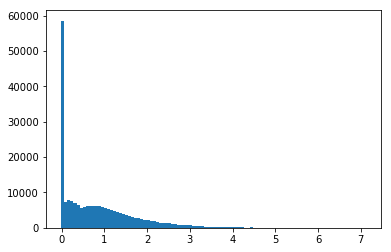

In [43]:
plt.hist(np.array(lst).mean(0).reshape([-1]),bins=100);

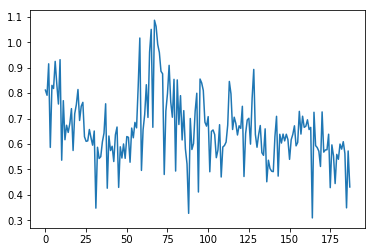

In [44]:
plt.plot(np.array(lst)[:,0,1200]);

In [45]:
for j in range(1680,1690):
    print j,np.nanmean(rawy[:,:,j],dtype=np.float),np.nanmean(y[:,:,j],dtype=np.float)

1680 1.68076379258 0.767920783369
1681 1.6817010969 0.767110917695
1682 1.62592518996 0.723749680765
1683 1.73977632686 0.821946088589
1684 1.71138398698 0.813116099178
1685 1.76363572066 0.845206885747
1686 1.69733310583 0.787718954939
1687 1.70009994492 0.789479112634
1688 nan 0.0
1689 nan 0.0


/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [46]:
for j in range(1680,1693):
    u=train_test[:,:,j]
    print j,np.nanmean(np.isnan(u),dtype=np.float),np.nanmean(u,dtype=np.float)

1680

 0.215573120546

 1.47857299619
1681

 0.214953452775

 1.47677339995
1682

 0.215065617786

 1.47140301878
1683

 0.214712310549

 1.49613829753
1684

 0.213825027602

 1.50890670919
1685

 0.213409741042

 1.52520610463
1686

 0.214805530463

 1.46694481255
1687

 0.216756499046

 1.41173781146
1688

 0.218195950015

 1.40686987634
1689

 0.219260012045

 1.38463984179
1690

 0.217957693466

 1.42846660745
1691

 0.21876932149

 1.44064652697
1692

 0.219028906956

 1.45330899799


In [47]:
np.mean(y[:,0,1688],dtype=np.float),np.mean(y[:,0,1686],dtype=np.float),np.mean(y[:,0,1687],dtype=np.float)

(0.0, 0.13274016203703703, 0.14341001157407407)

(54, 4100) 0.852829


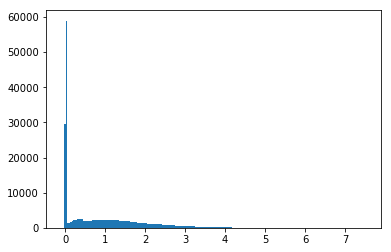

In [48]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1187]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.806748


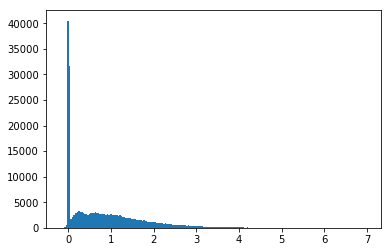

In [49]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1687]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.832514


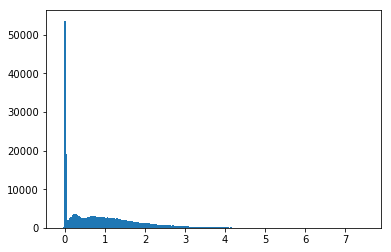

In [50]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1688]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.796139


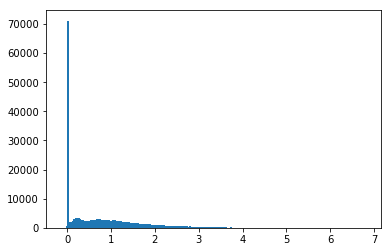

In [51]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1689]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

In [52]:
np.mean(isnan(train_test[:,:,1688]),dtype=np.float)

0.21819595001505571

In [53]:
np.mean(isnan(train_test[:,:,1687]),dtype=np.float)

0.21675649904647196

In [54]:
np.mean(isnan(train_test[:,:,1689]),dtype=np.float)

0.21926001204456488

(54, 4100) 0.832514


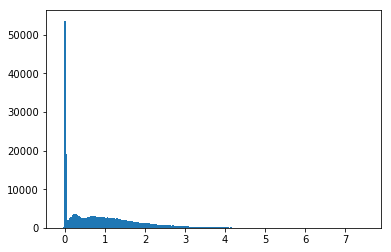

In [55]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1688]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);
pickle.dump(yy_pred3,open(a.name+".alt.pred",'wb'))

In [56]:
c=np.arange(60).reshape([3,4,5])

In [57]:
(c.reshape([-1,5]).reshape([3,4,5])==c).all()

True